In [133]:
import numpy as np
import pandas as pd
import scipy
import librosa, librosa.display
import matplotlib.pyplot as plt
import matplotlib.style as ms
#ms.use('seaborn-muted')
import IPython.display as Ipd
import os
import sklearn

In [214]:
#Get all metadata

filenames_meta = os.listdir('data/dcase_data/metadata_dev') #Development

full_metadata = pd.DataFrame()
#all_metadata
max_it = 40
c = 0
for i in range(len(filenames_meta)):
    metadata = pd.read_csv('data/dcase_data/metadata_dev/' + filenames_meta[i])  #Development
    full_metadata = full_metadata.append(metadata, ignore_index=True, sort=False)
    c +=1
    if c == max_it:
        break
print(len(full_metadata))
print(len(full_metadata.loc[full_metadata['sound_event_recording'] == 'phone']))

1513
134


In [215]:
sr = 22050

def extract_features_target(signal, ele, azi):
#     output = librosa.feature.melspectrogram(signal[0], n_mels=15)
#     output = output.flatten()
    output = []
    for i in range(signal.shape[0] - 1):
        for j in range(i + 1, signal.shape[0]):
            #print(i,"*" ,j)
            cross = scipy.signal.correlate(signal[i], signal[j], mode ='full')
            output.append(np.argmax(cross)-len(cross)/2)
    for i in range(signal.shape[0]):
        output.extend([np.mean(signal[i]), np.var(signal[i])])
    return output, np.array([ele, azi])

#creating an array of zeros of the proper size where we will store computed features and lables

filenames_meta = os.listdir('data/dcase_data/metadata_dev') #Development
features = np.zeros((len(full_metadata),14)) #we compute the melspectrogram which once flattened will produce 22144 values
target = np.zeros((len(full_metadata),2)) #we store the 2 target values

example = 0
for i in range(max_it):
    
    #Metadata
    metadata = pd.read_csv('data/dcase_data/metadata_dev/' + filenames_meta[i])  #Development
    filename = os.path.splitext(filenames_meta[i])[0]
    
    print("processing '" + filename + "' " + str(i + 1) + "/" + str(max_it))
    
    #Audio track
    signal, dummy = librosa.load('data/dcase_data/foa_dev/' + filename + '.wav', sr, mono=False)    
    
    for s in range(len(metadata)):
        if(metadata['sound_event_recording'][s] == 'phone' ):
            #print('processing',filenames[i])
            start_time = int(metadata['start_time'][s] * sr)
            end_time = int(metadata['end_time'][s] * sr)
            #print(str(end_time - start_time))
            subsignal = signal[:, start_time:end_time]
            features[example,:], target[example,:] = extract_features_target(subsignal, metadata['ele'][s],  metadata['azi'][s])
            #Ipd.display(Ipd.Audio(subsignal, rate=sr))
            example += 1
print(features.shape)            
features = np.delete(features, np.arange(example,features.shape[0], 1, dtype=int), axis=0)
target = np.delete(target, np.arange(example,target.shape[0], 1, dtype=int), axis=0)
print('Done!')
print(features.shape)
print(example)


processing 'split1_ir0_ov1_1' 1/40
processing 'split1_ir0_ov1_10' 2/40
processing 'split1_ir0_ov1_2' 3/40
processing 'split1_ir0_ov1_3' 4/40
processing 'split1_ir0_ov1_4' 5/40
processing 'split1_ir0_ov1_5' 6/40
processing 'split1_ir0_ov1_6' 7/40
processing 'split1_ir0_ov1_7' 8/40
processing 'split1_ir0_ov1_8' 9/40
processing 'split1_ir0_ov1_9' 10/40
processing 'split1_ir0_ov2_11' 11/40
processing 'split1_ir0_ov2_12' 12/40
processing 'split1_ir0_ov2_13' 13/40
processing 'split1_ir0_ov2_14' 14/40
processing 'split1_ir0_ov2_15' 15/40
processing 'split1_ir0_ov2_16' 16/40
processing 'split1_ir0_ov2_17' 17/40
processing 'split1_ir0_ov2_18' 18/40
processing 'split1_ir0_ov2_19' 19/40
processing 'split1_ir0_ov2_20' 20/40
processing 'split1_ir1_ov1_21' 21/40
processing 'split1_ir1_ov1_22' 22/40
processing 'split1_ir1_ov1_23' 23/40
processing 'split1_ir1_ov1_24' 24/40
processing 'split1_ir1_ov1_25' 25/40
processing 'split1_ir1_ov1_26' 26/40
processing 'split1_ir1_ov1_27' 27/40
processing 'split1_

In [212]:
print(features)

[[-1.27500000e+02 -5.95000000e+01 -5.00000000e-01 -5.00000000e-01
   5.95000000e+01 -1.28500000e+02 -3.41903287e-05  2.17249976e-06
  -3.03431407e-05  6.09084691e-06 -3.39865328e-05  1.58240914e-06
  -3.02418139e-05  8.38776828e-07]
 [-6.15000000e+01 -5.65000000e+01 -6.15000000e+01 -1.13500000e+02
  -5.00000000e-01 -6.50000000e+00 -3.25228393e-05  6.88009493e-07
  -2.88292322e-05  1.47286494e-06 -3.19728169e-05  5.72489910e-07
  -3.12190350e-05  4.35306475e-07]
 [-5.00000000e-01 -5.00000000e-01 -5.00000000e-01  1.25000000e+01
  -5.00000000e-01 -5.00000000e-01 -2.88824212e-05  7.68723930e-06
  -3.21235639e-05  3.52337565e-06 -3.06714392e-05  3.95007328e-06
  -3.26964582e-05  2.04624575e-05]
 [-1.02500000e+02  6.50000000e+00  6.50000000e+00 -8.50000000e+00
  -8.50000000e+00 -5.00000000e-01 -3.18867860e-05  5.64091852e-06
  -3.16652549e-05  1.36956044e-06 -3.24963803e-05  6.47127717e-06
  -2.99906278e-05  8.73106183e-06]
 [-5.00000000e-01 -5.00000000e-01 -5.00000000e-01 -5.00000000e-01
  

In [216]:
from sklearn.model_selection import train_test_split

#splitting the dataset in training and testing parts
feat_train, feat_test, tar_train, tar_test = train_test_split(features, target, test_size=0.2, random_state=17)

In [217]:
#learning the scaling transformation from the train data and applying it to both train and test set.

#creating scaling object
scaler = sklearn.preprocessing.StandardScaler()

#learning scaling from train set
scaler.fit(feat_train)

#applying scaling to both train and test set
feat_train = scaler.transform(feat_train)
feat_test = scaler.transform(feat_test)

In [236]:
#Import the classifier
from sklearn.neural_network import MLPRegressor

##Creating an instance of a MLP regressor
#and setting it some option (max mum epoch, verbose on, activation of neurons)
#mlp = MLPRegressor(hidden_layer_sizes=(15,10,5), max_iter=500000, activation='relu', verbose=True, random_state = 20, learning_rate_init = 0.001, tol = 0.00001)
mlp = MLPRegressor(hidden_layer_sizes=(8,3), max_iter=500000, activation='logistic', verbose=True, random_state = 20, learning_rate_init = 0.001, tol = 0.00001)

#train the model
mlp.fit(feat_train, tar_train)

#applying the the model on the test data (features)
tar_pred = mlp.predict(feat_test)

Iteration 1, loss = 2811.09243480
Iteration 2, loss = 2811.07613885
Iteration 3, loss = 2811.05985211
Iteration 4, loss = 2811.04357490
Iteration 5, loss = 2811.02730749
Iteration 6, loss = 2811.01105012
Iteration 7, loss = 2810.99480299
Iteration 8, loss = 2810.97856626
Iteration 9, loss = 2810.96234001
Iteration 10, loss = 2810.94612427
Iteration 11, loss = 2810.92991900
Iteration 12, loss = 2810.91372417
Iteration 13, loss = 2810.89753970
Iteration 14, loss = 2810.88136554
Iteration 15, loss = 2810.86520163
Iteration 16, loss = 2810.84904792
Iteration 17, loss = 2810.83290433
Iteration 18, loss = 2810.81677076
Iteration 19, loss = 2810.80064709
Iteration 20, loss = 2810.78453315
Iteration 21, loss = 2810.76842878
Iteration 22, loss = 2810.75233373
Iteration 23, loss = 2810.73624775
Iteration 24, loss = 2810.72017054
Iteration 25, loss = 2810.70410176
Iteration 26, loss = 2810.68804104
Iteration 27, loss = 2810.67198796
Iteration 28, loss = 2810.65594207
Iteration 29, loss = 2810.639

Iteration 297, loss = 2804.48999166
Iteration 298, loss = 2804.45921423
Iteration 299, loss = 2804.42839756
Iteration 300, loss = 2804.39754155
Iteration 301, loss = 2804.36664607
Iteration 302, loss = 2804.33571100
Iteration 303, loss = 2804.30473622
Iteration 304, loss = 2804.27372159
Iteration 305, loss = 2804.24266697
Iteration 306, loss = 2804.21157222
Iteration 307, loss = 2804.18043720
Iteration 308, loss = 2804.14926177
Iteration 309, loss = 2804.11804577
Iteration 310, loss = 2804.08678905
Iteration 311, loss = 2804.05549146
Iteration 312, loss = 2804.02415283
Iteration 313, loss = 2803.99277302
Iteration 314, loss = 2803.96135186
Iteration 315, loss = 2803.92988919
Iteration 316, loss = 2803.89838483
Iteration 317, loss = 2803.86683863
Iteration 318, loss = 2803.83525041
Iteration 319, loss = 2803.80362000
Iteration 320, loss = 2803.77194723
Iteration 321, loss = 2803.74023191
Iteration 322, loss = 2803.70847388
Iteration 323, loss = 2803.67667294
Iteration 324, loss = 2803.6

Iteration 590, loss = 2793.21119225
Iteration 591, loss = 2793.16543690
Iteration 592, loss = 2793.11965094
Iteration 593, loss = 2793.07383470
Iteration 594, loss = 2793.02798852
Iteration 595, loss = 2792.98211275
Iteration 596, loss = 2792.93620772
Iteration 597, loss = 2792.89027379
Iteration 598, loss = 2792.84431131
Iteration 599, loss = 2792.79832063
Iteration 600, loss = 2792.75230210
Iteration 601, loss = 2792.70625609
Iteration 602, loss = 2792.66018295
Iteration 603, loss = 2792.61408304
Iteration 604, loss = 2792.56795672
Iteration 605, loss = 2792.52180435
Iteration 606, loss = 2792.47562628
Iteration 607, loss = 2792.42942287
Iteration 608, loss = 2792.38319449
Iteration 609, loss = 2792.33694148
Iteration 610, loss = 2792.29066420
Iteration 611, loss = 2792.24436299
Iteration 612, loss = 2792.19803821
Iteration 613, loss = 2792.15169020
Iteration 614, loss = 2792.10531929
Iteration 615, loss = 2792.05892583
Iteration 616, loss = 2792.01251014
Iteration 617, loss = 2791.9

Iteration 817, loss = 2782.27216640
Iteration 818, loss = 2782.22106233
Iteration 819, loss = 2782.16991674
Iteration 820, loss = 2782.11872922
Iteration 821, loss = 2782.06749937
Iteration 822, loss = 2782.01622682
Iteration 823, loss = 2781.96491123
Iteration 824, loss = 2781.91355229
Iteration 825, loss = 2781.86214973
Iteration 826, loss = 2781.81070328
Iteration 827, loss = 2781.75921275
Iteration 828, loss = 2781.70767796
Iteration 829, loss = 2781.65609877
Iteration 830, loss = 2781.60447509
Iteration 831, loss = 2781.55280687
Iteration 832, loss = 2781.50109409
Iteration 833, loss = 2781.44933679
Iteration 834, loss = 2781.39753506
Iteration 835, loss = 2781.34568902
Iteration 836, loss = 2781.29379884
Iteration 837, loss = 2781.24186474
Iteration 838, loss = 2781.18988699
Iteration 839, loss = 2781.13786591
Iteration 840, loss = 2781.08580185
Iteration 841, loss = 2781.03369522
Iteration 842, loss = 2780.98154647
Iteration 843, loss = 2780.92935611
Iteration 844, loss = 2780.8

Iteration 1092, loss = 2767.78062968
Iteration 1093, loss = 2767.72909951
Iteration 1094, loss = 2767.67758485
Iteration 1095, loss = 2767.62608568
Iteration 1096, loss = 2767.57460199
Iteration 1097, loss = 2767.52313378
Iteration 1098, loss = 2767.47168103
Iteration 1099, loss = 2767.42024373
Iteration 1100, loss = 2767.36882187
Iteration 1101, loss = 2767.31741542
Iteration 1102, loss = 2767.26602439
Iteration 1103, loss = 2767.21464874
Iteration 1104, loss = 2767.16328846
Iteration 1105, loss = 2767.11194353
Iteration 1106, loss = 2767.06061394
Iteration 1107, loss = 2767.00929965
Iteration 1108, loss = 2766.95800065
Iteration 1109, loss = 2766.90671691
Iteration 1110, loss = 2766.85544840
Iteration 1111, loss = 2766.80419510
Iteration 1112, loss = 2766.75295698
Iteration 1113, loss = 2766.70173400
Iteration 1114, loss = 2766.65052614
Iteration 1115, loss = 2766.59933336
Iteration 1116, loss = 2766.54815562
Iteration 1117, loss = 2766.49699289
Iteration 1118, loss = 2766.44584514
I

Iteration 1343, loss = 2755.02817284
Iteration 1344, loss = 2754.97711168
Iteration 1345, loss = 2754.92606627
Iteration 1346, loss = 2754.87503685
Iteration 1347, loss = 2754.82402362
Iteration 1348, loss = 2754.77302681
Iteration 1349, loss = 2754.72204659
Iteration 1350, loss = 2754.67108314
Iteration 1351, loss = 2754.62013664
Iteration 1352, loss = 2754.56920722
Iteration 1353, loss = 2754.51829504
Iteration 1354, loss = 2754.46740021
Iteration 1355, loss = 2754.41652285
Iteration 1356, loss = 2754.36566307
Iteration 1357, loss = 2754.31482096
Iteration 1358, loss = 2754.26399661
Iteration 1359, loss = 2754.21319008
Iteration 1360, loss = 2754.16240144
Iteration 1361, loss = 2754.11163073
Iteration 1362, loss = 2754.06087801
Iteration 1363, loss = 2754.01014330
Iteration 1364, loss = 2753.95942663
Iteration 1365, loss = 2753.90872801
Iteration 1366, loss = 2753.85804745
Iteration 1367, loss = 2753.80738496
Iteration 1368, loss = 2753.75674052
Iteration 1369, loss = 2753.70611411
I

Iteration 1603, loss = 2742.21270526
Iteration 1604, loss = 2742.16472244
Iteration 1605, loss = 2742.11674702
Iteration 1606, loss = 2742.06877899
Iteration 1607, loss = 2742.02081828
Iteration 1608, loss = 2741.97286485
Iteration 1609, loss = 2741.92491867
Iteration 1610, loss = 2741.87697967
Iteration 1611, loss = 2741.82904781
Iteration 1612, loss = 2741.78112304
Iteration 1613, loss = 2741.73320530
Iteration 1614, loss = 2741.68529453
Iteration 1615, loss = 2741.63739067
Iteration 1616, loss = 2741.58949366
Iteration 1617, loss = 2741.54160343
Iteration 1618, loss = 2741.49371991
Iteration 1619, loss = 2741.44584302
Iteration 1620, loss = 2741.39797268
Iteration 1621, loss = 2741.35010882
Iteration 1622, loss = 2741.30225134
Iteration 1623, loss = 2741.25440014
Iteration 1624, loss = 2741.20655513
Iteration 1625, loss = 2741.15871619
Iteration 1626, loss = 2741.11088322
Iteration 1627, loss = 2741.06305608
Iteration 1628, loss = 2741.01523465
Iteration 1629, loss = 2740.96741879
I

Iteration 1904, loss = 2727.28293348
Iteration 1905, loss = 2727.23472408
Iteration 1906, loss = 2727.18653701
Iteration 1907, loss = 2727.13837211
Iteration 1908, loss = 2727.09022923
Iteration 1909, loss = 2727.04210822
Iteration 1910, loss = 2726.99400893
Iteration 1911, loss = 2726.94593121
Iteration 1912, loss = 2726.89787493
Iteration 1913, loss = 2726.84983995
Iteration 1914, loss = 2726.80182612
Iteration 1915, loss = 2726.75383332
Iteration 1916, loss = 2726.70586142
Iteration 1917, loss = 2726.65791028
Iteration 1918, loss = 2726.60997979
Iteration 1919, loss = 2726.56206981
Iteration 1920, loss = 2726.51418024
Iteration 1921, loss = 2726.46631094
Iteration 1922, loss = 2726.41846181
Iteration 1923, loss = 2726.37063273
Iteration 1924, loss = 2726.32282359
Iteration 1925, loss = 2726.27503428
Iteration 1926, loss = 2726.22726469
Iteration 1927, loss = 2726.17951473
Iteration 1928, loss = 2726.13178428
Iteration 1929, loss = 2726.08407324
Iteration 1930, loss = 2726.03638152
I

Iteration 2189, loss = 2714.14008974
Iteration 2190, loss = 2714.09597345
Iteration 2191, loss = 2714.05187462
Iteration 2192, loss = 2714.00779311
Iteration 2193, loss = 2713.96372880
Iteration 2194, loss = 2713.91968155
Iteration 2195, loss = 2713.87565122
Iteration 2196, loss = 2713.83163769
Iteration 2197, loss = 2713.78764081
Iteration 2198, loss = 2713.74366044
Iteration 2199, loss = 2713.69969643
Iteration 2200, loss = 2713.65574863
Iteration 2201, loss = 2713.61181689
Iteration 2202, loss = 2713.56790105
Iteration 2203, loss = 2713.52400095
Iteration 2204, loss = 2713.48011643
Iteration 2205, loss = 2713.43624732
Iteration 2206, loss = 2713.39239344
Iteration 2207, loss = 2713.34855462
Iteration 2208, loss = 2713.30473068
Iteration 2209, loss = 2713.26092142
Iteration 2210, loss = 2713.21712666
Iteration 2211, loss = 2713.17334620
Iteration 2212, loss = 2713.12957984
Iteration 2213, loss = 2713.08582738
Iteration 2214, loss = 2713.04208859
Iteration 2215, loss = 2712.99836328
I

Iteration 2477, loss = 2701.92718157
Iteration 2478, loss = 2701.88663111
Iteration 2479, loss = 2701.84609030
Iteration 2480, loss = 2701.80555905
Iteration 2481, loss = 2701.76503728
Iteration 2482, loss = 2701.72452489
Iteration 2483, loss = 2701.68402180
Iteration 2484, loss = 2701.64352793
Iteration 2485, loss = 2701.60304321
Iteration 2486, loss = 2701.56256754
Iteration 2487, loss = 2701.52210085
Iteration 2488, loss = 2701.48164306
Iteration 2489, loss = 2701.44119411
Iteration 2490, loss = 2701.40075391
Iteration 2491, loss = 2701.36032241
Iteration 2492, loss = 2701.31989953
Iteration 2493, loss = 2701.27948522
Iteration 2494, loss = 2701.23907941
Iteration 2495, loss = 2701.19868204
Iteration 2496, loss = 2701.15829307
Iteration 2497, loss = 2701.11791244
Iteration 2498, loss = 2701.07754011
Iteration 2499, loss = 2701.03717604
Iteration 2500, loss = 2700.99682018
Iteration 2501, loss = 2700.95647250
Iteration 2502, loss = 2700.91613297
Iteration 2503, loss = 2700.87580156
I

Iteration 2783, loss = 2690.05277493
Iteration 2784, loss = 2690.01587514
Iteration 2785, loss = 2689.97898620
Iteration 2786, loss = 2689.94210810
Iteration 2787, loss = 2689.90524080
Iteration 2788, loss = 2689.86838430
Iteration 2789, loss = 2689.83153857
Iteration 2790, loss = 2689.79470359
Iteration 2791, loss = 2689.75787935
Iteration 2792, loss = 2689.72106581
Iteration 2793, loss = 2689.68426297
Iteration 2794, loss = 2689.64747081
Iteration 2795, loss = 2689.61068929
Iteration 2796, loss = 2689.57391841
Iteration 2797, loss = 2689.53715815
Iteration 2798, loss = 2689.50040848
Iteration 2799, loss = 2689.46366939
Iteration 2800, loss = 2689.42694086
Iteration 2801, loss = 2689.39022287
Iteration 2802, loss = 2689.35351539
Iteration 2803, loss = 2689.31681841
Iteration 2804, loss = 2689.28013192
Iteration 2805, loss = 2689.24345589
Iteration 2806, loss = 2689.20679030
Iteration 2807, loss = 2689.17013513
Iteration 2808, loss = 2689.13349037
Iteration 2809, loss = 2689.09685600
I

Iteration 3074, loss = 2679.70481096
Iteration 3075, loss = 2679.67039950
Iteration 3076, loss = 2679.63599471
Iteration 3077, loss = 2679.60159656
Iteration 3078, loss = 2679.56720506
Iteration 3079, loss = 2679.53282018
Iteration 3080, loss = 2679.49844192
Iteration 3081, loss = 2679.46407027
Iteration 3082, loss = 2679.42970520
Iteration 3083, loss = 2679.39534672
Iteration 3084, loss = 2679.36099482
Iteration 3085, loss = 2679.32664947
Iteration 3086, loss = 2679.29231067
Iteration 3087, loss = 2679.25797840
Iteration 3088, loss = 2679.22365266
Iteration 3089, loss = 2679.18933343
Iteration 3090, loss = 2679.15502071
Iteration 3091, loss = 2679.12071447
Iteration 3092, loss = 2679.08641472
Iteration 3093, loss = 2679.05212143
Iteration 3094, loss = 2679.01783460
Iteration 3095, loss = 2678.98355421
Iteration 3096, loss = 2678.94928025
Iteration 3097, loss = 2678.91501272
Iteration 3098, loss = 2678.88075159
Iteration 3099, loss = 2678.84649686
Iteration 3100, loss = 2678.81224852
I

Iteration 3368, loss = 2669.81636050
Iteration 3369, loss = 2669.78330090
Iteration 3370, loss = 2669.75024516
Iteration 3371, loss = 2669.71719330
Iteration 3372, loss = 2669.68414538
Iteration 3373, loss = 2669.65110142
Iteration 3374, loss = 2669.61806146
Iteration 3375, loss = 2669.58502555
Iteration 3376, loss = 2669.55199372
Iteration 3377, loss = 2669.51896601
Iteration 3378, loss = 2669.48594247
Iteration 3379, loss = 2669.45292313
Iteration 3380, loss = 2669.41990803
Iteration 3381, loss = 2669.38689721
Iteration 3382, loss = 2669.35389072
Iteration 3383, loss = 2669.32088859
Iteration 3384, loss = 2669.28789086
Iteration 3385, loss = 2669.25489758
Iteration 3386, loss = 2669.22190878
Iteration 3387, loss = 2669.18892451
Iteration 3388, loss = 2669.15594481
Iteration 3389, loss = 2669.12296971
Iteration 3390, loss = 2669.08999925
Iteration 3391, loss = 2669.05703348
Iteration 3392, loss = 2669.02407244
Iteration 3393, loss = 2668.99111616
Iteration 3394, loss = 2668.95816468
I

Iteration 3670, loss = 2660.07735774
Iteration 3671, loss = 2660.04583682
Iteration 3672, loss = 2660.01431812
Iteration 3673, loss = 2659.98280158
Iteration 3674, loss = 2659.95128711
Iteration 3675, loss = 2659.91977460
Iteration 3676, loss = 2659.88826396
Iteration 3677, loss = 2659.85675511
Iteration 3678, loss = 2659.82524792
Iteration 3679, loss = 2659.79374230
Iteration 3680, loss = 2659.76223814
Iteration 3681, loss = 2659.73073533
Iteration 3682, loss = 2659.69923373
Iteration 3683, loss = 2659.66773323
Iteration 3684, loss = 2659.63623371
Iteration 3685, loss = 2659.60473502
Iteration 3686, loss = 2659.57323703
Iteration 3687, loss = 2659.54173960
Iteration 3688, loss = 2659.51024259
Iteration 3689, loss = 2659.47874582
Iteration 3690, loss = 2659.44724915
Iteration 3691, loss = 2659.41575242
Iteration 3692, loss = 2659.38425544
Iteration 3693, loss = 2659.35275805
Iteration 3694, loss = 2659.32126005
Iteration 3695, loss = 2659.28976127
Iteration 3696, loss = 2659.25826150
I

Iteration 3992, loss = 2650.10287157
Iteration 3993, loss = 2650.07267476
Iteration 3994, loss = 2650.04248169
Iteration 3995, loss = 2650.01229235
Iteration 3996, loss = 2649.98210676
Iteration 3997, loss = 2649.95192489
Iteration 3998, loss = 2649.92174675
Iteration 3999, loss = 2649.89157233
Iteration 4000, loss = 2649.86140163
Iteration 4001, loss = 2649.83123465
Iteration 4002, loss = 2649.80107138
Iteration 4003, loss = 2649.77091182
Iteration 4004, loss = 2649.74075597
Iteration 4005, loss = 2649.71060381
Iteration 4006, loss = 2649.68045536
Iteration 4007, loss = 2649.65031060
Iteration 4008, loss = 2649.62016953
Iteration 4009, loss = 2649.59003214
Iteration 4010, loss = 2649.55989844
Iteration 4011, loss = 2649.52976842
Iteration 4012, loss = 2649.49964208
Iteration 4013, loss = 2649.46951941
Iteration 4014, loss = 2649.43940041
Iteration 4015, loss = 2649.40928508
Iteration 4016, loss = 2649.37917341
Iteration 4017, loss = 2649.34906539
Iteration 4018, loss = 2649.31896104
I

Iteration 4250, loss = 2642.42743091
Iteration 4251, loss = 2642.39810294
Iteration 4252, loss = 2642.36877804
Iteration 4253, loss = 2642.33945621
Iteration 4254, loss = 2642.31013744
Iteration 4255, loss = 2642.28082174
Iteration 4256, loss = 2642.25150909
Iteration 4257, loss = 2642.22219951
Iteration 4258, loss = 2642.19289298
Iteration 4259, loss = 2642.16358950
Iteration 4260, loss = 2642.13428908
Iteration 4261, loss = 2642.10499171
Iteration 4262, loss = 2642.07569739
Iteration 4263, loss = 2642.04640611
Iteration 4264, loss = 2642.01711789
Iteration 4265, loss = 2641.98783270
Iteration 4266, loss = 2641.95855056
Iteration 4267, loss = 2641.92927146
Iteration 4268, loss = 2641.89999539
Iteration 4269, loss = 2641.87072236
Iteration 4270, loss = 2641.84145237
Iteration 4271, loss = 2641.81218541
Iteration 4272, loss = 2641.78292148
Iteration 4273, loss = 2641.75366058
Iteration 4274, loss = 2641.72440271
Iteration 4275, loss = 2641.69514787
Iteration 4276, loss = 2641.66589605
I

Iteration 4514, loss = 2634.78633814
Iteration 4515, loss = 2634.75776483
Iteration 4516, loss = 2634.72919419
Iteration 4517, loss = 2634.70062624
Iteration 4518, loss = 2634.67206095
Iteration 4519, loss = 2634.64349835
Iteration 4520, loss = 2634.61493841
Iteration 4521, loss = 2634.58638115
Iteration 4522, loss = 2634.55782656
Iteration 4523, loss = 2634.52927464
Iteration 4524, loss = 2634.50072538
Iteration 4525, loss = 2634.47217879
Iteration 4526, loss = 2634.44363487
Iteration 4527, loss = 2634.41509362
Iteration 4528, loss = 2634.38655502
Iteration 4529, loss = 2634.35801909
Iteration 4530, loss = 2634.32948582
Iteration 4531, loss = 2634.30095521
Iteration 4532, loss = 2634.27242726
Iteration 4533, loss = 2634.24390197
Iteration 4534, loss = 2634.21537933
Iteration 4535, loss = 2634.18685935
Iteration 4536, loss = 2634.15834202
Iteration 4537, loss = 2634.12982735
Iteration 4538, loss = 2634.10131533
Iteration 4539, loss = 2634.07280596
Iteration 4540, loss = 2634.04429924
I

Iteration 4804, loss = 2626.60776025
Iteration 4805, loss = 2626.57991536
Iteration 4806, loss = 2626.55207277
Iteration 4807, loss = 2626.52423247
Iteration 4808, loss = 2626.49639447
Iteration 4809, loss = 2626.46855875
Iteration 4810, loss = 2626.44072533
Iteration 4811, loss = 2626.41289418
Iteration 4812, loss = 2626.38506531
Iteration 4813, loss = 2626.35723872
Iteration 4814, loss = 2626.32941440
Iteration 4815, loss = 2626.30159236
Iteration 4816, loss = 2626.27377258
Iteration 4817, loss = 2626.24595506
Iteration 4818, loss = 2626.21813980
Iteration 4819, loss = 2626.19032680
Iteration 4820, loss = 2626.16251604
Iteration 4821, loss = 2626.13470754
Iteration 4822, loss = 2626.10690128
Iteration 4823, loss = 2626.07909727
Iteration 4824, loss = 2626.05129548
Iteration 4825, loss = 2626.02349594
Iteration 4826, loss = 2625.99569862
Iteration 4827, loss = 2625.96790352
Iteration 4828, loss = 2625.94011065
Iteration 4829, loss = 2625.91231999
Iteration 4830, loss = 2625.88453154
I

Iteration 5074, loss = 2619.16268665
Iteration 5075, loss = 2619.13541461
Iteration 5076, loss = 2619.10814514
Iteration 5077, loss = 2619.08087825
Iteration 5078, loss = 2619.05361393
Iteration 5079, loss = 2619.02635218
Iteration 5080, loss = 2618.99909300
Iteration 5081, loss = 2618.97183638
Iteration 5082, loss = 2618.94458232
Iteration 5083, loss = 2618.91733083
Iteration 5084, loss = 2618.89008189
Iteration 5085, loss = 2618.86283552
Iteration 5086, loss = 2618.83559169
Iteration 5087, loss = 2618.80835042
Iteration 5088, loss = 2618.78111169
Iteration 5089, loss = 2618.75387552
Iteration 5090, loss = 2618.72664188
Iteration 5091, loss = 2618.69941079
Iteration 5092, loss = 2618.67218224
Iteration 5093, loss = 2618.64495623
Iteration 5094, loss = 2618.61773275
Iteration 5095, loss = 2618.59051181
Iteration 5096, loss = 2618.56329339
Iteration 5097, loss = 2618.53607751
Iteration 5098, loss = 2618.50886415
Iteration 5099, loss = 2618.48165331
Iteration 5100, loss = 2618.45444499
I

Iteration 5383, loss = 2610.84824832
Iteration 5384, loss = 2610.82168263
Iteration 5385, loss = 2610.79511902
Iteration 5386, loss = 2610.76855750
Iteration 5387, loss = 2610.74199807
Iteration 5388, loss = 2610.71544072
Iteration 5389, loss = 2610.68888546
Iteration 5390, loss = 2610.66233227
Iteration 5391, loss = 2610.63578117
Iteration 5392, loss = 2610.60923215
Iteration 5393, loss = 2610.58268521
Iteration 5394, loss = 2610.55614034
Iteration 5395, loss = 2610.52959756
Iteration 5396, loss = 2610.50305685
Iteration 5397, loss = 2610.47651822
Iteration 5398, loss = 2610.44998166
Iteration 5399, loss = 2610.42344718
Iteration 5400, loss = 2610.39691478
Iteration 5401, loss = 2610.37038444
Iteration 5402, loss = 2610.34385618
Iteration 5403, loss = 2610.31732999
Iteration 5404, loss = 2610.29080587
Iteration 5405, loss = 2610.26428382
Iteration 5406, loss = 2610.23776384
Iteration 5407, loss = 2610.21124593
Iteration 5408, loss = 2610.18473009
Iteration 5409, loss = 2610.15821631
I

Iteration 5680, loss = 2603.04687507
Iteration 5681, loss = 2603.02089992
Iteration 5682, loss = 2602.99492669
Iteration 5683, loss = 2602.96895538
Iteration 5684, loss = 2602.94298599
Iteration 5685, loss = 2602.91701851
Iteration 5686, loss = 2602.89105294
Iteration 5687, loss = 2602.86508929
Iteration 5688, loss = 2602.83912756
Iteration 5689, loss = 2602.81316774
Iteration 5690, loss = 2602.78720983
Iteration 5691, loss = 2602.76125383
Iteration 5692, loss = 2602.73529975
Iteration 5693, loss = 2602.70934758
Iteration 5694, loss = 2602.68339733
Iteration 5695, loss = 2602.65744898
Iteration 5696, loss = 2602.63150255
Iteration 5697, loss = 2602.60555802
Iteration 5698, loss = 2602.57961541
Iteration 5699, loss = 2602.55367471
Iteration 5700, loss = 2602.52773592
Iteration 5701, loss = 2602.50179904
Iteration 5702, loss = 2602.47586407
Iteration 5703, loss = 2602.44993101
Iteration 5704, loss = 2602.42399985
Iteration 5705, loss = 2602.39807061
Iteration 5706, loss = 2602.37214327
I

Iteration 5976, loss = 2595.44035297
Iteration 5977, loss = 2595.41492918
Iteration 5978, loss = 2595.38950720
Iteration 5979, loss = 2595.36408702
Iteration 5980, loss = 2595.33866865
Iteration 5981, loss = 2595.31325209
Iteration 5982, loss = 2595.28783733
Iteration 5983, loss = 2595.26242438
Iteration 5984, loss = 2595.23701324
Iteration 5985, loss = 2595.21160390
Iteration 5986, loss = 2595.18619637
Iteration 5987, loss = 2595.16079064
Iteration 5988, loss = 2595.13538672
Iteration 5989, loss = 2595.10998460
Iteration 5990, loss = 2595.08458428
Iteration 5991, loss = 2595.05918577
Iteration 5992, loss = 2595.03378906
Iteration 5993, loss = 2595.00839416
Iteration 5994, loss = 2594.98300106
Iteration 5995, loss = 2594.95760975
Iteration 5996, loss = 2594.93222026
Iteration 5997, loss = 2594.90683256
Iteration 5998, loss = 2594.88144666
Iteration 5999, loss = 2594.85606257
Iteration 6000, loss = 2594.83068027
Iteration 6001, loss = 2594.80529977
Iteration 6002, loss = 2594.77992108
I

Iteration 6275, loss = 2587.91769789
Iteration 6276, loss = 2587.89279989
Iteration 6277, loss = 2587.86790360
Iteration 6278, loss = 2587.84300902
Iteration 6279, loss = 2587.81811616
Iteration 6280, loss = 2587.79322500
Iteration 6281, loss = 2587.76833556
Iteration 6282, loss = 2587.74344783
Iteration 6283, loss = 2587.71856181
Iteration 6284, loss = 2587.69367749
Iteration 6285, loss = 2587.66879489
Iteration 6286, loss = 2587.64391400
Iteration 6287, loss = 2587.61903481
Iteration 6288, loss = 2587.59415734
Iteration 6289, loss = 2587.56928157
Iteration 6290, loss = 2587.54440751
Iteration 6291, loss = 2587.51953516
Iteration 6292, loss = 2587.49466452
Iteration 6293, loss = 2587.46979558
Iteration 6294, loss = 2587.44492835
Iteration 6295, loss = 2587.42006283
Iteration 6296, loss = 2587.39519902
Iteration 6297, loss = 2587.37033691
Iteration 6298, loss = 2587.34547650
Iteration 6299, loss = 2587.32061781
Iteration 6300, loss = 2587.29576081
Iteration 6301, loss = 2587.27090553
I

Iteration 6585, loss = 2580.27994426
Iteration 6586, loss = 2580.25556377
Iteration 6587, loss = 2580.23118491
Iteration 6588, loss = 2580.20680767
Iteration 6589, loss = 2580.18243207
Iteration 6590, loss = 2580.15805809
Iteration 6591, loss = 2580.13368573
Iteration 6592, loss = 2580.10931501
Iteration 6593, loss = 2580.08494591
Iteration 6594, loss = 2580.06057843
Iteration 6595, loss = 2580.03621258
Iteration 6596, loss = 2580.01184836
Iteration 6597, loss = 2579.98748576
Iteration 6598, loss = 2579.96312479
Iteration 6599, loss = 2579.93876544
Iteration 6600, loss = 2579.91440771
Iteration 6601, loss = 2579.89005161
Iteration 6602, loss = 2579.86569714
Iteration 6603, loss = 2579.84134428
Iteration 6604, loss = 2579.81699305
Iteration 6605, loss = 2579.79264345
Iteration 6606, loss = 2579.76829546
Iteration 6607, loss = 2579.74394910
Iteration 6608, loss = 2579.71960436
Iteration 6609, loss = 2579.69526125
Iteration 6610, loss = 2579.67091975
Iteration 6611, loss = 2579.64657988
I

Iteration 6834, loss = 2574.25877119
Iteration 6835, loss = 2574.23478748
Iteration 6836, loss = 2574.21080533
Iteration 6837, loss = 2574.18682474
Iteration 6838, loss = 2574.16284570
Iteration 6839, loss = 2574.13886822
Iteration 6840, loss = 2574.11489229
Iteration 6841, loss = 2574.09091792
Iteration 6842, loss = 2574.06694510
Iteration 6843, loss = 2574.04297384
Iteration 6844, loss = 2574.01900412
Iteration 6845, loss = 2573.99503596
Iteration 6846, loss = 2573.97106936
Iteration 6847, loss = 2573.94710430
Iteration 6848, loss = 2573.92314080
Iteration 6849, loss = 2573.89917885
Iteration 6850, loss = 2573.87521845
Iteration 6851, loss = 2573.85125960
Iteration 6852, loss = 2573.82730230
Iteration 6853, loss = 2573.80334655
Iteration 6854, loss = 2573.77939235
Iteration 6855, loss = 2573.75543970
Iteration 6856, loss = 2573.73148860
Iteration 6857, loss = 2573.70753905
Iteration 6858, loss = 2573.68359105
Iteration 6859, loss = 2573.65964459
Iteration 6860, loss = 2573.63569969
I

Iteration 7071, loss = 2568.61723305
Iteration 7072, loss = 2568.59360512
Iteration 7073, loss = 2568.56997861
Iteration 7074, loss = 2568.54635351
Iteration 7075, loss = 2568.52272983
Iteration 7076, loss = 2568.49910755
Iteration 7077, loss = 2568.47548669
Iteration 7078, loss = 2568.45186724
Iteration 7079, loss = 2568.42824919
Iteration 7080, loss = 2568.40463255
Iteration 7081, loss = 2568.38101731
Iteration 7082, loss = 2568.35740348
Iteration 7083, loss = 2568.33379105
Iteration 7084, loss = 2568.31018003
Iteration 7085, loss = 2568.28657040
Iteration 7086, loss = 2568.26296217
Iteration 7087, loss = 2568.23935534
Iteration 7088, loss = 2568.21574990
Iteration 7089, loss = 2568.19214586
Iteration 7090, loss = 2568.16854320
Iteration 7091, loss = 2568.14494195
Iteration 7092, loss = 2568.12134208
Iteration 7093, loss = 2568.09774359
Iteration 7094, loss = 2568.07414650
Iteration 7095, loss = 2568.05055079
Iteration 7096, loss = 2568.02695646
Iteration 7097, loss = 2568.00336352
I

Iteration 7337, loss = 2562.37551340
Iteration 7338, loss = 2562.35219212
Iteration 7339, loss = 2562.32887191
Iteration 7340, loss = 2562.30555277
Iteration 7341, loss = 2562.28223469
Iteration 7342, loss = 2562.25891767
Iteration 7343, loss = 2562.23560172
Iteration 7344, loss = 2562.21228682
Iteration 7345, loss = 2562.18897299
Iteration 7346, loss = 2562.16566020
Iteration 7347, loss = 2562.14234847
Iteration 7348, loss = 2562.11903779
Iteration 7349, loss = 2562.09572816
Iteration 7350, loss = 2562.07241957
Iteration 7351, loss = 2562.04911203
Iteration 7352, loss = 2562.02580553
Iteration 7353, loss = 2562.00250007
Iteration 7354, loss = 2561.97919565
Iteration 7355, loss = 2561.95589226
Iteration 7356, loss = 2561.93258991
Iteration 7357, loss = 2561.90928858
Iteration 7358, loss = 2561.88598829
Iteration 7359, loss = 2561.86268901
Iteration 7360, loss = 2561.83939076
Iteration 7361, loss = 2561.81609353
Iteration 7362, loss = 2561.79279732
Iteration 7363, loss = 2561.76950212
I

Iteration 7624, loss = 2555.71491138
Iteration 7625, loss = 2555.69178654
Iteration 7626, loss = 2555.66866221
Iteration 7627, loss = 2555.64553840
Iteration 7628, loss = 2555.62241511
Iteration 7629, loss = 2555.59929234
Iteration 7630, loss = 2555.57617009
Iteration 7631, loss = 2555.55304836
Iteration 7632, loss = 2555.52992716
Iteration 7633, loss = 2555.50680648
Iteration 7634, loss = 2555.48368633
Iteration 7635, loss = 2555.46056671
Iteration 7636, loss = 2555.43744762
Iteration 7637, loss = 2555.41432906
Iteration 7638, loss = 2555.39121104
Iteration 7639, loss = 2555.36809355
Iteration 7640, loss = 2555.34497660
Iteration 7641, loss = 2555.32186019
Iteration 7642, loss = 2555.29874432
Iteration 7643, loss = 2555.27562900
Iteration 7644, loss = 2555.25251422
Iteration 7645, loss = 2555.22939998
Iteration 7646, loss = 2555.20628629
Iteration 7647, loss = 2555.18317316
Iteration 7648, loss = 2555.16006057
Iteration 7649, loss = 2555.13694855
Iteration 7650, loss = 2555.11383707
I

Iteration 7950, loss = 2548.21801433
Iteration 7951, loss = 2548.19517717
Iteration 7952, loss = 2548.17234039
Iteration 7953, loss = 2548.14950396
Iteration 7954, loss = 2548.12666784
Iteration 7955, loss = 2548.10383197
Iteration 7956, loss = 2548.08099630
Iteration 7957, loss = 2548.05816078
Iteration 7958, loss = 2548.03532536
Iteration 7959, loss = 2548.01248996
Iteration 7960, loss = 2547.98965454
Iteration 7961, loss = 2547.96681903
Iteration 7962, loss = 2547.94398334
Iteration 7963, loss = 2547.92114742
Iteration 7964, loss = 2547.89831117
Iteration 7965, loss = 2547.87547451
Iteration 7966, loss = 2547.85263736
Iteration 7967, loss = 2547.82979961
Iteration 7968, loss = 2547.80696117
Iteration 7969, loss = 2547.78412192
Iteration 7970, loss = 2547.76128176
Iteration 7971, loss = 2547.73844055
Iteration 7972, loss = 2547.71559817
Iteration 7973, loss = 2547.69275448
Iteration 7974, loss = 2547.66990933
Iteration 7975, loss = 2547.64706257
Iteration 7976, loss = 2547.62421401
I

Iteration 8200, loss = 2541.87519161
Iteration 8201, loss = 2541.85005367
Iteration 8202, loss = 2541.82491061
Iteration 8203, loss = 2541.79976238
Iteration 8204, loss = 2541.77460893
Iteration 8205, loss = 2541.74945023
Iteration 8206, loss = 2541.72428623
Iteration 8207, loss = 2541.69911689
Iteration 8208, loss = 2541.67394219
Iteration 8209, loss = 2541.64876209
Iteration 8210, loss = 2541.62357656
Iteration 8211, loss = 2541.59838557
Iteration 8212, loss = 2541.57318911
Iteration 8213, loss = 2541.54798715
Iteration 8214, loss = 2541.52277968
Iteration 8215, loss = 2541.49756668
Iteration 8216, loss = 2541.47234815
Iteration 8217, loss = 2541.44712407
Iteration 8218, loss = 2541.42189444
Iteration 8219, loss = 2541.39665926
Iteration 8220, loss = 2541.37141853
Iteration 8221, loss = 2541.34617226
Iteration 8222, loss = 2541.32092045
Iteration 8223, loss = 2541.29566311
Iteration 8224, loss = 2541.27040027
Iteration 8225, loss = 2541.24513193
Iteration 8226, loss = 2541.21985812
I

Iteration 8485, loss = 2534.84585938
Iteration 8486, loss = 2534.82262790
Iteration 8487, loss = 2534.79940381
Iteration 8488, loss = 2534.77618705
Iteration 8489, loss = 2534.75297757
Iteration 8490, loss = 2534.72977529
Iteration 8491, loss = 2534.70658017
Iteration 8492, loss = 2534.68339212
Iteration 8493, loss = 2534.66021111
Iteration 8494, loss = 2534.63703706
Iteration 8495, loss = 2534.61386993
Iteration 8496, loss = 2534.59070964
Iteration 8497, loss = 2534.56755615
Iteration 8498, loss = 2534.54440940
Iteration 8499, loss = 2534.52126933
Iteration 8500, loss = 2534.49813589
Iteration 8501, loss = 2534.47500903
Iteration 8502, loss = 2534.45188868
Iteration 8503, loss = 2534.42877480
Iteration 8504, loss = 2534.40566733
Iteration 8505, loss = 2534.38256623
Iteration 8506, loss = 2534.35947143
Iteration 8507, loss = 2534.33638290
Iteration 8508, loss = 2534.31330058
Iteration 8509, loss = 2534.29022442
Iteration 8510, loss = 2534.26715436
Iteration 8511, loss = 2534.24409038
I

Iteration 8751, loss = 2528.82364985
Iteration 8752, loss = 2528.80141257
Iteration 8753, loss = 2528.77917761
Iteration 8754, loss = 2528.75694496
Iteration 8755, loss = 2528.73471462
Iteration 8756, loss = 2528.71248659
Iteration 8757, loss = 2528.69026086
Iteration 8758, loss = 2528.66803744
Iteration 8759, loss = 2528.64581630
Iteration 8760, loss = 2528.62359746
Iteration 8761, loss = 2528.60138091
Iteration 8762, loss = 2528.57916664
Iteration 8763, loss = 2528.55695465
Iteration 8764, loss = 2528.53474494
Iteration 8765, loss = 2528.51253750
Iteration 8766, loss = 2528.49033233
Iteration 8767, loss = 2528.46812943
Iteration 8768, loss = 2528.44592879
Iteration 8769, loss = 2528.42373041
Iteration 8770, loss = 2528.40153428
Iteration 8771, loss = 2528.37934040
Iteration 8772, loss = 2528.35714877
Iteration 8773, loss = 2528.33495939
Iteration 8774, loss = 2528.31277225
Iteration 8775, loss = 2528.29058734
Iteration 8776, loss = 2528.26840467
Iteration 8777, loss = 2528.24622422
I

Iteration 9043, loss = 2522.41652145
Iteration 9044, loss = 2522.39483763
Iteration 9045, loss = 2522.37315528
Iteration 9046, loss = 2522.35147438
Iteration 9047, loss = 2522.32979493
Iteration 9048, loss = 2522.30811693
Iteration 9049, loss = 2522.28644037
Iteration 9050, loss = 2522.26476526
Iteration 9051, loss = 2522.24309157
Iteration 9052, loss = 2522.22141932
Iteration 9053, loss = 2522.19974849
Iteration 9054, loss = 2522.17807909
Iteration 9055, loss = 2522.15641110
Iteration 9056, loss = 2522.13474452
Iteration 9057, loss = 2522.11307935
Iteration 9058, loss = 2522.09141559
Iteration 9059, loss = 2522.06975322
Iteration 9060, loss = 2522.04809225
Iteration 9061, loss = 2522.02643267
Iteration 9062, loss = 2522.00477448
Iteration 9063, loss = 2521.98311766
Iteration 9064, loss = 2521.96146223
Iteration 9065, loss = 2521.93980816
Iteration 9066, loss = 2521.91815546
Iteration 9067, loss = 2521.89650413
Iteration 9068, loss = 2521.87485416
Iteration 9069, loss = 2521.85320553
I

Iteration 9311, loss = 2516.65513081
Iteration 9312, loss = 2516.63384410
Iteration 9313, loss = 2516.61255877
Iteration 9314, loss = 2516.59127479
Iteration 9315, loss = 2516.56999216
Iteration 9316, loss = 2516.54871085
Iteration 9317, loss = 2516.52743084
Iteration 9318, loss = 2516.50615212
Iteration 9319, loss = 2516.48487466
Iteration 9320, loss = 2516.46359845
Iteration 9321, loss = 2516.44232346
Iteration 9322, loss = 2516.42104966
Iteration 9323, loss = 2516.39977705
Iteration 9324, loss = 2516.37850558
Iteration 9325, loss = 2516.35723524
Iteration 9326, loss = 2516.33596600
Iteration 9327, loss = 2516.31469784
Iteration 9328, loss = 2516.29343072
Iteration 9329, loss = 2516.27216462
Iteration 9330, loss = 2516.25089951
Iteration 9331, loss = 2516.22963535
Iteration 9332, loss = 2516.20837211
Iteration 9333, loss = 2516.18710977
Iteration 9334, loss = 2516.16584828
Iteration 9335, loss = 2516.14458761
Iteration 9336, loss = 2516.12332772
Iteration 9337, loss = 2516.10206857
I

Iteration 9574, loss = 2511.07132592
Iteration 9575, loss = 2511.05046835
Iteration 9576, loss = 2511.02961250
Iteration 9577, loss = 2511.00875834
Iteration 9578, loss = 2510.98790584
Iteration 9579, loss = 2510.96705499
Iteration 9580, loss = 2510.94620575
Iteration 9581, loss = 2510.92535811
Iteration 9582, loss = 2510.90451204
Iteration 9583, loss = 2510.88366753
Iteration 9584, loss = 2510.86282453
Iteration 9585, loss = 2510.84198304
Iteration 9586, loss = 2510.82114302
Iteration 9587, loss = 2510.80030445
Iteration 9588, loss = 2510.77946731
Iteration 9589, loss = 2510.75863156
Iteration 9590, loss = 2510.73779719
Iteration 9591, loss = 2510.71696416
Iteration 9592, loss = 2510.69613245
Iteration 9593, loss = 2510.67530202
Iteration 9594, loss = 2510.65447286
Iteration 9595, loss = 2510.63364492
Iteration 9596, loss = 2510.61281818
Iteration 9597, loss = 2510.59199262
Iteration 9598, loss = 2510.57116819
Iteration 9599, loss = 2510.55034487
Iteration 9600, loss = 2510.52952261
I

Iteration 9882, loss = 2504.70817806
Iteration 9883, loss = 2504.68776040
Iteration 9884, loss = 2504.66734414
Iteration 9885, loss = 2504.64692929
Iteration 9886, loss = 2504.62651586
Iteration 9887, loss = 2504.60610382
Iteration 9888, loss = 2504.58569320
Iteration 9889, loss = 2504.56528398
Iteration 9890, loss = 2504.54487617
Iteration 9891, loss = 2504.52446976
Iteration 9892, loss = 2504.50406475
Iteration 9893, loss = 2504.48366115
Iteration 9894, loss = 2504.46325894
Iteration 9895, loss = 2504.44285814
Iteration 9896, loss = 2504.42245874
Iteration 9897, loss = 2504.40206074
Iteration 9898, loss = 2504.38166414
Iteration 9899, loss = 2504.36126894
Iteration 9900, loss = 2504.34087513
Iteration 9901, loss = 2504.32048273
Iteration 9902, loss = 2504.30009171
Iteration 9903, loss = 2504.27970210
Iteration 9904, loss = 2504.25931388
Iteration 9905, loss = 2504.23892705
Iteration 9906, loss = 2504.21854162
Iteration 9907, loss = 2504.19815758
Iteration 9908, loss = 2504.17777493
I

Iteration 10200, loss = 2498.28384729
Iteration 10201, loss = 2498.26385575
Iteration 10202, loss = 2498.24386549
Iteration 10203, loss = 2498.22387651
Iteration 10204, loss = 2498.20388882
Iteration 10205, loss = 2498.18390241
Iteration 10206, loss = 2498.16391728
Iteration 10207, loss = 2498.14393343
Iteration 10208, loss = 2498.12395086
Iteration 10209, loss = 2498.10396958
Iteration 10210, loss = 2498.08398957
Iteration 10211, loss = 2498.06401085
Iteration 10212, loss = 2498.04403340
Iteration 10213, loss = 2498.02405723
Iteration 10214, loss = 2498.00408234
Iteration 10215, loss = 2497.98410873
Iteration 10216, loss = 2497.96413639
Iteration 10217, loss = 2497.94416534
Iteration 10218, loss = 2497.92419556
Iteration 10219, loss = 2497.90422705
Iteration 10220, loss = 2497.88425982
Iteration 10221, loss = 2497.86429386
Iteration 10222, loss = 2497.84432918
Iteration 10223, loss = 2497.82436577
Iteration 10224, loss = 2497.80440364
Iteration 10225, loss = 2497.78444277
Iteration 10

Iteration 10426, loss = 2493.79683391
Iteration 10427, loss = 2493.77710525
Iteration 10428, loss = 2493.75737747
Iteration 10429, loss = 2493.73765056
Iteration 10430, loss = 2493.71792451
Iteration 10431, loss = 2493.69819932
Iteration 10432, loss = 2493.67847498
Iteration 10433, loss = 2493.65875149
Iteration 10434, loss = 2493.63902883
Iteration 10435, loss = 2493.61930701
Iteration 10436, loss = 2493.59958602
Iteration 10437, loss = 2493.57986585
Iteration 10438, loss = 2493.56014649
Iteration 10439, loss = 2493.54042793
Iteration 10440, loss = 2493.52071018
Iteration 10441, loss = 2493.50099322
Iteration 10442, loss = 2493.48127704
Iteration 10443, loss = 2493.46156164
Iteration 10444, loss = 2493.44184701
Iteration 10445, loss = 2493.42213314
Iteration 10446, loss = 2493.40242003
Iteration 10447, loss = 2493.38270766
Iteration 10448, loss = 2493.36299603
Iteration 10449, loss = 2493.34328513
Iteration 10450, loss = 2493.32357496
Iteration 10451, loss = 2493.30386549
Iteration 10

Iteration 10664, loss = 2489.02121658
Iteration 10665, loss = 2488.99823722
Iteration 10666, loss = 2488.97513525
Iteration 10667, loss = 2488.95190636
Iteration 10668, loss = 2488.92854614
Iteration 10669, loss = 2488.90505010
Iteration 10670, loss = 2488.88141368
Iteration 10671, loss = 2488.85763223
Iteration 10672, loss = 2488.83370103
Iteration 10673, loss = 2488.80961533
Iteration 10674, loss = 2488.78537032
Iteration 10675, loss = 2488.76096116
Iteration 10676, loss = 2488.73638300
Iteration 10677, loss = 2488.71163097
Iteration 10678, loss = 2488.68670025
Iteration 10679, loss = 2488.66158600
Iteration 10680, loss = 2488.63628347
Iteration 10681, loss = 2488.61078796
Iteration 10682, loss = 2488.58509486
Iteration 10683, loss = 2488.55919969
Iteration 10684, loss = 2488.53309809
Iteration 10685, loss = 2488.50678586
Iteration 10686, loss = 2488.48025900
Iteration 10687, loss = 2488.45351373
Iteration 10688, loss = 2488.42654649
Iteration 10689, loss = 2488.39935404
Iteration 10

Iteration 10930, loss = 2482.28435817
Iteration 10931, loss = 2482.24645669
Iteration 10932, loss = 2482.20677691
Iteration 10933, loss = 2482.16514467
Iteration 10934, loss = 2482.12137168
Iteration 10935, loss = 2482.07525523
Iteration 10936, loss = 2482.02657788
Iteration 10937, loss = 2481.97510760
Iteration 10938, loss = 2481.92059801
Iteration 10939, loss = 2481.86278912
Iteration 10940, loss = 2481.80140834
Iteration 10941, loss = 2481.73617193
Iteration 10942, loss = 2481.66678690
Iteration 10943, loss = 2481.59295323
Iteration 10944, loss = 2481.51436664
Iteration 10945, loss = 2481.43072167
Iteration 10946, loss = 2481.34171519
Iteration 10947, loss = 2481.24705024
Iteration 10948, loss = 2481.14644021
Iteration 10949, loss = 2481.03961328
Iteration 10950, loss = 2480.92631714
Iteration 10951, loss = 2480.80632385
Iteration 10952, loss = 2480.67943495
Iteration 10953, loss = 2480.54548652
Iteration 10954, loss = 2480.40435428
Iteration 10955, loss = 2480.25595829
Iteration 10

Iteration 11157, loss = 2449.00463724
Iteration 11158, loss = 2448.90846802
Iteration 11159, loss = 2448.81539100
Iteration 11160, loss = 2448.72508197
Iteration 11161, loss = 2448.63725897
Iteration 11162, loss = 2448.55167584
Iteration 11163, loss = 2448.46811700
Iteration 11164, loss = 2448.38639289
Iteration 11165, loss = 2448.30633631
Iteration 11166, loss = 2448.22779915
Iteration 11167, loss = 2448.15064976
Iteration 11168, loss = 2448.07477064
Iteration 11169, loss = 2448.00005655
Iteration 11170, loss = 2447.92641283
Iteration 11171, loss = 2447.85375407
Iteration 11172, loss = 2447.78200290
Iteration 11173, loss = 2447.71108908
Iteration 11174, loss = 2447.64094858
Iteration 11175, loss = 2447.57152293
Iteration 11176, loss = 2447.50275856
Iteration 11177, loss = 2447.43460626
Iteration 11178, loss = 2447.36702068
Iteration 11179, loss = 2447.29995993
Iteration 11180, loss = 2447.23338515
Iteration 11181, loss = 2447.16726018
Iteration 11182, loss = 2447.10155124
Iteration 11

Iteration 11408, loss = 2414.24898911
Iteration 11409, loss = 2414.05284098
Iteration 11410, loss = 2413.85713416
Iteration 11411, loss = 2413.66188607
Iteration 11412, loss = 2413.46711397
Iteration 11413, loss = 2413.27283487
Iteration 11414, loss = 2413.07906552
Iteration 11415, loss = 2412.88582233
Iteration 11416, loss = 2412.69312133
Iteration 11417, loss = 2412.50097812
Iteration 11418, loss = 2412.30940782
Iteration 11419, loss = 2412.11842504
Iteration 11420, loss = 2411.92804389
Iteration 11421, loss = 2411.73827788
Iteration 11422, loss = 2411.54913999
Iteration 11423, loss = 2411.36064266
Iteration 11424, loss = 2411.17279775
Iteration 11425, loss = 2410.98561665
Iteration 11426, loss = 2410.79911024
Iteration 11427, loss = 2410.61328894
Iteration 11428, loss = 2410.42816277
Iteration 11429, loss = 2410.24374137
Iteration 11430, loss = 2410.06003399
Iteration 11431, loss = 2409.87704955
Iteration 11432, loss = 2409.69479666
Iteration 11433, loss = 2409.51328355
Iteration 11

Iteration 11697, loss = 2350.42966158
Iteration 11698, loss = 2350.27813407
Iteration 11699, loss = 2350.12716249
Iteration 11700, loss = 2349.97673851
Iteration 11701, loss = 2349.82685453
Iteration 11702, loss = 2349.67750359
Iteration 11703, loss = 2349.52867930
Iteration 11704, loss = 2349.38037580
Iteration 11705, loss = 2349.23258767
Iteration 11706, loss = 2349.08530991
Iteration 11707, loss = 2348.93853790
Iteration 11708, loss = 2348.79226733
Iteration 11709, loss = 2348.64649419
Iteration 11710, loss = 2348.50121473
Iteration 11711, loss = 2348.35642539
Iteration 11712, loss = 2348.21212286
Iteration 11713, loss = 2348.06830396
Iteration 11714, loss = 2347.92496569
Iteration 11715, loss = 2347.78210516
Iteration 11716, loss = 2347.63971961
Iteration 11717, loss = 2347.49780637
Iteration 11718, loss = 2347.35636287
Iteration 11719, loss = 2347.21538658
Iteration 11720, loss = 2347.07487506
Iteration 11721, loss = 2346.93482591
Iteration 11722, loss = 2346.79523678
Iteration 11

Iteration 11997, loss = 2318.27368090
Iteration 11998, loss = 2318.19241897
Iteration 11999, loss = 2318.11133408
Iteration 12000, loss = 2318.03042468
Iteration 12001, loss = 2317.94968923
Iteration 12002, loss = 2317.86912620
Iteration 12003, loss = 2317.78873412
Iteration 12004, loss = 2317.70851153
Iteration 12005, loss = 2317.62845699
Iteration 12006, loss = 2317.54856909
Iteration 12007, loss = 2317.46884647
Iteration 12008, loss = 2317.38928777
Iteration 12009, loss = 2317.30989169
Iteration 12010, loss = 2317.23065692
Iteration 12011, loss = 2317.15158223
Iteration 12012, loss = 2317.07266637
Iteration 12013, loss = 2316.99390818
Iteration 12014, loss = 2316.91530647
Iteration 12015, loss = 2316.83686013
Iteration 12016, loss = 2316.75856806
Iteration 12017, loss = 2316.68042918
Iteration 12018, loss = 2316.60244246
Iteration 12019, loss = 2316.52460690
Iteration 12020, loss = 2316.44692151
Iteration 12021, loss = 2316.36938535
Iteration 12022, loss = 2316.29199750
Iteration 12

Iteration 12302, loss = 2298.82150694
Iteration 12303, loss = 2298.76865204
Iteration 12304, loss = 2298.71582702
Iteration 12305, loss = 2298.66303146
Iteration 12306, loss = 2298.61026495
Iteration 12307, loss = 2298.55752706
Iteration 12308, loss = 2298.50481739
Iteration 12309, loss = 2298.45213549
Iteration 12310, loss = 2298.39948094
Iteration 12311, loss = 2298.34685331
Iteration 12312, loss = 2298.29425215
Iteration 12313, loss = 2298.24167703
Iteration 12314, loss = 2298.18912750
Iteration 12315, loss = 2298.13660310
Iteration 12316, loss = 2298.08410338
Iteration 12317, loss = 2298.03162788
Iteration 12318, loss = 2297.97917612
Iteration 12319, loss = 2297.92674764
Iteration 12320, loss = 2297.87434195
Iteration 12321, loss = 2297.82195856
Iteration 12322, loss = 2297.76959699
Iteration 12323, loss = 2297.71725673
Iteration 12324, loss = 2297.66493729
Iteration 12325, loss = 2297.61263813
Iteration 12326, loss = 2297.56035876
Iteration 12327, loss = 2297.50809862
Iteration 12

Iteration 12602, loss = 2279.17934789
Iteration 12603, loss = 2279.12618123
Iteration 12604, loss = 2279.07310931
Iteration 12605, loss = 2279.02013024
Iteration 12606, loss = 2278.96724215
Iteration 12607, loss = 2278.91444321
Iteration 12608, loss = 2278.86173162
Iteration 12609, loss = 2278.80910561
Iteration 12610, loss = 2278.75656341
Iteration 12611, loss = 2278.70410333
Iteration 12612, loss = 2278.65172366
Iteration 12613, loss = 2278.59942273
Iteration 12614, loss = 2278.54719892
Iteration 12615, loss = 2278.49505060
Iteration 12616, loss = 2278.44297619
Iteration 12617, loss = 2278.39097413
Iteration 12618, loss = 2278.33904287
Iteration 12619, loss = 2278.28718090
Iteration 12620, loss = 2278.23538674
Iteration 12621, loss = 2278.18365891
Iteration 12622, loss = 2278.13199598
Iteration 12623, loss = 2278.08039653
Iteration 12624, loss = 2278.02885917
Iteration 12625, loss = 2277.97738254
Iteration 12626, loss = 2277.92596529
Iteration 12627, loss = 2277.87460611
Iteration 12

Iteration 12905, loss = 2261.39520288
Iteration 12906, loss = 2261.30621780
Iteration 12907, loss = 2261.21850772
Iteration 12908, loss = 2261.13208732
Iteration 12909, loss = 2261.04696427
Iteration 12910, loss = 2260.96313966
Iteration 12911, loss = 2260.88060848
Iteration 12912, loss = 2260.79936018
Iteration 12913, loss = 2260.71937920
Iteration 12914, loss = 2260.64064553
Iteration 12915, loss = 2260.56313529
Iteration 12916, loss = 2260.48682127
Iteration 12917, loss = 2260.41167349
Iteration 12918, loss = 2260.33765969
Iteration 12919, loss = 2260.26474582
Iteration 12920, loss = 2260.19289653
Iteration 12921, loss = 2260.12207555
Iteration 12922, loss = 2260.05224606
Iteration 12923, loss = 2259.98337108
Iteration 12924, loss = 2259.91541372
Iteration 12925, loss = 2259.84833747
Iteration 12926, loss = 2259.78210640
Iteration 12927, loss = 2259.71668537
Iteration 12928, loss = 2259.65204017
Iteration 12929, loss = 2259.58813763
Iteration 12930, loss = 2259.52494573
Iteration 12

Iteration 13128, loss = 2250.43260522
Iteration 13129, loss = 2250.39192286
Iteration 13130, loss = 2250.35126397
Iteration 13131, loss = 2250.31062837
Iteration 13132, loss = 2250.27001587
Iteration 13133, loss = 2250.22942631
Iteration 13134, loss = 2250.18885952
Iteration 13135, loss = 2250.14831533
Iteration 13136, loss = 2250.10779357
Iteration 13137, loss = 2250.06729407
Iteration 13138, loss = 2250.02681668
Iteration 13139, loss = 2249.98636123
Iteration 13140, loss = 2249.94592757
Iteration 13141, loss = 2249.90551554
Iteration 13142, loss = 2249.86512499
Iteration 13143, loss = 2249.82475577
Iteration 13144, loss = 2249.78440772
Iteration 13145, loss = 2249.74408071
Iteration 13146, loss = 2249.70377458
Iteration 13147, loss = 2249.66348919
Iteration 13148, loss = 2249.62322441
Iteration 13149, loss = 2249.58298009
Iteration 13150, loss = 2249.54275609
Iteration 13151, loss = 2249.50255229
Iteration 13152, loss = 2249.46236854
Iteration 13153, loss = 2249.42220472
Iteration 13

Iteration 13400, loss = 2239.93120616
Iteration 13401, loss = 2239.89410400
Iteration 13402, loss = 2239.85701048
Iteration 13403, loss = 2239.81992557
Iteration 13404, loss = 2239.78284925
Iteration 13405, loss = 2239.74578152
Iteration 13406, loss = 2239.70872235
Iteration 13407, loss = 2239.67167173
Iteration 13408, loss = 2239.63462964
Iteration 13409, loss = 2239.59759607
Iteration 13410, loss = 2239.56057100
Iteration 13411, loss = 2239.52355441
Iteration 13412, loss = 2239.48654630
Iteration 13413, loss = 2239.44954664
Iteration 13414, loss = 2239.41255541
Iteration 13415, loss = 2239.37557261
Iteration 13416, loss = 2239.33859822
Iteration 13417, loss = 2239.30163222
Iteration 13418, loss = 2239.26467459
Iteration 13419, loss = 2239.22772533
Iteration 13420, loss = 2239.19078441
Iteration 13421, loss = 2239.15385182
Iteration 13422, loss = 2239.11692755
Iteration 13423, loss = 2239.08001158
Iteration 13424, loss = 2239.04310390
Iteration 13425, loss = 2239.00620448
Iteration 13

Iteration 13697, loss = 2229.23243546
Iteration 13698, loss = 2229.19730756
Iteration 13699, loss = 2229.16218396
Iteration 13700, loss = 2229.12706461
Iteration 13701, loss = 2229.09194947
Iteration 13702, loss = 2229.05683850
Iteration 13703, loss = 2229.02173167
Iteration 13704, loss = 2228.98662891
Iteration 13705, loss = 2228.95153020
Iteration 13706, loss = 2228.91643547
Iteration 13707, loss = 2228.88134468
Iteration 13708, loss = 2228.84625777
Iteration 13709, loss = 2228.81117470
Iteration 13710, loss = 2228.77609540
Iteration 13711, loss = 2228.74101982
Iteration 13712, loss = 2228.70594790
Iteration 13713, loss = 2228.67087957
Iteration 13714, loss = 2228.63581477
Iteration 13715, loss = 2228.60075343
Iteration 13716, loss = 2228.56569548
Iteration 13717, loss = 2228.53064084
Iteration 13718, loss = 2228.49558943
Iteration 13719, loss = 2228.46054118
Iteration 13720, loss = 2228.42549599
Iteration 13721, loss = 2228.39045378
Iteration 13722, loss = 2228.35541446
Iteration 13

Iteration 13948, loss = 2220.44867439
Iteration 13949, loss = 2220.41449858
Iteration 13950, loss = 2220.38032415
Iteration 13951, loss = 2220.34615102
Iteration 13952, loss = 2220.31197912
Iteration 13953, loss = 2220.27780836
Iteration 13954, loss = 2220.24363866
Iteration 13955, loss = 2220.20946993
Iteration 13956, loss = 2220.17530209
Iteration 13957, loss = 2220.14113505
Iteration 13958, loss = 2220.10696871
Iteration 13959, loss = 2220.07280297
Iteration 13960, loss = 2220.03863775
Iteration 13961, loss = 2220.00447295
Iteration 13962, loss = 2219.97030845
Iteration 13963, loss = 2219.93614415
Iteration 13964, loss = 2219.90197995
Iteration 13965, loss = 2219.86781573
Iteration 13966, loss = 2219.83365138
Iteration 13967, loss = 2219.79948678
Iteration 13968, loss = 2219.76532181
Iteration 13969, loss = 2219.73115634
Iteration 13970, loss = 2219.69699024
Iteration 13971, loss = 2219.66282338
Iteration 13972, loss = 2219.62865563
Iteration 13973, loss = 2219.59448683
Iteration 13

Iteration 14193, loss = 2202.09845924
Iteration 14194, loss = 2202.05326967
Iteration 14195, loss = 2202.00822744
Iteration 14196, loss = 2201.96332813
Iteration 14197, loss = 2201.91856748
Iteration 14198, loss = 2201.87394141
Iteration 14199, loss = 2201.82944599
Iteration 14200, loss = 2201.78507744
Iteration 14201, loss = 2201.74083213
Iteration 14202, loss = 2201.69670657
Iteration 14203, loss = 2201.65269738
Iteration 14204, loss = 2201.60880133
Iteration 14205, loss = 2201.56501529
Iteration 14206, loss = 2201.52133625
Iteration 14207, loss = 2201.47776129
Iteration 14208, loss = 2201.43428762
Iteration 14209, loss = 2201.39091252
Iteration 14210, loss = 2201.34763338
Iteration 14211, loss = 2201.30444766
Iteration 14212, loss = 2201.26135294
Iteration 14213, loss = 2201.21834684
Iteration 14214, loss = 2201.17542709
Iteration 14215, loss = 2201.13259146
Iteration 14216, loss = 2201.08983783
Iteration 14217, loss = 2201.04716412
Iteration 14218, loss = 2201.00456833
Iteration 14

Iteration 14460, loss = 2191.32864027
Iteration 14461, loss = 2191.28874655
Iteration 14462, loss = 2191.24884473
Iteration 14463, loss = 2191.20893475
Iteration 14464, loss = 2191.16901653
Iteration 14465, loss = 2191.12909001
Iteration 14466, loss = 2191.08915511
Iteration 14467, loss = 2191.04921176
Iteration 14468, loss = 2191.00925989
Iteration 14469, loss = 2190.96929943
Iteration 14470, loss = 2190.92933029
Iteration 14471, loss = 2190.88935241
Iteration 14472, loss = 2190.84936570
Iteration 14473, loss = 2190.80937009
Iteration 14474, loss = 2190.76936549
Iteration 14475, loss = 2190.72935184
Iteration 14476, loss = 2190.68932904
Iteration 14477, loss = 2190.64929702
Iteration 14478, loss = 2190.60925568
Iteration 14479, loss = 2190.56920495
Iteration 14480, loss = 2190.52914473
Iteration 14481, loss = 2190.48907494
Iteration 14482, loss = 2190.44899548
Iteration 14483, loss = 2190.40890626
Iteration 14484, loss = 2190.36880719
Iteration 14485, loss = 2190.32869817
Iteration 14

Iteration 14681, loss = 2182.09749268
Iteration 14682, loss = 2182.05356165
Iteration 14683, loss = 2182.00953516
Iteration 14684, loss = 2181.96541851
Iteration 14685, loss = 2181.92121884
Iteration 14686, loss = 2181.87694529
Iteration 14687, loss = 2181.83260906
Iteration 14688, loss = 2181.78822344
Iteration 14689, loss = 2181.74380373
Iteration 14690, loss = 2181.69936715
Iteration 14691, loss = 2181.65493255
Iteration 14692, loss = 2181.61052014
Iteration 14693, loss = 2181.56615099
Iteration 14694, loss = 2181.52184662
Iteration 14695, loss = 2181.47762838
Iteration 14696, loss = 2181.43351689
Iteration 14697, loss = 2181.38953153
Iteration 14698, loss = 2181.34568985
Iteration 14699, loss = 2181.30200722
Iteration 14700, loss = 2181.25849647
Iteration 14701, loss = 2181.21516771
Iteration 14702, loss = 2181.17202830
Iteration 14703, loss = 2181.12908292
Iteration 14704, loss = 2181.08633372
Iteration 14705, loss = 2181.04378060
Iteration 14706, loss = 2181.00142149
Iteration 14

Iteration 14950, loss = 2171.77906903
Iteration 14951, loss = 2171.74007869
Iteration 14952, loss = 2171.70083702
Iteration 14953, loss = 2171.66131681
Iteration 14954, loss = 2171.62148735
Iteration 14955, loss = 2171.58131394
Iteration 14956, loss = 2171.54075730
Iteration 14957, loss = 2171.49977288
Iteration 14958, loss = 2171.45831008
Iteration 14959, loss = 2171.41631130
Iteration 14960, loss = 2171.37371091
Iteration 14961, loss = 2171.33043397
Iteration 14962, loss = 2171.28639484
Iteration 14963, loss = 2171.24149546
Iteration 14964, loss = 2171.19562348
Iteration 14965, loss = 2171.14864995
Iteration 14966, loss = 2171.10042682
Iteration 14967, loss = 2171.05078383
Iteration 14968, loss = 2170.99952511
Iteration 14969, loss = 2170.94642511
Iteration 14970, loss = 2170.89122384
Iteration 14971, loss = 2170.83362145
Iteration 14972, loss = 2170.77327176
Iteration 14973, loss = 2170.70977474
Iteration 14974, loss = 2170.64266758
Iteration 14975, loss = 2170.57141425
Iteration 14

Iteration 15225, loss = 2094.54805721
Iteration 15226, loss = 2094.48054313
Iteration 15227, loss = 2094.41316652
Iteration 15228, loss = 2094.34592944
Iteration 15229, loss = 2094.27883407
Iteration 15230, loss = 2094.21188271
Iteration 15231, loss = 2094.14507774
Iteration 15232, loss = 2094.07842167
Iteration 15233, loss = 2094.01191703
Iteration 15234, loss = 2093.94556647
Iteration 15235, loss = 2093.87937266
Iteration 15236, loss = 2093.81333829
Iteration 15237, loss = 2093.74746609
Iteration 15238, loss = 2093.68175880
Iteration 15239, loss = 2093.61621913
Iteration 15240, loss = 2093.55084979
Iteration 15241, loss = 2093.48565343
Iteration 15242, loss = 2093.42063265
Iteration 15243, loss = 2093.35578999
Iteration 15244, loss = 2093.29112790
Iteration 15245, loss = 2093.22664875
Iteration 15246, loss = 2093.16235479
Iteration 15247, loss = 2093.09824814
Iteration 15248, loss = 2093.03433082
Iteration 15249, loss = 2092.97060466
Iteration 15250, loss = 2092.90707140
Iteration 15

Iteration 15505, loss = 2079.95843787
Iteration 15506, loss = 2079.91310242
Iteration 15507, loss = 2079.86778672
Iteration 15508, loss = 2079.82249063
Iteration 15509, loss = 2079.77721404
Iteration 15510, loss = 2079.73195680
Iteration 15511, loss = 2079.68671878
Iteration 15512, loss = 2079.64149987
Iteration 15513, loss = 2079.59629992
Iteration 15514, loss = 2079.55111881
Iteration 15515, loss = 2079.50595642
Iteration 15516, loss = 2079.46081261
Iteration 15517, loss = 2079.41568725
Iteration 15518, loss = 2079.37058022
Iteration 15519, loss = 2079.32549140
Iteration 15520, loss = 2079.28042066
Iteration 15521, loss = 2079.23536786
Iteration 15522, loss = 2079.19033289
Iteration 15523, loss = 2079.14531562
Iteration 15524, loss = 2079.10031593
Iteration 15525, loss = 2079.05533369
Iteration 15526, loss = 2079.01036878
Iteration 15527, loss = 2078.96542107
Iteration 15528, loss = 2078.92049044
Iteration 15529, loss = 2078.87557676
Iteration 15530, loss = 2078.83067992
Iteration 15

Iteration 15784, loss = 2067.55253498
Iteration 15785, loss = 2067.50599850
Iteration 15786, loss = 2067.45941330
Iteration 15787, loss = 2067.41277899
Iteration 15788, loss = 2067.36609520
Iteration 15789, loss = 2067.31936158
Iteration 15790, loss = 2067.27257777
Iteration 15791, loss = 2067.22574344
Iteration 15792, loss = 2067.17885827
Iteration 15793, loss = 2067.13192195
Iteration 15794, loss = 2067.08493418
Iteration 15795, loss = 2067.03789468
Iteration 15796, loss = 2066.99080319
Iteration 15797, loss = 2066.94365947
Iteration 15798, loss = 2066.89646327
Iteration 15799, loss = 2066.84921439
Iteration 15800, loss = 2066.80191263
Iteration 15801, loss = 2066.75455782
Iteration 15802, loss = 2066.70714979
Iteration 15803, loss = 2066.65968841
Iteration 15804, loss = 2066.61217356
Iteration 15805, loss = 2066.56460515
Iteration 15806, loss = 2066.51698310
Iteration 15807, loss = 2066.46930737
Iteration 15808, loss = 2066.42157792
Iteration 15809, loss = 2066.37379476
Iteration 15

Iteration 16067, loss = 2054.17507557
Iteration 16068, loss = 2054.13164516
Iteration 16069, loss = 2054.08823648
Iteration 16070, loss = 2054.04484939
Iteration 16071, loss = 2054.00148372
Iteration 16072, loss = 2053.95813935
Iteration 16073, loss = 2053.91481613
Iteration 16074, loss = 2053.87151392
Iteration 16075, loss = 2053.82823258
Iteration 16076, loss = 2053.78497196
Iteration 16077, loss = 2053.74173194
Iteration 16078, loss = 2053.69851237
Iteration 16079, loss = 2053.65531312
Iteration 16080, loss = 2053.61213406
Iteration 16081, loss = 2053.56897506
Iteration 16082, loss = 2053.52583598
Iteration 16083, loss = 2053.48271670
Iteration 16084, loss = 2053.43961708
Iteration 16085, loss = 2053.39653701
Iteration 16086, loss = 2053.35347634
Iteration 16087, loss = 2053.31043497
Iteration 16088, loss = 2053.26741276
Iteration 16089, loss = 2053.22440959
Iteration 16090, loss = 2053.18142535
Iteration 16091, loss = 2053.13845990
Iteration 16092, loss = 2053.09551314
Iteration 16

Iteration 16351, loss = 2042.40212595
Iteration 16352, loss = 2042.36209452
Iteration 16353, loss = 2042.32207126
Iteration 16354, loss = 2042.28205616
Iteration 16355, loss = 2042.24204920
Iteration 16356, loss = 2042.20205038
Iteration 16357, loss = 2042.16205969
Iteration 16358, loss = 2042.12207711
Iteration 16359, loss = 2042.08210265
Iteration 16360, loss = 2042.04213628
Iteration 16361, loss = 2042.00217800
Iteration 16362, loss = 2041.96222779
Iteration 16363, loss = 2041.92228566
Iteration 16364, loss = 2041.88235159
Iteration 16365, loss = 2041.84242557
Iteration 16366, loss = 2041.80250758
Iteration 16367, loss = 2041.76259763
Iteration 16368, loss = 2041.72269570
Iteration 16369, loss = 2041.68280178
Iteration 16370, loss = 2041.64291586
Iteration 16371, loss = 2041.60303793
Iteration 16372, loss = 2041.56316799
Iteration 16373, loss = 2041.52330601
Iteration 16374, loss = 2041.48345200
Iteration 16375, loss = 2041.44360594
Iteration 16376, loss = 2041.40376782
Iteration 16

Iteration 16658, loss = 2030.44314448
Iteration 16659, loss = 2030.40511594
Iteration 16660, loss = 2030.36709268
Iteration 16661, loss = 2030.32907467
Iteration 16662, loss = 2030.29106192
Iteration 16663, loss = 2030.25305439
Iteration 16664, loss = 2030.21505209
Iteration 16665, loss = 2030.17705499
Iteration 16666, loss = 2030.13906307
Iteration 16667, loss = 2030.10107633
Iteration 16668, loss = 2030.06309474
Iteration 16669, loss = 2030.02511829
Iteration 16670, loss = 2029.98714696
Iteration 16671, loss = 2029.94918073
Iteration 16672, loss = 2029.91121959
Iteration 16673, loss = 2029.87326353
Iteration 16674, loss = 2029.83531251
Iteration 16675, loss = 2029.79736653
Iteration 16676, loss = 2029.75942557
Iteration 16677, loss = 2029.72148961
Iteration 16678, loss = 2029.68355862
Iteration 16679, loss = 2029.64563260
Iteration 16680, loss = 2029.60771152
Iteration 16681, loss = 2029.56979537
Iteration 16682, loss = 2029.53188412
Iteration 16683, loss = 2029.49397776
Iteration 16

Iteration 16882, loss = 2021.98582830
Iteration 16883, loss = 2021.94770603
Iteration 16884, loss = 2021.90959105
Iteration 16885, loss = 2021.87148463
Iteration 16886, loss = 2021.83338801
Iteration 16887, loss = 2021.79530242
Iteration 16888, loss = 2021.75722909
Iteration 16889, loss = 2021.71916919
Iteration 16890, loss = 2021.68112386
Iteration 16891, loss = 2021.64309420
Iteration 16892, loss = 2021.60508126
Iteration 16893, loss = 2021.56708602
Iteration 16894, loss = 2021.52910944
Iteration 16895, loss = 2021.49115237
Iteration 16896, loss = 2021.45321562
Iteration 16897, loss = 2021.41529994
Iteration 16898, loss = 2021.37740599
Iteration 16899, loss = 2021.33953436
Iteration 16900, loss = 2021.30168558
Iteration 16901, loss = 2021.26386009
Iteration 16902, loss = 2021.22605828
Iteration 16903, loss = 2021.18828045
Iteration 16904, loss = 2021.15052684
Iteration 16905, loss = 2021.11279762
Iteration 16906, loss = 2021.07509290
Iteration 16907, loss = 2021.03741272
Iteration 16

Iteration 17128, loss = 2012.94440122
Iteration 17129, loss = 2012.90825659
Iteration 17130, loss = 2012.87211503
Iteration 17131, loss = 2012.83597651
Iteration 17132, loss = 2012.79984104
Iteration 17133, loss = 2012.76370860
Iteration 17134, loss = 2012.72757920
Iteration 17135, loss = 2012.69145283
Iteration 17136, loss = 2012.65532949
Iteration 17137, loss = 2012.61920916
Iteration 17138, loss = 2012.58309184
Iteration 17139, loss = 2012.54697753
Iteration 17140, loss = 2012.51086622
Iteration 17141, loss = 2012.47475791
Iteration 17142, loss = 2012.43865260
Iteration 17143, loss = 2012.40255027
Iteration 17144, loss = 2012.36645092
Iteration 17145, loss = 2012.33035455
Iteration 17146, loss = 2012.29426114
Iteration 17147, loss = 2012.25817071
Iteration 17148, loss = 2012.22208324
Iteration 17149, loss = 2012.18599872
Iteration 17150, loss = 2012.14991715
Iteration 17151, loss = 2012.11383853
Iteration 17152, loss = 2012.07776285
Iteration 17153, loss = 2012.04169011
Iteration 17

Iteration 17383, loss = 2003.81158866
Iteration 17384, loss = 2003.77602094
Iteration 17385, loss = 2003.74045381
Iteration 17386, loss = 2003.70488724
Iteration 17387, loss = 2003.66932118
Iteration 17388, loss = 2003.63375560
Iteration 17389, loss = 2003.59819046
Iteration 17390, loss = 2003.56262571
Iteration 17391, loss = 2003.52706131
Iteration 17392, loss = 2003.49149721
Iteration 17393, loss = 2003.45593338
Iteration 17394, loss = 2003.42036977
Iteration 17395, loss = 2003.38480632
Iteration 17396, loss = 2003.34924299
Iteration 17397, loss = 2003.31367973
Iteration 17398, loss = 2003.27811649
Iteration 17399, loss = 2003.24255321
Iteration 17400, loss = 2003.20698985
Iteration 17401, loss = 2003.17142634
Iteration 17402, loss = 2003.13586262
Iteration 17403, loss = 2003.10029865
Iteration 17404, loss = 2003.06473436
Iteration 17405, loss = 2003.02916968
Iteration 17406, loss = 2002.99360455
Iteration 17407, loss = 2002.95803892
Iteration 17408, loss = 2002.92247270
Iteration 17

Iteration 17671, loss = 1993.24418086
Iteration 17672, loss = 1993.20540048
Iteration 17673, loss = 1993.16649095
Iteration 17674, loss = 1993.12745072
Iteration 17675, loss = 1993.08827880
Iteration 17676, loss = 1993.04897483
Iteration 17677, loss = 1993.00953918
Iteration 17678, loss = 1992.96997296
Iteration 17679, loss = 1992.93027816
Iteration 17680, loss = 1992.89045762
Iteration 17681, loss = 1992.85051517
Iteration 17682, loss = 1992.81045556
Iteration 17683, loss = 1992.77028457
Iteration 17684, loss = 1992.73000897
Iteration 17685, loss = 1992.68963646
Iteration 17686, loss = 1992.64917570
Iteration 17687, loss = 1992.60863619
Iteration 17688, loss = 1992.56802818
Iteration 17689, loss = 1992.52736257
Iteration 17690, loss = 1992.48665077
Iteration 17691, loss = 1992.44590453
Iteration 17692, loss = 1992.40513581
Iteration 17693, loss = 1992.36435657
Iteration 17694, loss = 1992.32357863
Iteration 17695, loss = 1992.28281351
Iteration 17696, loss = 1992.24207227
Iteration 17

Iteration 17993, loss = 1981.56321321
Iteration 17994, loss = 1981.52887419
Iteration 17995, loss = 1981.49453925
Iteration 17996, loss = 1981.46020837
Iteration 17997, loss = 1981.42588152
Iteration 17998, loss = 1981.39155867
Iteration 17999, loss = 1981.35723980
Iteration 18000, loss = 1981.32292488
Iteration 18001, loss = 1981.28861387
Iteration 18002, loss = 1981.25430676
Iteration 18003, loss = 1981.22000352
Iteration 18004, loss = 1981.18570412
Iteration 18005, loss = 1981.15140854
Iteration 18006, loss = 1981.11711675
Iteration 18007, loss = 1981.08282874
Iteration 18008, loss = 1981.04854447
Iteration 18009, loss = 1981.01426393
Iteration 18010, loss = 1980.97998709
Iteration 18011, loss = 1980.94571393
Iteration 18012, loss = 1980.91144443
Iteration 18013, loss = 1980.87717857
Iteration 18014, loss = 1980.84291633
Iteration 18015, loss = 1980.80865769
Iteration 18016, loss = 1980.77440262
Iteration 18017, loss = 1980.74015112
Iteration 18018, loss = 1980.70590315
Iteration 18

Iteration 18281, loss = 1971.79284094
Iteration 18282, loss = 1971.75924494
Iteration 18283, loss = 1971.72565082
Iteration 18284, loss = 1971.69205859
Iteration 18285, loss = 1971.65846824
Iteration 18286, loss = 1971.62487976
Iteration 18287, loss = 1971.59129316
Iteration 18288, loss = 1971.55770842
Iteration 18289, loss = 1971.52412556
Iteration 18290, loss = 1971.49054456
Iteration 18291, loss = 1971.45696542
Iteration 18292, loss = 1971.42338814
Iteration 18293, loss = 1971.38981272
Iteration 18294, loss = 1971.35623915
Iteration 18295, loss = 1971.32266743
Iteration 18296, loss = 1971.28909756
Iteration 18297, loss = 1971.25552953
Iteration 18298, loss = 1971.22196335
Iteration 18299, loss = 1971.18839900
Iteration 18300, loss = 1971.15483649
Iteration 18301, loss = 1971.12127581
Iteration 18302, loss = 1971.08771697
Iteration 18303, loss = 1971.05415995
Iteration 18304, loss = 1971.02060476
Iteration 18305, loss = 1970.98705139
Iteration 18306, loss = 1970.95349984
Iteration 18

Iteration 18563, loss = 1962.38609958
Iteration 18564, loss = 1962.35297139
Iteration 18565, loss = 1962.31984484
Iteration 18566, loss = 1962.28671994
Iteration 18567, loss = 1962.25359668
Iteration 18568, loss = 1962.22047507
Iteration 18569, loss = 1962.18735511
Iteration 18570, loss = 1962.15423679
Iteration 18571, loss = 1962.12112012
Iteration 18572, loss = 1962.08800510
Iteration 18573, loss = 1962.05489173
Iteration 18574, loss = 1962.02178001
Iteration 18575, loss = 1961.98866995
Iteration 18576, loss = 1961.95556154
Iteration 18577, loss = 1961.92245478
Iteration 18578, loss = 1961.88934968
Iteration 18579, loss = 1961.85624624
Iteration 18580, loss = 1961.82314446
Iteration 18581, loss = 1961.79004434
Iteration 18582, loss = 1961.75694588
Iteration 18583, loss = 1961.72384907
Iteration 18584, loss = 1961.69075394
Iteration 18585, loss = 1961.65766046
Iteration 18586, loss = 1961.62456865
Iteration 18587, loss = 1961.59147851
Iteration 18588, loss = 1961.55839003
Iteration 18

Iteration 18848, loss = 1953.01415455
Iteration 18849, loss = 1952.98152390
Iteration 18850, loss = 1952.94889510
Iteration 18851, loss = 1952.91626813
Iteration 18852, loss = 1952.88364301
Iteration 18853, loss = 1952.85101975
Iteration 18854, loss = 1952.81839833
Iteration 18855, loss = 1952.78577876
Iteration 18856, loss = 1952.75316105
Iteration 18857, loss = 1952.72054519
Iteration 18858, loss = 1952.68793119
Iteration 18859, loss = 1952.65531905
Iteration 18860, loss = 1952.62270878
Iteration 18861, loss = 1952.59010036
Iteration 18862, loss = 1952.55749381
Iteration 18863, loss = 1952.52488913
Iteration 18864, loss = 1952.49228632
Iteration 18865, loss = 1952.45968538
Iteration 18866, loss = 1952.42708631
Iteration 18867, loss = 1952.39448912
Iteration 18868, loss = 1952.36189381
Iteration 18869, loss = 1952.32930038
Iteration 18870, loss = 1952.29670883
Iteration 18871, loss = 1952.26411917
Iteration 18872, loss = 1952.23153139
Iteration 18873, loss = 1952.19894550
Iteration 18

Iteration 19186, loss = 1942.10243139
Iteration 19187, loss = 1942.07050800
Iteration 19188, loss = 1942.03858660
Iteration 19189, loss = 1942.00666720
Iteration 19190, loss = 1941.97474980
Iteration 19191, loss = 1941.94283439
Iteration 19192, loss = 1941.91092098
Iteration 19193, loss = 1941.87900956
Iteration 19194, loss = 1941.84710012
Iteration 19195, loss = 1941.81519268
Iteration 19196, loss = 1941.78328722
Iteration 19197, loss = 1941.75138374
Iteration 19198, loss = 1941.71948225
Iteration 19199, loss = 1941.68758273
Iteration 19200, loss = 1941.65568520
Iteration 19201, loss = 1941.62378964
Iteration 19202, loss = 1941.59189606
Iteration 19203, loss = 1941.56000445
Iteration 19204, loss = 1941.52811481
Iteration 19205, loss = 1941.49622714
Iteration 19206, loss = 1941.46434144
Iteration 19207, loss = 1941.43245771
Iteration 19208, loss = 1941.40057594
Iteration 19209, loss = 1941.36869614
Iteration 19210, loss = 1941.33681830
Iteration 19211, loss = 1941.30494241
Iteration 19

Iteration 19516, loss = 1931.66779863
Iteration 19517, loss = 1931.63646418
Iteration 19518, loss = 1931.60513137
Iteration 19519, loss = 1931.57380021
Iteration 19520, loss = 1931.54247068
Iteration 19521, loss = 1931.51114280
Iteration 19522, loss = 1931.47981655
Iteration 19523, loss = 1931.44849195
Iteration 19524, loss = 1931.41716898
Iteration 19525, loss = 1931.38584766
Iteration 19526, loss = 1931.35452797
Iteration 19527, loss = 1931.32320992
Iteration 19528, loss = 1931.29189350
Iteration 19529, loss = 1931.26057873
Iteration 19530, loss = 1931.22926559
Iteration 19531, loss = 1931.19795408
Iteration 19532, loss = 1931.16664421
Iteration 19533, loss = 1931.13533598
Iteration 19534, loss = 1931.10402938
Iteration 19535, loss = 1931.07272442
Iteration 19536, loss = 1931.04142109
Iteration 19537, loss = 1931.01011939
Iteration 19538, loss = 1930.97881932
Iteration 19539, loss = 1930.94752089
Iteration 19540, loss = 1930.91622409
Iteration 19541, loss = 1930.88492892
Iteration 19

Iteration 19803, loss = 1922.74084875
Iteration 19804, loss = 1922.70997235
Iteration 19805, loss = 1922.67909750
Iteration 19806, loss = 1922.64822420
Iteration 19807, loss = 1922.61735246
Iteration 19808, loss = 1922.58648228
Iteration 19809, loss = 1922.55561365
Iteration 19810, loss = 1922.52474657
Iteration 19811, loss = 1922.49388105
Iteration 19812, loss = 1922.46301708
Iteration 19813, loss = 1922.43215467
Iteration 19814, loss = 1922.40129381
Iteration 19815, loss = 1922.37043450
Iteration 19816, loss = 1922.33957674
Iteration 19817, loss = 1922.30872054
Iteration 19818, loss = 1922.27786588
Iteration 19819, loss = 1922.24701278
Iteration 19820, loss = 1922.21616122
Iteration 19821, loss = 1922.18531122
Iteration 19822, loss = 1922.15446277
Iteration 19823, loss = 1922.12361587
Iteration 19824, loss = 1922.09277051
Iteration 19825, loss = 1922.06192670
Iteration 19826, loss = 1922.03108445
Iteration 19827, loss = 1922.00024374
Iteration 19828, loss = 1921.96940457
Iteration 19

Iteration 20041, loss = 1915.43497943
Iteration 20042, loss = 1915.40445657
Iteration 20043, loss = 1915.37393508
Iteration 20044, loss = 1915.34341497
Iteration 20045, loss = 1915.31289624
Iteration 20046, loss = 1915.28237888
Iteration 20047, loss = 1915.25186289
Iteration 20048, loss = 1915.22134827
Iteration 20049, loss = 1915.19083503
Iteration 20050, loss = 1915.16032315
Iteration 20051, loss = 1915.12981264
Iteration 20052, loss = 1915.09930350
Iteration 20053, loss = 1915.06879571
Iteration 20054, loss = 1915.03828930
Iteration 20055, loss = 1915.00778424
Iteration 20056, loss = 1914.97728054
Iteration 20057, loss = 1914.94677821
Iteration 20058, loss = 1914.91627723
Iteration 20059, loss = 1914.88577760
Iteration 20060, loss = 1914.85527933
Iteration 20061, loss = 1914.82478241
Iteration 20062, loss = 1914.79428685
Iteration 20063, loss = 1914.76379263
Iteration 20064, loss = 1914.73329976
Iteration 20065, loss = 1914.70280824
Iteration 20066, loss = 1914.67231807
Iteration 20

Iteration 20321, loss = 1906.93388015
Iteration 20322, loss = 1906.90362558
Iteration 20323, loss = 1906.87337103
Iteration 20324, loss = 1906.84311650
Iteration 20325, loss = 1906.81286196
Iteration 20326, loss = 1906.78260741
Iteration 20327, loss = 1906.75235283
Iteration 20328, loss = 1906.72209821
Iteration 20329, loss = 1906.69184354
Iteration 20330, loss = 1906.66158879
Iteration 20331, loss = 1906.63133396
Iteration 20332, loss = 1906.60107903
Iteration 20333, loss = 1906.57082399
Iteration 20334, loss = 1906.54056881
Iteration 20335, loss = 1906.51031350
Iteration 20336, loss = 1906.48005803
Iteration 20337, loss = 1906.44980239
Iteration 20338, loss = 1906.41954656
Iteration 20339, loss = 1906.38929052
Iteration 20340, loss = 1906.35903427
Iteration 20341, loss = 1906.32877779
Iteration 20342, loss = 1906.29852105
Iteration 20343, loss = 1906.26826406
Iteration 20344, loss = 1906.23800678
Iteration 20345, loss = 1906.20774921
Iteration 20346, loss = 1906.17749133
Iteration 20

Iteration 20607, loss = 1898.26447495
Iteration 20608, loss = 1898.23434164
Iteration 20609, loss = 1898.20421131
Iteration 20610, loss = 1898.17408396
Iteration 20611, loss = 1898.14395958
Iteration 20612, loss = 1898.11383815
Iteration 20613, loss = 1898.08371967
Iteration 20614, loss = 1898.05360413
Iteration 20615, loss = 1898.02349151
Iteration 20616, loss = 1897.99338180
Iteration 20617, loss = 1897.96327500
Iteration 20618, loss = 1897.93317109
Iteration 20619, loss = 1897.90307005
Iteration 20620, loss = 1897.87297189
Iteration 20621, loss = 1897.84287659
Iteration 20622, loss = 1897.81278413
Iteration 20623, loss = 1897.78269451
Iteration 20624, loss = 1897.75260771
Iteration 20625, loss = 1897.72252373
Iteration 20626, loss = 1897.69244254
Iteration 20627, loss = 1897.66236415
Iteration 20628, loss = 1897.63228853
Iteration 20629, loss = 1897.60221567
Iteration 20630, loss = 1897.57214557
Iteration 20631, loss = 1897.54207821
Iteration 20632, loss = 1897.51201358
Iteration 20

Iteration 20848, loss = 1891.03840984
Iteration 20849, loss = 1891.00815568
Iteration 20850, loss = 1890.97790244
Iteration 20851, loss = 1890.94765057
Iteration 20852, loss = 1890.91740054
Iteration 20853, loss = 1890.88715283
Iteration 20854, loss = 1890.85690788
Iteration 20855, loss = 1890.82666613
Iteration 20856, loss = 1890.79642800
Iteration 20857, loss = 1890.76619393
Iteration 20858, loss = 1890.73596430
Iteration 20859, loss = 1890.70573949
Iteration 20860, loss = 1890.67551988
Iteration 20861, loss = 1890.64530581
Iteration 20862, loss = 1890.61509761
Iteration 20863, loss = 1890.58489558
Iteration 20864, loss = 1890.55470001
Iteration 20865, loss = 1890.52451118
Iteration 20866, loss = 1890.49432932
Iteration 20867, loss = 1890.46415466
Iteration 20868, loss = 1890.43398740
Iteration 20869, loss = 1890.40382773
Iteration 20870, loss = 1890.37367581
Iteration 20871, loss = 1890.34353179
Iteration 20872, loss = 1890.31339578
Iteration 20873, loss = 1890.28326790
Iteration 20

Iteration 21137, loss = 1882.45941443
Iteration 21138, loss = 1882.42998615
Iteration 21139, loss = 1882.40055294
Iteration 21140, loss = 1882.37112156
Iteration 21141, loss = 1882.34169431
Iteration 21142, loss = 1882.31226344
Iteration 21143, loss = 1882.28283492
Iteration 21144, loss = 1882.25340871
Iteration 21145, loss = 1882.22397998
Iteration 21146, loss = 1882.19455410
Iteration 21147, loss = 1882.16512889
Iteration 21148, loss = 1882.13570243
Iteration 21149, loss = 1882.10627873
Iteration 21150, loss = 1882.07685461
Iteration 21151, loss = 1882.04743053
Iteration 21152, loss = 1882.01800851
Iteration 21153, loss = 1881.98858573
Iteration 21154, loss = 1881.95916390
Iteration 21155, loss = 1881.92974323
Iteration 21156, loss = 1881.90032205
Iteration 21157, loss = 1881.87090219
Iteration 21158, loss = 1881.84148275
Iteration 21159, loss = 1881.81206332
Iteration 21160, loss = 1881.78264510
Iteration 21161, loss = 1881.75322693
Iteration 21162, loss = 1881.72380922
Iteration 21

Iteration 21393, loss = 1874.90312344
Iteration 21394, loss = 1874.87312211
Iteration 21395, loss = 1874.84310956
Iteration 21396, loss = 1874.81308559
Iteration 21397, loss = 1874.78304998
Iteration 21398, loss = 1874.75300252
Iteration 21399, loss = 1874.72294299
Iteration 21400, loss = 1874.69287115
Iteration 21401, loss = 1874.66278679
Iteration 21402, loss = 1874.63268965
Iteration 21403, loss = 1874.60257950
Iteration 21404, loss = 1874.57245609
Iteration 21405, loss = 1874.54231918
Iteration 21406, loss = 1874.51216849
Iteration 21407, loss = 1874.48200377
Iteration 21408, loss = 1874.45182475
Iteration 21409, loss = 1874.42163115
Iteration 21410, loss = 1874.39142269
Iteration 21411, loss = 1874.36119908
Iteration 21412, loss = 1874.33096002
Iteration 21413, loss = 1874.30070522
Iteration 21414, loss = 1874.27043437
Iteration 21415, loss = 1874.24014714
Iteration 21416, loss = 1874.20984322
Iteration 21417, loss = 1874.17952227
Iteration 21418, loss = 1874.14918397
Iteration 21

Iteration 21686, loss = 1859.89488281
Iteration 21687, loss = 1859.82083621
Iteration 21688, loss = 1859.74716088
Iteration 21689, loss = 1859.67385749
Iteration 21690, loss = 1859.60092637
Iteration 21691, loss = 1859.52836750
Iteration 21692, loss = 1859.45618055
Iteration 21693, loss = 1859.38436483
Iteration 21694, loss = 1859.31291934
Iteration 21695, loss = 1859.24184272
Iteration 21696, loss = 1859.17113330
Iteration 21697, loss = 1859.10078906
Iteration 21698, loss = 1859.03080766
Iteration 21699, loss = 1858.96118642
Iteration 21700, loss = 1858.89192233
Iteration 21701, loss = 1858.82301201
Iteration 21702, loss = 1858.75445179
Iteration 21703, loss = 1858.68623760
Iteration 21704, loss = 1858.61836506
Iteration 21705, loss = 1858.55082941
Iteration 21706, loss = 1858.48362554
Iteration 21707, loss = 1858.41674796
Iteration 21708, loss = 1858.35019082
Iteration 21709, loss = 1858.28394788
Iteration 21710, loss = 1858.21801251
Iteration 21711, loss = 1858.15237769
Iteration 21

Iteration 22193, loss = 1839.38567488
Iteration 22194, loss = 1839.35328250
Iteration 22195, loss = 1839.32087933
Iteration 22196, loss = 1839.28846506
Iteration 22197, loss = 1839.25603938
Iteration 22198, loss = 1839.22360199
Iteration 22199, loss = 1839.19115258
Iteration 22200, loss = 1839.15869082
Iteration 22201, loss = 1839.12621639
Iteration 22202, loss = 1839.09372897
Iteration 22203, loss = 1839.06122820
Iteration 22204, loss = 1839.02871375
Iteration 22205, loss = 1838.99618528
Iteration 22206, loss = 1838.96364241
Iteration 22207, loss = 1838.93108481
Iteration 22208, loss = 1838.89851208
Iteration 22209, loss = 1838.86592387
Iteration 22210, loss = 1838.83331978
Iteration 22211, loss = 1838.80069944
Iteration 22212, loss = 1838.76806243
Iteration 22213, loss = 1838.73540836
Iteration 22214, loss = 1838.70273682
Iteration 22215, loss = 1838.67004738
Iteration 22216, loss = 1838.63733962
Iteration 22217, loss = 1838.60461311
Iteration 22218, loss = 1838.57186739
Iteration 22

Iteration 22497, loss = 1826.09353355
Iteration 22498, loss = 1826.04769385
Iteration 22499, loss = 1826.00198314
Iteration 22500, loss = 1825.95640008
Iteration 22501, loss = 1825.91094330
Iteration 22502, loss = 1825.86561146
Iteration 22503, loss = 1825.82040320
Iteration 22504, loss = 1825.77531715
Iteration 22505, loss = 1825.73035197
Iteration 22506, loss = 1825.68550630
Iteration 22507, loss = 1825.64077880
Iteration 22508, loss = 1825.59616812
Iteration 22509, loss = 1825.55167293
Iteration 22510, loss = 1825.50729190
Iteration 22511, loss = 1825.46302369
Iteration 22512, loss = 1825.41886700
Iteration 22513, loss = 1825.37482052
Iteration 22514, loss = 1825.33088296
Iteration 22515, loss = 1825.28705302
Iteration 22516, loss = 1825.24332943
Iteration 22517, loss = 1825.19971092
Iteration 22518, loss = 1825.15619624
Iteration 22519, loss = 1825.11278416
Iteration 22520, loss = 1825.06947343
Iteration 22521, loss = 1825.02626284
Iteration 22522, loss = 1824.98315118
Iteration 22

Iteration 22751, loss = 1816.43496068
Iteration 22752, loss = 1816.40051072
Iteration 22753, loss = 1816.36606892
Iteration 22754, loss = 1816.33163499
Iteration 22755, loss = 1816.29720861
Iteration 22756, loss = 1816.26278950
Iteration 22757, loss = 1816.22837732
Iteration 22758, loss = 1816.19397176
Iteration 22759, loss = 1816.15957248
Iteration 22760, loss = 1816.12517913
Iteration 22761, loss = 1816.09079136
Iteration 22762, loss = 1816.05640880
Iteration 22763, loss = 1816.02203108
Iteration 22764, loss = 1815.98765779
Iteration 22765, loss = 1815.95328855
Iteration 22766, loss = 1815.91892293
Iteration 22767, loss = 1815.88456049
Iteration 22768, loss = 1815.85020080
Iteration 22769, loss = 1815.81584338
Iteration 22770, loss = 1815.78148776
Iteration 22771, loss = 1815.74713345
Iteration 22772, loss = 1815.71277991
Iteration 22773, loss = 1815.67842663
Iteration 22774, loss = 1815.64407304
Iteration 22775, loss = 1815.60971856
Iteration 22776, loss = 1815.57536259
Iteration 22

Iteration 23038, loss = 1803.65602014
Iteration 23039, loss = 1803.62347757
Iteration 23040, loss = 1803.59094945
Iteration 23041, loss = 1803.55843565
Iteration 23042, loss = 1803.52593606
Iteration 23043, loss = 1803.49345057
Iteration 23044, loss = 1803.46097905
Iteration 23045, loss = 1803.42852140
Iteration 23046, loss = 1803.39607751
Iteration 23047, loss = 1803.36364726
Iteration 23048, loss = 1803.33123056
Iteration 23049, loss = 1803.29882729
Iteration 23050, loss = 1803.26643736
Iteration 23051, loss = 1803.23406067
Iteration 23052, loss = 1803.20169712
Iteration 23053, loss = 1803.16934661
Iteration 23054, loss = 1803.13700904
Iteration 23055, loss = 1803.10468433
Iteration 23056, loss = 1803.07237238
Iteration 23057, loss = 1803.04007311
Iteration 23058, loss = 1803.00778642
Iteration 23059, loss = 1802.97551223
Iteration 23060, loss = 1802.94325046
Iteration 23061, loss = 1802.91100101
Iteration 23062, loss = 1802.87876382
Iteration 23063, loss = 1802.84653880
Iteration 23

Iteration 23347, loss = 1794.03355570
Iteration 23348, loss = 1794.00338938
Iteration 23349, loss = 1793.97322759
Iteration 23350, loss = 1793.94307033
Iteration 23351, loss = 1793.91291757
Iteration 23352, loss = 1793.88276932
Iteration 23353, loss = 1793.85262555
Iteration 23354, loss = 1793.82248626
Iteration 23355, loss = 1793.79235144
Iteration 23356, loss = 1793.76222108
Iteration 23357, loss = 1793.73209516
Iteration 23358, loss = 1793.70197368
Iteration 23359, loss = 1793.67185663
Iteration 23360, loss = 1793.64174399
Iteration 23361, loss = 1793.61163575
Iteration 23362, loss = 1793.58153191
Iteration 23363, loss = 1793.55143245
Iteration 23364, loss = 1793.52133736
Iteration 23365, loss = 1793.49124664
Iteration 23366, loss = 1793.46116027
Iteration 23367, loss = 1793.43107825
Iteration 23368, loss = 1793.40100055
Iteration 23369, loss = 1793.37092718
Iteration 23370, loss = 1793.34085812
Iteration 23371, loss = 1793.31079336
Iteration 23372, loss = 1793.28073290
Iteration 23

Iteration 23635, loss = 1785.50012814
Iteration 23636, loss = 1785.47095081
Iteration 23637, loss = 1785.44177615
Iteration 23638, loss = 1785.41260415
Iteration 23639, loss = 1785.38343482
Iteration 23640, loss = 1785.35426815
Iteration 23641, loss = 1785.32510413
Iteration 23642, loss = 1785.29594277
Iteration 23643, loss = 1785.26678406
Iteration 23644, loss = 1785.23762799
Iteration 23645, loss = 1785.20847456
Iteration 23646, loss = 1785.17932377
Iteration 23647, loss = 1785.15017562
Iteration 23648, loss = 1785.12103009
Iteration 23649, loss = 1785.09188719
Iteration 23650, loss = 1785.06274692
Iteration 23651, loss = 1785.03360926
Iteration 23652, loss = 1785.00447422
Iteration 23653, loss = 1784.97534179
Iteration 23654, loss = 1784.94621197
Iteration 23655, loss = 1784.91708476
Iteration 23656, loss = 1784.88796014
Iteration 23657, loss = 1784.85883813
Iteration 23658, loss = 1784.82971870
Iteration 23659, loss = 1784.80060187
Iteration 23660, loss = 1784.77148762
Iteration 23

Iteration 23910, loss = 1777.56335927
Iteration 23911, loss = 1777.53475634
Iteration 23912, loss = 1777.50615468
Iteration 23913, loss = 1777.47755425
Iteration 23914, loss = 1777.44895506
Iteration 23915, loss = 1777.42035708
Iteration 23916, loss = 1777.39176032
Iteration 23917, loss = 1777.36316475
Iteration 23918, loss = 1777.33457036
Iteration 23919, loss = 1777.30597715
Iteration 23920, loss = 1777.27738509
Iteration 23921, loss = 1777.24879418
Iteration 23922, loss = 1777.22020441
Iteration 23923, loss = 1777.19161575
Iteration 23924, loss = 1777.16302820
Iteration 23925, loss = 1777.13444175
Iteration 23926, loss = 1777.10585637
Iteration 23927, loss = 1777.07727206
Iteration 23928, loss = 1777.04868880
Iteration 23929, loss = 1777.02010657
Iteration 23930, loss = 1776.99152537
Iteration 23931, loss = 1776.96294517
Iteration 23932, loss = 1776.93436596
Iteration 23933, loss = 1776.90578772
Iteration 23934, loss = 1776.87721044
Iteration 23935, loss = 1776.84863411
Iteration 23

Iteration 24216, loss = 1752.94593129
Iteration 24217, loss = 1752.91277708
Iteration 24218, loss = 1752.87967347
Iteration 24219, loss = 1752.84661939
Iteration 24220, loss = 1752.81361360
Iteration 24221, loss = 1752.78065516
Iteration 24222, loss = 1752.74774291
Iteration 24223, loss = 1752.71487596
Iteration 24224, loss = 1752.68205328
Iteration 24225, loss = 1752.64927399
Iteration 24226, loss = 1752.61653718
Iteration 24227, loss = 1752.58384199
Iteration 24228, loss = 1752.55118761
Iteration 24229, loss = 1752.51857320
Iteration 24230, loss = 1752.48599801
Iteration 24231, loss = 1752.45346126
Iteration 24232, loss = 1752.42096225
Iteration 24233, loss = 1752.38850023
Iteration 24234, loss = 1752.35607455
Iteration 24235, loss = 1752.32368450
Iteration 24236, loss = 1752.29132946
Iteration 24237, loss = 1752.25900878
Iteration 24238, loss = 1752.22672186
Iteration 24239, loss = 1752.19446810
Iteration 24240, loss = 1752.16224691
Iteration 24241, loss = 1752.13005776
Iteration 24

Iteration 24491, loss = 1744.53424733
Iteration 24492, loss = 1744.50480639
Iteration 24493, loss = 1744.47537008
Iteration 24494, loss = 1744.44593837
Iteration 24495, loss = 1744.41651126
Iteration 24496, loss = 1744.38708873
Iteration 24497, loss = 1744.35767077
Iteration 24498, loss = 1744.32825735
Iteration 24499, loss = 1744.29884847
Iteration 24500, loss = 1744.26944411
Iteration 24501, loss = 1744.24004426
Iteration 24502, loss = 1744.21064890
Iteration 24503, loss = 1744.18125801
Iteration 24504, loss = 1744.15187159
Iteration 24505, loss = 1744.12248962
Iteration 24506, loss = 1744.09311208
Iteration 24507, loss = 1744.06373896
Iteration 24508, loss = 1744.03437025
Iteration 24509, loss = 1744.00500594
Iteration 24510, loss = 1743.97564600
Iteration 24511, loss = 1743.94629044
Iteration 24512, loss = 1743.91693922
Iteration 24513, loss = 1743.88759235
Iteration 24514, loss = 1743.85824980
Iteration 24515, loss = 1743.82891158
Iteration 24516, loss = 1743.79957765
Iteration 24

Iteration 24746, loss = 1737.15032883
Iteration 24747, loss = 1737.12178809
Iteration 24748, loss = 1737.09325015
Iteration 24749, loss = 1737.06471500
Iteration 24750, loss = 1737.03618263
Iteration 24751, loss = 1737.00765304
Iteration 24752, loss = 1736.97912622
Iteration 24753, loss = 1736.95060218
Iteration 24754, loss = 1736.92208091
Iteration 24755, loss = 1736.89356239
Iteration 24756, loss = 1736.86504664
Iteration 24757, loss = 1736.83653364
Iteration 24758, loss = 1736.80802340
Iteration 24759, loss = 1736.77951590
Iteration 24760, loss = 1736.75101114
Iteration 24761, loss = 1736.72250913
Iteration 24762, loss = 1736.69400985
Iteration 24763, loss = 1736.66551331
Iteration 24764, loss = 1736.63701949
Iteration 24765, loss = 1736.60852840
Iteration 24766, loss = 1736.58004003
Iteration 24767, loss = 1736.55155438
Iteration 24768, loss = 1736.52307144
Iteration 24769, loss = 1736.49459121
Iteration 24770, loss = 1736.46611369
Iteration 24771, loss = 1736.43763887
Iteration 24

Iteration 25008, loss = 1729.75687632
Iteration 25009, loss = 1729.72886530
Iteration 25010, loss = 1729.70085030
Iteration 25011, loss = 1729.67283087
Iteration 25012, loss = 1729.64480648
Iteration 25013, loss = 1729.61677660
Iteration 25014, loss = 1729.58874059
Iteration 25015, loss = 1729.56069778
Iteration 25016, loss = 1729.53264743
Iteration 25017, loss = 1729.50458869
Iteration 25018, loss = 1729.47652064
Iteration 25019, loss = 1729.44844227
Iteration 25020, loss = 1729.42035242
Iteration 25021, loss = 1729.39224983
Iteration 25022, loss = 1729.36413305
Iteration 25023, loss = 1729.33600049
Iteration 25024, loss = 1729.30785035
Iteration 25025, loss = 1729.27968059
Iteration 25026, loss = 1729.25148892
Iteration 25027, loss = 1729.22327273
Iteration 25028, loss = 1729.19502908
Iteration 25029, loss = 1729.16675459
Iteration 25030, loss = 1729.13844544
Iteration 25031, loss = 1729.11009725
Iteration 25032, loss = 1729.08170500
Iteration 25033, loss = 1729.05326293
Iteration 25

Iteration 25300, loss = 1720.20958614
Iteration 25301, loss = 1720.18181361
Iteration 25302, loss = 1720.15404375
Iteration 25303, loss = 1720.12627656
Iteration 25304, loss = 1720.09851202
Iteration 25305, loss = 1720.07075012
Iteration 25306, loss = 1720.04299085
Iteration 25307, loss = 1720.01523420
Iteration 25308, loss = 1719.98748017
Iteration 25309, loss = 1719.95972874
Iteration 25310, loss = 1719.93197990
Iteration 25311, loss = 1719.90423365
Iteration 25312, loss = 1719.87648997
Iteration 25313, loss = 1719.84874885
Iteration 25314, loss = 1719.82101030
Iteration 25315, loss = 1719.79327428
Iteration 25316, loss = 1719.76554081
Iteration 25317, loss = 1719.73780987
Iteration 25318, loss = 1719.71008145
Iteration 25319, loss = 1719.68235554
Iteration 25320, loss = 1719.65463213
Iteration 25321, loss = 1719.62691122
Iteration 25322, loss = 1719.59919280
Iteration 25323, loss = 1719.57147687
Iteration 25324, loss = 1719.54376340
Iteration 25325, loss = 1719.51605239
Iteration 25

Iteration 25612, loss = 1711.64818370
Iteration 25613, loss = 1711.62103326
Iteration 25614, loss = 1711.59388452
Iteration 25615, loss = 1711.56673747
Iteration 25616, loss = 1711.53959211
Iteration 25617, loss = 1711.51244845
Iteration 25618, loss = 1711.48530648
Iteration 25619, loss = 1711.45816620
Iteration 25620, loss = 1711.43102761
Iteration 25621, loss = 1711.40389071
Iteration 25622, loss = 1711.37675549
Iteration 25623, loss = 1711.34962197
Iteration 25624, loss = 1711.32249013
Iteration 25625, loss = 1711.29535998
Iteration 25626, loss = 1711.26823151
Iteration 25627, loss = 1711.24110473
Iteration 25628, loss = 1711.21397964
Iteration 25629, loss = 1711.18685622
Iteration 25630, loss = 1711.15973449
Iteration 25631, loss = 1711.13261444
Iteration 25632, loss = 1711.10549607
Iteration 25633, loss = 1711.07837938
Iteration 25634, loss = 1711.05126437
Iteration 25635, loss = 1711.02415104
Iteration 25636, loss = 1710.99703939
Iteration 25637, loss = 1710.96992941
Iteration 25

Iteration 25884, loss = 1704.32379938
Iteration 25885, loss = 1704.29709067
Iteration 25886, loss = 1704.27038354
Iteration 25887, loss = 1704.24367799
Iteration 25888, loss = 1704.21697401
Iteration 25889, loss = 1704.19027162
Iteration 25890, loss = 1704.16357080
Iteration 25891, loss = 1704.13687157
Iteration 25892, loss = 1704.11017391
Iteration 25893, loss = 1704.08347783
Iteration 25894, loss = 1704.05678332
Iteration 25895, loss = 1704.03009040
Iteration 25896, loss = 1704.00339905
Iteration 25897, loss = 1703.97670928
Iteration 25898, loss = 1703.95002108
Iteration 25899, loss = 1703.92333447
Iteration 25900, loss = 1703.89664943
Iteration 25901, loss = 1703.86996596
Iteration 25902, loss = 1703.84328408
Iteration 25903, loss = 1703.81660377
Iteration 25904, loss = 1703.78992503
Iteration 25905, loss = 1703.76324787
Iteration 25906, loss = 1703.73657229
Iteration 25907, loss = 1703.70989828
Iteration 25908, loss = 1703.68322585
Iteration 25909, loss = 1703.65655499
Iteration 25

Iteration 26169, loss = 1696.77493267
Iteration 26170, loss = 1696.74866357
Iteration 26171, loss = 1696.72239595
Iteration 26172, loss = 1696.69612980
Iteration 26173, loss = 1696.66986511
Iteration 26174, loss = 1696.64360190
Iteration 26175, loss = 1696.61734015
Iteration 26176, loss = 1696.59107987
Iteration 26177, loss = 1696.56482106
Iteration 26178, loss = 1696.53856371
Iteration 26179, loss = 1696.51230783
Iteration 26180, loss = 1696.48605341
Iteration 26181, loss = 1696.45980046
Iteration 26182, loss = 1696.43354897
Iteration 26183, loss = 1696.40729894
Iteration 26184, loss = 1696.38105038
Iteration 26185, loss = 1696.35480327
Iteration 26186, loss = 1696.32855763
Iteration 26187, loss = 1696.30231344
Iteration 26188, loss = 1696.27607072
Iteration 26189, loss = 1696.24982945
Iteration 26190, loss = 1696.22358964
Iteration 26191, loss = 1696.19735129
Iteration 26192, loss = 1696.17111439
Iteration 26193, loss = 1696.14487895
Iteration 26194, loss = 1696.11864497
Iteration 26

Iteration 26427, loss = 1690.04442451
Iteration 26428, loss = 1690.01851371
Iteration 26429, loss = 1689.99260423
Iteration 26430, loss = 1689.96669606
Iteration 26431, loss = 1689.94078920
Iteration 26432, loss = 1689.91488365
Iteration 26433, loss = 1689.88897941
Iteration 26434, loss = 1689.86307648
Iteration 26435, loss = 1689.83717485
Iteration 26436, loss = 1689.81127453
Iteration 26437, loss = 1689.78537552
Iteration 26438, loss = 1689.75947781
Iteration 26439, loss = 1689.73358141
Iteration 26440, loss = 1689.70768631
Iteration 26441, loss = 1689.68179251
Iteration 26442, loss = 1689.65590002
Iteration 26443, loss = 1689.63000883
Iteration 26444, loss = 1689.60411894
Iteration 26445, loss = 1689.57823036
Iteration 26446, loss = 1689.55234307
Iteration 26447, loss = 1689.52645708
Iteration 26448, loss = 1689.50057240
Iteration 26449, loss = 1689.47468901
Iteration 26450, loss = 1689.44880692
Iteration 26451, loss = 1689.42292613
Iteration 26452, loss = 1689.39704663
Iteration 26

Iteration 26674, loss = 1683.68165521
Iteration 26675, loss = 1683.65601532
Iteration 26676, loss = 1683.63037551
Iteration 26677, loss = 1683.60473573
Iteration 26678, loss = 1683.57909595
Iteration 26679, loss = 1683.55345612
Iteration 26680, loss = 1683.52781621
Iteration 26681, loss = 1683.50217616
Iteration 26682, loss = 1683.47653595
Iteration 26683, loss = 1683.45089552
Iteration 26684, loss = 1683.42525482
Iteration 26685, loss = 1683.39961382
Iteration 26686, loss = 1683.37397246
Iteration 26687, loss = 1683.34833069
Iteration 26688, loss = 1683.32268845
Iteration 26689, loss = 1683.29704570
Iteration 26690, loss = 1683.27140237
Iteration 26691, loss = 1683.24575842
Iteration 26692, loss = 1683.22011378
Iteration 26693, loss = 1683.19446838
Iteration 26694, loss = 1683.16882218
Iteration 26695, loss = 1683.14317510
Iteration 26696, loss = 1683.11752708
Iteration 26697, loss = 1683.09187805
Iteration 26698, loss = 1683.06622794
Iteration 26699, loss = 1683.04057668
Iteration 26

Iteration 26976, loss = 1675.96210068
Iteration 26977, loss = 1675.93675131
Iteration 26978, loss = 1675.91140268
Iteration 26979, loss = 1675.88605476
Iteration 26980, loss = 1675.86070756
Iteration 26981, loss = 1675.83536108
Iteration 26982, loss = 1675.81001529
Iteration 26983, loss = 1675.78467021
Iteration 26984, loss = 1675.75932581
Iteration 26985, loss = 1675.73398211
Iteration 26986, loss = 1675.70863908
Iteration 26987, loss = 1675.68329672
Iteration 26988, loss = 1675.65795504
Iteration 26989, loss = 1675.63261401
Iteration 26990, loss = 1675.60727364
Iteration 26991, loss = 1675.58193391
Iteration 26992, loss = 1675.55659482
Iteration 26993, loss = 1675.53125637
Iteration 26994, loss = 1675.50591855
Iteration 26995, loss = 1675.48058134
Iteration 26996, loss = 1675.45524475
Iteration 26997, loss = 1675.42990876
Iteration 26998, loss = 1675.40457338
Iteration 26999, loss = 1675.37923858
Iteration 27000, loss = 1675.35390437
Iteration 27001, loss = 1675.32857074
Iteration 27

Iteration 27283, loss = 1668.20120585
Iteration 27284, loss = 1668.17603240
Iteration 27285, loss = 1668.15085878
Iteration 27286, loss = 1668.12568499
Iteration 27287, loss = 1668.10051102
Iteration 27288, loss = 1668.07533690
Iteration 27289, loss = 1668.05016264
Iteration 27290, loss = 1668.02498821
Iteration 27291, loss = 1667.99981360
Iteration 27292, loss = 1667.97463876
Iteration 27293, loss = 1667.94946367
Iteration 27294, loss = 1667.92428824
Iteration 27295, loss = 1667.89911240
Iteration 27296, loss = 1667.87393600
Iteration 27297, loss = 1667.84875904
Iteration 27298, loss = 1667.82358161
Iteration 27299, loss = 1667.79840390
Iteration 27300, loss = 1667.77322604
Iteration 27301, loss = 1667.74804802
Iteration 27302, loss = 1667.72286970
Iteration 27303, loss = 1667.69769089
Iteration 27304, loss = 1667.67251145
Iteration 27305, loss = 1667.64733137
Iteration 27306, loss = 1667.62215071
Iteration 27307, loss = 1667.59696960
Iteration 27308, loss = 1667.57178808
Iteration 27

Iteration 27616, loss = 1659.56110783
Iteration 27617, loss = 1659.53207791
Iteration 27618, loss = 1659.50300806
Iteration 27619, loss = 1659.47389871
Iteration 27620, loss = 1659.44475026
Iteration 27621, loss = 1659.41556320
Iteration 27622, loss = 1659.38633798
Iteration 27623, loss = 1659.35707518
Iteration 27624, loss = 1659.32777532
Iteration 27625, loss = 1659.29843901
Iteration 27626, loss = 1659.26906684
Iteration 27627, loss = 1659.23965947
Iteration 27628, loss = 1659.21021755
Iteration 27629, loss = 1659.18074178
Iteration 27630, loss = 1659.15123288
Iteration 27631, loss = 1659.12169158
Iteration 27632, loss = 1659.09211867
Iteration 27633, loss = 1659.06251492
Iteration 27634, loss = 1659.03288118
Iteration 27635, loss = 1659.00321824
Iteration 27636, loss = 1658.97352700
Iteration 27637, loss = 1658.94380831
Iteration 27638, loss = 1658.91406310
Iteration 27639, loss = 1658.88429227
Iteration 27640, loss = 1658.85449678
Iteration 27641, loss = 1658.82467759
Iteration 27

Iteration 27913, loss = 1651.11075160
Iteration 27914, loss = 1651.08405517
Iteration 27915, loss = 1651.05736601
Iteration 27916, loss = 1651.03068407
Iteration 27917, loss = 1651.00400930
Iteration 27918, loss = 1650.97734168
Iteration 27919, loss = 1650.95068115
Iteration 27920, loss = 1650.92402770
Iteration 27921, loss = 1650.89738126
Iteration 27922, loss = 1650.87074182
Iteration 27923, loss = 1650.84410932
Iteration 27924, loss = 1650.81748374
Iteration 27925, loss = 1650.79086503
Iteration 27926, loss = 1650.76425316
Iteration 27927, loss = 1650.73764809
Iteration 27928, loss = 1650.71104980
Iteration 27929, loss = 1650.68445823
Iteration 27930, loss = 1650.65787337
Iteration 27931, loss = 1650.63129518
Iteration 27932, loss = 1650.60472362
Iteration 27933, loss = 1650.57815868
Iteration 27934, loss = 1650.55160033
Iteration 27935, loss = 1650.52504856
Iteration 27936, loss = 1650.49850334
Iteration 27937, loss = 1650.47196467
Iteration 27938, loss = 1650.44543255
Iteration 27

Iteration 28173, loss = 1644.33268854
Iteration 28174, loss = 1644.30700149
Iteration 28175, loss = 1644.28131553
Iteration 28176, loss = 1644.25563060
Iteration 28177, loss = 1644.22994667
Iteration 28178, loss = 1644.20426369
Iteration 28179, loss = 1644.17858165
Iteration 28180, loss = 1644.15290053
Iteration 28181, loss = 1644.12722033
Iteration 28182, loss = 1644.10154105
Iteration 28183, loss = 1644.07586271
Iteration 28184, loss = 1644.05018530
Iteration 28185, loss = 1644.02450887
Iteration 28186, loss = 1643.99883339
Iteration 28187, loss = 1643.97315896
Iteration 28188, loss = 1643.94748554
Iteration 28189, loss = 1643.92181324
Iteration 28190, loss = 1643.89614195
Iteration 28191, loss = 1643.87047168
Iteration 28192, loss = 1643.84480205
Iteration 28193, loss = 1643.81913285
Iteration 28194, loss = 1643.79346331
Iteration 28195, loss = 1643.76779309
Iteration 28196, loss = 1643.74212157
Iteration 28197, loss = 1643.71644901
Iteration 28198, loss = 1643.69077585
Iteration 28

Iteration 28437, loss = 1637.14860183
Iteration 28438, loss = 1637.11189789
Iteration 28439, loss = 1637.07493346
Iteration 28440, loss = 1637.03770637
Iteration 28441, loss = 1637.00021458
Iteration 28442, loss = 1636.96245629
Iteration 28443, loss = 1636.92442990
Iteration 28444, loss = 1636.88613406
Iteration 28445, loss = 1636.84756766
Iteration 28446, loss = 1636.80872989
Iteration 28447, loss = 1636.76962023
Iteration 28448, loss = 1636.73023847
Iteration 28449, loss = 1636.69058475
Iteration 28450, loss = 1636.65065956
Iteration 28451, loss = 1636.61046376
Iteration 28452, loss = 1636.56999863
Iteration 28453, loss = 1636.52926583
Iteration 28454, loss = 1636.48826747
Iteration 28455, loss = 1636.44700611
Iteration 28456, loss = 1636.40548472
Iteration 28457, loss = 1636.36370678
Iteration 28458, loss = 1636.32167621
Iteration 28459, loss = 1636.27939742
Iteration 28460, loss = 1636.23687530
Iteration 28461, loss = 1636.19411523
Iteration 28462, loss = 1636.15112305
Iteration 28

Iteration 28760, loss = 1625.83959752
Iteration 28761, loss = 1625.80968969
Iteration 28762, loss = 1625.77977629
Iteration 28763, loss = 1625.74985712
Iteration 28764, loss = 1625.71993203
Iteration 28765, loss = 1625.69000086
Iteration 28766, loss = 1625.66006343
Iteration 28767, loss = 1625.63011953
Iteration 28768, loss = 1625.60016896
Iteration 28769, loss = 1625.57021156
Iteration 28770, loss = 1625.54024718
Iteration 28771, loss = 1625.51027565
Iteration 28772, loss = 1625.48029678
Iteration 28773, loss = 1625.45031039
Iteration 28774, loss = 1625.42031630
Iteration 28775, loss = 1625.39031435
Iteration 28776, loss = 1625.36030438
Iteration 28777, loss = 1625.33028623
Iteration 28778, loss = 1625.30025972
Iteration 28779, loss = 1625.27022469
Iteration 28780, loss = 1625.24018096
Iteration 28781, loss = 1625.21012837
Iteration 28782, loss = 1625.18006674
Iteration 28783, loss = 1625.14999590
Iteration 28784, loss = 1625.11991567
Iteration 28785, loss = 1625.08982585
Iteration 28

Iteration 29054, loss = 1609.19390220
Iteration 29055, loss = 1609.12537658
Iteration 29056, loss = 1609.05748837
Iteration 29057, loss = 1608.99021817
Iteration 29058, loss = 1608.92354464
Iteration 29059, loss = 1608.85744466
Iteration 29060, loss = 1608.79189353
Iteration 29061, loss = 1608.72686514
Iteration 29062, loss = 1608.66233215
Iteration 29063, loss = 1608.59826613
Iteration 29064, loss = 1608.53463769
Iteration 29065, loss = 1608.47141657
Iteration 29066, loss = 1608.40857168
Iteration 29067, loss = 1608.34607117
Iteration 29068, loss = 1608.28388242
Iteration 29069, loss = 1608.22197197
Iteration 29070, loss = 1608.16030551
Iteration 29071, loss = 1608.09884774
Iteration 29072, loss = 1608.03756226
Iteration 29073, loss = 1607.97641142
Iteration 29074, loss = 1607.91535609
Iteration 29075, loss = 1607.85435552
Iteration 29076, loss = 1607.79336703
Iteration 29077, loss = 1607.73234576
Iteration 29078, loss = 1607.67124439
Iteration 29079, loss = 1607.61001279
Iteration 29

Iteration 29327, loss = 1564.53935982
Iteration 29328, loss = 1564.42895451
Iteration 29329, loss = 1564.31925731
Iteration 29330, loss = 1564.21026339
Iteration 29331, loss = 1564.10196778
Iteration 29332, loss = 1563.99436541
Iteration 29333, loss = 1563.88745108
Iteration 29334, loss = 1563.78121947
Iteration 29335, loss = 1563.67566520
Iteration 29336, loss = 1563.57078277
Iteration 29337, loss = 1563.46656663
Iteration 29338, loss = 1563.36301114
Iteration 29339, loss = 1563.26011060
Iteration 29340, loss = 1563.15785924
Iteration 29341, loss = 1563.05625127
Iteration 29342, loss = 1562.95528082
Iteration 29343, loss = 1562.85494200
Iteration 29344, loss = 1562.75522889
Iteration 29345, loss = 1562.65613553
Iteration 29346, loss = 1562.55765596
Iteration 29347, loss = 1562.45978419
Iteration 29348, loss = 1562.36251420
Iteration 29349, loss = 1562.26584000
Iteration 29350, loss = 1562.16975558
Iteration 29351, loss = 1562.07425492
Iteration 29352, loss = 1561.97933203
Iteration 29

Iteration 29607, loss = 1546.70059664
Iteration 29608, loss = 1546.65597996
Iteration 29609, loss = 1546.61139849
Iteration 29610, loss = 1546.56685110
Iteration 29611, loss = 1546.52233662
Iteration 29612, loss = 1546.47785387
Iteration 29613, loss = 1546.43340161
Iteration 29614, loss = 1546.38897858
Iteration 29615, loss = 1546.34458345
Iteration 29616, loss = 1546.30021488
Iteration 29617, loss = 1546.25587145
Iteration 29618, loss = 1546.21155172
Iteration 29619, loss = 1546.16725417
Iteration 29620, loss = 1546.12297726
Iteration 29621, loss = 1546.07871934
Iteration 29622, loss = 1546.03447873
Iteration 29623, loss = 1545.99025368
Iteration 29624, loss = 1545.94604237
Iteration 29625, loss = 1545.90184288
Iteration 29626, loss = 1545.85765324
Iteration 29627, loss = 1545.81347137
Iteration 29628, loss = 1545.76929512
Iteration 29629, loss = 1545.72512221
Iteration 29630, loss = 1545.68095031
Iteration 29631, loss = 1545.63677697
Iteration 29632, loss = 1545.59259969
Iteration 29

Iteration 29939, loss = 1481.50035026
Iteration 29940, loss = 1481.45483293
Iteration 29941, loss = 1481.40936361
Iteration 29942, loss = 1481.36394132
Iteration 29943, loss = 1481.31856510
Iteration 29944, loss = 1481.27323398
Iteration 29945, loss = 1481.22794695
Iteration 29946, loss = 1481.18270303
Iteration 29947, loss = 1481.13750119
Iteration 29948, loss = 1481.09234043
Iteration 29949, loss = 1481.04721970
Iteration 29950, loss = 1481.00213796
Iteration 29951, loss = 1480.95709412
Iteration 29952, loss = 1480.91208710
Iteration 29953, loss = 1480.86711580
Iteration 29954, loss = 1480.82217907
Iteration 29955, loss = 1480.77727578
Iteration 29956, loss = 1480.73240472
Iteration 29957, loss = 1480.68756471
Iteration 29958, loss = 1480.64275449
Iteration 29959, loss = 1480.59797281
Iteration 29960, loss = 1480.55321834
Iteration 29961, loss = 1480.50848975
Iteration 29962, loss = 1480.46378567
Iteration 29963, loss = 1480.41910466
Iteration 29964, loss = 1480.37444525
Iteration 29

Iteration 30244, loss = 1467.86695892
Iteration 30245, loss = 1467.81082552
Iteration 30246, loss = 1467.75420605
Iteration 30247, loss = 1467.69708583
Iteration 30248, loss = 1467.63944983
Iteration 30249, loss = 1467.58128268
Iteration 30250, loss = 1467.52256867
Iteration 30251, loss = 1467.46329174
Iteration 30252, loss = 1467.40343549
Iteration 30253, loss = 1467.34298317
Iteration 30254, loss = 1467.28191773
Iteration 30255, loss = 1467.22022175
Iteration 30256, loss = 1467.15787752
Iteration 30257, loss = 1467.09486700
Iteration 30258, loss = 1467.03117183
Iteration 30259, loss = 1466.96677336
Iteration 30260, loss = 1466.90165264
Iteration 30261, loss = 1466.83579044
Iteration 30262, loss = 1466.76916726
Iteration 30263, loss = 1466.70176334
Iteration 30264, loss = 1466.63355867
Iteration 30265, loss = 1466.56453302
Iteration 30266, loss = 1466.49466593
Iteration 30267, loss = 1466.42393673
Iteration 30268, loss = 1466.35232459
Iteration 30269, loss = 1466.27980848
Iteration 30

Iteration 30525, loss = 1428.85136520
Iteration 30526, loss = 1428.76894418
Iteration 30527, loss = 1428.68699886
Iteration 30528, loss = 1428.60552297
Iteration 30529, loss = 1428.52451032
Iteration 30530, loss = 1428.44395479
Iteration 30531, loss = 1428.36385034
Iteration 30532, loss = 1428.28419101
Iteration 30533, loss = 1428.20497090
Iteration 30534, loss = 1428.12618419
Iteration 30535, loss = 1428.04782513
Iteration 30536, loss = 1427.96988804
Iteration 30537, loss = 1427.89236730
Iteration 30538, loss = 1427.81525737
Iteration 30539, loss = 1427.73855276
Iteration 30540, loss = 1427.66224805
Iteration 30541, loss = 1427.58633789
Iteration 30542, loss = 1427.51081697
Iteration 30543, loss = 1427.43568007
Iteration 30544, loss = 1427.36092201
Iteration 30545, loss = 1427.28653765
Iteration 30546, loss = 1427.21252194
Iteration 30547, loss = 1427.13886985
Iteration 30548, loss = 1427.06557644
Iteration 30549, loss = 1426.99263677
Iteration 30550, loss = 1426.92004600
Iteration 30

Iteration 30800, loss = 1411.44434073
Iteration 30801, loss = 1411.40493487
Iteration 30802, loss = 1411.36556416
Iteration 30803, loss = 1411.32622759
Iteration 30804, loss = 1411.28692415
Iteration 30805, loss = 1411.24765283
Iteration 30806, loss = 1411.20841262
Iteration 30807, loss = 1411.16920252
Iteration 30808, loss = 1411.13002152
Iteration 30809, loss = 1411.09086862
Iteration 30810, loss = 1411.05174279
Iteration 30811, loss = 1411.01264304
Iteration 30812, loss = 1410.97356833
Iteration 30813, loss = 1410.93451762
Iteration 30814, loss = 1410.89548989
Iteration 30815, loss = 1410.85648406
Iteration 30816, loss = 1410.81749909
Iteration 30817, loss = 1410.77853388
Iteration 30818, loss = 1410.73958733
Iteration 30819, loss = 1410.70065833
Iteration 30820, loss = 1410.66174574
Iteration 30821, loss = 1410.62284840
Iteration 30822, loss = 1410.58396513
Iteration 30823, loss = 1410.54509471
Iteration 30824, loss = 1410.50623591
Iteration 30825, loss = 1410.46738747
Iteration 30

Iteration 31086, loss = 1400.35284237
Iteration 31087, loss = 1400.31697098
Iteration 31088, loss = 1400.28111008
Iteration 31089, loss = 1400.24525963
Iteration 31090, loss = 1400.20941958
Iteration 31091, loss = 1400.17358989
Iteration 31092, loss = 1400.13777051
Iteration 31093, loss = 1400.10196140
Iteration 31094, loss = 1400.06616250
Iteration 31095, loss = 1400.03037378
Iteration 31096, loss = 1399.99459518
Iteration 31097, loss = 1399.95882667
Iteration 31098, loss = 1399.92306820
Iteration 31099, loss = 1399.88731972
Iteration 31100, loss = 1399.85158119
Iteration 31101, loss = 1399.81585257
Iteration 31102, loss = 1399.78013381
Iteration 31103, loss = 1399.74442486
Iteration 31104, loss = 1399.70872568
Iteration 31105, loss = 1399.67303624
Iteration 31106, loss = 1399.63735647
Iteration 31107, loss = 1399.60168635
Iteration 31108, loss = 1399.56602582
Iteration 31109, loss = 1399.53037483
Iteration 31110, loss = 1399.49473336
Iteration 31111, loss = 1399.45910134
Iteration 31

Iteration 31387, loss = 1378.47036261
Iteration 31388, loss = 1378.42839351
Iteration 31389, loss = 1378.38650422
Iteration 31390, loss = 1378.34466950
Iteration 31391, loss = 1378.30288107
Iteration 31392, loss = 1378.26116160
Iteration 31393, loss = 1378.21949254
Iteration 31394, loss = 1378.17786778
Iteration 31395, loss = 1378.13630340
Iteration 31396, loss = 1378.09478536
Iteration 31397, loss = 1378.05330954
Iteration 31398, loss = 1378.01188714
Iteration 31399, loss = 1377.97050728
Iteration 31400, loss = 1377.92916735
Iteration 31401, loss = 1377.88787503
Iteration 31402, loss = 1377.84662187
Iteration 31403, loss = 1377.80540629
Iteration 31404, loss = 1377.76423344
Iteration 31405, loss = 1377.72309671
Iteration 31406, loss = 1377.68199516
Iteration 31407, loss = 1377.64093215
Iteration 31408, loss = 1377.59990251
Iteration 31409, loss = 1377.55890572
Iteration 31410, loss = 1377.51794385
Iteration 31411, loss = 1377.47701290
Iteration 31412, loss = 1377.43611250
Iteration 31

Iteration 31716, loss = 1365.01230008
Iteration 31717, loss = 1364.96941336
Iteration 31718, loss = 1364.92651010
Iteration 31719, loss = 1364.88359040
Iteration 31720, loss = 1364.84065435
Iteration 31721, loss = 1364.79770204
Iteration 31722, loss = 1364.75473358
Iteration 31723, loss = 1364.71174905
Iteration 31724, loss = 1364.66874857
Iteration 31725, loss = 1364.62573223
Iteration 31726, loss = 1364.58270014
Iteration 31727, loss = 1364.53965241
Iteration 31728, loss = 1364.49658914
Iteration 31729, loss = 1364.45351046
Iteration 31730, loss = 1364.41041646
Iteration 31731, loss = 1364.36730728
Iteration 31732, loss = 1364.32418302
Iteration 31733, loss = 1364.28104382
Iteration 31734, loss = 1364.23788978
Iteration 31735, loss = 1364.19472104
Iteration 31736, loss = 1364.15153773
Iteration 31737, loss = 1364.10833996
Iteration 31738, loss = 1364.06512788
Iteration 31739, loss = 1364.02190161
Iteration 31740, loss = 1363.97866130
Iteration 31741, loss = 1363.93540707
Iteration 31

Iteration 32022, loss = 1351.81287264
Iteration 32023, loss = 1351.77053971
Iteration 32024, loss = 1351.72813090
Iteration 32025, loss = 1351.68564320
Iteration 32026, loss = 1351.64320290
Iteration 32027, loss = 1351.60083483
Iteration 32028, loss = 1351.55840831
Iteration 32029, loss = 1351.51591163
Iteration 32030, loss = 1351.47347735
Iteration 32031, loss = 1351.43105207
Iteration 32032, loss = 1351.38854723
Iteration 32033, loss = 1351.34606115
Iteration 32034, loss = 1351.30360148
Iteration 32035, loss = 1351.26108492
Iteration 32036, loss = 1351.21855906
Iteration 32037, loss = 1351.17605751
Iteration 32038, loss = 1351.13351668
Iteration 32039, loss = 1351.09095455
Iteration 32040, loss = 1351.04841016
Iteration 32041, loss = 1351.00583469
Iteration 32042, loss = 1350.96323641
Iteration 32043, loss = 1350.92064662
Iteration 32044, loss = 1350.87803109
Iteration 32045, loss = 1350.83539325
Iteration 32046, loss = 1350.79275554
Iteration 32047, loss = 1350.75009628
Iteration 32

Iteration 32315, loss = 1337.93487416
Iteration 32316, loss = 1337.88537897
Iteration 32317, loss = 1337.83593578
Iteration 32318, loss = 1337.78654483
Iteration 32319, loss = 1337.73720632
Iteration 32320, loss = 1337.68792045
Iteration 32321, loss = 1337.63868740
Iteration 32322, loss = 1337.58950733
Iteration 32323, loss = 1337.54038038
Iteration 32324, loss = 1337.49130667
Iteration 32325, loss = 1337.44228631
Iteration 32326, loss = 1337.39331939
Iteration 32327, loss = 1337.34440599
Iteration 32328, loss = 1337.29554616
Iteration 32329, loss = 1337.24673995
Iteration 32330, loss = 1337.19798738
Iteration 32331, loss = 1337.14928847
Iteration 32332, loss = 1337.10064321
Iteration 32333, loss = 1337.05205158
Iteration 32334, loss = 1337.00351356
Iteration 32335, loss = 1336.95502909
Iteration 32336, loss = 1336.90659812
Iteration 32337, loss = 1336.85822058
Iteration 32338, loss = 1336.80989637
Iteration 32339, loss = 1336.76162541
Iteration 32340, loss = 1336.71340759
Iteration 32

Iteration 32659, loss = 1322.15874625
Iteration 32660, loss = 1322.10391482
Iteration 32661, loss = 1322.04875767
Iteration 32662, loss = 1321.99326435
Iteration 32663, loss = 1321.93742397
Iteration 32664, loss = 1321.88122525
Iteration 32665, loss = 1321.82465650
Iteration 32666, loss = 1321.76770559
Iteration 32667, loss = 1321.71035992
Iteration 32668, loss = 1321.65260641
Iteration 32669, loss = 1321.59443152
Iteration 32670, loss = 1321.53582122
Iteration 32671, loss = 1321.47676091
Iteration 32672, loss = 1321.41723547
Iteration 32673, loss = 1321.35722920
Iteration 32674, loss = 1321.29672585
Iteration 32675, loss = 1321.23570857
Iteration 32676, loss = 1321.17415986
Iteration 32677, loss = 1321.11206160
Iteration 32678, loss = 1321.04939502
Iteration 32679, loss = 1320.98614065
Iteration 32680, loss = 1320.92227833
Iteration 32681, loss = 1320.85778721
Iteration 32682, loss = 1320.79264568
Iteration 32683, loss = 1320.72683139
Iteration 32684, loss = 1320.66032121
Iteration 32

Iteration 32924, loss = 1301.05287427
Iteration 32925, loss = 1300.99398264
Iteration 32926, loss = 1300.93516997
Iteration 32927, loss = 1300.87643716
Iteration 32928, loss = 1300.81778502
Iteration 32929, loss = 1300.75921435
Iteration 32930, loss = 1300.70072589
Iteration 32931, loss = 1300.64232034
Iteration 32932, loss = 1300.58399835
Iteration 32933, loss = 1300.52576054
Iteration 32934, loss = 1300.46760748
Iteration 32935, loss = 1300.40953971
Iteration 32936, loss = 1300.35155772
Iteration 32937, loss = 1300.29366197
Iteration 32938, loss = 1300.23585290
Iteration 32939, loss = 1300.17813094
Iteration 32940, loss = 1300.12049651
Iteration 32941, loss = 1300.06295014
Iteration 32942, loss = 1300.00549247
Iteration 32943, loss = 1299.94812449
Iteration 32944, loss = 1299.89084775
Iteration 32945, loss = 1299.83366450
Iteration 32946, loss = 1299.77657756
Iteration 32947, loss = 1299.71958634
Iteration 32948, loss = 1299.66268234
Iteration 32949, loss = 1299.60584086
Iteration 32

Iteration 33227, loss = 1285.11135199
Iteration 33228, loss = 1285.06029927
Iteration 33229, loss = 1285.00918562
Iteration 33230, loss = 1284.95801042
Iteration 33231, loss = 1284.90677302
Iteration 33232, loss = 1284.85547281
Iteration 33233, loss = 1284.80410917
Iteration 33234, loss = 1284.75268151
Iteration 33235, loss = 1284.70118924
Iteration 33236, loss = 1284.64963179
Iteration 33237, loss = 1284.59800862
Iteration 33238, loss = 1284.54631919
Iteration 33239, loss = 1284.49456297
Iteration 33240, loss = 1284.44273946
Iteration 33241, loss = 1284.39084819
Iteration 33242, loss = 1284.33888867
Iteration 33243, loss = 1284.28686047
Iteration 33244, loss = 1284.23476315
Iteration 33245, loss = 1284.18259630
Iteration 33246, loss = 1284.13035954
Iteration 33247, loss = 1284.07805250
Iteration 33248, loss = 1284.02567485
Iteration 33249, loss = 1283.97322625
Iteration 33250, loss = 1283.92070642
Iteration 33251, loss = 1283.86811508
Iteration 33252, loss = 1283.81545199
Iteration 33

Iteration 33535, loss = 1269.24847300
Iteration 33536, loss = 1269.20395956
Iteration 33537, loss = 1269.15948318
Iteration 33538, loss = 1269.11504364
Iteration 33539, loss = 1269.07064068
Iteration 33540, loss = 1269.02627403
Iteration 33541, loss = 1268.98194342
Iteration 33542, loss = 1268.93764860
Iteration 33543, loss = 1268.89338938
Iteration 33544, loss = 1268.84916556
Iteration 33545, loss = 1268.80497699
Iteration 33546, loss = 1268.76082349
Iteration 33547, loss = 1268.71670487
Iteration 33548, loss = 1268.67262089
Iteration 33549, loss = 1268.62857132
Iteration 33550, loss = 1268.58455592
Iteration 33551, loss = 1268.54057446
Iteration 33552, loss = 1268.49662676
Iteration 33553, loss = 1268.45271261
Iteration 33554, loss = 1268.40883181
Iteration 33555, loss = 1268.36498417
Iteration 33556, loss = 1268.32116948
Iteration 33557, loss = 1268.27738753
Iteration 33558, loss = 1268.23363813
Iteration 33559, loss = 1268.18992105
Iteration 33560, loss = 1268.14623609
Iteration 33

Iteration 33825, loss = 1257.40945571
Iteration 33826, loss = 1257.36990627
Iteration 33827, loss = 1257.33034074
Iteration 33828, loss = 1257.29076221
Iteration 33829, loss = 1257.25117401
Iteration 33830, loss = 1257.21157963
Iteration 33831, loss = 1257.17198275
Iteration 33832, loss = 1257.13238718
Iteration 33833, loss = 1257.09279686
Iteration 33834, loss = 1257.05321580
Iteration 33835, loss = 1257.01364812
Iteration 33836, loss = 1256.97409792
Iteration 33837, loss = 1256.93456936
Iteration 33838, loss = 1256.89506653
Iteration 33839, loss = 1256.85559350
Iteration 33840, loss = 1256.81615423
Iteration 33841, loss = 1256.77675257
Iteration 33842, loss = 1256.73739223
Iteration 33843, loss = 1256.69807674
Iteration 33844, loss = 1256.65880943
Iteration 33845, loss = 1256.61959342
Iteration 33846, loss = 1256.58043158
Iteration 33847, loss = 1256.54132654
Iteration 33848, loss = 1256.50228065
Iteration 33849, loss = 1256.46329600
Iteration 33850, loss = 1256.42437439
Iteration 33

Iteration 34118, loss = 1246.90237765
Iteration 34119, loss = 1246.86843744
Iteration 34120, loss = 1246.83450329
Iteration 34121, loss = 1246.80058202
Iteration 34122, loss = 1246.76667483
Iteration 34123, loss = 1246.73277662
Iteration 34124, loss = 1246.69888258
Iteration 34125, loss = 1246.66499397
Iteration 34126, loss = 1246.63111542
Iteration 34127, loss = 1246.59724913
Iteration 34128, loss = 1246.56339251
Iteration 34129, loss = 1246.52954193
Iteration 34130, loss = 1246.49569723
Iteration 34131, loss = 1246.46186109
Iteration 34132, loss = 1246.42803534
Iteration 34133, loss = 1246.39421879
Iteration 34134, loss = 1246.36040921
Iteration 34135, loss = 1246.32660619
Iteration 34136, loss = 1246.29281129
Iteration 34137, loss = 1246.25902581
Iteration 34138, loss = 1246.22524925
Iteration 34139, loss = 1246.19148023
Iteration 34140, loss = 1246.15771835
Iteration 34141, loss = 1246.12396445
Iteration 34142, loss = 1246.09021935
Iteration 34143, loss = 1246.05648284
Iteration 34

Iteration 34398, loss = 1237.67161415
Iteration 34399, loss = 1237.63943851
Iteration 34400, loss = 1237.60726727
Iteration 34401, loss = 1237.57510043
Iteration 34402, loss = 1237.54293796
Iteration 34403, loss = 1237.51077987
Iteration 34404, loss = 1237.47862614
Iteration 34405, loss = 1237.44647677
Iteration 34406, loss = 1237.41433174
Iteration 34407, loss = 1237.38219106
Iteration 34408, loss = 1237.35005471
Iteration 34409, loss = 1237.31792267
Iteration 34410, loss = 1237.28579494
Iteration 34411, loss = 1237.25367149
Iteration 34412, loss = 1237.22155232
Iteration 34413, loss = 1237.18943739
Iteration 34414, loss = 1237.15732671
Iteration 34415, loss = 1237.12522025
Iteration 34416, loss = 1237.09311800
Iteration 34417, loss = 1237.06101995
Iteration 34418, loss = 1237.02892607
Iteration 34419, loss = 1236.99683637
Iteration 34420, loss = 1236.96475081
Iteration 34421, loss = 1236.93266940
Iteration 34422, loss = 1236.90059211
Iteration 34423, loss = 1236.86851894
Iteration 34

Iteration 34666, loss = 1229.07638595
Iteration 34667, loss = 1229.04180120
Iteration 34668, loss = 1229.00708779
Iteration 34669, loss = 1228.97223848
Iteration 34670, loss = 1228.93724554
Iteration 34671, loss = 1228.90210068
Iteration 34672, loss = 1228.86679500
Iteration 34673, loss = 1228.83131895
Iteration 34674, loss = 1228.79566227
Iteration 34675, loss = 1228.75981393
Iteration 34676, loss = 1228.72376204
Iteration 34677, loss = 1228.68749380
Iteration 34678, loss = 1228.65099536
Iteration 34679, loss = 1228.61425172
Iteration 34680, loss = 1228.57724661
Iteration 34681, loss = 1228.53996233
Iteration 34682, loss = 1228.50237957
Iteration 34683, loss = 1228.46447721
Iteration 34684, loss = 1228.42623210
Iteration 34685, loss = 1228.38761881
Iteration 34686, loss = 1228.34860931
Iteration 34687, loss = 1228.30917261
Iteration 34688, loss = 1228.26927444
Iteration 34689, loss = 1228.22887672
Iteration 34690, loss = 1228.18793706
Iteration 34691, loss = 1228.14640820
Iteration 34

Iteration 34942, loss = 1164.73974023
Iteration 34943, loss = 1164.65766279
Iteration 34944, loss = 1164.57305970
Iteration 34945, loss = 1164.48564759
Iteration 34946, loss = 1164.39510473
Iteration 34947, loss = 1164.30106512
Iteration 34948, loss = 1164.20311173
Iteration 34949, loss = 1164.10076871
Iteration 34950, loss = 1163.99349258
Iteration 34951, loss = 1163.88066229
Iteration 34952, loss = 1163.76156833
Iteration 34953, loss = 1163.63540084
Iteration 34954, loss = 1163.50123736
Iteration 34955, loss = 1163.35803072
Iteration 34956, loss = 1163.20459822
Iteration 34957, loss = 1163.03961398
Iteration 34958, loss = 1162.86160692
Iteration 34959, loss = 1162.66896813
Iteration 34960, loss = 1162.45997278
Iteration 34961, loss = 1162.23282257
Iteration 34962, loss = 1161.98571658
Iteration 34963, loss = 1161.71695786
Iteration 34964, loss = 1161.42510227
Iteration 34965, loss = 1161.10915161
Iteration 34966, loss = 1160.76878529
Iteration 34967, loss = 1160.40461251
Iteration 34

Iteration 35266, loss = 1139.06255216
Iteration 35267, loss = 1139.02388915
Iteration 35268, loss = 1138.98526085
Iteration 35269, loss = 1138.94666706
Iteration 35270, loss = 1138.90810752
Iteration 35271, loss = 1138.86958202
Iteration 35272, loss = 1138.83109032
Iteration 35273, loss = 1138.79263218
Iteration 35274, loss = 1138.75420739
Iteration 35275, loss = 1138.71581569
Iteration 35276, loss = 1138.67745687
Iteration 35277, loss = 1138.63913069
Iteration 35278, loss = 1138.60083691
Iteration 35279, loss = 1138.56257530
Iteration 35280, loss = 1138.52434564
Iteration 35281, loss = 1138.48614768
Iteration 35282, loss = 1138.44798120
Iteration 35283, loss = 1138.40984596
Iteration 35284, loss = 1138.37174174
Iteration 35285, loss = 1138.33366831
Iteration 35286, loss = 1138.29562542
Iteration 35287, loss = 1138.25761287
Iteration 35288, loss = 1138.21963041
Iteration 35289, loss = 1138.18167782
Iteration 35290, loss = 1138.14375488
Iteration 35291, loss = 1138.10586136
Iteration 35

Iteration 35565, loss = 1128.36675368
Iteration 35566, loss = 1128.33264963
Iteration 35567, loss = 1128.29855257
Iteration 35568, loss = 1128.26446248
Iteration 35569, loss = 1128.23037935
Iteration 35570, loss = 1128.19630315
Iteration 35571, loss = 1128.16223387
Iteration 35572, loss = 1128.12817147
Iteration 35573, loss = 1128.09411595
Iteration 35574, loss = 1128.06006728
Iteration 35575, loss = 1128.02602544
Iteration 35576, loss = 1127.99199041
Iteration 35577, loss = 1127.95796218
Iteration 35578, loss = 1127.92394071
Iteration 35579, loss = 1127.88992600
Iteration 35580, loss = 1127.85591802
Iteration 35581, loss = 1127.82191676
Iteration 35582, loss = 1127.78792219
Iteration 35583, loss = 1127.75393429
Iteration 35584, loss = 1127.71995305
Iteration 35585, loss = 1127.68597845
Iteration 35586, loss = 1127.65201047
Iteration 35587, loss = 1127.61804909
Iteration 35588, loss = 1127.58409428
Iteration 35589, loss = 1127.55014605
Iteration 35590, loss = 1127.51620435
Iteration 35

Iteration 35811, loss = 1120.14938080
Iteration 35812, loss = 1120.11655838
Iteration 35813, loss = 1120.08373984
Iteration 35814, loss = 1120.05092514
Iteration 35815, loss = 1120.01811430
Iteration 35816, loss = 1119.98530730
Iteration 35817, loss = 1119.95250412
Iteration 35818, loss = 1119.91970476
Iteration 35819, loss = 1119.88690921
Iteration 35820, loss = 1119.85411746
Iteration 35821, loss = 1119.82132951
Iteration 35822, loss = 1119.78854533
Iteration 35823, loss = 1119.75576492
Iteration 35824, loss = 1119.72298827
Iteration 35825, loss = 1119.69021537
Iteration 35826, loss = 1119.65744621
Iteration 35827, loss = 1119.62468079
Iteration 35828, loss = 1119.59191908
Iteration 35829, loss = 1119.55916109
Iteration 35830, loss = 1119.52640679
Iteration 35831, loss = 1119.49365619
Iteration 35832, loss = 1119.46090926
Iteration 35833, loss = 1119.42816601
Iteration 35834, loss = 1119.39542641
Iteration 35835, loss = 1119.36269047
Iteration 35836, loss = 1119.32995816
Iteration 35

Iteration 36033, loss = 1112.90154705
Iteration 36034, loss = 1112.86873747
Iteration 36035, loss = 1112.83593503
Iteration 36036, loss = 1112.80313957
Iteration 36037, loss = 1112.77035093
Iteration 36038, loss = 1112.73756896
Iteration 36039, loss = 1112.70479349
Iteration 36040, loss = 1112.67202438
Iteration 36041, loss = 1112.63926147
Iteration 36042, loss = 1112.60650464
Iteration 36043, loss = 1112.57375373
Iteration 36044, loss = 1112.54100862
Iteration 36045, loss = 1112.50826917
Iteration 36046, loss = 1112.47553527
Iteration 36047, loss = 1112.44280679
Iteration 36048, loss = 1112.41008361
Iteration 36049, loss = 1112.37736561
Iteration 36050, loss = 1112.34465270
Iteration 36051, loss = 1112.31194474
Iteration 36052, loss = 1112.27924163
Iteration 36053, loss = 1112.24654327
Iteration 36054, loss = 1112.21384953
Iteration 36055, loss = 1112.18116031
Iteration 36056, loss = 1112.14847549
Iteration 36057, loss = 1112.11579495
Iteration 36058, loss = 1112.08311859
Iteration 36

Iteration 36316, loss = 1103.58645150
Iteration 36317, loss = 1103.55452968
Iteration 36318, loss = 1103.52261760
Iteration 36319, loss = 1103.49071514
Iteration 36320, loss = 1103.45882222
Iteration 36321, loss = 1103.42693873
Iteration 36322, loss = 1103.39506457
Iteration 36323, loss = 1103.36319964
Iteration 36324, loss = 1103.33134384
Iteration 36325, loss = 1103.29949709
Iteration 36326, loss = 1103.26765927
Iteration 36327, loss = 1103.23583029
Iteration 36328, loss = 1103.20401006
Iteration 36329, loss = 1103.17219848
Iteration 36330, loss = 1103.14039546
Iteration 36331, loss = 1103.10860090
Iteration 36332, loss = 1103.07681470
Iteration 36333, loss = 1103.04503679
Iteration 36334, loss = 1103.01326705
Iteration 36335, loss = 1102.98150541
Iteration 36336, loss = 1102.94975177
Iteration 36337, loss = 1102.91800605
Iteration 36338, loss = 1102.88626815
Iteration 36339, loss = 1102.85453799
Iteration 36340, loss = 1102.82281548
Iteration 36341, loss = 1102.79110054
Iteration 36

Iteration 36647, loss = 1093.26345071
Iteration 36648, loss = 1093.23266174
Iteration 36649, loss = 1093.20187435
Iteration 36650, loss = 1093.17108853
Iteration 36651, loss = 1093.14030428
Iteration 36652, loss = 1093.10952159
Iteration 36653, loss = 1093.07874046
Iteration 36654, loss = 1093.04796089
Iteration 36655, loss = 1093.01718287
Iteration 36656, loss = 1092.98640640
Iteration 36657, loss = 1092.95563147
Iteration 36658, loss = 1092.92485808
Iteration 36659, loss = 1092.89408623
Iteration 36660, loss = 1092.86331591
Iteration 36661, loss = 1092.83254711
Iteration 36662, loss = 1092.80177984
Iteration 36663, loss = 1092.77101409
Iteration 36664, loss = 1092.74024986
Iteration 36665, loss = 1092.70948714
Iteration 36666, loss = 1092.67872592
Iteration 36667, loss = 1092.64796621
Iteration 36668, loss = 1092.61720801
Iteration 36669, loss = 1092.58645129
Iteration 36670, loss = 1092.55569607
Iteration 36671, loss = 1092.52494234
Iteration 36672, loss = 1092.49419010
Iteration 36

Iteration 36928, loss = 1084.66173634
Iteration 36929, loss = 1084.63127081
Iteration 36930, loss = 1084.60080614
Iteration 36931, loss = 1084.57034232
Iteration 36932, loss = 1084.53987935
Iteration 36933, loss = 1084.50941724
Iteration 36934, loss = 1084.47895598
Iteration 36935, loss = 1084.44849557
Iteration 36936, loss = 1084.41803600
Iteration 36937, loss = 1084.38757728
Iteration 36938, loss = 1084.35711941
Iteration 36939, loss = 1084.32666239
Iteration 36940, loss = 1084.29620620
Iteration 36941, loss = 1084.26575086
Iteration 36942, loss = 1084.23529636
Iteration 36943, loss = 1084.20484270
Iteration 36944, loss = 1084.17438988
Iteration 36945, loss = 1084.14393790
Iteration 36946, loss = 1084.11348675
Iteration 36947, loss = 1084.08303643
Iteration 36948, loss = 1084.05258695
Iteration 36949, loss = 1084.02213830
Iteration 36950, loss = 1083.99169048
Iteration 36951, loss = 1083.96124350
Iteration 36952, loss = 1083.93079734
Iteration 36953, loss = 1083.90035200
Iteration 36

Iteration 37219, loss = 1075.82378502
Iteration 37220, loss = 1075.79343433
Iteration 37221, loss = 1075.76308250
Iteration 37222, loss = 1075.73272950
Iteration 37223, loss = 1075.70237529
Iteration 37224, loss = 1075.67201986
Iteration 37225, loss = 1075.64166316
Iteration 37226, loss = 1075.61130516
Iteration 37227, loss = 1075.58094583
Iteration 37228, loss = 1075.55058515
Iteration 37229, loss = 1075.52022306
Iteration 37230, loss = 1075.48985955
Iteration 37231, loss = 1075.45949457
Iteration 37232, loss = 1075.42912808
Iteration 37233, loss = 1075.39876006
Iteration 37234, loss = 1075.36839047
Iteration 37235, loss = 1075.33801927
Iteration 37236, loss = 1075.30764642
Iteration 37237, loss = 1075.27727188
Iteration 37238, loss = 1075.24689561
Iteration 37239, loss = 1075.21651758
Iteration 37240, loss = 1075.18613774
Iteration 37241, loss = 1075.15575605
Iteration 37242, loss = 1075.12537248
Iteration 37243, loss = 1075.09498697
Iteration 37244, loss = 1075.06459949
Iteration 37

Iteration 37522, loss = 1066.14686290
Iteration 37523, loss = 1066.11446411
Iteration 37524, loss = 1066.08211213
Iteration 37525, loss = 1066.04980622
Iteration 37526, loss = 1066.01754565
Iteration 37527, loss = 1065.98532967
Iteration 37528, loss = 1065.95315751
Iteration 37529, loss = 1065.92102840
Iteration 37530, loss = 1065.88894156
Iteration 37531, loss = 1065.85689619
Iteration 37532, loss = 1065.82489151
Iteration 37533, loss = 1065.79292674
Iteration 37534, loss = 1065.76100107
Iteration 37535, loss = 1065.72911372
Iteration 37536, loss = 1065.69726391
Iteration 37537, loss = 1065.66545087
Iteration 37538, loss = 1065.63367380
Iteration 37539, loss = 1065.60193196
Iteration 37540, loss = 1065.57022458
Iteration 37541, loss = 1065.53855091
Iteration 37542, loss = 1065.50691022
Iteration 37543, loss = 1065.47530178
Iteration 37544, loss = 1065.44372487
Iteration 37545, loss = 1065.41217878
Iteration 37546, loss = 1065.38066283
Iteration 37547, loss = 1065.34917633
Iteration 37

Iteration 37818, loss = 1057.12481767
Iteration 37819, loss = 1057.09415380
Iteration 37820, loss = 1057.06347428
Iteration 37821, loss = 1057.03277899
Iteration 37822, loss = 1057.00206782
Iteration 37823, loss = 1056.97134064
Iteration 37824, loss = 1056.94059738
Iteration 37825, loss = 1056.90983795
Iteration 37826, loss = 1056.87906230
Iteration 37827, loss = 1056.84827036
Iteration 37828, loss = 1056.81746211
Iteration 37829, loss = 1056.78663754
Iteration 37830, loss = 1056.75579666
Iteration 37831, loss = 1056.72493948
Iteration 37832, loss = 1056.69406605
Iteration 37833, loss = 1056.66317645
Iteration 37834, loss = 1056.63227076
Iteration 37835, loss = 1056.60134910
Iteration 37836, loss = 1056.57041160
Iteration 37837, loss = 1056.53945843
Iteration 37838, loss = 1056.50848978
Iteration 37839, loss = 1056.47750587
Iteration 37840, loss = 1056.44650695
Iteration 37841, loss = 1056.41549329
Iteration 37842, loss = 1056.38446520
Iteration 37843, loss = 1056.35342302
Iteration 37

Iteration 38097, loss = 1048.78890858
Iteration 38098, loss = 1048.75988232
Iteration 38099, loss = 1048.73085698
Iteration 38100, loss = 1048.70183254
Iteration 38101, loss = 1048.67280898
Iteration 38102, loss = 1048.64378628
Iteration 38103, loss = 1048.61476443
Iteration 38104, loss = 1048.58574339
Iteration 38105, loss = 1048.55672316
Iteration 38106, loss = 1048.52770371
Iteration 38107, loss = 1048.49868503
Iteration 38108, loss = 1048.46966708
Iteration 38109, loss = 1048.44064986
Iteration 38110, loss = 1048.41163334
Iteration 38111, loss = 1048.38261750
Iteration 38112, loss = 1048.35360233
Iteration 38113, loss = 1048.32458780
Iteration 38114, loss = 1048.29557389
Iteration 38115, loss = 1048.26656060
Iteration 38116, loss = 1048.23754788
Iteration 38117, loss = 1048.20853573
Iteration 38118, loss = 1048.17952413
Iteration 38119, loss = 1048.15051306
Iteration 38120, loss = 1048.12150250
Iteration 38121, loss = 1048.09249242
Iteration 38122, loss = 1048.06348282
Iteration 38

Iteration 38355, loss = 1041.27776062
Iteration 38356, loss = 1041.24842649
Iteration 38357, loss = 1041.21909160
Iteration 38358, loss = 1041.18975600
Iteration 38359, loss = 1041.16041974
Iteration 38360, loss = 1041.13108289
Iteration 38361, loss = 1041.10174550
Iteration 38362, loss = 1041.07240763
Iteration 38363, loss = 1041.04306934
Iteration 38364, loss = 1041.01373070
Iteration 38365, loss = 1040.98439175
Iteration 38366, loss = 1040.95505257
Iteration 38367, loss = 1040.92571322
Iteration 38368, loss = 1040.89637375
Iteration 38369, loss = 1040.86703423
Iteration 38370, loss = 1040.83769473
Iteration 38371, loss = 1040.80835531
Iteration 38372, loss = 1040.77901604
Iteration 38373, loss = 1040.74967697
Iteration 38374, loss = 1040.72033818
Iteration 38375, loss = 1040.69099973
Iteration 38376, loss = 1040.66166169
Iteration 38377, loss = 1040.63232413
Iteration 38378, loss = 1040.60298710
Iteration 38379, loss = 1040.57365069
Iteration 38380, loss = 1040.54431495
Iteration 38

Iteration 38654, loss = 1032.31605570
Iteration 38655, loss = 1032.28767382
Iteration 38656, loss = 1032.25929489
Iteration 38657, loss = 1032.23091887
Iteration 38658, loss = 1032.20254568
Iteration 38659, loss = 1032.17417530
Iteration 38660, loss = 1032.14580769
Iteration 38661, loss = 1032.11744283
Iteration 38662, loss = 1032.08908070
Iteration 38663, loss = 1032.06072125
Iteration 38664, loss = 1032.03236446
Iteration 38665, loss = 1032.00401029
Iteration 38666, loss = 1031.97565872
Iteration 38667, loss = 1031.94730975
Iteration 38668, loss = 1031.91896338
Iteration 38669, loss = 1031.89061963
Iteration 38670, loss = 1031.86227852
Iteration 38671, loss = 1031.83394004
Iteration 38672, loss = 1031.80560418
Iteration 38673, loss = 1031.77727092
Iteration 38674, loss = 1031.74894023
Iteration 38675, loss = 1031.72061207
Iteration 38676, loss = 1031.69228640
Iteration 38677, loss = 1031.66396322
Iteration 38678, loss = 1031.63564250
Iteration 38679, loss = 1031.60732423
Iteration 38

Iteration 38965, loss = 1023.58281331
Iteration 38966, loss = 1023.55494700
Iteration 38967, loss = 1023.52711161
Iteration 38968, loss = 1023.49928047
Iteration 38969, loss = 1023.47142698
Iteration 38970, loss = 1023.44355860
Iteration 38971, loss = 1023.41570493
Iteration 38972, loss = 1023.38787205
Iteration 38973, loss = 1023.36003694
Iteration 38974, loss = 1023.33218566
Iteration 38975, loss = 1023.30433307
Iteration 38976, loss = 1023.27649573
Iteration 38977, loss = 1023.24866539
Iteration 38978, loss = 1023.22082626
Iteration 38979, loss = 1023.19298142
Iteration 38980, loss = 1023.16514471
Iteration 38981, loss = 1023.13731627
Iteration 38982, loss = 1023.10948471
Iteration 38983, loss = 1023.08164790
Iteration 38984, loss = 1023.05381485
Iteration 38985, loss = 1023.02598869
Iteration 38986, loss = 1022.99816250
Iteration 38987, loss = 1022.97033275
Iteration 38988, loss = 1022.94250456
Iteration 38989, loss = 1022.91468151
Iteration 38990, loss = 1022.88685988
Iteration 38

Iteration 39214, loss = 1016.68230892
Iteration 39215, loss = 1016.65472850
Iteration 39216, loss = 1016.62714910
Iteration 39217, loss = 1016.59957071
Iteration 39218, loss = 1016.57199333
Iteration 39219, loss = 1016.54441695
Iteration 39220, loss = 1016.51684159
Iteration 39221, loss = 1016.48926724
Iteration 39222, loss = 1016.46169390
Iteration 39223, loss = 1016.43412157
Iteration 39224, loss = 1016.40655024
Iteration 39225, loss = 1016.37897993
Iteration 39226, loss = 1016.35141062
Iteration 39227, loss = 1016.32384231
Iteration 39228, loss = 1016.29627502
Iteration 39229, loss = 1016.26870873
Iteration 39230, loss = 1016.24114345
Iteration 39231, loss = 1016.21357917
Iteration 39232, loss = 1016.18601590
Iteration 39233, loss = 1016.15845363
Iteration 39234, loss = 1016.13089237
Iteration 39235, loss = 1016.10333211
Iteration 39236, loss = 1016.07577285
Iteration 39237, loss = 1016.04821460
Iteration 39238, loss = 1016.02065735
Iteration 39239, loss = 1015.99310111
Iteration 39

Iteration 39498, loss = 1008.88896066
Iteration 39499, loss = 1008.86165625
Iteration 39500, loss = 1008.83435277
Iteration 39501, loss = 1008.80705024
Iteration 39502, loss = 1008.77974865
Iteration 39503, loss = 1008.75244801
Iteration 39504, loss = 1008.72514831
Iteration 39505, loss = 1008.69784955
Iteration 39506, loss = 1008.67055174
Iteration 39507, loss = 1008.64325487
Iteration 39508, loss = 1008.61595894
Iteration 39509, loss = 1008.58866395
Iteration 39510, loss = 1008.56136990
Iteration 39511, loss = 1008.53407680
Iteration 39512, loss = 1008.50678464
Iteration 39513, loss = 1008.47949342
Iteration 39514, loss = 1008.45220314
Iteration 39515, loss = 1008.42491380
Iteration 39516, loss = 1008.39762540
Iteration 39517, loss = 1008.37033794
Iteration 39518, loss = 1008.34305143
Iteration 39519, loss = 1008.31576585
Iteration 39520, loss = 1008.28848122
Iteration 39521, loss = 1008.26119752
Iteration 39522, loss = 1008.23391476
Iteration 39523, loss = 1008.20663295
Iteration 39

Iteration 39971, loss = 995.37810087
Iteration 39972, loss = 995.30104681
Iteration 39973, loss = 995.21627285
Iteration 39974, loss = 995.12243952
Iteration 39975, loss = 995.01805804
Iteration 39976, loss = 994.90152014
Iteration 39977, loss = 994.77115584
Iteration 39978, loss = 994.62532669
Iteration 39979, loss = 994.46255894
Iteration 39980, loss = 994.28171818
Iteration 39981, loss = 994.08222215
Iteration 39982, loss = 993.86427930
Iteration 39983, loss = 993.62912516
Iteration 39984, loss = 993.37921107
Iteration 39985, loss = 993.11828588
Iteration 39986, loss = 992.85130909
Iteration 39987, loss = 992.58415245
Iteration 39988, loss = 992.32308977
Iteration 39989, loss = 992.07413750
Iteration 39990, loss = 991.84237052
Iteration 39991, loss = 991.63136877
Iteration 39992, loss = 991.44292723
Iteration 39993, loss = 991.27708601
Iteration 39994, loss = 991.13244036
Iteration 39995, loss = 991.00661655
Iteration 39996, loss = 990.89677726
Iteration 39997, loss = 990.80004770
I

Iteration 40272, loss = 982.15412434
Iteration 40273, loss = 982.12569954
Iteration 40274, loss = 982.09737810
Iteration 40275, loss = 982.06915066
Iteration 40276, loss = 982.04100802
Iteration 40277, loss = 982.01294134
Iteration 40278, loss = 981.98494221
Iteration 40279, loss = 981.95700278
Iteration 40280, loss = 981.92911578
Iteration 40281, loss = 981.90127458
Iteration 40282, loss = 981.87347319
Iteration 40283, loss = 981.84570625
Iteration 40284, loss = 981.81796903
Iteration 40285, loss = 981.79025736
Iteration 40286, loss = 981.76256764
Iteration 40287, loss = 981.73489675
Iteration 40288, loss = 981.70724203
Iteration 40289, loss = 981.67960121
Iteration 40290, loss = 981.65197237
Iteration 40291, loss = 981.62435390
Iteration 40292, loss = 981.59674447
Iteration 40293, loss = 981.56914293
Iteration 40294, loss = 981.54154835
Iteration 40295, loss = 981.51395994
Iteration 40296, loss = 981.48637703
Iteration 40297, loss = 981.45879906
Iteration 40298, loss = 981.43122552
I

Iteration 40589, loss = 973.37399100
Iteration 40590, loss = 973.34713257
Iteration 40591, loss = 973.32027611
Iteration 40592, loss = 973.29342126
Iteration 40593, loss = 973.26656907
Iteration 40594, loss = 973.23971924
Iteration 40595, loss = 973.21287107
Iteration 40596, loss = 973.18602516
Iteration 40597, loss = 973.15918175
Iteration 40598, loss = 973.13234019
Iteration 40599, loss = 973.10550064
Iteration 40600, loss = 973.07866351
Iteration 40601, loss = 973.05182845
Iteration 40602, loss = 973.02499530
Iteration 40603, loss = 972.99816439
Iteration 40604, loss = 972.97133569
Iteration 40605, loss = 972.94450892
Iteration 40606, loss = 972.91768424
Iteration 40607, loss = 972.89086179
Iteration 40608, loss = 972.86404134
Iteration 40609, loss = 972.83722289
Iteration 40610, loss = 972.81040661
Iteration 40611, loss = 972.78359240
Iteration 40612, loss = 972.75678017
Iteration 40613, loss = 972.72997002
Iteration 40614, loss = 972.70316196
Iteration 40615, loss = 972.67635591
I

Iteration 40883, loss = 965.55416198
Iteration 40884, loss = 965.52773595
Iteration 40885, loss = 965.50132637
Iteration 40886, loss = 965.47499146
Iteration 40887, loss = 965.44861229
Iteration 40888, loss = 965.42220233
Iteration 40889, loss = 965.39584886
Iteration 40890, loss = 965.36948827
Iteration 40891, loss = 965.34309145
Iteration 40892, loss = 965.31672921
Iteration 40893, loss = 965.29037498
Iteration 40894, loss = 965.26399029
Iteration 40895, loss = 965.23762587
Iteration 40896, loss = 965.21127452
Iteration 40897, loss = 965.18489955
Iteration 40898, loss = 965.15853589
Iteration 40899, loss = 965.13218654
Iteration 40900, loss = 965.10581968
Iteration 40901, loss = 965.07945815
Iteration 40902, loss = 965.05311047
Iteration 40903, loss = 965.02675068
Iteration 40904, loss = 965.00039216
Iteration 40905, loss = 964.97404597
Iteration 40906, loss = 964.94769237
Iteration 40907, loss = 964.92133756
Iteration 40908, loss = 964.89499291
Iteration 40909, loss = 964.86864461
I

Iteration 41174, loss = 957.90539555
Iteration 41175, loss = 957.87887597
Iteration 41176, loss = 957.85236012
Iteration 41177, loss = 957.82584810
Iteration 41178, loss = 957.79930946
Iteration 41179, loss = 957.77275405
Iteration 41180, loss = 957.74620265
Iteration 41181, loss = 957.71963874
Iteration 41182, loss = 957.69305038
Iteration 41183, loss = 957.66645440
Iteration 41184, loss = 957.63985363
Iteration 41185, loss = 957.61323264
Iteration 41186, loss = 957.58659322
Iteration 41187, loss = 957.55994611
Iteration 41188, loss = 957.53328559
Iteration 41189, loss = 957.50660364
Iteration 41190, loss = 957.47990593
Iteration 41191, loss = 957.45319624
Iteration 41192, loss = 957.42646775
Iteration 41193, loss = 957.39971789
Iteration 41194, loss = 957.37295147
Iteration 41195, loss = 957.34616808
Iteration 41196, loss = 957.31936252
Iteration 41197, loss = 957.29253478
Iteration 41198, loss = 957.26568749
Iteration 41199, loss = 957.23881864
Iteration 41200, loss = 957.21192483
I

Iteration 41481, loss = 936.79375751
Iteration 41482, loss = 936.76301693
Iteration 41483, loss = 936.73230690
Iteration 41484, loss = 936.70162704
Iteration 41485, loss = 936.67097710
Iteration 41486, loss = 936.64035694
Iteration 41487, loss = 936.60976637
Iteration 41488, loss = 936.57920510
Iteration 41489, loss = 936.54867274
Iteration 41490, loss = 936.51816880
Iteration 41491, loss = 936.48769282
Iteration 41492, loss = 936.45724439
Iteration 41493, loss = 936.42682317
Iteration 41494, loss = 936.39642891
Iteration 41495, loss = 936.36606139
Iteration 41496, loss = 936.33572040
Iteration 41497, loss = 936.30540568
Iteration 41498, loss = 936.27511694
Iteration 41499, loss = 936.24485386
Iteration 41500, loss = 936.21461612
Iteration 41501, loss = 936.18440341
Iteration 41502, loss = 936.15421546
Iteration 41503, loss = 936.12405202
Iteration 41504, loss = 936.09391288
Iteration 41505, loss = 936.06379782
Iteration 41506, loss = 936.03370661
Iteration 41507, loss = 936.00363904
I

Iteration 41714, loss = 930.08077098
Iteration 41715, loss = 930.05248836
Iteration 41716, loss = 930.02416690
Iteration 41717, loss = 929.99580289
Iteration 41718, loss = 929.96739228
Iteration 41719, loss = 929.93893058
Iteration 41720, loss = 929.91041285
Iteration 41721, loss = 929.88183366
Iteration 41722, loss = 929.85318700
Iteration 41723, loss = 929.82446621
Iteration 41724, loss = 929.79566396
Iteration 41725, loss = 929.76677211
Iteration 41726, loss = 929.73778169
Iteration 41727, loss = 929.70868275
Iteration 41728, loss = 929.67946433
Iteration 41729, loss = 929.65011431
Iteration 41730, loss = 929.62061938
Iteration 41731, loss = 929.59096492
Iteration 41732, loss = 929.56113500
Iteration 41733, loss = 929.53111230
Iteration 41734, loss = 929.50087821
Iteration 41735, loss = 929.47041293
Iteration 41736, loss = 929.43969577
Iteration 41737, loss = 929.40870553
Iteration 41738, loss = 929.37742129
Iteration 41739, loss = 929.34582338
Iteration 41740, loss = 929.31389500
I

Iteration 41996, loss = 922.27400123
Iteration 41997, loss = 922.24730812
Iteration 41998, loss = 922.22061379
Iteration 41999, loss = 922.19392423
Iteration 42000, loss = 922.16724226
Iteration 42001, loss = 922.14056565
Iteration 42002, loss = 922.11389002
Iteration 42003, loss = 922.08721298
Iteration 42004, loss = 922.06053554
Iteration 42005, loss = 922.03386081
Iteration 42006, loss = 922.00719082
Iteration 42007, loss = 921.98052505
Iteration 42008, loss = 921.95386131
Iteration 42009, loss = 921.92719776
Iteration 42010, loss = 921.90053449
Iteration 42011, loss = 921.87387302
Iteration 42012, loss = 921.84721484
Iteration 42013, loss = 921.82056008
Iteration 42014, loss = 921.79390758
Iteration 42015, loss = 921.76725608
Iteration 42016, loss = 921.74060522
Iteration 42017, loss = 921.71395582
Iteration 42018, loss = 921.68730887
Iteration 42019, loss = 921.66066470
Iteration 42020, loss = 921.63402274
Iteration 42021, loss = 921.60738210
Iteration 42022, loss = 921.58074242
I

Iteration 42282, loss = 914.68311502
Iteration 42283, loss = 914.65692351
Iteration 42284, loss = 914.63073399
Iteration 42285, loss = 914.60454645
Iteration 42286, loss = 914.57836083
Iteration 42287, loss = 914.55217709
Iteration 42288, loss = 914.52599517
Iteration 42289, loss = 914.49981500
Iteration 42290, loss = 914.47363655
Iteration 42291, loss = 914.44745976
Iteration 42292, loss = 914.42128460
Iteration 42293, loss = 914.39511102
Iteration 42294, loss = 914.36893898
Iteration 42295, loss = 914.34276841
Iteration 42296, loss = 914.31659928
Iteration 42297, loss = 914.29043154
Iteration 42298, loss = 914.26426513
Iteration 42299, loss = 914.23810003
Iteration 42300, loss = 914.21193618
Iteration 42301, loss = 914.18577355
Iteration 42302, loss = 914.15961208
Iteration 42303, loss = 914.13345173
Iteration 42304, loss = 914.10729247
Iteration 42305, loss = 914.08113424
Iteration 42306, loss = 914.05497701
Iteration 42307, loss = 914.02882074
Iteration 42308, loss = 914.00266538
I

Iteration 42599, loss = 906.43968316
Iteration 42600, loss = 906.41401335
Iteration 42601, loss = 906.38834473
Iteration 42602, loss = 906.36267729
Iteration 42603, loss = 906.33701104
Iteration 42604, loss = 906.31134597
Iteration 42605, loss = 906.28568209
Iteration 42606, loss = 906.26001939
Iteration 42607, loss = 906.23435789
Iteration 42608, loss = 906.20869761
Iteration 42609, loss = 906.18303855
Iteration 42610, loss = 906.15738076
Iteration 42611, loss = 906.13172428
Iteration 42612, loss = 906.10606920
Iteration 42613, loss = 906.08041563
Iteration 42614, loss = 906.05476375
Iteration 42615, loss = 906.02911379
Iteration 42616, loss = 906.00346615
Iteration 42617, loss = 905.97782126
Iteration 42618, loss = 905.95217984
Iteration 42619, loss = 905.92654242
Iteration 42620, loss = 905.90090969
Iteration 42621, loss = 905.87528101
Iteration 42622, loss = 905.84965491
Iteration 42623, loss = 905.82402600
Iteration 42624, loss = 905.79838829
Iteration 42625, loss = 905.77273481
I

Iteration 42879, loss = 899.28738381
Iteration 42880, loss = 899.26193213
Iteration 42881, loss = 899.23648088
Iteration 42882, loss = 899.21103006
Iteration 42883, loss = 899.18557967
Iteration 42884, loss = 899.16012970
Iteration 42885, loss = 899.13468015
Iteration 42886, loss = 899.10923103
Iteration 42887, loss = 899.08378232
Iteration 42888, loss = 899.05833403
Iteration 42889, loss = 899.03288615
Iteration 42890, loss = 899.00743868
Iteration 42891, loss = 898.98199163
Iteration 42892, loss = 898.95654498
Iteration 42893, loss = 898.93109874
Iteration 42894, loss = 898.90565291
Iteration 42895, loss = 898.88020748
Iteration 42896, loss = 898.85476245
Iteration 42897, loss = 898.82931781
Iteration 42898, loss = 898.80387358
Iteration 42899, loss = 898.77842974
Iteration 42900, loss = 898.75298629
Iteration 42901, loss = 898.72754324
Iteration 42902, loss = 898.70210057
Iteration 42903, loss = 898.67665830
Iteration 42904, loss = 898.65121640
Iteration 42905, loss = 898.62577490
I

Iteration 43172, loss = 891.84429018
Iteration 43173, loss = 891.81894577
Iteration 43174, loss = 891.79359623
Iteration 43175, loss = 891.76824328
Iteration 43176, loss = 891.74289133
Iteration 43177, loss = 891.71754361
Iteration 43178, loss = 891.69220008
Iteration 43179, loss = 891.66685798
Iteration 43180, loss = 891.64151432
Iteration 43181, loss = 891.61616824
Iteration 43182, loss = 891.59082145
Iteration 43183, loss = 891.56547660
Iteration 43184, loss = 891.54013487
Iteration 43185, loss = 891.51479517
Iteration 43186, loss = 891.48945539
Iteration 43187, loss = 891.46411434
Iteration 43188, loss = 891.43877266
Iteration 43189, loss = 891.41343191
Iteration 43190, loss = 891.38809307
Iteration 43191, loss = 891.36275590
Iteration 43192, loss = 891.33741938
Iteration 43193, loss = 891.31208274
Iteration 43194, loss = 891.28674598
Iteration 43195, loss = 891.26140966
Iteration 43196, loss = 891.23607433
Iteration 43197, loss = 891.21074017
Iteration 43198, loss = 891.18540697
I

Iteration 43490, loss = 883.83121772
Iteration 43491, loss = 883.80620619
Iteration 43492, loss = 883.78119576
Iteration 43493, loss = 883.75618643
Iteration 43494, loss = 883.73117819
Iteration 43495, loss = 883.70617104
Iteration 43496, loss = 883.68116498
Iteration 43497, loss = 883.65616000
Iteration 43498, loss = 883.63115609
Iteration 43499, loss = 883.60615327
Iteration 43500, loss = 883.58115151
Iteration 43501, loss = 883.55615081
Iteration 43502, loss = 883.53115118
Iteration 43503, loss = 883.50615261
Iteration 43504, loss = 883.48115509
Iteration 43505, loss = 883.45615862
Iteration 43506, loss = 883.43116319
Iteration 43507, loss = 883.40616880
Iteration 43508, loss = 883.38117545
Iteration 43509, loss = 883.35618314
Iteration 43510, loss = 883.33119185
Iteration 43511, loss = 883.30620158
Iteration 43512, loss = 883.28121233
Iteration 43513, loss = 883.25622409
Iteration 43514, loss = 883.23123686
Iteration 43515, loss = 883.20625064
Iteration 43516, loss = 883.18126541
I

Iteration 43772, loss = 876.78731485
Iteration 43773, loss = 876.76191839
Iteration 43774, loss = 876.73649823
Iteration 43775, loss = 876.71105284
Iteration 43776, loss = 876.68558052
Iteration 43777, loss = 876.66007975
Iteration 43778, loss = 876.63454872
Iteration 43779, loss = 876.60898567
Iteration 43780, loss = 876.58338848
Iteration 43781, loss = 876.55775492
Iteration 43782, loss = 876.53208253
Iteration 43783, loss = 876.50636863
Iteration 43784, loss = 876.48061044
Iteration 43785, loss = 876.45480481
Iteration 43786, loss = 876.42894856
Iteration 43787, loss = 876.40303799
Iteration 43788, loss = 876.37706935
Iteration 43789, loss = 876.35103835
Iteration 43790, loss = 876.32494048
Iteration 43791, loss = 876.29877075
Iteration 43792, loss = 876.27252375
Iteration 43793, loss = 876.24619364
Iteration 43794, loss = 876.21977392
Iteration 43795, loss = 876.19325770
Iteration 43796, loss = 876.16663723
Iteration 43797, loss = 876.13990428
Iteration 43798, loss = 876.11304965
I

Iteration 44063, loss = 864.48197865
Iteration 44064, loss = 864.45549883
Iteration 44065, loss = 864.42903260
Iteration 44066, loss = 864.40257983
Iteration 44067, loss = 864.37614035
Iteration 44068, loss = 864.34971402
Iteration 44069, loss = 864.32330069
Iteration 44070, loss = 864.29690021
Iteration 44071, loss = 864.27051245
Iteration 44072, loss = 864.24413726
Iteration 44073, loss = 864.21777452
Iteration 44074, loss = 864.19142407
Iteration 44075, loss = 864.16508579
Iteration 44076, loss = 864.13875954
Iteration 44077, loss = 864.11244520
Iteration 44078, loss = 864.08614264
Iteration 44079, loss = 864.05985174
Iteration 44080, loss = 864.03357236
Iteration 44081, loss = 864.00730439
Iteration 44082, loss = 863.98104771
Iteration 44083, loss = 863.95480219
Iteration 44084, loss = 863.92856773
Iteration 44085, loss = 863.90234421
Iteration 44086, loss = 863.87613151
Iteration 44087, loss = 863.84992952
Iteration 44088, loss = 863.82373813
Iteration 44089, loss = 863.79755724
I

Iteration 44326, loss = 857.75748080
Iteration 44327, loss = 857.73238200
Iteration 44328, loss = 857.70728486
Iteration 44329, loss = 857.68218935
Iteration 44330, loss = 857.65709545
Iteration 44331, loss = 857.63200315
Iteration 44332, loss = 857.60691244
Iteration 44333, loss = 857.58182330
Iteration 44334, loss = 857.55673572
Iteration 44335, loss = 857.53164967
Iteration 44336, loss = 857.50656515
Iteration 44337, loss = 857.48148214
Iteration 44338, loss = 857.45640061
Iteration 44339, loss = 857.43132057
Iteration 44340, loss = 857.40624199
Iteration 44341, loss = 857.38116485
Iteration 44342, loss = 857.35608914
Iteration 44343, loss = 857.33101485
Iteration 44344, loss = 857.30594195
Iteration 44345, loss = 857.28087044
Iteration 44346, loss = 857.25580030
Iteration 44347, loss = 857.23073151
Iteration 44348, loss = 857.20566406
Iteration 44349, loss = 857.18059792
Iteration 44350, loss = 857.15553309
Iteration 44351, loss = 857.13046955
Iteration 44352, loss = 857.10540729
I

Iteration 44646, loss = 849.69702199
Iteration 44647, loss = 849.67137058
Iteration 44648, loss = 849.64571699
Iteration 44649, loss = 849.62006136
Iteration 44650, loss = 849.59440382
Iteration 44651, loss = 849.56874448
Iteration 44652, loss = 849.54308349
Iteration 44653, loss = 849.51742065
Iteration 44654, loss = 849.49175594
Iteration 44655, loss = 849.46608863
Iteration 44656, loss = 849.44041887
Iteration 44657, loss = 849.41474684
Iteration 44658, loss = 849.38907372
Iteration 44659, loss = 849.36340036
Iteration 44660, loss = 849.33772687
Iteration 44661, loss = 849.31205271
Iteration 44662, loss = 849.28637712
Iteration 44663, loss = 849.26069985
Iteration 44664, loss = 849.23502114
Iteration 44665, loss = 849.20934181
Iteration 44666, loss = 849.18366244
Iteration 44667, loss = 849.15798311
Iteration 44668, loss = 849.13230347
Iteration 44669, loss = 849.10662317
Iteration 44670, loss = 849.08094220
Iteration 44671, loss = 849.05526091
Iteration 44672, loss = 849.02957977
I

Iteration 44931, loss = 842.49925268
Iteration 44932, loss = 842.47453805
Iteration 44933, loss = 842.44982657
Iteration 44934, loss = 842.42511832
Iteration 44935, loss = 842.40041337
Iteration 44936, loss = 842.37571178
Iteration 44937, loss = 842.35101355
Iteration 44938, loss = 842.32631866
Iteration 44939, loss = 842.30162705
Iteration 44940, loss = 842.27693869
Iteration 44941, loss = 842.25225354
Iteration 44942, loss = 842.22757158
Iteration 44943, loss = 842.20289284
Iteration 44944, loss = 842.17821731
Iteration 44945, loss = 842.15354502
Iteration 44946, loss = 842.12887597
Iteration 44947, loss = 842.10421019
Iteration 44948, loss = 842.07954765
Iteration 44949, loss = 842.05488834
Iteration 44950, loss = 842.03023226
Iteration 44951, loss = 842.00557937
Iteration 44952, loss = 841.98092968
Iteration 44953, loss = 841.95628316
Iteration 44954, loss = 841.93163982
Iteration 44955, loss = 841.90699966
Iteration 44956, loss = 841.88236268
Iteration 44957, loss = 841.85772888
I

Iteration 45216, loss = 835.55932954
Iteration 45217, loss = 835.53519171
Iteration 45218, loss = 835.51105340
Iteration 45219, loss = 835.48691528
Iteration 45220, loss = 835.46277770
Iteration 45221, loss = 835.43864061
Iteration 45222, loss = 835.41450364
Iteration 45223, loss = 835.39036636
Iteration 45224, loss = 835.36622855
Iteration 45225, loss = 835.34209020
Iteration 45226, loss = 835.31795149
Iteration 45227, loss = 835.29381261
Iteration 45228, loss = 835.26967366
Iteration 45229, loss = 835.24553461
Iteration 45230, loss = 835.22139533
Iteration 45231, loss = 835.19725567
Iteration 45232, loss = 835.17311551
Iteration 45233, loss = 835.14897480
Iteration 45234, loss = 835.12483355
Iteration 45235, loss = 835.10069181
Iteration 45236, loss = 835.07654962
Iteration 45237, loss = 835.05240698
Iteration 45238, loss = 835.02826386
Iteration 45239, loss = 835.00412016
Iteration 45240, loss = 834.97997583
Iteration 45241, loss = 834.95583079
Iteration 45242, loss = 834.93168501
I

Iteration 45522, loss = 827.66681972
Iteration 45523, loss = 827.63599672
Iteration 45524, loss = 827.60514710
Iteration 45525, loss = 827.57427083
Iteration 45526, loss = 827.54336870
Iteration 45527, loss = 827.51244110
Iteration 45528, loss = 827.48148889
Iteration 45529, loss = 827.45051289
Iteration 45530, loss = 827.41951399
Iteration 45531, loss = 827.38849340
Iteration 45532, loss = 827.35745213
Iteration 45533, loss = 827.32639171
Iteration 45534, loss = 827.29531333
Iteration 45535, loss = 827.26421866
Iteration 45536, loss = 827.23310912
Iteration 45537, loss = 827.20198635
Iteration 45538, loss = 827.17085192
Iteration 45539, loss = 827.13970737
Iteration 45540, loss = 827.10855437
Iteration 45541, loss = 827.07739439
Iteration 45542, loss = 827.04622910
Iteration 45543, loss = 827.01505994
Iteration 45544, loss = 826.98388857
Iteration 45545, loss = 826.95271639
Iteration 45546, loss = 826.92154498
Iteration 45547, loss = 826.89037574
Iteration 45548, loss = 826.85921013
I

Iteration 45766, loss = 820.66820052
Iteration 45767, loss = 820.64154288
Iteration 45768, loss = 820.61488711
Iteration 45769, loss = 820.58823341
Iteration 45770, loss = 820.56158196
Iteration 45771, loss = 820.53493259
Iteration 45772, loss = 820.50828488
Iteration 45773, loss = 820.48163839
Iteration 45774, loss = 820.45499291
Iteration 45775, loss = 820.42834845
Iteration 45776, loss = 820.40170504
Iteration 45777, loss = 820.37506257
Iteration 45778, loss = 820.34842075
Iteration 45779, loss = 820.32177929
Iteration 45780, loss = 820.29513797
Iteration 45781, loss = 820.26849670
Iteration 45782, loss = 820.24185543
Iteration 45783, loss = 820.21521408
Iteration 45784, loss = 820.18857246
Iteration 45785, loss = 820.16193036
Iteration 45786, loss = 820.13528758
Iteration 45787, loss = 820.10864401
Iteration 45788, loss = 820.08199956
Iteration 45789, loss = 820.05535414
Iteration 45790, loss = 820.02870765
Iteration 45791, loss = 820.00205994
Iteration 45792, loss = 819.97541086
I

Iteration 46059, loss = 813.14821034
Iteration 46060, loss = 813.12379534
Iteration 46061, loss = 813.09938603
Iteration 46062, loss = 813.07498226
Iteration 46063, loss = 813.05058361
Iteration 46064, loss = 813.02618962
Iteration 46065, loss = 813.00179995
Iteration 46066, loss = 812.97741454
Iteration 46067, loss = 812.95303358
Iteration 46068, loss = 812.92865736
Iteration 46069, loss = 812.90428615
Iteration 46070, loss = 812.87991999
Iteration 46071, loss = 812.85555876
Iteration 46072, loss = 812.83120223
Iteration 46073, loss = 812.80685020
Iteration 46074, loss = 812.78250257
Iteration 46075, loss = 812.75815936
Iteration 46076, loss = 812.73382066
Iteration 46077, loss = 812.70948661
Iteration 46078, loss = 812.68515725
Iteration 46079, loss = 812.66083256
Iteration 46080, loss = 812.63651245
Iteration 46081, loss = 812.61219683
Iteration 46082, loss = 812.58788562
Iteration 46083, loss = 812.56357879
Iteration 46084, loss = 812.53927635
Iteration 46085, loss = 812.51497833
I

Iteration 46352, loss = 806.14948454
Iteration 46353, loss = 806.12599127
Iteration 46354, loss = 806.10250102
Iteration 46355, loss = 806.07901569
Iteration 46356, loss = 806.05553520
Iteration 46357, loss = 806.03205934
Iteration 46358, loss = 806.00858701
Iteration 46359, loss = 805.98511700
Iteration 46360, loss = 805.96164800
Iteration 46361, loss = 805.93817936
Iteration 46362, loss = 805.91471133
Iteration 46363, loss = 805.89124479
Iteration 46364, loss = 805.86778109
Iteration 46365, loss = 805.84432087
Iteration 46366, loss = 805.82086379
Iteration 46367, loss = 805.79740885
Iteration 46368, loss = 805.77395515
Iteration 46369, loss = 805.75050260
Iteration 46370, loss = 805.72705174
Iteration 46371, loss = 805.70360333
Iteration 46372, loss = 805.68015766
Iteration 46373, loss = 805.65671440
Iteration 46374, loss = 805.63327294
Iteration 46375, loss = 805.60983289
Iteration 46376, loss = 805.58639436
Iteration 46377, loss = 805.56295775
Iteration 46378, loss = 805.53952342
I

Iteration 46643, loss = 799.36425764
Iteration 46644, loss = 799.34057228
Iteration 46645, loss = 799.31686410
Iteration 46646, loss = 799.29313072
Iteration 46647, loss = 799.26937119
Iteration 46648, loss = 799.24558400
Iteration 46649, loss = 799.22176952
Iteration 46650, loss = 799.19792751
Iteration 46651, loss = 799.17405677
Iteration 46652, loss = 799.15015533
Iteration 46653, loss = 799.12622000
Iteration 46654, loss = 799.10224876
Iteration 46655, loss = 799.07823771
Iteration 46656, loss = 799.05418437
Iteration 46657, loss = 799.03008266
Iteration 46658, loss = 799.00592922
Iteration 46659, loss = 798.98172048
Iteration 46660, loss = 798.95745777
Iteration 46661, loss = 798.93314317
Iteration 46662, loss = 798.90877744
Iteration 46663, loss = 798.88435832
Iteration 46664, loss = 798.85987995
Iteration 46665, loss = 798.83533478
Iteration 46666, loss = 798.81071499
Iteration 46667, loss = 798.78601433
Iteration 46668, loss = 798.76122886
Iteration 46669, loss = 798.73635631
I

Iteration 46976, loss = 791.13776034
Iteration 46977, loss = 791.11517600
Iteration 46978, loss = 791.09259263
Iteration 46979, loss = 791.07001010
Iteration 46980, loss = 791.04742837
Iteration 46981, loss = 791.02484744
Iteration 46982, loss = 791.00226737
Iteration 46983, loss = 790.97968828
Iteration 46984, loss = 790.95711036
Iteration 46985, loss = 790.93453376
Iteration 46986, loss = 790.91195856
Iteration 46987, loss = 790.88938473
Iteration 46988, loss = 790.86681220
Iteration 46989, loss = 790.84424087
Iteration 46990, loss = 790.82167061
Iteration 46991, loss = 790.79910134
Iteration 46992, loss = 790.77653295
Iteration 46993, loss = 790.75396543
Iteration 46994, loss = 790.73139878
Iteration 46995, loss = 790.70883307
Iteration 46996, loss = 790.68626837
Iteration 46997, loss = 790.66370474
Iteration 46998, loss = 790.64114221
Iteration 46999, loss = 790.61858076
Iteration 47000, loss = 790.59602036
Iteration 47001, loss = 790.57346093
Iteration 47002, loss = 790.55090244
I

Iteration 47307, loss = 783.55300350
Iteration 47308, loss = 783.52937782
Iteration 47309, loss = 783.50576754
Iteration 47310, loss = 783.48217296
Iteration 47311, loss = 783.45859435
Iteration 47312, loss = 783.43503188
Iteration 47313, loss = 783.41148553
Iteration 47314, loss = 783.38795485
Iteration 47315, loss = 783.36443899
Iteration 47316, loss = 783.34093708
Iteration 47317, loss = 783.31744910
Iteration 47318, loss = 783.29397644
Iteration 47319, loss = 783.27052120
Iteration 47320, loss = 783.24708460
Iteration 47321, loss = 783.22366624
Iteration 47322, loss = 783.20026459
Iteration 47323, loss = 783.17687804
Iteration 47324, loss = 783.15350584
Iteration 47325, loss = 783.13014851
Iteration 47326, loss = 783.10680729
Iteration 47327, loss = 783.08348309
Iteration 47328, loss = 783.06017582
Iteration 47329, loss = 783.03688450
Iteration 47330, loss = 783.01360812
Iteration 47331, loss = 782.99034622
Iteration 47332, loss = 782.96709908
Iteration 47333, loss = 782.94386731
I

Iteration 47595, loss = 776.99732206
Iteration 47596, loss = 776.97368546
Iteration 47597, loss = 776.95001901
Iteration 47598, loss = 776.92632420
Iteration 47599, loss = 776.90260286
Iteration 47600, loss = 776.87885715
Iteration 47601, loss = 776.85508958
Iteration 47602, loss = 776.83130300
Iteration 47603, loss = 776.80750058
Iteration 47604, loss = 776.78368582
Iteration 47605, loss = 776.75986249
Iteration 47606, loss = 776.73603458
Iteration 47607, loss = 776.71220627
Iteration 47608, loss = 776.68838184
Iteration 47609, loss = 776.66456559
Iteration 47610, loss = 776.64076177
Iteration 47611, loss = 776.61697448
Iteration 47612, loss = 776.59320756
Iteration 47613, loss = 776.56946455
Iteration 47614, loss = 776.54574859
Iteration 47615, loss = 776.52206236
Iteration 47616, loss = 776.49840805
Iteration 47617, loss = 776.47478733
Iteration 47618, loss = 776.45120136
Iteration 47619, loss = 776.42765079
Iteration 47620, loss = 776.40413583
Iteration 47621, loss = 776.38065629
I

Iteration 47927, loss = 769.46851205
Iteration 47928, loss = 769.44645302
Iteration 47929, loss = 769.42439651
Iteration 47930, loss = 769.40234252
Iteration 47931, loss = 769.38029100
Iteration 47932, loss = 769.35824194
Iteration 47933, loss = 769.33619528
Iteration 47934, loss = 769.31415098
Iteration 47935, loss = 769.29210903
Iteration 47936, loss = 769.27006940
Iteration 47937, loss = 769.24803207
Iteration 47938, loss = 769.22599703
Iteration 47939, loss = 769.20396425
Iteration 47940, loss = 769.18193370
Iteration 47941, loss = 769.15990535
Iteration 47942, loss = 769.13787916
Iteration 47943, loss = 769.11585510
Iteration 47944, loss = 769.09383316
Iteration 47945, loss = 769.07181330
Iteration 47946, loss = 769.04979549
Iteration 47947, loss = 769.02777972
Iteration 47948, loss = 769.00576595
Iteration 47949, loss = 768.98375415
Iteration 47950, loss = 768.96174430
Iteration 47951, loss = 768.93973635
Iteration 47952, loss = 768.91773029
Iteration 47953, loss = 768.89572607
I

Iteration 48199, loss = 763.49289474
Iteration 48200, loss = 763.47122492
Iteration 48201, loss = 763.44955745
Iteration 48202, loss = 763.42789250
Iteration 48203, loss = 763.40623016
Iteration 48204, loss = 763.38457043
Iteration 48205, loss = 763.36291319
Iteration 48206, loss = 763.34125831
Iteration 48207, loss = 763.31960565
Iteration 48208, loss = 763.29795513
Iteration 48209, loss = 763.27630672
Iteration 48210, loss = 763.25466045
Iteration 48211, loss = 763.23301635
Iteration 48212, loss = 763.21137445
Iteration 48213, loss = 763.18973476
Iteration 48214, loss = 763.16809725
Iteration 48215, loss = 763.14646187
Iteration 48216, loss = 763.12482857
Iteration 48217, loss = 763.10319729
Iteration 48218, loss = 763.08156799
Iteration 48219, loss = 763.05994065
Iteration 48220, loss = 763.03831523
Iteration 48221, loss = 763.01669175
Iteration 48222, loss = 762.99507019
Iteration 48223, loss = 762.97345055
Iteration 48224, loss = 762.95183281
Iteration 48225, loss = 762.93021696
I

Iteration 48519, loss = 756.17622608
Iteration 48520, loss = 756.15463527
Iteration 48521, loss = 756.13304748
Iteration 48522, loss = 756.11146266
Iteration 48523, loss = 756.08988073
Iteration 48524, loss = 756.06830160
Iteration 48525, loss = 756.04672519
Iteration 48526, loss = 756.02515150
Iteration 48527, loss = 756.00358055
Iteration 48528, loss = 755.98201238
Iteration 48529, loss = 755.96044696
Iteration 48530, loss = 755.93888420
Iteration 48531, loss = 755.91732406
Iteration 48532, loss = 755.89576645
Iteration 48533, loss = 755.87421130
Iteration 48534, loss = 755.85265855
Iteration 48535, loss = 755.83110817
Iteration 48536, loss = 755.80956010
Iteration 48537, loss = 755.78801430
Iteration 48538, loss = 755.76647077
Iteration 48539, loss = 755.74492946
Iteration 48540, loss = 755.72339036
Iteration 48541, loss = 755.70185343
Iteration 48542, loss = 755.68031865
Iteration 48543, loss = 755.65878600
Iteration 48544, loss = 755.63725546
Iteration 48545, loss = 755.61572698
I

Iteration 48810, loss = 749.94105571
Iteration 48811, loss = 749.91963501
Iteration 48812, loss = 749.89821293
Iteration 48813, loss = 749.87678943
Iteration 48814, loss = 749.85536447
Iteration 48815, loss = 749.83393803
Iteration 48816, loss = 749.81251006
Iteration 48817, loss = 749.79108054
Iteration 48818, loss = 749.76964943
Iteration 48819, loss = 749.74821671
Iteration 48820, loss = 749.72678235
Iteration 48821, loss = 749.70534634
Iteration 48822, loss = 749.68390868
Iteration 48823, loss = 749.66246938
Iteration 48824, loss = 749.64102845
Iteration 48825, loss = 749.61958592
Iteration 48826, loss = 749.59814182
Iteration 48827, loss = 749.57669609
Iteration 48828, loss = 749.55524863
Iteration 48829, loss = 749.53379906
Iteration 48830, loss = 749.51234696
Iteration 48831, loss = 749.49089157
Iteration 48832, loss = 749.46943260
Iteration 48833, loss = 749.44797007
Iteration 48834, loss = 749.42650503
Iteration 48835, loss = 749.40503924
Iteration 48836, loss = 749.38357444
I

Iteration 49057, loss = 743.79477569
Iteration 49058, loss = 743.77316616
Iteration 49059, loss = 743.75155836
Iteration 49060, loss = 743.72995229
Iteration 49061, loss = 743.70834796
Iteration 49062, loss = 743.68674536
Iteration 49063, loss = 743.66514451
Iteration 49064, loss = 743.64354539
Iteration 49065, loss = 743.62194802
Iteration 49066, loss = 743.60035239
Iteration 49067, loss = 743.57875851
Iteration 49068, loss = 743.55716638
Iteration 49069, loss = 743.53557602
Iteration 49070, loss = 743.51398741
Iteration 49071, loss = 743.49240058
Iteration 49072, loss = 743.47081552
Iteration 49073, loss = 743.44923226
Iteration 49074, loss = 743.42765082
Iteration 49075, loss = 743.40607121
Iteration 49076, loss = 743.38449348
Iteration 49077, loss = 743.36291769
Iteration 49078, loss = 743.34134393
Iteration 49079, loss = 743.31977237
Iteration 49080, loss = 743.29820324
Iteration 49081, loss = 743.27663690
Iteration 49082, loss = 743.25507398
Iteration 49083, loss = 743.23351522
I

Iteration 49358, loss = 736.59883298
Iteration 49359, loss = 736.57700648
Iteration 49360, loss = 736.55518978
Iteration 49361, loss = 736.53338281
Iteration 49362, loss = 736.51158534
Iteration 49363, loss = 736.48979711
Iteration 49364, loss = 736.46801793
Iteration 49365, loss = 736.44624773
Iteration 49366, loss = 736.42448643
Iteration 49367, loss = 736.40273392
Iteration 49368, loss = 736.38099000
Iteration 49369, loss = 736.35925450
Iteration 49370, loss = 736.33752728
Iteration 49371, loss = 736.31580824
Iteration 49372, loss = 736.29409731
Iteration 49373, loss = 736.27239436
Iteration 49374, loss = 736.25069926
Iteration 49375, loss = 736.22901188
Iteration 49376, loss = 736.20733211
Iteration 49377, loss = 736.18565991
Iteration 49378, loss = 736.16399523
Iteration 49379, loss = 736.14233804
Iteration 49380, loss = 736.12068837
Iteration 49381, loss = 736.09904632
Iteration 49382, loss = 736.07741219
Iteration 49383, loss = 736.05578644
Iteration 49384, loss = 736.03416988
I

Iteration 49642, loss = 730.57162625
Iteration 49643, loss = 730.55071882
Iteration 49644, loss = 730.52981291
Iteration 49645, loss = 730.50890858
Iteration 49646, loss = 730.48800598
Iteration 49647, loss = 730.46710533
Iteration 49648, loss = 730.44620700
Iteration 49649, loss = 730.42531164
Iteration 49650, loss = 730.40441998
Iteration 49651, loss = 730.38353325
Iteration 49652, loss = 730.36265139
Iteration 49653, loss = 730.34177365
Iteration 49654, loss = 730.32089276
Iteration 49655, loss = 730.30000227
Iteration 49656, loss = 730.27909664
Iteration 49657, loss = 730.25818782
Iteration 49658, loss = 730.23729122
Iteration 49659, loss = 730.21641154
Iteration 49660, loss = 730.19553991
Iteration 49661, loss = 730.17466467
Iteration 49662, loss = 730.15378437
Iteration 49663, loss = 730.13290765
Iteration 49664, loss = 730.11204288
Iteration 49665, loss = 730.09118827
Iteration 49666, loss = 730.07032968
Iteration 49667, loss = 730.04946012
Iteration 49668, loss = 730.02857956
I

Iteration 49955, loss = 724.08520760
Iteration 49956, loss = 724.06463647
Iteration 49957, loss = 724.04406875
Iteration 49958, loss = 724.02350378
Iteration 49959, loss = 724.00294027
Iteration 49960, loss = 723.98237720
Iteration 49961, loss = 723.96181396
Iteration 49962, loss = 723.94125044
Iteration 49963, loss = 723.92068671
Iteration 49964, loss = 723.90012332
Iteration 49965, loss = 723.87956101
Iteration 49966, loss = 723.85900052
Iteration 49967, loss = 723.83844204
Iteration 49968, loss = 723.81788512
Iteration 49969, loss = 723.79732888
Iteration 49970, loss = 723.77677259
Iteration 49971, loss = 723.75621614
Iteration 49972, loss = 723.73565992
Iteration 49973, loss = 723.71510455
Iteration 49974, loss = 723.69455039
Iteration 49975, loss = 723.67399746
Iteration 49976, loss = 723.65344557
Iteration 49977, loss = 723.63289446
Iteration 49978, loss = 723.61234404
Iteration 49979, loss = 723.59179425
Iteration 49980, loss = 723.57124511
Iteration 49981, loss = 723.55069658
I

Iteration 50244, loss = 718.15977903
Iteration 50245, loss = 718.13922870
Iteration 50246, loss = 718.11867454
Iteration 50247, loss = 718.09811586
Iteration 50248, loss = 718.07755362
Iteration 50249, loss = 718.05698921
Iteration 50250, loss = 718.03642348
Iteration 50251, loss = 718.01585632
Iteration 50252, loss = 717.99528706
Iteration 50253, loss = 717.97471502
Iteration 50254, loss = 717.95413986
Iteration 50255, loss = 717.93356158
Iteration 50256, loss = 717.91298035
Iteration 50257, loss = 717.89239645
Iteration 50258, loss = 717.87181010
Iteration 50259, loss = 717.85122142
Iteration 50260, loss = 717.83063034
Iteration 50261, loss = 717.81003659
Iteration 50262, loss = 717.78943983
Iteration 50263, loss = 717.76883979
Iteration 50264, loss = 717.74823644
Iteration 50265, loss = 717.72762992
Iteration 50266, loss = 717.70702039
Iteration 50267, loss = 717.68640793
Iteration 50268, loss = 717.66579245
Iteration 50269, loss = 717.64517375
Iteration 50270, loss = 717.62455163
I

Iteration 50545, loss = 711.86903407
Iteration 50546, loss = 711.84864715
Iteration 50547, loss = 711.82826532
Iteration 50548, loss = 711.80789010
Iteration 50549, loss = 711.78752194
Iteration 50550, loss = 711.76716003
Iteration 50551, loss = 711.74680282
Iteration 50552, loss = 711.72644869
Iteration 50553, loss = 711.70609625
Iteration 50554, loss = 711.68574492
Iteration 50555, loss = 711.66539464
Iteration 50556, loss = 711.64504626
Iteration 50557, loss = 711.62470078
Iteration 50558, loss = 711.60435917
Iteration 50559, loss = 711.58402189
Iteration 50560, loss = 711.56368882
Iteration 50561, loss = 711.54335948
Iteration 50562, loss = 711.52303323
Iteration 50563, loss = 711.50270965
Iteration 50564, loss = 711.48238849
Iteration 50565, loss = 711.46207000
Iteration 50566, loss = 711.44175449
Iteration 50567, loss = 711.42144268
Iteration 50568, loss = 711.40113504
Iteration 50569, loss = 711.38083249
Iteration 50570, loss = 711.36053497
Iteration 50571, loss = 711.34024320
I

Iteration 50830, loss = 706.13989495
Iteration 50831, loss = 706.11998107
Iteration 50832, loss = 706.10006868
Iteration 50833, loss = 706.08015753
Iteration 50834, loss = 706.06024731
Iteration 50835, loss = 706.04033779
Iteration 50836, loss = 706.02042885
Iteration 50837, loss = 706.00052049
Iteration 50838, loss = 705.98061281
Iteration 50839, loss = 705.96070600
Iteration 50840, loss = 705.94080021
Iteration 50841, loss = 705.92089556
Iteration 50842, loss = 705.90099208
Iteration 50843, loss = 705.88108972
Iteration 50844, loss = 705.86118840
Iteration 50845, loss = 705.84128803
Iteration 50846, loss = 705.82138856
Iteration 50847, loss = 705.80148995
Iteration 50848, loss = 705.78159224
Iteration 50849, loss = 705.76169546
Iteration 50850, loss = 705.74179967
Iteration 50851, loss = 705.72190493
Iteration 50852, loss = 705.70201132
Iteration 50853, loss = 705.68211892
Iteration 50854, loss = 705.66222787
Iteration 50855, loss = 705.64233830
Iteration 50856, loss = 705.62245046
I

Iteration 51113, loss = 700.53521001
Iteration 51114, loss = 700.51549006
Iteration 51115, loss = 700.49576888
Iteration 51116, loss = 700.47604354
Iteration 51117, loss = 700.45631447
Iteration 51118, loss = 700.43658019
Iteration 51119, loss = 700.41684323
Iteration 51120, loss = 700.39710511
Iteration 51121, loss = 700.37736908
Iteration 51122, loss = 700.35763674
Iteration 51123, loss = 700.33790882
Iteration 51124, loss = 700.31818446
Iteration 51125, loss = 700.29846228
Iteration 51126, loss = 700.27874066
Iteration 51127, loss = 700.25901843
Iteration 51128, loss = 700.23929507
Iteration 51129, loss = 700.21957041
Iteration 51130, loss = 700.19984499
Iteration 51131, loss = 700.18011917
Iteration 51132, loss = 700.16039360
Iteration 51133, loss = 700.14066853
Iteration 51134, loss = 700.12094414
Iteration 51135, loss = 700.10122030
Iteration 51136, loss = 700.08149690
Iteration 51137, loss = 700.06177373
Iteration 51138, loss = 700.04205069
Iteration 51139, loss = 700.02232775
I

Iteration 51628, loss = 688.03838830
Iteration 51629, loss = 688.00758688
Iteration 51630, loss = 687.97692385
Iteration 51631, loss = 687.94639716
Iteration 51632, loss = 687.91600475
Iteration 51633, loss = 687.88574458
Iteration 51634, loss = 687.85561462
Iteration 51635, loss = 687.82561286
Iteration 51636, loss = 687.79573730
Iteration 51637, loss = 687.76598596
Iteration 51638, loss = 687.73635690
Iteration 51639, loss = 687.70684819
Iteration 51640, loss = 687.67745795
Iteration 51641, loss = 687.64818436
Iteration 51642, loss = 687.61902565
Iteration 51643, loss = 687.58998025
Iteration 51644, loss = 687.56104679
Iteration 51645, loss = 687.53222451
Iteration 51646, loss = 687.50351324
Iteration 51647, loss = 687.47491437
Iteration 51648, loss = 687.44642855
Iteration 51649, loss = 687.41805514
Iteration 51650, loss = 687.38977740
Iteration 51651, loss = 687.36158526
Iteration 51652, loss = 687.33347336
Iteration 51653, loss = 687.30546000
Iteration 51654, loss = 687.27754185
I

Iteration 51907, loss = 681.37429438
Iteration 51908, loss = 681.35273284
Iteration 51909, loss = 681.33117878
Iteration 51910, loss = 681.30963251
Iteration 51911, loss = 681.28809515
Iteration 51912, loss = 681.26656937
Iteration 51913, loss = 681.24506020
Iteration 51914, loss = 681.22357780
Iteration 51915, loss = 681.20213101
Iteration 51916, loss = 681.18072385
Iteration 51917, loss = 681.15929319
Iteration 51918, loss = 681.13778517
Iteration 51919, loss = 681.11621790
Iteration 51920, loss = 681.09470046
Iteration 51921, loss = 681.07322108
Iteration 51922, loss = 681.05169924
Iteration 51923, loss = 681.03017719
Iteration 51924, loss = 681.00872811
Iteration 51925, loss = 680.98732067
Iteration 51926, loss = 680.96586883
Iteration 51927, loss = 680.94437993
Iteration 51928, loss = 680.92293776
Iteration 51929, loss = 680.90155091
Iteration 51930, loss = 680.88015491
Iteration 51931, loss = 680.85872418
Iteration 51932, loss = 680.83729569
Iteration 51933, loss = 680.81589154
I

Iteration 52135, loss = 676.59308018
Iteration 52136, loss = 676.57255532
Iteration 52137, loss = 676.55203311
Iteration 52138, loss = 676.53151359
Iteration 52139, loss = 676.51099685
Iteration 52140, loss = 676.49048296
Iteration 52141, loss = 676.46997194
Iteration 52142, loss = 676.44946381
Iteration 52143, loss = 676.42895856
Iteration 52144, loss = 676.40845619
Iteration 52145, loss = 676.38795675
Iteration 52146, loss = 676.36746029
Iteration 52147, loss = 676.34696695
Iteration 52148, loss = 676.32647685
Iteration 52149, loss = 676.30599030
Iteration 52150, loss = 676.28550757
Iteration 52151, loss = 676.26502924
Iteration 52152, loss = 676.24455586
Iteration 52153, loss = 676.22408848
Iteration 52154, loss = 676.20362778
Iteration 52155, loss = 676.18317508
Iteration 52156, loss = 676.16272964
Iteration 52157, loss = 676.14229095
Iteration 52158, loss = 676.12185311
Iteration 52159, loss = 676.10141117
Iteration 52160, loss = 676.08095682
Iteration 52161, loss = 676.06048732
I

Iteration 52452, loss = 670.20032948
Iteration 52453, loss = 670.18047259
Iteration 52454, loss = 670.16061734
Iteration 52455, loss = 670.14076297
Iteration 52456, loss = 670.12090927
Iteration 52457, loss = 670.10105656
Iteration 52458, loss = 670.08120539
Iteration 52459, loss = 670.06135625
Iteration 52460, loss = 670.04150931
Iteration 52461, loss = 670.02166446
Iteration 52462, loss = 670.00182137
Iteration 52463, loss = 669.98197974
Iteration 52464, loss = 669.96213940
Iteration 52465, loss = 669.94230033
Iteration 52466, loss = 669.92246268
Iteration 52467, loss = 669.90262663
Iteration 52468, loss = 669.88279234
Iteration 52469, loss = 669.86295990
Iteration 52470, loss = 669.84312934
Iteration 52471, loss = 669.82330062
Iteration 52472, loss = 669.80347365
Iteration 52473, loss = 669.78364837
Iteration 52474, loss = 669.76382469
Iteration 52475, loss = 669.74400259
Iteration 52476, loss = 669.72418206
Iteration 52477, loss = 669.70436313
Iteration 52478, loss = 669.68454582
I

Iteration 52772, loss = 663.92190948
Iteration 52773, loss = 663.90247638
Iteration 52774, loss = 663.88304584
Iteration 52775, loss = 663.86361717
Iteration 52776, loss = 663.84418953
Iteration 52777, loss = 663.82476224
Iteration 52778, loss = 663.80533485
Iteration 52779, loss = 663.78590721
Iteration 52780, loss = 663.76647931
Iteration 52781, loss = 663.74705132
Iteration 52782, loss = 663.72762355
Iteration 52783, loss = 663.70819632
Iteration 52784, loss = 663.68876996
Iteration 52785, loss = 663.66934466
Iteration 52786, loss = 663.64992043
Iteration 52787, loss = 663.63049712
Iteration 52788, loss = 663.61107447
Iteration 52789, loss = 663.59165219
Iteration 52790, loss = 663.57223005
Iteration 52791, loss = 663.55280795
Iteration 52792, loss = 663.53338585
Iteration 52793, loss = 663.51396385
Iteration 52794, loss = 663.49454206
Iteration 52795, loss = 663.47512062
Iteration 52796, loss = 663.45569965
Iteration 52797, loss = 663.43627919
Iteration 52798, loss = 663.41685927
I

Iteration 53020, loss = 659.10360241
Iteration 53021, loss = 659.08431332
Iteration 53022, loss = 659.06502737
Iteration 53023, loss = 659.04574454
Iteration 53024, loss = 659.02646480
Iteration 53025, loss = 659.00718814
Iteration 53026, loss = 658.98791456
Iteration 53027, loss = 658.96864409
Iteration 53028, loss = 658.94937672
Iteration 53029, loss = 658.93011241
Iteration 53030, loss = 658.91085113
Iteration 53031, loss = 658.89159286
Iteration 53032, loss = 658.87233761
Iteration 53033, loss = 658.85308536
Iteration 53034, loss = 658.83383610
Iteration 53035, loss = 658.81458982
Iteration 53036, loss = 658.79534649
Iteration 53037, loss = 658.77610610
Iteration 53038, loss = 658.75686864
Iteration 53039, loss = 658.73763407
Iteration 53040, loss = 658.71840238
Iteration 53041, loss = 658.69917356
Iteration 53042, loss = 658.67994759
Iteration 53043, loss = 658.66072446
Iteration 53044, loss = 658.64150417
Iteration 53045, loss = 658.62228669
Iteration 53046, loss = 658.60307200
I

Iteration 53331, loss = 653.19714515
Iteration 53332, loss = 653.17834790
Iteration 53333, loss = 653.15955161
Iteration 53334, loss = 653.14075627
Iteration 53335, loss = 653.12196189
Iteration 53336, loss = 653.10316845
Iteration 53337, loss = 653.08437595
Iteration 53338, loss = 653.06558439
Iteration 53339, loss = 653.04679376
Iteration 53340, loss = 653.02800406
Iteration 53341, loss = 653.00921529
Iteration 53342, loss = 652.99042745
Iteration 53343, loss = 652.97164054
Iteration 53344, loss = 652.95285455
Iteration 53345, loss = 652.93406949
Iteration 53346, loss = 652.91528537
Iteration 53347, loss = 652.89650217
Iteration 53348, loss = 652.87771990
Iteration 53349, loss = 652.85893857
Iteration 53350, loss = 652.84015818
Iteration 53351, loss = 652.82137873
Iteration 53352, loss = 652.80260023
Iteration 53353, loss = 652.78382269
Iteration 53354, loss = 652.76504613
Iteration 53355, loss = 652.74627056
Iteration 53356, loss = 652.72749603
Iteration 53357, loss = 652.70872256
I

Iteration 53658, loss = 647.09773553
Iteration 53659, loss = 647.07921866
Iteration 53660, loss = 647.06070255
Iteration 53661, loss = 647.04218721
Iteration 53662, loss = 647.02367265
Iteration 53663, loss = 647.00515886
Iteration 53664, loss = 646.98664585
Iteration 53665, loss = 646.96813362
Iteration 53666, loss = 646.94962217
Iteration 53667, loss = 646.93111151
Iteration 53668, loss = 646.91260163
Iteration 53669, loss = 646.89409252
Iteration 53670, loss = 646.87558420
Iteration 53671, loss = 646.85707665
Iteration 53672, loss = 646.83856988
Iteration 53673, loss = 646.82006389
Iteration 53674, loss = 646.80155868
Iteration 53675, loss = 646.78305426
Iteration 53676, loss = 646.76455062
Iteration 53677, loss = 646.74604777
Iteration 53678, loss = 646.72754572
Iteration 53679, loss = 646.70904447
Iteration 53680, loss = 646.69054405
Iteration 53681, loss = 646.67204446
Iteration 53682, loss = 646.65354574
Iteration 53683, loss = 646.63504792
Iteration 53684, loss = 646.61655106
I

Iteration 54002, loss = 640.77357917
Iteration 54003, loss = 640.75532374
Iteration 54004, loss = 640.73707283
Iteration 54005, loss = 640.71882429
Iteration 54006, loss = 640.70057620
Iteration 54007, loss = 640.68232713
Iteration 54008, loss = 640.66407646
Iteration 54009, loss = 640.64582416
Iteration 54010, loss = 640.62757086
Iteration 54011, loss = 640.60931740
Iteration 54012, loss = 640.59106472
Iteration 54013, loss = 640.57281351
Iteration 54014, loss = 640.55456416
Iteration 54015, loss = 640.53631670
Iteration 54016, loss = 640.51807087
Iteration 54017, loss = 640.49982627
Iteration 54018, loss = 640.48158244
Iteration 54019, loss = 640.46333907
Iteration 54020, loss = 640.44509592
Iteration 54021, loss = 640.42685298
Iteration 54022, loss = 640.40861033
Iteration 54023, loss = 640.39036815
Iteration 54024, loss = 640.37212664
Iteration 54025, loss = 640.35388598
Iteration 54026, loss = 640.33564628
Iteration 54027, loss = 640.31740761
Iteration 54028, loss = 640.29916995
I

Iteration 54291, loss = 635.52733749
Iteration 54292, loss = 635.50928386
Iteration 54293, loss = 635.49123206
Iteration 54294, loss = 635.47318208
Iteration 54295, loss = 635.45513355
Iteration 54296, loss = 635.43708590
Iteration 54297, loss = 635.41903878
Iteration 54298, loss = 635.40099210
Iteration 54299, loss = 635.38294613
Iteration 54300, loss = 635.36490118
Iteration 54301, loss = 635.34685777
Iteration 54302, loss = 635.32881591
Iteration 54303, loss = 635.31077574
Iteration 54304, loss = 635.29273649
Iteration 54305, loss = 635.27469780
Iteration 54306, loss = 635.25665828
Iteration 54307, loss = 635.23861765
Iteration 54308, loss = 635.22057503
Iteration 54309, loss = 635.20253124
Iteration 54310, loss = 635.18448685
Iteration 54311, loss = 635.16644338
Iteration 54312, loss = 635.14840169
Iteration 54313, loss = 635.13036223
Iteration 54314, loss = 635.11232454
Iteration 54315, loss = 635.09428764
Iteration 54316, loss = 635.07625014
Iteration 54317, loss = 635.05821128
I

Iteration 54568, loss = 630.55246523
Iteration 54569, loss = 630.53460606
Iteration 54570, loss = 630.51675255
Iteration 54571, loss = 630.49890722
Iteration 54572, loss = 630.48107360
Iteration 54573, loss = 630.46325592
Iteration 54574, loss = 630.44545827
Iteration 54575, loss = 630.42768133
Iteration 54576, loss = 630.40991668
Iteration 54577, loss = 630.39213958
Iteration 54578, loss = 630.37430879
Iteration 54579, loss = 630.35638600
Iteration 54580, loss = 630.33837602
Iteration 54581, loss = 630.32034278
Iteration 54582, loss = 630.30237480
Iteration 54583, loss = 630.28451398
Iteration 54584, loss = 630.26673188
Iteration 54585, loss = 630.24895734
Iteration 54586, loss = 630.23112716
Iteration 54587, loss = 630.21322533
Iteration 54588, loss = 630.19529113
Iteration 54589, loss = 630.17738413
Iteration 54590, loss = 630.15953279
Iteration 54591, loss = 630.14171893
Iteration 54592, loss = 630.12390006
Iteration 54593, loss = 630.10604707
Iteration 54594, loss = 630.08816409
I

Iteration 54890, loss = 624.83059183
Iteration 54891, loss = 624.81289072
Iteration 54892, loss = 624.79518897
Iteration 54893, loss = 624.77748528
Iteration 54894, loss = 624.75977905
Iteration 54895, loss = 624.74207052
Iteration 54896, loss = 624.72436028
Iteration 54897, loss = 624.70664922
Iteration 54898, loss = 624.68893807
Iteration 54899, loss = 624.67122729
Iteration 54900, loss = 624.65351693
Iteration 54901, loss = 624.63580665
Iteration 54902, loss = 624.61809594
Iteration 54903, loss = 624.60038426
Iteration 54904, loss = 624.58267123
Iteration 54905, loss = 624.56495668
Iteration 54906, loss = 624.54724066
Iteration 54907, loss = 624.52952331
Iteration 54908, loss = 624.51180480
Iteration 54909, loss = 624.49408527
Iteration 54910, loss = 624.47636482
Iteration 54911, loss = 624.45864343
Iteration 54912, loss = 624.44092106
Iteration 54913, loss = 624.42319759
Iteration 54914, loss = 624.40547285
Iteration 54915, loss = 624.38774671
Iteration 54916, loss = 624.37001902
I

Iteration 55228, loss = 618.86518610
Iteration 55229, loss = 618.84774100
Iteration 55230, loss = 618.83030171
Iteration 55231, loss = 618.81286521
Iteration 55232, loss = 618.79542320
Iteration 55233, loss = 618.77796656
Iteration 55234, loss = 618.76048363
Iteration 55235, loss = 618.74297289
Iteration 55236, loss = 618.72544127
Iteration 55237, loss = 618.70790891
Iteration 55238, loss = 618.69039562
Iteration 55239, loss = 618.67291225
Iteration 55240, loss = 618.65545604
Iteration 55241, loss = 618.63801367
Iteration 55242, loss = 618.62056936
Iteration 55243, loss = 618.60311123
Iteration 55244, loss = 618.58563636
Iteration 55245, loss = 618.56815041
Iteration 55246, loss = 618.55066472
Iteration 55247, loss = 618.53318915
Iteration 55248, loss = 618.51572736
Iteration 55249, loss = 618.49827601
Iteration 55250, loss = 618.48082754
Iteration 55251, loss = 618.46337490
Iteration 55252, loss = 618.44591446
Iteration 55253, loss = 618.42844748
Iteration 55254, loss = 618.41097842
I

Iteration 55572, loss = 612.89314318
Iteration 55573, loss = 612.87586934
Iteration 55574, loss = 612.85858650
Iteration 55575, loss = 612.84131895
Iteration 55576, loss = 612.82407612
Iteration 55577, loss = 612.80684761
Iteration 55578, loss = 612.78961484
Iteration 55579, loss = 612.77236670
Iteration 55580, loss = 612.75510633
Iteration 55581, loss = 612.73784638
Iteration 55582, loss = 612.72059721
Iteration 55583, loss = 612.70335953
Iteration 55584, loss = 612.68612568
Iteration 55585, loss = 612.66888704
Iteration 55586, loss = 612.65164081
Iteration 55587, loss = 612.63439096
Iteration 55588, loss = 612.61714425
Iteration 55589, loss = 612.59990437
Iteration 55590, loss = 612.58266972
Iteration 55591, loss = 612.56543552
Iteration 55592, loss = 612.54819802
Iteration 55593, loss = 612.53095709
Iteration 55594, loss = 612.51371555
Iteration 55595, loss = 612.49647654
Iteration 55596, loss = 612.47924121
Iteration 55597, loss = 612.46200831
Iteration 55598, loss = 612.44477561
I

Iteration 55876, loss = 607.67497450
Iteration 55877, loss = 607.65789750
Iteration 55878, loss = 607.64081451
Iteration 55879, loss = 607.62372847
Iteration 55880, loss = 607.60664293
Iteration 55881, loss = 607.58956115
Iteration 55882, loss = 607.57248475
Iteration 55883, loss = 607.55541360
Iteration 55884, loss = 607.53834624
Iteration 55885, loss = 607.52128052
Iteration 55886, loss = 607.50421456
Iteration 55887, loss = 607.48714706
Iteration 55888, loss = 607.47007772
Iteration 55889, loss = 607.45300693
Iteration 55890, loss = 607.43593572
Iteration 55891, loss = 607.41886515
Iteration 55892, loss = 607.40179620
Iteration 55893, loss = 607.38472937
Iteration 55894, loss = 607.36766475
Iteration 55895, loss = 607.35060204
Iteration 55896, loss = 607.33354074
Iteration 55897, loss = 607.31648031
Iteration 55898, loss = 607.29942031
Iteration 55899, loss = 607.28236049
Iteration 55900, loss = 607.26530077
Iteration 55901, loss = 607.24824125
Iteration 55902, loss = 607.23118208
I

Iteration 56192, loss = 602.31430734
Iteration 56193, loss = 602.29745507
Iteration 56194, loss = 602.28059686
Iteration 56195, loss = 602.26372803
Iteration 56196, loss = 602.24685401
Iteration 56197, loss = 602.22997844
Iteration 56198, loss = 602.21310862
Iteration 56199, loss = 602.19624878
Iteration 56200, loss = 602.17939934
Iteration 56201, loss = 602.16255840
Iteration 56202, loss = 602.14572095
Iteration 56203, loss = 602.12888359
Iteration 56204, loss = 602.11204208
Iteration 56205, loss = 602.09519623
Iteration 56206, loss = 602.07834598
Iteration 56207, loss = 602.06149425
Iteration 56208, loss = 602.04464306
Iteration 56209, loss = 602.02779436
Iteration 56210, loss = 602.01094799
Iteration 56211, loss = 601.99410268
Iteration 56212, loss = 601.97725572
Iteration 56213, loss = 601.96040470
Iteration 56214, loss = 601.94354854
Iteration 56215, loss = 601.92668884
Iteration 56216, loss = 601.90982937
Iteration 56217, loss = 601.89297396
Iteration 56218, loss = 601.87612462
I

Iteration 56497, loss = 597.20214960
Iteration 56498, loss = 597.18550412
Iteration 56499, loss = 597.16886578
Iteration 56500, loss = 597.15223674
Iteration 56501, loss = 597.13561597
Iteration 56502, loss = 597.11900336
Iteration 56503, loss = 597.10239075
Iteration 56504, loss = 597.08577093
Iteration 56505, loss = 597.06912750
Iteration 56506, loss = 597.05245187
Iteration 56507, loss = 597.03573999
Iteration 56508, loss = 597.01900591
Iteration 56509, loss = 597.00227492
Iteration 56510, loss = 596.98557137
Iteration 56511, loss = 596.96890700
Iteration 56512, loss = 596.95227282
Iteration 56513, loss = 596.93565003
Iteration 56514, loss = 596.91901705
Iteration 56515, loss = 596.90236197
Iteration 56516, loss = 596.88568464
Iteration 56517, loss = 596.86899758
Iteration 56518, loss = 596.85231753
Iteration 56519, loss = 596.83565702
Iteration 56520, loss = 596.81901727
Iteration 56521, loss = 596.80238889
Iteration 56522, loss = 596.78575846
Iteration 56523, loss = 596.76911561
I

Iteration 56811, loss = 592.00196089
Iteration 56812, loss = 591.98550297
Iteration 56813, loss = 591.96904629
Iteration 56814, loss = 591.95259137
Iteration 56815, loss = 591.93613830
Iteration 56816, loss = 591.91968681
Iteration 56817, loss = 591.90323645
Iteration 56818, loss = 591.88678678
Iteration 56819, loss = 591.87033747
Iteration 56820, loss = 591.85388840
Iteration 56821, loss = 591.83743957
Iteration 56822, loss = 591.82099107
Iteration 56823, loss = 591.80454307
Iteration 56824, loss = 591.78809569
Iteration 56825, loss = 591.77164908
Iteration 56826, loss = 591.75520328
Iteration 56827, loss = 591.73875834
Iteration 56828, loss = 591.72231424
Iteration 56829, loss = 591.70587096
Iteration 56830, loss = 591.68942844
Iteration 56831, loss = 591.67298665
Iteration 56832, loss = 591.65654556
Iteration 56833, loss = 591.64010516
Iteration 56834, loss = 591.62366545
Iteration 56835, loss = 591.60722644
Iteration 56836, loss = 591.59078813
Iteration 56837, loss = 591.57435055
I

Iteration 57265, loss = 584.60214183
Iteration 57266, loss = 584.58598317
Iteration 57267, loss = 584.56984148
Iteration 57268, loss = 584.55371061
Iteration 57269, loss = 584.53758102
Iteration 57270, loss = 584.52144501
Iteration 57271, loss = 584.50529903
Iteration 57272, loss = 584.48914543
Iteration 57273, loss = 584.47298958
Iteration 57274, loss = 584.45683752
Iteration 57275, loss = 584.44069267
Iteration 57276, loss = 584.42455484
Iteration 57277, loss = 584.40842105
Iteration 57278, loss = 584.39228753
Iteration 57279, loss = 584.37615161
Iteration 57280, loss = 584.36001254
Iteration 57281, loss = 584.34387145
Iteration 57282, loss = 584.32773022
Iteration 57283, loss = 584.31159063
Iteration 57284, loss = 584.29545357
Iteration 57285, loss = 584.27931901
Iteration 57286, loss = 584.26318625
Iteration 57287, loss = 584.24705438
Iteration 57288, loss = 584.23092263
Iteration 57289, loss = 584.21479056
Iteration 57290, loss = 584.19865817
Iteration 57291, loss = 584.18252572
I

Iteration 57545, loss = 580.10140968
Iteration 57546, loss = 580.08543500
Iteration 57547, loss = 580.06946134
Iteration 57548, loss = 580.05348872
Iteration 57549, loss = 580.03751710
Iteration 57550, loss = 580.02154644
Iteration 57551, loss = 580.00557668
Iteration 57552, loss = 579.98960777
Iteration 57553, loss = 579.97363966
Iteration 57554, loss = 579.95767232
Iteration 57555, loss = 579.94170573
Iteration 57556, loss = 579.92573987
Iteration 57557, loss = 579.90977475
Iteration 57558, loss = 579.89381038
Iteration 57559, loss = 579.87784677
Iteration 57560, loss = 579.86188395
Iteration 57561, loss = 579.84592193
Iteration 57562, loss = 579.82996071
Iteration 57563, loss = 579.81400030
Iteration 57564, loss = 579.79804071
Iteration 57565, loss = 579.78208191
Iteration 57566, loss = 579.76612392
Iteration 57567, loss = 579.75016673
Iteration 57568, loss = 579.73421032
Iteration 57569, loss = 579.71825469
Iteration 57570, loss = 579.70229983
Iteration 57571, loss = 579.68634574
I

Iteration 57835, loss = 575.49910709
Iteration 57836, loss = 575.48334299
Iteration 57837, loss = 575.46758173
Iteration 57838, loss = 575.45182112
Iteration 57839, loss = 575.43605809
Iteration 57840, loss = 575.42029139
Iteration 57841, loss = 575.40452028
Iteration 57842, loss = 575.38874613
Iteration 57843, loss = 575.37296910
Iteration 57844, loss = 575.35719052
Iteration 57845, loss = 575.34140991
Iteration 57846, loss = 575.32562858
Iteration 57847, loss = 575.30984699
Iteration 57848, loss = 575.29406734
Iteration 57849, loss = 575.27829099
Iteration 57850, loss = 575.26251946
Iteration 57851, loss = 575.24675312
Iteration 57852, loss = 575.23099152
Iteration 57853, loss = 575.21523343
Iteration 57854, loss = 575.19947731
Iteration 57855, loss = 575.18372173
Iteration 57856, loss = 575.16796561
Iteration 57857, loss = 575.15220859
Iteration 57858, loss = 575.13645045
Iteration 57859, loss = 575.12069159
Iteration 57860, loss = 575.10493215
Iteration 57861, loss = 575.08917262
I

Iteration 58147, loss = 570.60899052
Iteration 58148, loss = 570.59341712
Iteration 58149, loss = 570.57784430
Iteration 58150, loss = 570.56227206
Iteration 58151, loss = 570.54670039
Iteration 58152, loss = 570.53112929
Iteration 58153, loss = 570.51555880
Iteration 58154, loss = 570.49998895
Iteration 58155, loss = 570.48441976
Iteration 58156, loss = 570.46885122
Iteration 58157, loss = 570.45328336
Iteration 58158, loss = 570.43771618
Iteration 58159, loss = 570.42214969
Iteration 58160, loss = 570.40658390
Iteration 58161, loss = 570.39101887
Iteration 58162, loss = 570.37545462
Iteration 58163, loss = 570.35989126
Iteration 58164, loss = 570.34432889
Iteration 58165, loss = 570.32876774
Iteration 58166, loss = 570.31320808
Iteration 58167, loss = 570.29765040
Iteration 58168, loss = 570.28209531
Iteration 58169, loss = 570.26654391
Iteration 58170, loss = 570.25099735
Iteration 58171, loss = 570.23545774
Iteration 58172, loss = 570.21992640
Iteration 58173, loss = 570.20440597
I

Iteration 58377, loss = 567.04397256
Iteration 58378, loss = 567.02850087
Iteration 58379, loss = 567.01304941
Iteration 58380, loss = 566.99762464
Iteration 58381, loss = 566.98221942
Iteration 58382, loss = 566.96681825
Iteration 58383, loss = 566.95140460
Iteration 58384, loss = 566.93597264
Iteration 58385, loss = 566.92052566
Iteration 58386, loss = 566.90507858
Iteration 58387, loss = 566.88964386
Iteration 58388, loss = 566.87422586
Iteration 58389, loss = 566.85881719
Iteration 58390, loss = 566.84340618
Iteration 58391, loss = 566.82798407
Iteration 58392, loss = 566.81255069
Iteration 58393, loss = 566.79711375
Iteration 58394, loss = 566.78168240
Iteration 58395, loss = 566.76626068
Iteration 58396, loss = 566.75084659
Iteration 58397, loss = 566.73543486
Iteration 58398, loss = 566.72002134
Iteration 58399, loss = 566.70460471
Iteration 58400, loss = 566.68918651
Iteration 58401, loss = 566.67376911
Iteration 58402, loss = 566.65835437
Iteration 58403, loss = 566.64294285
I

Iteration 58675, loss = 562.47423759
Iteration 58676, loss = 562.45899366
Iteration 58677, loss = 562.44375399
Iteration 58678, loss = 562.42851758
Iteration 58679, loss = 562.41328224
Iteration 58680, loss = 562.39804592
Iteration 58681, loss = 562.38280769
Iteration 58682, loss = 562.36756802
Iteration 58683, loss = 562.35232832
Iteration 58684, loss = 562.33709005
Iteration 58685, loss = 562.32185408
Iteration 58686, loss = 562.30662035
Iteration 58687, loss = 562.29138810
Iteration 58688, loss = 562.27615634
Iteration 58689, loss = 562.26092435
Iteration 58690, loss = 562.24569192
Iteration 58691, loss = 562.23045935
Iteration 58692, loss = 562.21522718
Iteration 58693, loss = 562.19999591
Iteration 58694, loss = 562.18476581
Iteration 58695, loss = 562.16953687
Iteration 58696, loss = 562.15430888
Iteration 58697, loss = 562.13908155
Iteration 58698, loss = 562.12385465
Iteration 58699, loss = 562.10862808
Iteration 58700, loss = 562.09340187
Iteration 58701, loss = 562.07817614
I

Iteration 58938, loss = 558.48741879
Iteration 58939, loss = 558.47234445
Iteration 58940, loss = 558.45726998
Iteration 58941, loss = 558.44219490
Iteration 58942, loss = 558.42711941
Iteration 58943, loss = 558.41204439
Iteration 58944, loss = 558.39697062
Iteration 58945, loss = 558.38189861
Iteration 58946, loss = 558.36682801
Iteration 58947, loss = 558.35175839
Iteration 58948, loss = 558.33668903
Iteration 58949, loss = 558.32161998
Iteration 58950, loss = 558.30655116
Iteration 58951, loss = 558.29148324
Iteration 58952, loss = 558.27641603
Iteration 58953, loss = 558.26134993
Iteration 58954, loss = 558.24628408
Iteration 58955, loss = 558.23121864
Iteration 58956, loss = 558.21615256
Iteration 58957, loss = 558.20108632
Iteration 58958, loss = 558.18601927
Iteration 58959, loss = 558.17095222
Iteration 58960, loss = 558.15588501
Iteration 58961, loss = 558.14081839
Iteration 58962, loss = 558.12575243
Iteration 58963, loss = 558.11068754
Iteration 58964, loss = 558.09562374
I

Iteration 59192, loss = 554.67764140
Iteration 59193, loss = 554.66271904
Iteration 59194, loss = 554.64781932
Iteration 59195, loss = 554.63292399
Iteration 59196, loss = 554.61801489
Iteration 59197, loss = 554.60308493
Iteration 59198, loss = 554.58814188
Iteration 59199, loss = 554.57320083
Iteration 59200, loss = 554.55827423
Iteration 59201, loss = 554.54336413
Iteration 59202, loss = 554.52846318
Iteration 59203, loss = 554.51356087
Iteration 59204, loss = 554.49865018
Iteration 59205, loss = 554.48373045
Iteration 59206, loss = 554.46880647
Iteration 59207, loss = 554.45388448
Iteration 59208, loss = 554.43896879
Iteration 59209, loss = 554.42405981
Iteration 59210, loss = 554.40915479
Iteration 59211, loss = 554.39424981
Iteration 59212, loss = 554.37934214
Iteration 59213, loss = 554.36443147
Iteration 59214, loss = 554.34951955
Iteration 59215, loss = 554.33460891
Iteration 59216, loss = 554.31970115
Iteration 59217, loss = 554.30479633
Iteration 59218, loss = 554.28989316
I

Iteration 59456, loss = 550.75917619
Iteration 59457, loss = 550.74440300
Iteration 59458, loss = 550.72962474
Iteration 59459, loss = 550.71484476
Iteration 59460, loss = 550.70006686
Iteration 59461, loss = 550.68529331
Iteration 59462, loss = 550.67052418
Iteration 59463, loss = 550.65575761
Iteration 59464, loss = 550.64099110
Iteration 59465, loss = 550.62622272
Iteration 59466, loss = 550.61145183
Iteration 59467, loss = 550.59667909
Iteration 59468, loss = 550.58190586
Iteration 59469, loss = 550.56713348
Iteration 59470, loss = 550.55236270
Iteration 59471, loss = 550.53759354
Iteration 59472, loss = 550.52282542
Iteration 59473, loss = 550.50805757
Iteration 59474, loss = 550.49328933
Iteration 59475, loss = 550.47852035
Iteration 59476, loss = 550.46375063
Iteration 59477, loss = 550.44898042
Iteration 59478, loss = 550.43421011
Iteration 59479, loss = 550.41944007
Iteration 59480, loss = 550.40467048
Iteration 59481, loss = 550.38990133
Iteration 59482, loss = 550.37513246
I

Iteration 59711, loss = 547.00965768
Iteration 59712, loss = 546.99514925
Iteration 59713, loss = 546.98064758
Iteration 59714, loss = 546.96610409
Iteration 59715, loss = 546.95147153
Iteration 59716, loss = 546.93671788
Iteration 59717, loss = 546.92189723
Iteration 59718, loss = 546.90710880
Iteration 59719, loss = 546.89243154
Iteration 59720, loss = 546.87786226
Iteration 59721, loss = 546.86333181
Iteration 59722, loss = 546.84876174
Iteration 59723, loss = 546.83411429
Iteration 59724, loss = 546.81941795
Iteration 59725, loss = 546.80473675
Iteration 59726, loss = 546.79011451
Iteration 59727, loss = 546.77554119
Iteration 59728, loss = 546.76096791
Iteration 59729, loss = 546.74635521
Iteration 59730, loss = 546.73170084
Iteration 59731, loss = 546.71704056
Iteration 59732, loss = 546.70241072
Iteration 59733, loss = 546.68781866
Iteration 59734, loss = 546.67324081
Iteration 59735, loss = 546.65864659
Iteration 59736, loss = 546.64402470
Iteration 59737, loss = 546.62938803
I

Iteration 59981, loss = 543.08276591
Iteration 59982, loss = 543.06830345
Iteration 59983, loss = 543.05384156
Iteration 59984, loss = 543.03938026
Iteration 59985, loss = 543.02491955
Iteration 59986, loss = 543.01045943
Iteration 59987, loss = 542.99599991
Iteration 59988, loss = 542.98154100
Iteration 59989, loss = 542.96708271
Iteration 59990, loss = 542.95262505
Iteration 59991, loss = 542.93816805
Iteration 59992, loss = 542.92371175
Iteration 59993, loss = 542.90925622
Iteration 59994, loss = 542.89480153
Iteration 59995, loss = 542.88034786
Iteration 59996, loss = 542.86589537
Iteration 59997, loss = 542.85144446
Iteration 59998, loss = 542.83699549
Iteration 59999, loss = 542.82254936
Iteration 60000, loss = 542.80810668
Iteration 60001, loss = 542.79366933
Iteration 60002, loss = 542.77923744
Iteration 60003, loss = 542.76481388
Iteration 60004, loss = 542.75039447
Iteration 60005, loss = 542.73598055
Iteration 60006, loss = 542.72155736
Iteration 60007, loss = 542.70712573
I

Iteration 60235, loss = 539.42854903
Iteration 60236, loss = 539.41424151
Iteration 60237, loss = 539.39993158
Iteration 60238, loss = 539.38561860
Iteration 60239, loss = 539.37130391
Iteration 60240, loss = 539.35698967
Iteration 60241, loss = 539.34267776
Iteration 60242, loss = 539.32836876
Iteration 60243, loss = 539.31406222
Iteration 60244, loss = 539.29975714
Iteration 60245, loss = 539.28545264
Iteration 60246, loss = 539.27114814
Iteration 60247, loss = 539.25684345
Iteration 60248, loss = 539.24253868
Iteration 60249, loss = 539.22823409
Iteration 60250, loss = 539.21393012
Iteration 60251, loss = 539.19962711
Iteration 60252, loss = 539.18532527
Iteration 60253, loss = 539.17102451
Iteration 60254, loss = 539.15672458
Iteration 60255, loss = 539.14242513
Iteration 60256, loss = 539.12812597
Iteration 60257, loss = 539.11382701
Iteration 60258, loss = 539.09952838
Iteration 60259, loss = 539.08523032
Iteration 60260, loss = 539.07093308
Iteration 60261, loss = 539.05663689
I

Iteration 60538, loss = 535.11961395
Iteration 60539, loss = 535.10548297
Iteration 60540, loss = 535.09135223
Iteration 60541, loss = 535.07722200
Iteration 60542, loss = 535.06309246
Iteration 60543, loss = 535.04896374
Iteration 60544, loss = 535.03483584
Iteration 60545, loss = 535.02070874
Iteration 60546, loss = 535.00658242
Iteration 60547, loss = 534.99245686
Iteration 60548, loss = 534.97833202
Iteration 60549, loss = 534.96420784
Iteration 60550, loss = 534.95008426
Iteration 60551, loss = 534.93596124
Iteration 60552, loss = 534.92183877
Iteration 60553, loss = 534.90771688
Iteration 60554, loss = 534.89359566
Iteration 60555, loss = 534.87947523
Iteration 60556, loss = 534.86535568
Iteration 60557, loss = 534.85123722
Iteration 60558, loss = 534.83711996
Iteration 60559, loss = 534.82300426
Iteration 60560, loss = 534.80889029
Iteration 60561, loss = 534.79477868
Iteration 60562, loss = 534.78066960
Iteration 60563, loss = 534.76656407
Iteration 60564, loss = 534.75246175
I

Iteration 60827, loss = 531.06047368
Iteration 60828, loss = 531.04651361
Iteration 60829, loss = 531.03255450
Iteration 60830, loss = 531.01859637
Iteration 60831, loss = 531.00463895
Iteration 60832, loss = 530.99068165
Iteration 60833, loss = 530.97672401
Iteration 60834, loss = 530.96276607
Iteration 60835, loss = 530.94880845
Iteration 60836, loss = 530.93485181
Iteration 60837, loss = 530.92089648
Iteration 60838, loss = 530.90694229
Iteration 60839, loss = 530.89298887
Iteration 60840, loss = 530.87903594
Iteration 60841, loss = 530.86508339
Iteration 60842, loss = 530.85113124
Iteration 60843, loss = 530.83717957
Iteration 60844, loss = 530.82322846
Iteration 60845, loss = 530.80927798
Iteration 60846, loss = 530.79532814
Iteration 60847, loss = 530.78137895
Iteration 60848, loss = 530.76743043
Iteration 60849, loss = 530.75348259
Iteration 60850, loss = 530.73953543
Iteration 60851, loss = 530.72558894
Iteration 60852, loss = 530.71164312
Iteration 60853, loss = 530.69769804
I

Iteration 61143, loss = 526.67835363
Iteration 61144, loss = 526.66461708
Iteration 61145, loss = 526.65089762
Iteration 61146, loss = 526.63719714
Iteration 61147, loss = 526.62351830
Iteration 61148, loss = 526.60985200
Iteration 61149, loss = 526.59618525
Iteration 61150, loss = 526.58248532
Iteration 61151, loss = 526.56872068
Iteration 61152, loss = 526.55486794
Iteration 61153, loss = 526.54093588
Iteration 61154, loss = 526.52698587
Iteration 61155, loss = 526.51309245
Iteration 61156, loss = 526.49930651
Iteration 61157, loss = 526.48561138
Iteration 61158, loss = 526.47194471
Iteration 61159, loss = 526.45822185
Iteration 61160, loss = 526.44441609
Iteration 61161, loss = 526.43054787
Iteration 61162, loss = 526.41669083
Iteration 61163, loss = 526.40289596
Iteration 61164, loss = 526.38916349
Iteration 61165, loss = 526.37545529
Iteration 61166, loss = 526.36172592
Iteration 61167, loss = 526.34795661
Iteration 61168, loss = 526.33415555
Iteration 61169, loss = 526.32035202
I

Iteration 61440, loss = 522.61264504
Iteration 61441, loss = 522.59905091
Iteration 61442, loss = 522.58546085
Iteration 61443, loss = 522.57187313
Iteration 61444, loss = 522.55828946
Iteration 61445, loss = 522.54470454
Iteration 61446, loss = 522.53111972
Iteration 61447, loss = 522.51752572
Iteration 61448, loss = 522.50392527
Iteration 61449, loss = 522.49031233
Iteration 61450, loss = 522.47669444
Iteration 61451, loss = 522.46307383
Iteration 61452, loss = 522.44945761
Iteration 61453, loss = 522.43584771
Iteration 61454, loss = 522.42224485
Iteration 61455, loss = 522.40864709
Iteration 61456, loss = 522.39505237
Iteration 61457, loss = 522.38145894
Iteration 61458, loss = 522.36786562
Iteration 61459, loss = 522.35427206
Iteration 61460, loss = 522.34067796
Iteration 61461, loss = 522.32708357
Iteration 61462, loss = 522.31348936
Iteration 61463, loss = 522.29989605
Iteration 61464, loss = 522.28630410
Iteration 61465, loss = 522.27271367
Iteration 61466, loss = 522.25912454
I

Iteration 61740, loss = 518.55715748
Iteration 61741, loss = 518.54371120
Iteration 61742, loss = 518.53026309
Iteration 61743, loss = 518.51682148
Iteration 61744, loss = 518.50339056
Iteration 61745, loss = 518.48996805
Iteration 61746, loss = 518.47654756
Iteration 61747, loss = 518.46312297
Iteration 61748, loss = 518.44969151
Iteration 61749, loss = 518.43625521
Iteration 61750, loss = 518.42281861
Iteration 61751, loss = 518.40938619
Iteration 61752, loss = 518.39595978
Iteration 61753, loss = 518.38253821
Iteration 61754, loss = 518.36911851
Iteration 61755, loss = 518.35569770
Iteration 61756, loss = 518.34227434
Iteration 61757, loss = 518.32884866
Iteration 61758, loss = 518.31542229
Iteration 61759, loss = 518.30199700
Iteration 61760, loss = 518.28857394
Iteration 61761, loss = 518.27515326
Iteration 61762, loss = 518.26173431
Iteration 61763, loss = 518.24831613
Iteration 61764, loss = 518.23489790
Iteration 61765, loss = 518.22147927
Iteration 61766, loss = 518.20806033
I

Iteration 62044, loss = 514.49962155
Iteration 62045, loss = 514.48635915
Iteration 62046, loss = 514.47309739
Iteration 62047, loss = 514.45983627
Iteration 62048, loss = 514.44657582
Iteration 62049, loss = 514.43331604
Iteration 62050, loss = 514.42005690
Iteration 62051, loss = 514.40679841
Iteration 62052, loss = 514.39354055
Iteration 62053, loss = 514.38028332
Iteration 62054, loss = 514.36702673
Iteration 62055, loss = 514.35377081
Iteration 62056, loss = 514.34051560
Iteration 62057, loss = 514.32726117
Iteration 62058, loss = 514.31400764
Iteration 62059, loss = 514.30075513
Iteration 62060, loss = 514.28750392
Iteration 62061, loss = 514.27425422
Iteration 62062, loss = 514.26100657
Iteration 62063, loss = 514.24776129
Iteration 62064, loss = 514.23451933
Iteration 62065, loss = 514.22128090
Iteration 62066, loss = 514.20804745
Iteration 62067, loss = 514.19481805
Iteration 62068, loss = 514.18159407
Iteration 62069, loss = 514.16837112
Iteration 62070, loss = 514.15514936
I

Iteration 62317, loss = 510.89952707
Iteration 62318, loss = 510.88642088
Iteration 62319, loss = 510.87331158
Iteration 62320, loss = 510.86019538
Iteration 62321, loss = 510.84707565
Iteration 62322, loss = 510.83395722
Iteration 62323, loss = 510.82084379
Iteration 62324, loss = 510.80773435
Iteration 62325, loss = 510.79462716
Iteration 62326, loss = 510.78151950
Iteration 62327, loss = 510.76841007
Iteration 62328, loss = 510.75529931
Iteration 62329, loss = 510.74218871
Iteration 62330, loss = 510.72907993
Iteration 62331, loss = 510.71597334
Iteration 62332, loss = 510.70286878
Iteration 62333, loss = 510.68976529
Iteration 62334, loss = 510.67666184
Iteration 62335, loss = 510.66355768
Iteration 62336, loss = 510.65045283
Iteration 62337, loss = 510.63734821
Iteration 62338, loss = 510.62424484
Iteration 62339, loss = 510.61114329
Iteration 62340, loss = 510.59804320
Iteration 62341, loss = 510.58494371
Iteration 62342, loss = 510.57184406
Iteration 62343, loss = 510.55874399
I

Iteration 62593, loss = 507.29974412
Iteration 62594, loss = 507.28677139
Iteration 62595, loss = 507.27379881
Iteration 62596, loss = 507.26082634
Iteration 62597, loss = 507.24785411
Iteration 62598, loss = 507.23488215
Iteration 62599, loss = 507.22191062
Iteration 62600, loss = 507.20893951
Iteration 62601, loss = 507.19596892
Iteration 62602, loss = 507.18299881
Iteration 62603, loss = 507.17002927
Iteration 62604, loss = 507.15706034
Iteration 62605, loss = 507.14409211
Iteration 62606, loss = 507.13112467
Iteration 62607, loss = 507.11815808
Iteration 62608, loss = 507.10519241
Iteration 62609, loss = 507.09222770
Iteration 62610, loss = 507.07926399
Iteration 62611, loss = 507.06630126
Iteration 62612, loss = 507.05333963
Iteration 62613, loss = 507.04037901
Iteration 62614, loss = 507.02741953
Iteration 62615, loss = 507.01446101
Iteration 62616, loss = 507.00150351
Iteration 62617, loss = 506.98854662
Iteration 62618, loss = 506.97559027
Iteration 62619, loss = 506.96263378
I

Iteration 62922, loss = 503.05407782
Iteration 62923, loss = 503.04123849
Iteration 62924, loss = 503.02839988
Iteration 62925, loss = 503.01556219
Iteration 62926, loss = 503.00272555
Iteration 62927, loss = 502.98989035
Iteration 62928, loss = 502.97705682
Iteration 62929, loss = 502.96422581
Iteration 62930, loss = 502.95139751
Iteration 62931, loss = 502.93857354
Iteration 62932, loss = 502.92575341
Iteration 62933, loss = 502.91293969
Iteration 62934, loss = 502.90012891
Iteration 62935, loss = 502.88732389
Iteration 62936, loss = 502.87451433
Iteration 62937, loss = 502.86170303
Iteration 62938, loss = 502.84887547
Iteration 62939, loss = 502.83603905
Iteration 62940, loss = 502.82318748
Iteration 62941, loss = 502.81033256
Iteration 62942, loss = 502.79747419
Iteration 62943, loss = 502.78461868
Iteration 62944, loss = 502.77176476
Iteration 62945, loss = 502.75891509
Iteration 62946, loss = 502.74607074
Iteration 62947, loss = 502.73323437
Iteration 62948, loss = 502.72040690
I

Iteration 63226, loss = 499.17468133
Iteration 63227, loss = 499.16200759
Iteration 63228, loss = 499.14931541
Iteration 63229, loss = 499.13661456
Iteration 63230, loss = 499.12391664
Iteration 63231, loss = 499.11123080
Iteration 63232, loss = 499.09856062
Iteration 63233, loss = 499.08590396
Iteration 63234, loss = 499.07325475
Iteration 63235, loss = 499.06060592
Iteration 63236, loss = 499.04795177
Iteration 63237, loss = 499.03528984
Iteration 63238, loss = 499.02262076
Iteration 63239, loss = 499.00994804
Iteration 63240, loss = 498.99727589
Iteration 63241, loss = 498.98460795
Iteration 63242, loss = 498.97194592
Iteration 63243, loss = 498.95928947
Iteration 63244, loss = 498.94663677
Iteration 63245, loss = 498.93398540
Iteration 63246, loss = 498.92133335
Iteration 63247, loss = 498.90867939
Iteration 63248, loss = 498.89602341
Iteration 63249, loss = 498.88336606
Iteration 63250, loss = 498.87070846
Iteration 63251, loss = 498.85805169
Iteration 63252, loss = 498.84539654
I

Iteration 63505, loss = 495.66427913
Iteration 63506, loss = 495.65169963
Iteration 63507, loss = 495.63908882
Iteration 63508, loss = 495.62647572
Iteration 63509, loss = 495.61389633
Iteration 63510, loss = 495.60136813
Iteration 63511, loss = 495.58888787
Iteration 63512, loss = 495.57643601
Iteration 63513, loss = 495.56398631
Iteration 63514, loss = 495.55151819
Iteration 63515, loss = 495.53901953
Iteration 63516, loss = 495.52649563
Iteration 63517, loss = 495.51395981
Iteration 63518, loss = 495.50143044
Iteration 63519, loss = 495.48891965
Iteration 63520, loss = 495.47642968
Iteration 63521, loss = 495.46395379
Iteration 63522, loss = 495.45148078
Iteration 63523, loss = 495.43900146
Iteration 63524, loss = 495.42651099
Iteration 63525, loss = 495.41401144
Iteration 63526, loss = 495.40150812
Iteration 63527, loss = 495.38900754
Iteration 63528, loss = 495.37651375
Iteration 63529, loss = 495.36402736
Iteration 63530, loss = 495.35154618
Iteration 63531, loss = 495.33906663
I

Iteration 63820, loss = 491.75454498
Iteration 63821, loss = 491.74217974
Iteration 63822, loss = 491.72980527
Iteration 63823, loss = 491.71743139
Iteration 63824, loss = 491.70507625
Iteration 63825, loss = 491.69274538
Iteration 63826, loss = 491.68043491
Iteration 63827, loss = 491.66813253
Iteration 63828, loss = 491.65582344
Iteration 63829, loss = 491.64350138
Iteration 63830, loss = 491.63116789
Iteration 63831, loss = 491.61883431
Iteration 63832, loss = 491.60650987
Iteration 63833, loss = 491.59419697
Iteration 63834, loss = 491.58188977
Iteration 63835, loss = 491.56957985
Iteration 63836, loss = 491.55726341
Iteration 63837, loss = 491.54494207
Iteration 63838, loss = 491.53262065
Iteration 63839, loss = 491.52030193
Iteration 63840, loss = 491.50798594
Iteration 63841, loss = 491.49567119
Iteration 63842, loss = 491.48335706
Iteration 63843, loss = 491.47104452
Iteration 63844, loss = 491.45873468
Iteration 63845, loss = 491.44642736
Iteration 63846, loss = 491.43412087
I

Iteration 64103, loss = 488.28873613
Iteration 64104, loss = 488.27656681
Iteration 64105, loss = 488.26439892
Iteration 64106, loss = 488.25223218
Iteration 64107, loss = 488.24006627
Iteration 64108, loss = 488.22790089
Iteration 64109, loss = 488.21573576
Iteration 64110, loss = 488.20357077
Iteration 64111, loss = 488.19140584
Iteration 64112, loss = 488.17924108
Iteration 64113, loss = 488.16707657
Iteration 64114, loss = 488.15491246
Iteration 64115, loss = 488.14274885
Iteration 64116, loss = 488.13058586
Iteration 64117, loss = 488.11842351
Iteration 64118, loss = 488.10626183
Iteration 64119, loss = 488.09410081
Iteration 64120, loss = 488.08194043
Iteration 64121, loss = 488.06978068
Iteration 64122, loss = 488.05762153
Iteration 64123, loss = 488.04546296
Iteration 64124, loss = 488.03330495
Iteration 64125, loss = 488.02114751
Iteration 64126, loss = 488.00899060
Iteration 64127, loss = 487.99683424
Iteration 64128, loss = 487.98467843
Iteration 64129, loss = 487.97252316
I

Iteration 64387, loss = 484.85442371
Iteration 64388, loss = 484.84240690
Iteration 64389, loss = 484.83039058
Iteration 64390, loss = 484.81837478
Iteration 64391, loss = 484.80635953
Iteration 64392, loss = 484.79434483
Iteration 64393, loss = 484.78233072
Iteration 64394, loss = 484.77031718
Iteration 64395, loss = 484.75830424
Iteration 64396, loss = 484.74629190
Iteration 64397, loss = 484.73428018
Iteration 64398, loss = 484.72226914
Iteration 64399, loss = 484.71025882
Iteration 64400, loss = 484.69824936
Iteration 64401, loss = 484.68624089
Iteration 64402, loss = 484.67423368
Iteration 64403, loss = 484.66222807
Iteration 64404, loss = 484.65022466
Iteration 64405, loss = 484.63822425
Iteration 64406, loss = 484.62622822
Iteration 64407, loss = 484.61423833
Iteration 64408, loss = 484.60225777
Iteration 64409, loss = 484.59028988
Iteration 64410, loss = 484.57834116
Iteration 64411, loss = 484.56641526
Iteration 64412, loss = 484.55452082
Iteration 64413, loss = 484.54264935
I

Iteration 64693, loss = 481.20219123
Iteration 64694, loss = 481.19027534
Iteration 64695, loss = 481.17838820
Iteration 64696, loss = 481.16652948
Iteration 64697, loss = 481.15468109
Iteration 64698, loss = 481.14283532
Iteration 64699, loss = 481.13098189
Iteration 64700, loss = 481.11911916
Iteration 64701, loss = 481.10724879
Iteration 64702, loss = 481.09537673
Iteration 64703, loss = 481.08350997
Iteration 64704, loss = 481.07164984
Iteration 64705, loss = 481.05979725
Iteration 64706, loss = 481.04794801
Iteration 64707, loss = 481.03609897
Iteration 64708, loss = 481.02424694
Iteration 64709, loss = 481.01239282
Iteration 64710, loss = 481.00053952
Iteration 64711, loss = 480.98868985
Iteration 64712, loss = 480.97684418
Iteration 64713, loss = 480.96499982
Iteration 64714, loss = 480.95315415
Iteration 64715, loss = 480.94130553
Iteration 64716, loss = 480.92945523
Iteration 64717, loss = 480.91760566
Iteration 64718, loss = 480.90575943
Iteration 64719, loss = 480.89391741
I

Iteration 65201, loss = 475.24617285
Iteration 65202, loss = 475.23456676
Iteration 65203, loss = 475.22297366
Iteration 65204, loss = 475.21139021
Iteration 65205, loss = 475.19980791
Iteration 65206, loss = 475.18821967
Iteration 65207, loss = 475.17662347
Iteration 65208, loss = 475.16502340
Iteration 65209, loss = 475.15342565
Iteration 65210, loss = 475.14183485
Iteration 65211, loss = 475.13025080
Iteration 65212, loss = 475.11866912
Iteration 65213, loss = 475.10708464
Iteration 65214, loss = 475.09549508
Iteration 65215, loss = 475.08390259
Iteration 65216, loss = 475.07231145
Iteration 65217, loss = 475.06072479
Iteration 65218, loss = 475.04914247
Iteration 65219, loss = 475.03756185
Iteration 65220, loss = 475.02598009
Iteration 65221, loss = 475.01439603
Iteration 65222, loss = 475.00281053
Iteration 65223, loss = 474.99122544
Iteration 65224, loss = 474.97964226
Iteration 65225, loss = 474.96806135
Iteration 65226, loss = 474.95648198
Iteration 65227, loss = 474.94490306
I

Iteration 65471, loss = 472.13452821
Iteration 65472, loss = 472.12307207
Iteration 65473, loss = 472.11161643
Iteration 65474, loss = 472.10016130
Iteration 65475, loss = 472.08870669
Iteration 65476, loss = 472.07725260
Iteration 65477, loss = 472.06579905
Iteration 65478, loss = 472.05434602
Iteration 65479, loss = 472.04289352
Iteration 65480, loss = 472.03144153
Iteration 65481, loss = 472.01999004
Iteration 65482, loss = 472.00853906
Iteration 65483, loss = 471.99708856
Iteration 65484, loss = 471.98563856
Iteration 65485, loss = 471.97418905
Iteration 65486, loss = 471.96274002
Iteration 65487, loss = 471.95129150
Iteration 65488, loss = 471.93984348
Iteration 65489, loss = 471.92839598
Iteration 65490, loss = 471.91694901
Iteration 65491, loss = 471.90550260
Iteration 65492, loss = 471.89405677
Iteration 65493, loss = 471.88261154
Iteration 65494, loss = 471.87116700
Iteration 65495, loss = 471.85972322
Iteration 65496, loss = 471.84828033
Iteration 65497, loss = 471.83683855
I

Iteration 65781, loss = 468.60742335
Iteration 65782, loss = 468.59612361
Iteration 65783, loss = 468.58482425
Iteration 65784, loss = 468.57352533
Iteration 65785, loss = 468.56222691
Iteration 65786, loss = 468.55092900
Iteration 65787, loss = 468.53963161
Iteration 65788, loss = 468.52833476
Iteration 65789, loss = 468.51703846
Iteration 65790, loss = 468.50574269
Iteration 65791, loss = 468.49444744
Iteration 65792, loss = 468.48315265
Iteration 65793, loss = 468.47185829
Iteration 65794, loss = 468.46056438
Iteration 65795, loss = 468.44927092
Iteration 65796, loss = 468.43797796
Iteration 65797, loss = 468.42668553
Iteration 65798, loss = 468.41539364
Iteration 65799, loss = 468.40410229
Iteration 65800, loss = 468.39281147
Iteration 65801, loss = 468.38152117
Iteration 65802, loss = 468.37023139
Iteration 65803, loss = 468.35894215
Iteration 65804, loss = 468.34765346
Iteration 65805, loss = 468.33636537
Iteration 65806, loss = 468.32507792
Iteration 65807, loss = 468.31379118
I

Iteration 66031, loss = 465.79786984
Iteration 66032, loss = 465.78666592
Iteration 66033, loss = 465.77548259
Iteration 66034, loss = 465.76431677
Iteration 66035, loss = 465.75315769
Iteration 66036, loss = 465.74199458
Iteration 66037, loss = 465.73081884
Iteration 66038, loss = 465.71963143
Iteration 66039, loss = 465.70843684
Iteration 66040, loss = 465.69724416
Iteration 66041, loss = 465.68605999
Iteration 66042, loss = 465.67488680
Iteration 66043, loss = 465.66372215
Iteration 66044, loss = 465.65256052
Iteration 66045, loss = 465.64139651
Iteration 66046, loss = 465.63022645
Iteration 66047, loss = 465.61905072
Iteration 66048, loss = 465.60787156
Iteration 66049, loss = 465.59669291
Iteration 66050, loss = 465.58551760
Iteration 66051, loss = 465.57434687
Iteration 66052, loss = 465.56318003
Iteration 66053, loss = 465.55201529
Iteration 66054, loss = 465.54085073
Iteration 66055, loss = 465.52968498
Iteration 66056, loss = 465.51851771
Iteration 66057, loss = 465.50734928
I

Iteration 66299, loss = 462.81839246
Iteration 66300, loss = 462.80734667
Iteration 66301, loss = 462.79630137
Iteration 66302, loss = 462.78525655
Iteration 66303, loss = 462.77421223
Iteration 66304, loss = 462.76316840
Iteration 66305, loss = 462.75212507
Iteration 66306, loss = 462.74108224
Iteration 66307, loss = 462.73003993
Iteration 66308, loss = 462.71899811
Iteration 66309, loss = 462.70795679
Iteration 66310, loss = 462.69691597
Iteration 66311, loss = 462.68587563
Iteration 66312, loss = 462.67483578
Iteration 66313, loss = 462.66379642
Iteration 66314, loss = 462.65275755
Iteration 66315, loss = 462.64171918
Iteration 66316, loss = 462.63068130
Iteration 66317, loss = 462.61964393
Iteration 66318, loss = 462.60860705
Iteration 66319, loss = 462.59757068
Iteration 66320, loss = 462.58653482
Iteration 66321, loss = 462.57549946
Iteration 66322, loss = 462.56446462
Iteration 66323, loss = 462.55343032
Iteration 66324, loss = 462.54239657
Iteration 66325, loss = 462.53136340
I

Iteration 66526, loss = 460.32364805
Iteration 66527, loss = 460.31269869
Iteration 66528, loss = 460.30172591
Iteration 66529, loss = 460.29074808
Iteration 66530, loss = 460.27978321
Iteration 66531, loss = 460.26883718
Iteration 66532, loss = 460.25790677
Iteration 66533, loss = 460.24698071
Iteration 66534, loss = 460.23604993
Iteration 66535, loss = 460.22510959
Iteration 66536, loss = 460.21416265
Iteration 66537, loss = 460.20321548
Iteration 66538, loss = 460.19227427
Iteration 66539, loss = 460.18134143
Iteration 66540, loss = 460.17041439
Iteration 66541, loss = 460.15948851
Iteration 66542, loss = 460.14855873
Iteration 66543, loss = 460.13762345
Iteration 66544, loss = 460.12668377
Iteration 66545, loss = 460.11574353
Iteration 66546, loss = 460.10480650
Iteration 66547, loss = 460.09387487
Iteration 66548, loss = 460.08294839
Iteration 66549, loss = 460.07202489
Iteration 66550, loss = 460.06110158
Iteration 66551, loss = 460.05017612
Iteration 66552, loss = 460.03924777
I

Iteration 66812, loss = 457.21309681
Iteration 66813, loss = 457.20229072
Iteration 66814, loss = 457.19148720
Iteration 66815, loss = 457.18068463
Iteration 66816, loss = 457.16988161
Iteration 66817, loss = 457.15907750
Iteration 66818, loss = 457.14827229
Iteration 66819, loss = 457.13746666
Iteration 66820, loss = 457.12666136
Iteration 66821, loss = 457.11585708
Iteration 66822, loss = 457.10505414
Iteration 66823, loss = 457.09425252
Iteration 66824, loss = 457.08345198
Iteration 66825, loss = 457.07265215
Iteration 66826, loss = 457.06185271
Iteration 66827, loss = 457.05105342
Iteration 66828, loss = 457.04025419
Iteration 66829, loss = 457.02945503
Iteration 66830, loss = 457.01865608
Iteration 66831, loss = 457.00785748
Iteration 66832, loss = 456.99705939
Iteration 66833, loss = 456.98626195
Iteration 66834, loss = 456.97546521
Iteration 66835, loss = 456.96466920
Iteration 66836, loss = 456.95387386
Iteration 66837, loss = 456.94307914
Iteration 66838, loss = 456.93228495
I

Iteration 67099, loss = 454.13151690
Iteration 67100, loss = 454.12084883
Iteration 67101, loss = 454.11018147
Iteration 67102, loss = 454.09951473
Iteration 67103, loss = 454.08884847
Iteration 67104, loss = 454.07818261
Iteration 67105, loss = 454.06751709
Iteration 67106, loss = 454.05685193
Iteration 67107, loss = 454.04618719
Iteration 67108, loss = 454.03552292
Iteration 67109, loss = 454.02485919
Iteration 67110, loss = 454.01419605
Iteration 67111, loss = 454.00353355
Iteration 67112, loss = 453.99287176
Iteration 67113, loss = 453.98221077
Iteration 67114, loss = 453.97155067
Iteration 67115, loss = 453.96089162
Iteration 67116, loss = 453.95023384
Iteration 67117, loss = 453.93957763
Iteration 67118, loss = 453.92892349
Iteration 67119, loss = 453.91827197
Iteration 67120, loss = 453.90762412
Iteration 67121, loss = 453.89698094
Iteration 67122, loss = 453.88634457
Iteration 67123, loss = 453.87571647
Iteration 67124, loss = 453.86510053
Iteration 67125, loss = 453.85449748
I

Iteration 67352, loss = 451.44780171
Iteration 67353, loss = 451.43725188
Iteration 67354, loss = 451.42670435
Iteration 67355, loss = 451.41615857
Iteration 67356, loss = 451.40561376
Iteration 67357, loss = 451.39506932
Iteration 67358, loss = 451.38452478
Iteration 67359, loss = 451.37398009
Iteration 67360, loss = 451.36343538
Iteration 67361, loss = 451.35289101
Iteration 67362, loss = 451.34234731
Iteration 67363, loss = 451.33180454
Iteration 67364, loss = 451.32126273
Iteration 67365, loss = 451.31072174
Iteration 67366, loss = 451.30018138
Iteration 67367, loss = 451.28964138
Iteration 67368, loss = 451.27910162
Iteration 67369, loss = 451.26856201
Iteration 67370, loss = 451.25802259
Iteration 67371, loss = 451.24748343
Iteration 67372, loss = 451.23694466
Iteration 67373, loss = 451.22640641
Iteration 67374, loss = 451.21586880
Iteration 67375, loss = 451.20533189
Iteration 67376, loss = 451.19479571
Iteration 67377, loss = 451.18426022
Iteration 67378, loss = 451.17372536
I

Iteration 67627, loss = 448.56532945
Iteration 67628, loss = 448.55491827
Iteration 67629, loss = 448.54451115
Iteration 67630, loss = 448.53410289
Iteration 67631, loss = 448.52369033
Iteration 67632, loss = 448.51327244
Iteration 67633, loss = 448.50285114
Iteration 67634, loss = 448.49242924
Iteration 67635, loss = 448.48200969
Iteration 67636, loss = 448.47159418
Iteration 67637, loss = 448.46118294
Iteration 67638, loss = 448.45077490
Iteration 67639, loss = 448.44036827
Iteration 67640, loss = 448.42996135
Iteration 67641, loss = 448.41955295
Iteration 67642, loss = 448.40914290
Iteration 67643, loss = 448.39873168
Iteration 67644, loss = 448.38832038
Iteration 67645, loss = 448.37790995
Iteration 67646, loss = 448.36750108
Iteration 67647, loss = 448.35709384
Iteration 67648, loss = 448.34668796
Iteration 67649, loss = 448.33628291
Iteration 67650, loss = 448.32587817
Iteration 67651, loss = 448.31547342
Iteration 67652, loss = 448.30506856
Iteration 67653, loss = 448.29466370
I

Iteration 67916, loss = 445.57486555
Iteration 67917, loss = 445.56456503
Iteration 67918, loss = 445.55426800
Iteration 67919, loss = 445.54398021
Iteration 67920, loss = 445.53370247
Iteration 67921, loss = 445.52343178
Iteration 67922, loss = 445.51316321
Iteration 67923, loss = 445.50289240
Iteration 67924, loss = 445.49261724
Iteration 67925, loss = 445.48233805
Iteration 67926, loss = 445.47205717
Iteration 67927, loss = 445.46177721
Iteration 67928, loss = 445.45150023
Iteration 67929, loss = 445.44122676
Iteration 67930, loss = 445.43095612
Iteration 67931, loss = 445.42068687
Iteration 67932, loss = 445.41041751
Iteration 67933, loss = 445.40014703
Iteration 67934, loss = 445.38987513
Iteration 67935, loss = 445.37960220
Iteration 67936, loss = 445.36932904
Iteration 67937, loss = 445.35905659
Iteration 67938, loss = 445.34878550
Iteration 67939, loss = 445.33851608
Iteration 67940, loss = 445.32824818
Iteration 67941, loss = 445.31798139
Iteration 67942, loss = 445.30771520
I

Iteration 68260, loss = 442.06662712
Iteration 68261, loss = 442.05651670
Iteration 68262, loss = 442.04643873
Iteration 68263, loss = 442.03636529
Iteration 68264, loss = 442.02627507
Iteration 68265, loss = 442.01615169
Iteration 68266, loss = 442.00600052
Iteration 68267, loss = 441.99583476
Iteration 68268, loss = 441.98567649
Iteration 68269, loss = 441.97554014
Iteration 68270, loss = 441.96542903
Iteration 68271, loss = 441.95533552
Iteration 68272, loss = 441.94524663
Iteration 68273, loss = 441.93515106
Iteration 68274, loss = 441.92504203
Iteration 68275, loss = 441.91492099
Iteration 68276, loss = 441.90479321
Iteration 68277, loss = 441.89466691
Iteration 68278, loss = 441.88454773
Iteration 68279, loss = 441.87443775
Iteration 68280, loss = 441.86433486
Iteration 68281, loss = 441.85423476
Iteration 68282, loss = 441.84413318
Iteration 68283, loss = 441.83402748
Iteration 68284, loss = 441.82391754
Iteration 68285, loss = 441.81380501
Iteration 68286, loss = 441.80369244
I

Iteration 68591, loss = 438.74312981
Iteration 68592, loss = 438.73318947
Iteration 68593, loss = 438.72323867
Iteration 68594, loss = 438.71327090
Iteration 68595, loss = 438.70329016
Iteration 68596, loss = 438.69330293
Iteration 68597, loss = 438.68331905
Iteration 68598, loss = 438.67334449
Iteration 68599, loss = 438.66338103
Iteration 68600, loss = 438.65342582
Iteration 68601, loss = 438.64347373
Iteration 68602, loss = 438.63351993
Iteration 68603, loss = 438.62356161
Iteration 68604, loss = 438.61359894
Iteration 68605, loss = 438.60363389
Iteration 68606, loss = 438.59366945
Iteration 68607, loss = 438.58370772
Iteration 68608, loss = 438.57374961
Iteration 68609, loss = 438.56379448
Iteration 68610, loss = 438.55384091
Iteration 68611, loss = 438.54388728
Iteration 68612, loss = 438.53393246
Iteration 68613, loss = 438.52397612
Iteration 68614, loss = 438.51401859
Iteration 68615, loss = 438.50406073
Iteration 68616, loss = 438.49410347
Iteration 68617, loss = 438.48414754
I

Iteration 68905, loss = 435.63489845
Iteration 68906, loss = 435.62498857
Iteration 68907, loss = 435.61514127
Iteration 68908, loss = 435.60534413
Iteration 68909, loss = 435.59556667
Iteration 68910, loss = 435.58577866
Iteration 68911, loss = 435.57595632
Iteration 68912, loss = 435.56609800
Iteration 68913, loss = 435.55621472
Iteration 68914, loss = 435.54633126
Iteration 68915, loss = 435.53646744
Iteration 68916, loss = 435.52663201
Iteration 68917, loss = 435.51681950
Iteration 68918, loss = 435.50701586
Iteration 68919, loss = 435.49720668
Iteration 68920, loss = 435.48738275
Iteration 68921, loss = 435.47754427
Iteration 68922, loss = 435.46769733
Iteration 68923, loss = 435.45785171
Iteration 68924, loss = 435.44801457
Iteration 68925, loss = 435.43818845
Iteration 68926, loss = 435.42837079
Iteration 68927, loss = 435.41855621
Iteration 68928, loss = 435.40873939
Iteration 68929, loss = 435.39891716
Iteration 68930, loss = 435.38908963
Iteration 68931, loss = 435.37925922
I

Iteration 69194, loss = 432.81182978
Iteration 69195, loss = 432.80213264
Iteration 69196, loss = 432.79243701
Iteration 69197, loss = 432.78274321
Iteration 69198, loss = 432.77305063
Iteration 69199, loss = 432.76335938
Iteration 69200, loss = 432.75366856
Iteration 69201, loss = 432.74397915
Iteration 69202, loss = 432.73429200
Iteration 69203, loss = 432.72461041
Iteration 69204, loss = 432.71493708
Iteration 69205, loss = 432.70527558
Iteration 69206, loss = 432.69562639
Iteration 69207, loss = 432.68598992
Iteration 69208, loss = 432.67635893
Iteration 69209, loss = 432.66672519
Iteration 69210, loss = 432.65706877
Iteration 69211, loss = 432.64737577
Iteration 69212, loss = 432.63763360
Iteration 69213, loss = 432.62785458
Iteration 69214, loss = 432.61806132
Iteration 69215, loss = 432.60828391
Iteration 69216, loss = 432.59854066
Iteration 69217, loss = 432.58883421
Iteration 69218, loss = 432.57915581
Iteration 69219, loss = 432.56948982
Iteration 69220, loss = 432.55982172
I

Iteration 69449, loss = 430.35264342
Iteration 69450, loss = 430.34306163
Iteration 69451, loss = 430.33348168
Iteration 69452, loss = 430.32390452
Iteration 69453, loss = 430.31433042
Iteration 69454, loss = 430.30476108
Iteration 69455, loss = 430.29519663
Iteration 69456, loss = 430.28564017
Iteration 69457, loss = 430.27609052
Iteration 69458, loss = 430.26655264
Iteration 69459, loss = 430.25702002
Iteration 69460, loss = 430.24749840
Iteration 69461, loss = 430.23796788
Iteration 69462, loss = 430.22843274
Iteration 69463, loss = 430.21885881
Iteration 69464, loss = 430.20925593
Iteration 69465, loss = 430.19960477
Iteration 69466, loss = 430.18993530
Iteration 69467, loss = 430.18026375
Iteration 69468, loss = 430.17061875
Iteration 69469, loss = 430.16101198
Iteration 69470, loss = 430.15144168
Iteration 69471, loss = 430.14189487
Iteration 69472, loss = 430.13235341
Iteration 69473, loss = 430.12280343
Iteration 69474, loss = 430.11323391
Iteration 69475, loss = 430.10364683
I

Iteration 69758, loss = 427.41223501
Iteration 69759, loss = 427.40281031
Iteration 69760, loss = 427.39338231
Iteration 69761, loss = 427.38393756
Iteration 69762, loss = 427.37448187
Iteration 69763, loss = 427.36500658
Iteration 69764, loss = 427.35552189
Iteration 69765, loss = 427.34602974
Iteration 69766, loss = 427.33654105
Iteration 69767, loss = 427.32706163
Iteration 69768, loss = 427.31759607
Iteration 69769, loss = 427.30814496
Iteration 69770, loss = 427.29870584
Iteration 69771, loss = 427.28927452
Iteration 69772, loss = 427.27984607
Iteration 69773, loss = 427.27041678
Iteration 69774, loss = 427.26098318
Iteration 69775, loss = 427.25154483
Iteration 69776, loss = 427.24210113
Iteration 69777, loss = 427.23265426
Iteration 69778, loss = 427.22320564
Iteration 69779, loss = 427.21375773
Iteration 69780, loss = 427.20431201
Iteration 69781, loss = 427.19486952
Iteration 69782, loss = 427.18543045
Iteration 69783, loss = 427.17599436
Iteration 69784, loss = 427.16656044
I

Iteration 70014, loss = 425.00811240
Iteration 70015, loss = 424.99877842
Iteration 70016, loss = 424.98944487
Iteration 70017, loss = 424.98011194
Iteration 70018, loss = 424.97077970
Iteration 70019, loss = 424.96144816
Iteration 70020, loss = 424.95211725
Iteration 70021, loss = 424.94278688
Iteration 70022, loss = 424.93345694
Iteration 70023, loss = 424.92412737
Iteration 70024, loss = 424.91479811
Iteration 70025, loss = 424.90546917
Iteration 70026, loss = 424.89614059
Iteration 70027, loss = 424.88681244
Iteration 70028, loss = 424.87748481
Iteration 70029, loss = 424.86815776
Iteration 70030, loss = 424.85883136
Iteration 70031, loss = 424.84950569
Iteration 70032, loss = 424.84018081
Iteration 70033, loss = 424.83085682
Iteration 70034, loss = 424.82153391
Iteration 70035, loss = 424.81221228
Iteration 70036, loss = 424.80289229
Iteration 70037, loss = 424.79357413
Iteration 70038, loss = 424.78425810
Iteration 70039, loss = 424.77494340
Iteration 70040, loss = 424.76562912
I

Iteration 70309, loss = 422.27402954
Iteration 70310, loss = 422.26483059
Iteration 70311, loss = 422.25563402
Iteration 70312, loss = 422.24644044
Iteration 70313, loss = 422.23725151
Iteration 70314, loss = 422.22806831
Iteration 70315, loss = 422.21889445
Iteration 70316, loss = 422.20973085
Iteration 70317, loss = 422.20058448
Iteration 70318, loss = 422.19145148
Iteration 70319, loss = 422.18234135
Iteration 70320, loss = 422.17322940
Iteration 70321, loss = 422.16412053
Iteration 70322, loss = 422.15495182
Iteration 70323, loss = 422.14573334
Iteration 70324, loss = 422.13642041
Iteration 70325, loss = 422.12707582
Iteration 70326, loss = 422.11773826
Iteration 70327, loss = 422.10846369
Iteration 70328, loss = 422.09926273
Iteration 70329, loss = 422.09011283
Iteration 70330, loss = 422.08097738
Iteration 70331, loss = 422.07181984
Iteration 70332, loss = 422.06262944
Iteration 70333, loss = 422.05340407
Iteration 70334, loss = 422.04416573
Iteration 70335, loss = 422.03493236
I

Iteration 70594, loss = 419.66891821
Iteration 70595, loss = 419.65985819
Iteration 70596, loss = 419.65078989
Iteration 70597, loss = 419.64171094
Iteration 70598, loss = 419.63262432
Iteration 70599, loss = 419.62353786
Iteration 70600, loss = 419.61445669
Iteration 70601, loss = 419.60538315
Iteration 70602, loss = 419.59631602
Iteration 70603, loss = 419.58725358
Iteration 70604, loss = 419.57819582
Iteration 70605, loss = 419.56914266
Iteration 70606, loss = 419.56009537
Iteration 70607, loss = 419.55105027
Iteration 70608, loss = 419.54200615
Iteration 70609, loss = 419.53295426
Iteration 70610, loss = 419.52389342
Iteration 70611, loss = 419.51481700
Iteration 70612, loss = 419.50572949
Iteration 70613, loss = 419.49663311
Iteration 70614, loss = 419.48753311
Iteration 70615, loss = 419.47843285
Iteration 70616, loss = 419.46933159
Iteration 70617, loss = 419.46023164
Iteration 70618, loss = 419.45113513
Iteration 70619, loss = 419.44204792
Iteration 70620, loss = 419.43297399
I

Iteration 70902, loss = 416.89317735
Iteration 70903, loss = 416.88423470
Iteration 70904, loss = 416.87528987
Iteration 70905, loss = 416.86634347
Iteration 70906, loss = 416.85739648
Iteration 70907, loss = 416.84844999
Iteration 70908, loss = 416.83950502
Iteration 70909, loss = 416.83056216
Iteration 70910, loss = 416.82162180
Iteration 70911, loss = 416.81268375
Iteration 70912, loss = 416.80374794
Iteration 70913, loss = 416.79481366
Iteration 70914, loss = 416.78588086
Iteration 70915, loss = 416.77694865
Iteration 70916, loss = 416.76801736
Iteration 70917, loss = 416.75908598
Iteration 70918, loss = 416.75015507
Iteration 70919, loss = 416.74122338
Iteration 70920, loss = 416.73229134
Iteration 70921, loss = 416.72335740
Iteration 70922, loss = 416.71442181
Iteration 70923, loss = 416.70548312
Iteration 70924, loss = 416.69654185
Iteration 70925, loss = 416.68759728
Iteration 70926, loss = 416.67865062
Iteration 70927, loss = 416.66970208
Iteration 70928, loss = 416.66075330
I

Iteration 71153, loss = 414.66131737
Iteration 71154, loss = 414.65247926
Iteration 71155, loss = 414.64364124
Iteration 71156, loss = 414.63480344
Iteration 71157, loss = 414.62596606
Iteration 71158, loss = 414.61712931
Iteration 71159, loss = 414.60829326
Iteration 71160, loss = 414.59945792
Iteration 71161, loss = 414.59062327
Iteration 71162, loss = 414.58178919
Iteration 71163, loss = 414.57295554
Iteration 71164, loss = 414.56412219
Iteration 71165, loss = 414.55528907
Iteration 71166, loss = 414.54645627
Iteration 71167, loss = 414.53762398
Iteration 71168, loss = 414.52879249
Iteration 71169, loss = 414.51996202
Iteration 71170, loss = 414.51113281
Iteration 71171, loss = 414.50230501
Iteration 71172, loss = 414.49347893
Iteration 71173, loss = 414.48465499
Iteration 71174, loss = 414.47583407
Iteration 71175, loss = 414.46701725
Iteration 71176, loss = 414.45820649
Iteration 71177, loss = 414.44940394
Iteration 71178, loss = 414.44061315
Iteration 71179, loss = 414.43183735
I

Iteration 71430, loss = 412.22961815
Iteration 71431, loss = 412.22090153
Iteration 71432, loss = 412.21218723
Iteration 71433, loss = 412.20347303
Iteration 71434, loss = 412.19475741
Iteration 71435, loss = 412.18603960
Iteration 71436, loss = 412.17731998
Iteration 71437, loss = 412.16859933
Iteration 71438, loss = 412.15987882
Iteration 71439, loss = 412.15115938
Iteration 71440, loss = 412.14244161
Iteration 71441, loss = 412.13372561
Iteration 71442, loss = 412.12501116
Iteration 71443, loss = 412.11629779
Iteration 71444, loss = 412.10758500
Iteration 71445, loss = 412.09887239
Iteration 71446, loss = 412.09015969
Iteration 71447, loss = 412.08144684
Iteration 71448, loss = 412.07273389
Iteration 71449, loss = 412.06402101
Iteration 71450, loss = 412.05530837
Iteration 71451, loss = 412.04659618
Iteration 71452, loss = 412.03788456
Iteration 71453, loss = 412.02917362
Iteration 71454, loss = 412.02046337
Iteration 71455, loss = 412.01175379
Iteration 71456, loss = 412.00304480
I

Iteration 71708, loss = 409.82185019
Iteration 71709, loss = 409.81324708
Iteration 71710, loss = 409.80464455
Iteration 71711, loss = 409.79604278
Iteration 71712, loss = 409.78744161
Iteration 71713, loss = 409.77884065
Iteration 71714, loss = 409.77023974
Iteration 71715, loss = 409.76163912
Iteration 71716, loss = 409.75303917
Iteration 71717, loss = 409.74444001
Iteration 71718, loss = 409.73584138
Iteration 71719, loss = 409.72724292
Iteration 71720, loss = 409.71864456
Iteration 71721, loss = 409.71004649
Iteration 71722, loss = 409.70144901
Iteration 71723, loss = 409.69285220
Iteration 71724, loss = 409.68425590
Iteration 71725, loss = 409.67565992
Iteration 71726, loss = 409.66706422
Iteration 71727, loss = 409.65846885
Iteration 71728, loss = 409.64987392
Iteration 71729, loss = 409.64127947
Iteration 71730, loss = 409.63268548
Iteration 71731, loss = 409.62409192
Iteration 71732, loss = 409.61549873
Iteration 71733, loss = 409.60690591
Iteration 71734, loss = 409.59831349
I

Iteration 71957, loss = 407.69276192
Iteration 71958, loss = 407.68422354
Iteration 71959, loss = 407.67568328
Iteration 71960, loss = 407.66715470
Iteration 71961, loss = 407.65864487
Iteration 71962, loss = 407.65015350
Iteration 71963, loss = 407.64167391
Iteration 71964, loss = 407.63319619
Iteration 71965, loss = 407.62471138
Iteration 71966, loss = 407.61621461
Iteration 71967, loss = 407.60770709
Iteration 71968, loss = 407.59919442
Iteration 71969, loss = 407.59068401
Iteration 71970, loss = 407.58218103
Iteration 71971, loss = 407.57368681
Iteration 71972, loss = 407.56519910
Iteration 71973, loss = 407.55671391
Iteration 71974, loss = 407.54822761
Iteration 71975, loss = 407.53973800
Iteration 71976, loss = 407.53124478
Iteration 71977, loss = 407.52274899
Iteration 71978, loss = 407.51425248
Iteration 71979, loss = 407.50575704
Iteration 71980, loss = 407.49726394
Iteration 71981, loss = 407.48877360
Iteration 71982, loss = 407.48028566
Iteration 71983, loss = 407.47179929
I

Iteration 72196, loss = 405.67303556
Iteration 72197, loss = 405.66462791
Iteration 72198, loss = 405.65622330
Iteration 72199, loss = 405.64782132
Iteration 72200, loss = 405.63942147
Iteration 72201, loss = 405.63102327
Iteration 72202, loss = 405.62262625
Iteration 72203, loss = 405.61423009
Iteration 72204, loss = 405.60583445
Iteration 72205, loss = 405.59743923
Iteration 72206, loss = 405.58904420
Iteration 72207, loss = 405.58064943
Iteration 72208, loss = 405.57225476
Iteration 72209, loss = 405.56386041
Iteration 72210, loss = 405.55546617
Iteration 72211, loss = 405.54707239
Iteration 72212, loss = 405.53867882
Iteration 72213, loss = 405.53028587
Iteration 72214, loss = 405.52189324
Iteration 72215, loss = 405.51350141
Iteration 72216, loss = 405.50511000
Iteration 72217, loss = 405.49671958
Iteration 72218, loss = 405.48832969
Iteration 72219, loss = 405.47994103
Iteration 72220, loss = 405.47155298
Iteration 72221, loss = 405.46316643
Iteration 72222, loss = 405.45478057
I

Iteration 72461, loss = 403.46055861
Iteration 72462, loss = 403.45226182
Iteration 72463, loss = 403.44396494
Iteration 72464, loss = 403.43566809
Iteration 72465, loss = 403.42737153
Iteration 72466, loss = 403.41907554
Iteration 72467, loss = 403.41078032
Iteration 72468, loss = 403.40248579
Iteration 72469, loss = 403.39419169
Iteration 72470, loss = 403.38589773
Iteration 72471, loss = 403.37760381
Iteration 72472, loss = 403.36931005
Iteration 72473, loss = 403.36101668
Iteration 72474, loss = 403.35272390
Iteration 72475, loss = 403.34443173
Iteration 72476, loss = 403.33614006
Iteration 72477, loss = 403.32784876
Iteration 72478, loss = 403.31955774
Iteration 72479, loss = 403.31126702
Iteration 72480, loss = 403.30297662
Iteration 72481, loss = 403.29468662
Iteration 72482, loss = 403.28639701
Iteration 72483, loss = 403.27810777
Iteration 72484, loss = 403.26981887
Iteration 72485, loss = 403.26153029
Iteration 72486, loss = 403.25324204
Iteration 72487, loss = 403.24495416
I

Iteration 72720, loss = 401.32391872
Iteration 72721, loss = 401.31571848
Iteration 72722, loss = 401.30751891
Iteration 72723, loss = 401.29931987
Iteration 72724, loss = 401.29112118
Iteration 72725, loss = 401.28292277
Iteration 72726, loss = 401.27472472
Iteration 72727, loss = 401.26652720
Iteration 72728, loss = 401.25833041
Iteration 72729, loss = 401.25013451
Iteration 72730, loss = 401.24193967
Iteration 72731, loss = 401.23374605
Iteration 72732, loss = 401.22555386
Iteration 72733, loss = 401.21736353
Iteration 72734, loss = 401.20917565
Iteration 72735, loss = 401.20099122
Iteration 72736, loss = 401.19281157
Iteration 72737, loss = 401.18463864
Iteration 72738, loss = 401.17647490
Iteration 72739, loss = 401.16832324
Iteration 72740, loss = 401.16018701
Iteration 72741, loss = 401.15206779
Iteration 72742, loss = 401.14396600
Iteration 72743, loss = 401.13587268
Iteration 72744, loss = 401.12777557
Iteration 72745, loss = 401.11964381
Iteration 72746, loss = 401.11145686
I

Iteration 72998, loss = 399.05941146
Iteration 72999, loss = 399.05131893
Iteration 73000, loss = 399.04322574
Iteration 73001, loss = 399.03513244
Iteration 73002, loss = 399.02703962
Iteration 73003, loss = 399.01894771
Iteration 73004, loss = 399.01085690
Iteration 73005, loss = 399.00276718
Iteration 73006, loss = 398.99467839
Iteration 73007, loss = 398.98659027
Iteration 73008, loss = 398.97850258
Iteration 73009, loss = 398.97041511
Iteration 73010, loss = 398.96232770
Iteration 73011, loss = 398.95424033
Iteration 73012, loss = 398.94615303
Iteration 73013, loss = 398.93806590
Iteration 73014, loss = 398.92997906
Iteration 73015, loss = 398.92189263
Iteration 73016, loss = 398.91380669
Iteration 73017, loss = 398.90572130
Iteration 73018, loss = 398.89763644
Iteration 73019, loss = 398.88955211
Iteration 73020, loss = 398.88146825
Iteration 73021, loss = 398.87338482
Iteration 73022, loss = 398.86530178
Iteration 73023, loss = 398.85721910
Iteration 73024, loss = 398.84913676
I

Iteration 73308, loss = 396.56925907
Iteration 73309, loss = 396.56128638
Iteration 73310, loss = 396.55332113
Iteration 73311, loss = 396.54535648
Iteration 73312, loss = 396.53738778
Iteration 73313, loss = 396.52941419
Iteration 73314, loss = 396.52143767
Iteration 73315, loss = 396.51346105
Iteration 73316, loss = 396.50548676
Iteration 73317, loss = 396.49751619
Iteration 73318, loss = 396.48954945
Iteration 73319, loss = 396.48158534
Iteration 73320, loss = 396.47362241
Iteration 73321, loss = 396.46565948
Iteration 73322, loss = 396.45769738
Iteration 73323, loss = 396.44973750
Iteration 73324, loss = 396.44178316
Iteration 73325, loss = 396.43383596
Iteration 73326, loss = 396.42590005
Iteration 73327, loss = 396.41797526
Iteration 73328, loss = 396.41006830
Iteration 73329, loss = 396.40217307
Iteration 73330, loss = 396.39429854
Iteration 73331, loss = 396.38641702
Iteration 73332, loss = 396.37853409
Iteration 73333, loss = 396.37058839
Iteration 73334, loss = 396.36259332
I

Iteration 73580, loss = 394.41426140
Iteration 73581, loss = 394.40639170
Iteration 73582, loss = 394.39852224
Iteration 73583, loss = 394.39065238
Iteration 73584, loss = 394.38278181
Iteration 73585, loss = 394.37491069
Iteration 73586, loss = 394.36703935
Iteration 73587, loss = 394.35916820
Iteration 73588, loss = 394.35129748
Iteration 73589, loss = 394.34342736
Iteration 73590, loss = 394.33555789
Iteration 73591, loss = 394.32768915
Iteration 73592, loss = 394.31982114
Iteration 73593, loss = 394.31195382
Iteration 73594, loss = 394.30408709
Iteration 73595, loss = 394.29622081
Iteration 73596, loss = 394.28835485
Iteration 73597, loss = 394.28048916
Iteration 73598, loss = 394.27262369
Iteration 73599, loss = 394.26475845
Iteration 73600, loss = 394.25689344
Iteration 73601, loss = 394.24902869
Iteration 73602, loss = 394.24116423
Iteration 73603, loss = 394.23330010
Iteration 73604, loss = 394.22543634
Iteration 73605, loss = 394.21757298
Iteration 73606, loss = 394.20971002
I

Iteration 73871, loss = 392.13919806
Iteration 73872, loss = 392.13137262
Iteration 73873, loss = 392.12357950
Iteration 73874, loss = 392.11581701
Iteration 73875, loss = 392.10807550
Iteration 73876, loss = 392.10034161
Iteration 73877, loss = 392.09260440
Iteration 73878, loss = 392.08485384
Iteration 73879, loss = 392.07708908
Iteration 73880, loss = 392.06930995
Iteration 73881, loss = 392.06152400
Iteration 73882, loss = 392.05373741
Iteration 73883, loss = 392.04595689
Iteration 73884, loss = 392.03818586
Iteration 73885, loss = 392.03042461
Iteration 73886, loss = 392.02267077
Iteration 73887, loss = 392.01492043
Iteration 73888, loss = 392.00716977
Iteration 73889, loss = 391.99941560
Iteration 73890, loss = 391.99165702
Iteration 73891, loss = 391.98389405
Iteration 73892, loss = 391.97612867
Iteration 73893, loss = 391.96836282
Iteration 73894, loss = 391.96059860
Iteration 73895, loss = 391.95283721
Iteration 73896, loss = 391.94507903
Iteration 73897, loss = 391.93732364
I

Iteration 74170, loss = 389.83327186
Iteration 74171, loss = 389.82562093
Iteration 74172, loss = 389.81796993
Iteration 74173, loss = 389.81031791
Iteration 74174, loss = 389.80266380
Iteration 74175, loss = 389.79500794
Iteration 74176, loss = 389.78734986
Iteration 74177, loss = 389.77969053
Iteration 74178, loss = 389.77202977
Iteration 74179, loss = 389.76436861
Iteration 74180, loss = 389.75670717
Iteration 74181, loss = 389.74904630
Iteration 74182, loss = 389.74138622
Iteration 74183, loss = 389.73372736
Iteration 74184, loss = 389.72606976
Iteration 74185, loss = 389.71841345
Iteration 74186, loss = 389.71075833
Iteration 74187, loss = 389.70310426
Iteration 74188, loss = 389.69545109
Iteration 74189, loss = 389.68779864
Iteration 74190, loss = 389.68014679
Iteration 74191, loss = 389.67249542
Iteration 74192, loss = 389.66484447
Iteration 74193, loss = 389.65719389
Iteration 74194, loss = 389.64954368
Iteration 74195, loss = 389.64189380
Iteration 74196, loss = 389.63424429
I

Iteration 74463, loss = 387.60369977
Iteration 74464, loss = 387.59614093
Iteration 74465, loss = 387.58858292
Iteration 74466, loss = 387.58102599
Iteration 74467, loss = 387.57347051
Iteration 74468, loss = 387.56591700
Iteration 74469, loss = 387.55836626
Iteration 74470, loss = 387.55081941
Iteration 74471, loss = 387.54327816
Iteration 74472, loss = 387.53574481
Iteration 74473, loss = 387.52822284
Iteration 74474, loss = 387.52071633
Iteration 74475, loss = 387.51323082
Iteration 74476, loss = 387.50577007
Iteration 74477, loss = 387.49833700
Iteration 74478, loss = 387.49092156
Iteration 74479, loss = 387.48350738
Iteration 74480, loss = 387.47604683
Iteration 74481, loss = 387.46850510
Iteration 74482, loss = 387.46083633
Iteration 74483, loss = 387.45307260
Iteration 74484, loss = 387.44527487
Iteration 74485, loss = 387.43754227
Iteration 74486, loss = 387.42993180
Iteration 74487, loss = 387.42243754
Iteration 74488, loss = 387.41499976
Iteration 74489, loss = 387.40754069
I

Iteration 74755, loss = 385.41082357
Iteration 74756, loss = 385.40335104
Iteration 74757, loss = 385.39587059
Iteration 74758, loss = 385.38838965
Iteration 74759, loss = 385.38091535
Iteration 74760, loss = 385.37345165
Iteration 74761, loss = 385.36599784
Iteration 74762, loss = 385.35854925
Iteration 74763, loss = 385.35109984
Iteration 74764, loss = 385.34364487
Iteration 74765, loss = 385.33618306
Iteration 74766, loss = 385.32871647
Iteration 74767, loss = 385.32124912
Iteration 74768, loss = 385.31378476
Iteration 74769, loss = 385.30632522
Iteration 74770, loss = 385.29887010
Iteration 74771, loss = 385.29141747
Iteration 74772, loss = 385.28396508
Iteration 74773, loss = 385.27651131
Iteration 74774, loss = 385.26905569
Iteration 74775, loss = 385.26159861
Iteration 74776, loss = 385.25414104
Iteration 74777, loss = 385.24668395
Iteration 74778, loss = 385.23922803
Iteration 74779, loss = 385.23177354
Iteration 74780, loss = 385.22432035
Iteration 74781, loss = 385.21686810
I

Iteration 75065, loss = 383.11368139
Iteration 75066, loss = 383.10632715
Iteration 75067, loss = 383.09897504
Iteration 75068, loss = 383.09162609
Iteration 75069, loss = 383.08428106
Iteration 75070, loss = 383.07694216
Iteration 75071, loss = 383.06961048
Iteration 75072, loss = 383.06229055
Iteration 75073, loss = 383.05498289
Iteration 75074, loss = 383.04769568
Iteration 75075, loss = 383.04042380
Iteration 75076, loss = 383.03317820
Iteration 75077, loss = 383.02593286
Iteration 75078, loss = 383.01869488
Iteration 75079, loss = 383.01140085
Iteration 75080, loss = 383.00405891
Iteration 75081, loss = 382.99661155
Iteration 75082, loss = 382.98910916
Iteration 75083, loss = 382.98157385
Iteration 75084, loss = 382.97407207
Iteration 75085, loss = 382.96663446
Iteration 75086, loss = 382.95926581
Iteration 75087, loss = 382.95194572
Iteration 75088, loss = 382.94464110
Iteration 75089, loss = 382.93732690
Iteration 75090, loss = 382.92998375
Iteration 75091, loss = 382.92261573
I

Iteration 75339, loss = 381.10950064
Iteration 75340, loss = 381.10218420
Iteration 75341, loss = 381.09486635
Iteration 75342, loss = 381.08757272
Iteration 75343, loss = 381.08030954
Iteration 75344, loss = 381.07306399
Iteration 75345, loss = 381.06581541
Iteration 75346, loss = 381.05854873
Iteration 75347, loss = 381.05126359
Iteration 75348, loss = 381.04397169
Iteration 75349, loss = 381.03668758
Iteration 75350, loss = 381.02941835
Iteration 75351, loss = 381.02216073
Iteration 75352, loss = 381.01490523
Iteration 75353, loss = 381.00764339
Iteration 75354, loss = 381.00037285
Iteration 75355, loss = 380.99309731
Iteration 75356, loss = 380.98582296
Iteration 75357, loss = 380.97855421
Iteration 75358, loss = 380.97129162
Iteration 75359, loss = 380.96403259
Iteration 75360, loss = 380.95677361
Iteration 75361, loss = 380.94951253
Iteration 75362, loss = 380.94224928
Iteration 75363, loss = 380.93498596
Iteration 75364, loss = 380.92772500
Iteration 75365, loss = 380.92046905
I

Iteration 75581, loss = 379.35901921
Iteration 75582, loss = 379.35182465
Iteration 75583, loss = 379.34463041
Iteration 75584, loss = 379.33743655
Iteration 75585, loss = 379.33024317
Iteration 75586, loss = 379.32305026
Iteration 75587, loss = 379.31585783
Iteration 75588, loss = 379.30866595
Iteration 75589, loss = 379.30147485
Iteration 75590, loss = 379.29428474
Iteration 75591, loss = 379.28709594
Iteration 75592, loss = 379.27990871
Iteration 75593, loss = 379.27272383
Iteration 75594, loss = 379.26554192
Iteration 75595, loss = 379.25836472
Iteration 75596, loss = 379.25119325
Iteration 75597, loss = 379.24403123
Iteration 75598, loss = 379.23687972
Iteration 75599, loss = 379.22974609
Iteration 75600, loss = 379.22262773
Iteration 75601, loss = 379.21553589
Iteration 75602, loss = 379.20844996
Iteration 75603, loss = 379.20137880
Iteration 75604, loss = 379.19425947
Iteration 75605, loss = 379.18709731
Iteration 75606, loss = 379.17981921
Iteration 75607, loss = 379.17247710
I

Iteration 75865, loss = 377.32805153
Iteration 75866, loss = 377.32098585
Iteration 75867, loss = 377.31387214
Iteration 75868, loss = 377.30672226
Iteration 75869, loss = 377.29956319
Iteration 75870, loss = 377.29240637
Iteration 75871, loss = 377.28526249
Iteration 75872, loss = 377.27813089
Iteration 75873, loss = 377.27101489
Iteration 75874, loss = 377.26391492
Iteration 75875, loss = 377.25682366
Iteration 75876, loss = 377.24973006
Iteration 75877, loss = 377.24262199
Iteration 75878, loss = 377.23549827
Iteration 75879, loss = 377.22836522
Iteration 75880, loss = 377.22123526
Iteration 75881, loss = 377.21411776
Iteration 75882, loss = 377.20701530
Iteration 75883, loss = 377.19992382
Iteration 75884, loss = 377.19283405
Iteration 75885, loss = 377.18573649
Iteration 75886, loss = 377.17862603
Iteration 75887, loss = 377.17150617
Iteration 75888, loss = 377.16438646
Iteration 75889, loss = 377.15727586
Iteration 75890, loss = 377.15017653
Iteration 75891, loss = 377.14308347
I

Iteration 76179, loss = 375.11008523
Iteration 76180, loss = 375.10316808
Iteration 76181, loss = 375.09626256
Iteration 76182, loss = 375.08937873
Iteration 76183, loss = 375.08246187
Iteration 76184, loss = 375.07551536
Iteration 76185, loss = 375.06846047
Iteration 76186, loss = 375.06133206
Iteration 76187, loss = 375.05412725
Iteration 76188, loss = 375.04692842
Iteration 76189, loss = 375.03978210
Iteration 76190, loss = 375.03271355
Iteration 76191, loss = 375.02570940
Iteration 76192, loss = 375.01873645
Iteration 76193, loss = 375.01176425
Iteration 76194, loss = 375.00476847
Iteration 76195, loss = 374.99774924
Iteration 76196, loss = 374.99071037
Iteration 76197, loss = 374.98366398
Iteration 76198, loss = 374.97661857
Iteration 76199, loss = 374.96957717
Iteration 76200, loss = 374.96254476
Iteration 76201, loss = 374.95552300
Iteration 76202, loss = 374.94851332
Iteration 76203, loss = 374.94151116
Iteration 76204, loss = 374.93450958
Iteration 76205, loss = 374.92750084
I

Iteration 76522, loss = 372.71884667
Iteration 76523, loss = 372.71192181
Iteration 76524, loss = 372.70499669
Iteration 76525, loss = 372.69807157
Iteration 76526, loss = 372.69114679
Iteration 76527, loss = 372.68422250
Iteration 76528, loss = 372.67729883
Iteration 76529, loss = 372.67037583
Iteration 76530, loss = 372.66345353
Iteration 76531, loss = 372.65653190
Iteration 76532, loss = 372.64961088
Iteration 76533, loss = 372.64269037
Iteration 76534, loss = 372.63577033
Iteration 76535, loss = 372.62885071
Iteration 76536, loss = 372.62193156
Iteration 76537, loss = 372.61501295
Iteration 76538, loss = 372.60809504
Iteration 76539, loss = 372.60117797
Iteration 76540, loss = 372.59426201
Iteration 76541, loss = 372.58734747
Iteration 76542, loss = 372.58043486
Iteration 76543, loss = 372.57352474
Iteration 76544, loss = 372.56661812
Iteration 76545, loss = 372.55971594
Iteration 76546, loss = 372.55281990
Iteration 76547, loss = 372.54593104
Iteration 76548, loss = 372.53905155
I

Iteration 76841, loss = 370.52428669
Iteration 76842, loss = 370.51734500
Iteration 76843, loss = 370.51032145
Iteration 76844, loss = 370.50328045
Iteration 76845, loss = 370.49627245
Iteration 76846, loss = 370.48934287
Iteration 76847, loss = 370.48250072
Iteration 76848, loss = 370.47572209
Iteration 76849, loss = 370.46896636
Iteration 76850, loss = 370.46218967
Iteration 76851, loss = 370.45536895
Iteration 76852, loss = 370.44849542
Iteration 76853, loss = 370.44158996
Iteration 76854, loss = 370.43468025
Iteration 76855, loss = 370.42779433
Iteration 76856, loss = 370.42094475
Iteration 76857, loss = 370.41412657
Iteration 76858, loss = 370.40732346
Iteration 76859, loss = 370.40051619
Iteration 76860, loss = 370.39369227
Iteration 76861, loss = 370.38684746
Iteration 76862, loss = 370.37998894
Iteration 76863, loss = 370.37312742
Iteration 76864, loss = 370.36627435
Iteration 76865, loss = 370.35943542
Iteration 76866, loss = 370.35261056
Iteration 76867, loss = 370.34579418
I

Iteration 77134, loss = 368.53007790
Iteration 77135, loss = 368.52338750
Iteration 77136, loss = 368.51669199
Iteration 77137, loss = 368.50999910
Iteration 77138, loss = 368.50326554
Iteration 77139, loss = 368.49650210
Iteration 77140, loss = 368.48966882
Iteration 77141, loss = 368.48279888
Iteration 77142, loss = 368.47589794
Iteration 77143, loss = 368.46901088
Iteration 77144, loss = 368.46216018
Iteration 77145, loss = 368.45535889
Iteration 77146, loss = 368.44860164
Iteration 77147, loss = 368.44187180
Iteration 77148, loss = 368.43515023
Iteration 77149, loss = 368.42841783
Iteration 77150, loss = 368.42166652
Iteration 77151, loss = 368.41489134
Iteration 77152, loss = 368.40809984
Iteration 77153, loss = 368.40129992
Iteration 77154, loss = 368.39450279
Iteration 77155, loss = 368.38771553
Iteration 77156, loss = 368.38094149
Iteration 77157, loss = 368.37417918
Iteration 77158, loss = 368.36742433
Iteration 77159, loss = 368.36067200
Iteration 77160, loss = 368.35391779
I

Iteration 77368, loss = 366.95228232
Iteration 77369, loss = 366.94556845
Iteration 77370, loss = 366.93885493
Iteration 77371, loss = 366.93214173
Iteration 77372, loss = 366.92542886
Iteration 77373, loss = 366.91871636
Iteration 77374, loss = 366.91200428
Iteration 77375, loss = 366.90529269
Iteration 77376, loss = 366.89858167
Iteration 77377, loss = 366.89187138
Iteration 77378, loss = 366.88516194
Iteration 77379, loss = 366.87845366
Iteration 77380, loss = 366.87174674
Iteration 77381, loss = 366.86504183
Iteration 77382, loss = 366.85833925
Iteration 77383, loss = 366.85164027
Iteration 77384, loss = 366.84494536
Iteration 77385, loss = 366.83825699
Iteration 77386, loss = 366.83157547
Iteration 77387, loss = 366.82490536
Iteration 77388, loss = 366.81824519
Iteration 77389, loss = 366.81160234
Iteration 77390, loss = 366.80496809
Iteration 77391, loss = 366.79835138
Iteration 77392, loss = 366.79172464
Iteration 77393, loss = 366.78509496
Iteration 77394, loss = 366.77841130
I

Iteration 77606, loss = 365.36065274
Iteration 77607, loss = 365.35397966
Iteration 77608, loss = 365.34730844
Iteration 77609, loss = 365.34063915
Iteration 77610, loss = 365.33397157
Iteration 77611, loss = 365.32730547
Iteration 77612, loss = 365.32064063
Iteration 77613, loss = 365.31397697
Iteration 77614, loss = 365.30731451
Iteration 77615, loss = 365.30065328
Iteration 77616, loss = 365.29399332
Iteration 77617, loss = 365.28733453
Iteration 77618, loss = 365.28067678
Iteration 77619, loss = 365.27401984
Iteration 77620, loss = 365.26736352
Iteration 77621, loss = 365.26070764
Iteration 77622, loss = 365.25405214
Iteration 77623, loss = 365.24739698
Iteration 77624, loss = 365.24074227
Iteration 77625, loss = 365.23408809
Iteration 77626, loss = 365.22743470
Iteration 77627, loss = 365.22078223
Iteration 77628, loss = 365.21413113
Iteration 77629, loss = 365.20748158
Iteration 77630, loss = 365.20083431
Iteration 77631, loss = 365.19418958
Iteration 77632, loss = 365.18754866
I

Iteration 77923, loss = 363.25972624
Iteration 77924, loss = 363.25322226
Iteration 77925, loss = 363.24668891
Iteration 77926, loss = 363.24009694
Iteration 77927, loss = 363.23345443
Iteration 77928, loss = 363.22678192
Iteration 77929, loss = 363.22011624
Iteration 77930, loss = 363.21348162
Iteration 77931, loss = 363.20688689
Iteration 77932, loss = 363.20032232
Iteration 77933, loss = 363.19376674
Iteration 77934, loss = 363.18719947
Iteration 77935, loss = 363.18060631
Iteration 77936, loss = 363.17399050
Iteration 77937, loss = 363.16736326
Iteration 77938, loss = 363.16074194
Iteration 77939, loss = 363.15413717
Iteration 77940, loss = 363.14755009
Iteration 77941, loss = 363.14097337
Iteration 77942, loss = 363.13439675
Iteration 77943, loss = 363.12781300
Iteration 77944, loss = 363.12121931
Iteration 77945, loss = 363.11461855
Iteration 77946, loss = 363.10801540
Iteration 77947, loss = 363.10141518
Iteration 77948, loss = 363.09482114
Iteration 77949, loss = 363.08823360
I

Iteration 78201, loss = 361.43409273
Iteration 78202, loss = 361.42755456
Iteration 78203, loss = 361.42101663
Iteration 78204, loss = 361.41447884
Iteration 78205, loss = 361.40794111
Iteration 78206, loss = 361.40140343
Iteration 78207, loss = 361.39486582
Iteration 78208, loss = 361.38832833
Iteration 78209, loss = 361.38179104
Iteration 78210, loss = 361.37525404
Iteration 78211, loss = 361.36871746
Iteration 78212, loss = 361.36218143
Iteration 78213, loss = 361.35564618
Iteration 78214, loss = 361.34911196
Iteration 78215, loss = 361.34257921
Iteration 78216, loss = 361.33604847
Iteration 78217, loss = 361.32952074
Iteration 78218, loss = 361.32299717
Iteration 78219, loss = 361.31648004
Iteration 78220, loss = 361.30997168
Iteration 78221, loss = 361.30347723
Iteration 78222, loss = 361.29700037
Iteration 78223, loss = 361.29055136
Iteration 78224, loss = 361.28413100
Iteration 78225, loss = 361.27775337
Iteration 78226, loss = 361.27139389
Iteration 78227, loss = 361.26505341
I

Iteration 78452, loss = 359.79892862
Iteration 78453, loss = 359.79243958
Iteration 78454, loss = 359.78595047
Iteration 78455, loss = 359.77946074
Iteration 78456, loss = 359.77297030
Iteration 78457, loss = 359.76647928
Iteration 78458, loss = 359.75998810
Iteration 78459, loss = 359.75349712
Iteration 78460, loss = 359.74700667
Iteration 78461, loss = 359.74051693
Iteration 78462, loss = 359.73402788
Iteration 78463, loss = 359.72753942
Iteration 78464, loss = 359.72105134
Iteration 78465, loss = 359.71456342
Iteration 78466, loss = 359.70807549
Iteration 78467, loss = 359.70158747
Iteration 78468, loss = 359.69509933
Iteration 78469, loss = 359.68861117
Iteration 78470, loss = 359.68212309
Iteration 78471, loss = 359.67563521
Iteration 78472, loss = 359.66914762
Iteration 78473, loss = 359.66266036
Iteration 78474, loss = 359.65617344
Iteration 78475, loss = 359.64968682
Iteration 78476, loss = 359.64320047
Iteration 78477, loss = 359.63671433
Iteration 78478, loss = 359.63022837
I

Iteration 78726, loss = 358.02756923
Iteration 78727, loss = 358.02114475
Iteration 78728, loss = 358.01472587
Iteration 78729, loss = 358.00831168
Iteration 78730, loss = 358.00190617
Iteration 78731, loss = 357.99550581
Iteration 78732, loss = 357.98911647
Iteration 78733, loss = 357.98272736
Iteration 78734, loss = 357.97634521
Iteration 78735, loss = 357.96994602
Iteration 78736, loss = 357.96353724
Iteration 78737, loss = 357.95708659
Iteration 78738, loss = 357.95061009
Iteration 78739, loss = 357.94409338
Iteration 78740, loss = 357.93756687
Iteration 78741, loss = 357.93104319
Iteration 78742, loss = 357.92454538
Iteration 78743, loss = 357.91808105
Iteration 78744, loss = 357.91164845
Iteration 78745, loss = 357.90523748
Iteration 78746, loss = 357.89883427
Iteration 78747, loss = 357.89242723
Iteration 78748, loss = 357.88600585
Iteration 78749, loss = 357.87956927
Iteration 78750, loss = 357.87311699
Iteration 78751, loss = 357.86665707
Iteration 78752, loss = 357.86019540
I

Iteration 79014, loss = 356.18038781
Iteration 79015, loss = 356.17399889
Iteration 79016, loss = 356.16761032
Iteration 79017, loss = 356.16122186
Iteration 79018, loss = 356.15483323
Iteration 79019, loss = 356.14844444
Iteration 79020, loss = 356.14205597
Iteration 79021, loss = 356.13566849
Iteration 79022, loss = 356.12928245
Iteration 79023, loss = 356.12289773
Iteration 79024, loss = 356.11651375
Iteration 79025, loss = 356.11012972
Iteration 79026, loss = 356.10374520
Iteration 79027, loss = 356.09736038
Iteration 79028, loss = 356.09097602
Iteration 79029, loss = 356.08459312
Iteration 79030, loss = 356.07821256
Iteration 79031, loss = 356.07183500
Iteration 79032, loss = 356.06546087
Iteration 79033, loss = 356.05909099
Iteration 79034, loss = 356.05272617
Iteration 79035, loss = 356.04636812
Iteration 79036, loss = 356.04001775
Iteration 79037, loss = 356.03367661
Iteration 79038, loss = 356.02734308
Iteration 79039, loss = 356.02101527
Iteration 79040, loss = 356.01468477
I

Iteration 79315, loss = 354.26549824
Iteration 79316, loss = 354.25916163
Iteration 79317, loss = 354.25282524
Iteration 79318, loss = 354.24648905
Iteration 79319, loss = 354.24015300
Iteration 79320, loss = 354.23381705
Iteration 79321, loss = 354.22748123
Iteration 79322, loss = 354.22114555
Iteration 79323, loss = 354.21481006
Iteration 79324, loss = 354.20847481
Iteration 79325, loss = 354.20213983
Iteration 79326, loss = 354.19580514
Iteration 79327, loss = 354.18947074
Iteration 79328, loss = 354.18313663
Iteration 79329, loss = 354.17680285
Iteration 79330, loss = 354.17046944
Iteration 79331, loss = 354.16413646
Iteration 79332, loss = 354.15780405
Iteration 79333, loss = 354.15147241
Iteration 79334, loss = 354.14514184
Iteration 79335, loss = 354.13881283
Iteration 79336, loss = 354.13248602
Iteration 79337, loss = 354.12616244
Iteration 79338, loss = 354.11984348
Iteration 79339, loss = 354.11353137
Iteration 79340, loss = 354.10722890
Iteration 79341, loss = 354.10094050
I

Iteration 79595, loss = 352.49797878
Iteration 79596, loss = 352.49152348
Iteration 79597, loss = 352.48506390
Iteration 79598, loss = 352.47865235
Iteration 79599, loss = 352.47231449
Iteration 79600, loss = 352.46604318
Iteration 79601, loss = 352.45980831
Iteration 79602, loss = 352.45357413
Iteration 79603, loss = 352.44731217
Iteration 79604, loss = 352.44101171
Iteration 79605, loss = 352.43468030
Iteration 79606, loss = 352.42833719
Iteration 79607, loss = 352.42200335
Iteration 79608, loss = 352.41569037
Iteration 79609, loss = 352.40939792
Iteration 79610, loss = 352.40311721
Iteration 79611, loss = 352.39683810
Iteration 79612, loss = 352.39055378
Iteration 79613, loss = 352.38426234
Iteration 79614, loss = 352.37796534
Iteration 79615, loss = 352.37166545
Iteration 79616, loss = 352.36536469
Iteration 79617, loss = 352.35906478
Iteration 79618, loss = 352.35276706
Iteration 79619, loss = 352.34647280
Iteration 79620, loss = 352.34018246
Iteration 79621, loss = 352.33389513
I

Iteration 79884, loss = 350.68292264
Iteration 79885, loss = 350.67667602
Iteration 79886, loss = 350.67043510
Iteration 79887, loss = 350.66420196
Iteration 79888, loss = 350.65797489
Iteration 79889, loss = 350.65175449
Iteration 79890, loss = 350.64553509
Iteration 79891, loss = 350.63931251
Iteration 79892, loss = 350.63307598
Iteration 79893, loss = 350.62681712
Iteration 79894, loss = 350.62052730
Iteration 79895, loss = 350.61420614
Iteration 79896, loss = 350.60786076
Iteration 79897, loss = 350.60150706
Iteration 79898, loss = 350.59516217
Iteration 79899, loss = 350.58884047
Iteration 79900, loss = 350.58254756
Iteration 79901, loss = 350.57628113
Iteration 79902, loss = 350.57003271
Iteration 79903, loss = 350.56379156
Iteration 79904, loss = 350.55754768
Iteration 79905, loss = 350.55129395
Iteration 79906, loss = 350.54502718
Iteration 79907, loss = 350.53874761
Iteration 79908, loss = 350.53245900
Iteration 79909, loss = 350.52616622
Iteration 79910, loss = 350.51987507
I

Iteration 80180, loss = 348.82315230
Iteration 80181, loss = 348.81683695
Iteration 80182, loss = 348.81045590
Iteration 80183, loss = 348.80404107
Iteration 80184, loss = 348.79759440
Iteration 80185, loss = 348.79115976
Iteration 80186, loss = 348.78475800
Iteration 80187, loss = 348.77840156
Iteration 80188, loss = 348.77208443
Iteration 80189, loss = 348.76578997
Iteration 80190, loss = 348.75949969
Iteration 80191, loss = 348.75319558
Iteration 80192, loss = 348.74687215
Iteration 80193, loss = 348.74052607
Iteration 80194, loss = 348.73416712
Iteration 80195, loss = 348.72780331
Iteration 80196, loss = 348.72144433
Iteration 80197, loss = 348.71509468
Iteration 80198, loss = 348.70875484
Iteration 80199, loss = 348.70242191
Iteration 80200, loss = 348.69609173
Iteration 80201, loss = 348.68976089
Iteration 80202, loss = 348.68342692
Iteration 80203, loss = 348.67708949
Iteration 80204, loss = 348.67074848
Iteration 80205, loss = 348.66440481
Iteration 80206, loss = 348.65805900
I

Iteration 80436, loss = 347.17034100
Iteration 80437, loss = 347.16366325
Iteration 80438, loss = 347.15698714
Iteration 80439, loss = 347.15031738
Iteration 80440, loss = 347.14365322
Iteration 80441, loss = 347.13699383
Iteration 80442, loss = 347.13032409
Iteration 80443, loss = 347.12362846
Iteration 80444, loss = 347.11689443
Iteration 80445, loss = 347.11013542
Iteration 80446, loss = 347.10338042
Iteration 80447, loss = 347.09665769
Iteration 80448, loss = 347.08997699
Iteration 80449, loss = 347.08332451
Iteration 80450, loss = 347.07667289
Iteration 80451, loss = 347.06999682
Iteration 80452, loss = 347.06328895
Iteration 80453, loss = 347.05655706
Iteration 80454, loss = 347.04982002
Iteration 80455, loss = 347.04309225
Iteration 80456, loss = 347.03637967
Iteration 80457, loss = 347.02967442
Iteration 80458, loss = 347.02296491
Iteration 80459, loss = 347.01624214
Iteration 80460, loss = 347.00950730
Iteration 80461, loss = 347.00276653
Iteration 80462, loss = 346.99602712
I

Iteration 80724, loss = 345.17133564
Iteration 80725, loss = 345.16435359
Iteration 80726, loss = 345.15736899
Iteration 80727, loss = 345.15038284
Iteration 80728, loss = 345.14338116
Iteration 80729, loss = 345.13636771
Iteration 80730, loss = 345.12936248
Iteration 80731, loss = 345.12237769
Iteration 80732, loss = 345.11540027
Iteration 80733, loss = 345.10840892
Iteration 80734, loss = 345.10140047
Iteration 80735, loss = 345.09439562
Iteration 80736, loss = 345.08741080
Iteration 80737, loss = 345.08043460
Iteration 80738, loss = 345.07344659
Iteration 80739, loss = 345.06644972
Iteration 80740, loss = 345.05946159
Iteration 80741, loss = 345.05248640
Iteration 80742, loss = 345.04551256
Iteration 80743, loss = 345.03853269
Iteration 80744, loss = 345.03155125
Iteration 80745, loss = 345.02457365
Iteration 80746, loss = 345.01759904
Iteration 80747, loss = 345.01062324
Iteration 80748, loss = 345.00364507
Iteration 80749, loss = 344.99666722
Iteration 80750, loss = 344.98969292
I

Iteration 81019, loss = 341.62804398
Iteration 81020, loss = 341.60633388
Iteration 81021, loss = 341.58520242
Iteration 81022, loss = 341.56456420
Iteration 81023, loss = 341.54436217
Iteration 81024, loss = 341.52463405
Iteration 81025, loss = 341.50541526
Iteration 81026, loss = 341.48666651
Iteration 81027, loss = 341.46832765
Iteration 81028, loss = 341.45038945
Iteration 81029, loss = 341.43288043
Iteration 81030, loss = 341.41579825
Iteration 81031, loss = 341.39910246
Iteration 81032, loss = 341.38276510
Iteration 81033, loss = 341.36679612
Iteration 81034, loss = 341.35122506
Iteration 81035, loss = 341.33606635
Iteration 81036, loss = 341.32135399
Iteration 81037, loss = 341.30705897
Iteration 81038, loss = 341.29309540
Iteration 81039, loss = 341.27890789
Iteration 81040, loss = 341.26450133
Iteration 81041, loss = 341.25040256
Iteration 81042, loss = 341.23716415
Iteration 81043, loss = 341.22446540
Iteration 81044, loss = 341.21166139
Iteration 81045, loss = 341.19871215
I

Iteration 81326, loss = 339.09912242
Iteration 81327, loss = 339.09276837
Iteration 81328, loss = 339.08644451
Iteration 81329, loss = 339.08013873
Iteration 81330, loss = 339.07381012
Iteration 81331, loss = 339.06741538
Iteration 81332, loss = 339.06091997
Iteration 81333, loss = 339.05431174
Iteration 81334, loss = 339.04765234
Iteration 81335, loss = 339.04095920
Iteration 81336, loss = 339.03431011
Iteration 81337, loss = 339.02771800
Iteration 81338, loss = 339.02121557
Iteration 81339, loss = 339.01479242
Iteration 81340, loss = 339.00841282
Iteration 81341, loss = 339.00202622
Iteration 81342, loss = 338.99558235
Iteration 81343, loss = 338.98907571
Iteration 81344, loss = 338.98251421
Iteration 81345, loss = 338.97596379
Iteration 81346, loss = 338.96947155
Iteration 81347, loss = 338.96305107
Iteration 81348, loss = 338.95666992
Iteration 81349, loss = 338.95027486
Iteration 81350, loss = 338.94383383
Iteration 81351, loss = 338.93734206
Iteration 81352, loss = 338.93083795
I

Iteration 81566, loss = 337.57886612
Iteration 81567, loss = 337.57260916
Iteration 81568, loss = 337.56635119
Iteration 81569, loss = 337.56011188
Iteration 81570, loss = 337.55389574
Iteration 81571, loss = 337.54769285
Iteration 81572, loss = 337.54148778
Iteration 81573, loss = 337.53527006
Iteration 81574, loss = 337.52903929
Iteration 81575, loss = 337.52280367
Iteration 81576, loss = 337.51657352
Iteration 81577, loss = 337.51035477
Iteration 81578, loss = 337.50414600
Iteration 81579, loss = 337.49794053
Iteration 81580, loss = 337.49173140
Iteration 81581, loss = 337.48551550
Iteration 81582, loss = 337.47929468
Iteration 81583, loss = 337.47307364
Iteration 81584, loss = 337.46685656
Iteration 81585, loss = 337.46064495
Iteration 81586, loss = 337.45443734
Iteration 81587, loss = 337.44823083
Iteration 81588, loss = 337.44202287
Iteration 81589, loss = 337.43581254
Iteration 81590, loss = 337.42960064
Iteration 81591, loss = 337.42338895
Iteration 81592, loss = 337.41717917
I

Iteration 81836, loss = 335.91792303
Iteration 81837, loss = 335.91183834
Iteration 81838, loss = 335.90575054
Iteration 81839, loss = 335.89965987
Iteration 81840, loss = 335.89356870
Iteration 81841, loss = 335.88747959
Iteration 81842, loss = 335.88139344
Iteration 81843, loss = 335.87530932
Iteration 81844, loss = 335.86922541
Iteration 81845, loss = 335.86314031
Iteration 81846, loss = 335.85705390
Iteration 81847, loss = 335.85096718
Iteration 81848, loss = 335.84488144
Iteration 81849, loss = 335.83879739
Iteration 81850, loss = 335.83271479
Iteration 81851, loss = 335.82663277
Iteration 81852, loss = 335.82055043
Iteration 81853, loss = 335.81446746
Iteration 81854, loss = 335.80838419
Iteration 81855, loss = 335.80230128
Iteration 81856, loss = 335.79621927
Iteration 81857, loss = 335.79013830
Iteration 81858, loss = 335.78405810
Iteration 81859, loss = 335.77797820
Iteration 81860, loss = 335.77189830
Iteration 81861, loss = 335.76581831
Iteration 81862, loss = 335.75973838
I

Iteration 82130, loss = 334.14291718
Iteration 82131, loss = 334.13694094
Iteration 82132, loss = 334.13097529
Iteration 82133, loss = 334.12502504
Iteration 82134, loss = 334.11909986
Iteration 82135, loss = 334.11320450
Iteration 82136, loss = 334.10735038
Iteration 82137, loss = 334.10151628
Iteration 82138, loss = 334.09569040
Iteration 82139, loss = 334.08980778
Iteration 82140, loss = 334.08386849
Iteration 82141, loss = 334.07787884
Iteration 82142, loss = 334.07185654
Iteration 82143, loss = 334.06580018
Iteration 82144, loss = 334.05968377
Iteration 82145, loss = 334.05351514
Iteration 82146, loss = 334.04735239
Iteration 82147, loss = 334.04127954
Iteration 82148, loss = 334.03534170
Iteration 82149, loss = 334.02948428
Iteration 82150, loss = 334.02360002
Iteration 82151, loss = 334.01760765
Iteration 82152, loss = 334.01151641
Iteration 82153, loss = 334.00541272
Iteration 82154, loss = 333.99937637
Iteration 82155, loss = 333.99342729
Iteration 82156, loss = 333.98750785
I

Iteration 82420, loss = 332.41803769
Iteration 82421, loss = 332.41215322
Iteration 82422, loss = 332.40626373
Iteration 82423, loss = 332.40036150
Iteration 82424, loss = 332.39444533
Iteration 82425, loss = 332.38852045
Iteration 82426, loss = 332.38259441
Iteration 82427, loss = 332.37667406
Iteration 82428, loss = 332.37076273
Iteration 82429, loss = 332.36485980
Iteration 82430, loss = 332.35896175
Iteration 82431, loss = 332.35306416
Iteration 82432, loss = 332.34716355
Iteration 82433, loss = 332.34125828
Iteration 82434, loss = 332.33534889
Iteration 82435, loss = 332.32943724
Iteration 82436, loss = 332.32352571
Iteration 82437, loss = 332.31761623
Iteration 82438, loss = 332.31170974
Iteration 82439, loss = 332.30580613
Iteration 82440, loss = 332.29990449
Iteration 82441, loss = 332.29400359
Iteration 82442, loss = 332.28810234
Iteration 82443, loss = 332.28220005
Iteration 82444, loss = 332.27629653
Iteration 82445, loss = 332.27039206
Iteration 82446, loss = 332.26448717
I

Iteration 82720, loss = 330.65168997
Iteration 82721, loss = 330.64561026
Iteration 82722, loss = 330.63941648
Iteration 82723, loss = 330.63318778
Iteration 82724, loss = 330.62699452
Iteration 82725, loss = 330.62090131
Iteration 82726, loss = 330.61492277
Iteration 82727, loss = 330.60902964
Iteration 82728, loss = 330.60316932
Iteration 82729, loss = 330.59728520
Iteration 82730, loss = 330.59134527
Iteration 82731, loss = 330.58533573
Iteration 82732, loss = 330.57927787
Iteration 82733, loss = 330.57320170
Iteration 82734, loss = 330.56714046
Iteration 82735, loss = 330.56111282
Iteration 82736, loss = 330.55511963
Iteration 82737, loss = 330.54914769
Iteration 82738, loss = 330.54317719
Iteration 82739, loss = 330.53719260
Iteration 82740, loss = 330.53118454
Iteration 82741, loss = 330.52515458
Iteration 82742, loss = 330.51910937
Iteration 82743, loss = 330.51305857
Iteration 82744, loss = 330.50700993
Iteration 82745, loss = 330.50096705
Iteration 82746, loss = 330.49492949
I

Iteration 82990, loss = 329.03507062
Iteration 82991, loss = 329.02945944
Iteration 82992, loss = 329.02391636
Iteration 82993, loss = 329.01807810
Iteration 82994, loss = 329.01198078
Iteration 82995, loss = 329.00593510
Iteration 82996, loss = 329.00013560
Iteration 82997, loss = 328.99445216
Iteration 82998, loss = 328.98865496
Iteration 82999, loss = 328.98270209
Iteration 83000, loss = 328.97675291
Iteration 83001, loss = 328.97093650
Iteration 83002, loss = 328.96519351
Iteration 83003, loss = 328.95938515
Iteration 83004, loss = 328.95347707
Iteration 83005, loss = 328.94756819
Iteration 83006, loss = 328.94174744
Iteration 83007, loss = 328.93598440
Iteration 83008, loss = 328.93018463
Iteration 83009, loss = 328.92431264
Iteration 83010, loss = 328.91842515
Iteration 83011, loss = 328.91258820
Iteration 83012, loss = 328.90679913
Iteration 83013, loss = 328.90100340
Iteration 83014, loss = 328.89516661
Iteration 83015, loss = 328.88930759
Iteration 83016, loss = 328.88346479
I

Iteration 83221, loss = 327.69513341
Iteration 83222, loss = 327.68934920
Iteration 83223, loss = 327.68347209
Iteration 83224, loss = 327.67764204
Iteration 83225, loss = 327.67190362
Iteration 83226, loss = 327.66618272
Iteration 83227, loss = 327.66041282
Iteration 83228, loss = 327.65460801
Iteration 83229, loss = 327.64882377
Iteration 83230, loss = 327.64307450
Iteration 83231, loss = 327.63732617
Iteration 83232, loss = 327.63155132
Iteration 83233, loss = 327.62576126
Iteration 83234, loss = 327.61998663
Iteration 83235, loss = 327.61423598
Iteration 83236, loss = 327.60848984
Iteration 83237, loss = 327.60272768
Iteration 83238, loss = 327.59694976
Iteration 83239, loss = 327.59117297
Iteration 83240, loss = 327.58540953
Iteration 83241, loss = 327.57965681
Iteration 83242, loss = 327.57390373
Iteration 83243, loss = 327.56814278
Iteration 83244, loss = 327.56237588
Iteration 83245, loss = 327.55660916
Iteration 83246, loss = 327.55084646
Iteration 83247, loss = 327.54508811
I

Iteration 83526, loss = 325.94737063
Iteration 83527, loss = 325.94192752
Iteration 83528, loss = 325.93630799
Iteration 83529, loss = 325.93045853
Iteration 83530, loss = 325.92448588
Iteration 83531, loss = 325.91857332
Iteration 83532, loss = 325.91284586
Iteration 83533, loss = 325.90727655
Iteration 83534, loss = 325.90173141
Iteration 83535, loss = 325.89607956
Iteration 83536, loss = 325.89028991
Iteration 83537, loss = 325.88444339
Iteration 83538, loss = 325.87865463
Iteration 83539, loss = 325.87297818
Iteration 83540, loss = 325.86737399
Iteration 83541, loss = 325.86175459
Iteration 83542, loss = 325.85605916
Iteration 83543, loss = 325.85029610
Iteration 83544, loss = 325.84452638
Iteration 83545, loss = 325.83880714
Iteration 83546, loss = 325.83314726
Iteration 83547, loss = 325.82750913
Iteration 83548, loss = 325.82184596
Iteration 83549, loss = 325.81613896
Iteration 83550, loss = 325.81040664
Iteration 83551, loss = 325.80468393
Iteration 83552, loss = 325.79899232
I

Iteration 83821, loss = 324.27682866
Iteration 83822, loss = 324.27119873
Iteration 83823, loss = 324.26556898
Iteration 83824, loss = 324.25993940
Iteration 83825, loss = 324.25430999
Iteration 83826, loss = 324.24868076
Iteration 83827, loss = 324.24305170
Iteration 83828, loss = 324.23742281
Iteration 83829, loss = 324.23179410
Iteration 83830, loss = 324.22616555
Iteration 83831, loss = 324.22053718
Iteration 83832, loss = 324.21490898
Iteration 83833, loss = 324.20928095
Iteration 83834, loss = 324.20365310
Iteration 83835, loss = 324.19802542
Iteration 83836, loss = 324.19239791
Iteration 83837, loss = 324.18677057
Iteration 83838, loss = 324.18114340
Iteration 83839, loss = 324.17551641
Iteration 83840, loss = 324.16988958
Iteration 83841, loss = 324.16426293
Iteration 83842, loss = 324.15863645
Iteration 83843, loss = 324.15301014
Iteration 83844, loss = 324.14738401
Iteration 83845, loss = 324.14175804
Iteration 83846, loss = 324.13613225
Iteration 83847, loss = 324.13050663
I

Iteration 84117, loss = 322.62091166
Iteration 84118, loss = 322.61532041
Iteration 84119, loss = 322.60958144
Iteration 84120, loss = 322.60374159
Iteration 84121, loss = 322.59794539
Iteration 84122, loss = 322.59234222
Iteration 84123, loss = 322.58692270
Iteration 84124, loss = 322.58154052
Iteration 84125, loss = 322.57604137
Iteration 84126, loss = 322.57036383
Iteration 84127, loss = 322.56459947
Iteration 84128, loss = 322.55888886
Iteration 84129, loss = 322.55331241
Iteration 84130, loss = 322.54783357
Iteration 84131, loss = 322.54235293
Iteration 84132, loss = 322.53680197
Iteration 84133, loss = 322.53118024
Iteration 84134, loss = 322.52554305
Iteration 84135, loss = 322.51994248
Iteration 84136, loss = 322.51438834
Iteration 84137, loss = 322.50885177
Iteration 84138, loss = 322.50329809
Iteration 84139, loss = 322.49771965
Iteration 84140, loss = 322.49213393
Iteration 84141, loss = 322.48656295
Iteration 84142, loss = 322.48101037
Iteration 84143, loss = 322.47545960
I

Iteration 84423, loss = 320.92566576
Iteration 84424, loss = 320.92007866
Iteration 84425, loss = 320.91461635
Iteration 84426, loss = 320.90920510
Iteration 84427, loss = 320.90374863
Iteration 84428, loss = 320.89820836
Iteration 84429, loss = 320.89261892
Iteration 84430, loss = 320.88704961
Iteration 84431, loss = 320.88153802
Iteration 84432, loss = 320.87607033
Iteration 84433, loss = 320.87060242
Iteration 84434, loss = 320.86510103
Iteration 84435, loss = 320.85956739
Iteration 84436, loss = 320.85402658
Iteration 84437, loss = 320.84850451
Iteration 84438, loss = 320.84300707
Iteration 84439, loss = 320.83752142
Iteration 84440, loss = 320.83202954
Iteration 84441, loss = 320.82652238
Iteration 84442, loss = 320.82100448
Iteration 84443, loss = 320.81548705
Iteration 84444, loss = 320.80997905
Iteration 84445, loss = 320.80448085
Iteration 84446, loss = 320.79898621
Iteration 84447, loss = 320.79348805
Iteration 84448, loss = 320.78798363
Iteration 84449, loss = 320.78247539
I

Iteration 84738, loss = 319.19916696
Iteration 84739, loss = 319.19370530
Iteration 84740, loss = 319.18824361
Iteration 84741, loss = 319.18278189
Iteration 84742, loss = 319.17732013
Iteration 84743, loss = 319.17185833
Iteration 84744, loss = 319.16639649
Iteration 84745, loss = 319.16093460
Iteration 84746, loss = 319.15547268
Iteration 84747, loss = 319.15001070
Iteration 84748, loss = 319.14454867
Iteration 84749, loss = 319.13908659
Iteration 84750, loss = 319.13362446
Iteration 84751, loss = 319.12816227
Iteration 84752, loss = 319.12270002
Iteration 84753, loss = 319.11723770
Iteration 84754, loss = 319.11177532
Iteration 84755, loss = 319.10631288
Iteration 84756, loss = 319.10085036
Iteration 84757, loss = 319.09538777
Iteration 84758, loss = 319.08992511
Iteration 84759, loss = 319.08446236
Iteration 84760, loss = 319.07899954
Iteration 84761, loss = 319.07353664
Iteration 84762, loss = 319.06807365
Iteration 84763, loss = 319.06261057
Iteration 84764, loss = 319.05714740
I

Iteration 85017, loss = 317.67794792
Iteration 85018, loss = 317.67253750
Iteration 85019, loss = 317.66712770
Iteration 85020, loss = 317.66171850
Iteration 85021, loss = 317.65630975
Iteration 85022, loss = 317.65090128
Iteration 85023, loss = 317.64549293
Iteration 85024, loss = 317.64008463
Iteration 85025, loss = 317.63467640
Iteration 85026, loss = 317.62926829
Iteration 85027, loss = 317.62386041
Iteration 85028, loss = 317.61845284
Iteration 85029, loss = 317.61304562
Iteration 85030, loss = 317.60763877
Iteration 85031, loss = 317.60223224
Iteration 85032, loss = 317.59682599
Iteration 85033, loss = 317.59141997
Iteration 85034, loss = 317.58601415
Iteration 85035, loss = 317.58060852
Iteration 85036, loss = 317.57520311
Iteration 85037, loss = 317.56979793
Iteration 85038, loss = 317.56439300
Iteration 85039, loss = 317.55898834
Iteration 85040, loss = 317.55358396
Iteration 85041, loss = 317.54817984
Iteration 85042, loss = 317.54277598
Iteration 85043, loss = 317.53737237
I

Iteration 85313, loss = 316.08826971
Iteration 85314, loss = 316.08293692
Iteration 85315, loss = 316.07760446
Iteration 85316, loss = 316.07227356
Iteration 85317, loss = 316.06694413
Iteration 85318, loss = 316.06161514
Iteration 85319, loss = 316.05628559
Iteration 85320, loss = 316.05095528
Iteration 85321, loss = 316.04562476
Iteration 85322, loss = 316.04029475
Iteration 85323, loss = 316.03496566
Iteration 85324, loss = 316.02963732
Iteration 85325, loss = 316.02430925
Iteration 85326, loss = 316.01898100
Iteration 85327, loss = 316.01365247
Iteration 85328, loss = 316.00832394
Iteration 85329, loss = 316.00299576
Iteration 85330, loss = 315.99766814
Iteration 85331, loss = 315.99234099
Iteration 85332, loss = 315.98701406
Iteration 85333, loss = 315.98168717
Iteration 85334, loss = 315.97636028
Iteration 85335, loss = 315.97103352
Iteration 85336, loss = 315.96570703
Iteration 85337, loss = 315.96038089
Iteration 85338, loss = 315.95505506
Iteration 85339, loss = 315.94972943
I

Iteration 85586, loss = 314.64114795
Iteration 85587, loss = 314.63587760
Iteration 85588, loss = 314.63060755
Iteration 85589, loss = 314.62533778
Iteration 85590, loss = 314.62006826
Iteration 85591, loss = 314.61479898
Iteration 85592, loss = 314.60952993
Iteration 85593, loss = 314.60426111
Iteration 85594, loss = 314.59899251
Iteration 85595, loss = 314.59372412
Iteration 85596, loss = 314.58845594
Iteration 85597, loss = 314.58318796
Iteration 85598, loss = 314.57792020
Iteration 85599, loss = 314.57265264
Iteration 85600, loss = 314.56738531
Iteration 85601, loss = 314.56211820
Iteration 85602, loss = 314.55685134
Iteration 85603, loss = 314.55158475
Iteration 85604, loss = 314.54631845
Iteration 85605, loss = 314.54105250
Iteration 85606, loss = 314.53578693
Iteration 85607, loss = 314.53052183
Iteration 85608, loss = 314.52525728
Iteration 85609, loss = 314.51999341
Iteration 85610, loss = 314.51473041
Iteration 85611, loss = 314.50946853
Iteration 85612, loss = 314.50420813
I

Iteration 85866, loss = 313.17382544
Iteration 85867, loss = 313.16861322
Iteration 85868, loss = 313.16340118
Iteration 85869, loss = 313.15818931
Iteration 85870, loss = 313.15297763
Iteration 85871, loss = 313.14776613
Iteration 85872, loss = 313.14255481
Iteration 85873, loss = 313.13734368
Iteration 85874, loss = 313.13213273
Iteration 85875, loss = 313.12692198
Iteration 85876, loss = 313.12171141
Iteration 85877, loss = 313.11650105
Iteration 85878, loss = 313.11129090
Iteration 85879, loss = 313.10608096
Iteration 85880, loss = 313.10087126
Iteration 85881, loss = 313.09566182
Iteration 85882, loss = 313.09045268
Iteration 85883, loss = 313.08524388
Iteration 85884, loss = 313.08003551
Iteration 85885, loss = 313.07482767
Iteration 85886, loss = 313.06962053
Iteration 85887, loss = 313.06441434
Iteration 85888, loss = 313.05920948
Iteration 85889, loss = 313.05400651
Iteration 85890, loss = 313.04880631
Iteration 85891, loss = 313.04361014
Iteration 85892, loss = 313.03842003
I

Iteration 86114, loss = 311.88855272
Iteration 86115, loss = 311.88308816
Iteration 86116, loss = 311.87760351
Iteration 86117, loss = 311.87220445
Iteration 86118, loss = 311.86694884
Iteration 86119, loss = 311.86182959
Iteration 86120, loss = 311.85678492
Iteration 86121, loss = 311.85173799
Iteration 86122, loss = 311.84662815
Iteration 86123, loss = 311.84143600
Iteration 86124, loss = 311.83618421
Iteration 86125, loss = 311.83092108
Iteration 86126, loss = 311.82569344
Iteration 86127, loss = 311.82051858
Iteration 86128, loss = 311.81538482
Iteration 86129, loss = 311.81026099
Iteration 86130, loss = 311.80511987
Iteration 86131, loss = 311.79994962
Iteration 86132, loss = 311.79475849
Iteration 86133, loss = 311.78956566
Iteration 86134, loss = 311.78438816
Iteration 86135, loss = 311.77923194
Iteration 86136, loss = 311.77408935
Iteration 86137, loss = 311.76894729
Iteration 86138, loss = 311.76379357
Iteration 86139, loss = 311.75862545
Iteration 86140, loss = 311.75344807
I

Iteration 86357, loss = 310.63913343
Iteration 86358, loss = 310.63401951
Iteration 86359, loss = 310.62890584
Iteration 86360, loss = 310.62379245
Iteration 86361, loss = 310.61867938
Iteration 86362, loss = 310.61356671
Iteration 86363, loss = 310.60845455
Iteration 86364, loss = 310.60334307
Iteration 86365, loss = 310.59823254
Iteration 86366, loss = 310.59312336
Iteration 86367, loss = 310.58801616
Iteration 86368, loss = 310.58291191
Iteration 86369, loss = 310.57781218
Iteration 86370, loss = 310.57271926
Iteration 86371, loss = 310.56763695
Iteration 86372, loss = 310.56257055
Iteration 86373, loss = 310.55752878
Iteration 86374, loss = 310.55252213
Iteration 86375, loss = 310.54756709
Iteration 86376, loss = 310.54267545
Iteration 86377, loss = 310.53786105
Iteration 86378, loss = 310.53310165
Iteration 86379, loss = 310.52835644
Iteration 86380, loss = 310.52351548
Iteration 86381, loss = 310.51847506
Iteration 86382, loss = 310.51316345
Iteration 86383, loss = 310.50761240
I

Iteration 86671, loss = 309.04347319
Iteration 86672, loss = 309.03846986
Iteration 86673, loss = 309.03338508
Iteration 86674, loss = 309.02824238
Iteration 86675, loss = 309.02310631
Iteration 86676, loss = 309.01803012
Iteration 86677, loss = 309.01301731
Iteration 86678, loss = 309.00802468
Iteration 86679, loss = 309.00300246
Iteration 86680, loss = 308.99792693
Iteration 86681, loss = 308.99281765
Iteration 86682, loss = 308.98771438
Iteration 86683, loss = 308.98264798
Iteration 86684, loss = 308.97762001
Iteration 86685, loss = 308.97260675
Iteration 86686, loss = 308.96757987
Iteration 86687, loss = 308.96252492
Iteration 86688, loss = 308.95744937
Iteration 86689, loss = 308.95237219
Iteration 86690, loss = 308.94731021
Iteration 86691, loss = 308.94226710
Iteration 86692, loss = 308.93723409
Iteration 86693, loss = 308.93219830
Iteration 86694, loss = 308.92715174
Iteration 86695, loss = 308.92209547
Iteration 86696, loss = 308.91703662
Iteration 86697, loss = 308.91198270
I

Iteration 87001, loss = 307.38621712
Iteration 87002, loss = 307.38123270
Iteration 87003, loss = 307.37625337
Iteration 87004, loss = 307.37127238
Iteration 87005, loss = 307.36628535
Iteration 87006, loss = 307.36129151
Iteration 87007, loss = 307.35629309
Iteration 87008, loss = 307.35129385
Iteration 87009, loss = 307.34629699
Iteration 87010, loss = 307.34130409
Iteration 87011, loss = 307.33631479
Iteration 87012, loss = 307.33132753
Iteration 87013, loss = 307.32634046
Iteration 87014, loss = 307.32135235
Iteration 87015, loss = 307.31636285
Iteration 87016, loss = 307.31137246
Iteration 87017, loss = 307.30638203
Iteration 87018, loss = 307.30139233
Iteration 87019, loss = 307.29640368
Iteration 87020, loss = 307.29141594
Iteration 87021, loss = 307.28642865
Iteration 87022, loss = 307.28144131
Iteration 87023, loss = 307.27645359
Iteration 87024, loss = 307.27146544
Iteration 87025, loss = 307.26647709
Iteration 87026, loss = 307.26148885
Iteration 87027, loss = 307.25650107
I

Iteration 87319, loss = 305.80769149
Iteration 87320, loss = 305.80275338
Iteration 87321, loss = 305.79781574
Iteration 87322, loss = 305.79287750
Iteration 87323, loss = 305.78793876
Iteration 87324, loss = 305.78300036
Iteration 87325, loss = 305.77806260
Iteration 87326, loss = 305.77312498
Iteration 87327, loss = 305.76818695
Iteration 87328, loss = 305.76324871
Iteration 87329, loss = 305.75831089
Iteration 87330, loss = 305.75337378
Iteration 87331, loss = 305.74843698
Iteration 87332, loss = 305.74349990
Iteration 87333, loss = 305.73856244
Iteration 87334, loss = 305.73362500
Iteration 87335, loss = 305.72868801
Iteration 87336, loss = 305.72375143
Iteration 87337, loss = 305.71881496
Iteration 87338, loss = 305.71387837
Iteration 87339, loss = 305.70894171
Iteration 87340, loss = 305.70400520
Iteration 87341, loss = 305.69906896
Iteration 87342, loss = 305.69413293
Iteration 87343, loss = 305.68919690
Iteration 87344, loss = 305.68426082
Iteration 87345, loss = 305.67932477
I

Iteration 87638, loss = 304.23589279
Iteration 87639, loss = 304.23097890
Iteration 87640, loss = 304.22607489
Iteration 87641, loss = 304.22118608
Iteration 87642, loss = 304.21632267
Iteration 87643, loss = 304.21149563
Iteration 87644, loss = 304.20672717
Iteration 87645, loss = 304.20202725
Iteration 87646, loss = 304.19742178
Iteration 87647, loss = 304.19285577
Iteration 87648, loss = 304.18828821
Iteration 87649, loss = 304.18349115
Iteration 87650, loss = 304.17840690
Iteration 87651, loss = 304.17298303
Iteration 87652, loss = 304.16751558
Iteration 87653, loss = 304.16226922
Iteration 87654, loss = 304.15734701
Iteration 87655, loss = 304.15261117
Iteration 87656, loss = 304.14782157
Iteration 87657, loss = 304.14285140
Iteration 87658, loss = 304.13772135
Iteration 87659, loss = 304.13258627
Iteration 87660, loss = 304.12756227
Iteration 87661, loss = 304.12266202
Iteration 87662, loss = 304.11781266
Iteration 87663, loss = 304.11292749
Iteration 87664, loss = 304.10797542
I

Iteration 87887, loss = 302.99654771
Iteration 87888, loss = 302.99146572
Iteration 87889, loss = 302.98638212
Iteration 87890, loss = 302.98129687
Iteration 87891, loss = 302.97620994
Iteration 87892, loss = 302.97112135
Iteration 87893, loss = 302.96603114
Iteration 87894, loss = 302.96093933
Iteration 87895, loss = 302.95584588
Iteration 87896, loss = 302.95075074
Iteration 87897, loss = 302.94565385
Iteration 87898, loss = 302.94055520
Iteration 87899, loss = 302.93545480
Iteration 87900, loss = 302.93035268
Iteration 87901, loss = 302.92524885
Iteration 87902, loss = 302.92014327
Iteration 87903, loss = 302.91503591
Iteration 87904, loss = 302.90992673
Iteration 87905, loss = 302.90481571
Iteration 87906, loss = 302.89970286
Iteration 87907, loss = 302.89458818
Iteration 87908, loss = 302.88947165
Iteration 87909, loss = 302.88435325
Iteration 87910, loss = 302.87923296
Iteration 87911, loss = 302.87411077
Iteration 87912, loss = 302.86898667
Iteration 87913, loss = 302.86386064
I

Iteration 88169, loss = 301.48495166
Iteration 88170, loss = 301.47947941
Iteration 88171, loss = 301.47400194
Iteration 88172, loss = 301.46851958
Iteration 88173, loss = 301.46303864
Iteration 88174, loss = 301.45756464
Iteration 88175, loss = 301.45209756
Iteration 88176, loss = 301.44663292
Iteration 88177, loss = 301.44116675
Iteration 88178, loss = 301.43569885
Iteration 88179, loss = 301.43023190
Iteration 88180, loss = 301.42476866
Iteration 88181, loss = 301.41930978
Iteration 88182, loss = 301.41385402
Iteration 88183, loss = 301.40839962
Iteration 88184, loss = 301.40294560
Iteration 88185, loss = 301.39749232
Iteration 88186, loss = 301.39204090
Iteration 88187, loss = 301.38659245
Iteration 88188, loss = 301.38114720
Iteration 88189, loss = 301.37570451
Iteration 88190, loss = 301.37026351
Iteration 88191, loss = 301.36482369
Iteration 88192, loss = 301.35938538
Iteration 88193, loss = 301.35394923
Iteration 88194, loss = 301.34851576
Iteration 88195, loss = 301.34308499
I

Iteration 88466, loss = 299.93990982
Iteration 88467, loss = 299.93490036
Iteration 88468, loss = 299.92988859
Iteration 88469, loss = 299.92488848
Iteration 88470, loss = 299.91989226
Iteration 88471, loss = 299.91488574
Iteration 88472, loss = 299.90987458
Iteration 88473, loss = 299.90487337
Iteration 88474, loss = 299.89988495
Iteration 88475, loss = 299.89489751
Iteration 88476, loss = 299.88989832
Iteration 88477, loss = 299.88488992
Iteration 88478, loss = 299.87988380
Iteration 88479, loss = 299.87488856
Iteration 88480, loss = 299.86990047
Iteration 88481, loss = 299.86491037
Iteration 88482, loss = 299.85991528
Iteration 88483, loss = 299.85491764
Iteration 88484, loss = 299.84992207
Iteration 88485, loss = 299.84492857
Iteration 88486, loss = 299.83993541
Iteration 88487, loss = 299.83494197
Iteration 88488, loss = 299.82994962
Iteration 88489, loss = 299.82495993
Iteration 88490, loss = 299.81997180
Iteration 88491, loss = 299.81498327
Iteration 88492, loss = 299.80999276
I

Iteration 88741, loss = 298.58840095
Iteration 88742, loss = 298.58353997
Iteration 88743, loss = 298.57867765
Iteration 88744, loss = 298.57381314
Iteration 88745, loss = 298.56894756
Iteration 88746, loss = 298.56408229
Iteration 88747, loss = 298.55921767
Iteration 88748, loss = 298.55435314
Iteration 88749, loss = 298.54948814
Iteration 88750, loss = 298.54462263
Iteration 88751, loss = 298.53975706
Iteration 88752, loss = 298.53489182
Iteration 88753, loss = 298.53002677
Iteration 88754, loss = 298.52516134
Iteration 88755, loss = 298.52029504
Iteration 88756, loss = 298.51542790
Iteration 88757, loss = 298.51056035
Iteration 88758, loss = 298.50569288
Iteration 88759, loss = 298.50082570
Iteration 88760, loss = 298.49595872
Iteration 88761, loss = 298.49109160
Iteration 88762, loss = 298.48622398
Iteration 88763, loss = 298.48135567
Iteration 88764, loss = 298.47648677
Iteration 88765, loss = 298.47161751
Iteration 88766, loss = 298.46674807
Iteration 88767, loss = 298.46187850
I

Iteration 89040, loss = 297.00192923
Iteration 89041, loss = 296.99349319
Iteration 89042, loss = 296.98486596
Iteration 89043, loss = 296.97613823
Iteration 89044, loss = 296.96742635
Iteration 89045, loss = 296.95876958
Iteration 89046, loss = 296.95013807
Iteration 89047, loss = 296.94144815
Iteration 89048, loss = 296.93260035
Iteration 89049, loss = 296.92353308
Iteration 89050, loss = 296.91421340
Iteration 89051, loss = 296.90468065
Iteration 89052, loss = 296.89498096
Iteration 89053, loss = 296.88517469
Iteration 89054, loss = 296.87527652
Iteration 89055, loss = 296.86526883
Iteration 89056, loss = 296.85510743
Iteration 89057, loss = 296.84473932
Iteration 89058, loss = 296.83413744
Iteration 89059, loss = 296.82328378
Iteration 89060, loss = 296.81219882
Iteration 89061, loss = 296.80089439
Iteration 89062, loss = 296.78938861
Iteration 89063, loss = 296.77767471
Iteration 89064, loss = 296.76573399
Iteration 89065, loss = 296.75354170
Iteration 89066, loss = 296.74106820
I

Iteration 89357, loss = 293.32712095
Iteration 89358, loss = 293.32144711
Iteration 89359, loss = 293.31578253
Iteration 89360, loss = 293.31012820
Iteration 89361, loss = 293.30448553
Iteration 89362, loss = 293.29885641
Iteration 89363, loss = 293.29324318
Iteration 89364, loss = 293.28764815
Iteration 89365, loss = 293.28207319
Iteration 89366, loss = 293.27651676
Iteration 89367, loss = 293.27097324
Iteration 89368, loss = 293.26542627
Iteration 89369, loss = 293.25985555
Iteration 89370, loss = 293.25423528
Iteration 89371, loss = 293.24856228
Iteration 89372, loss = 293.24285376
Iteration 89373, loss = 293.23715444
Iteration 89374, loss = 293.23150213
Iteration 89375, loss = 293.22591140
Iteration 89376, loss = 293.22036867
Iteration 89377, loss = 293.21484648
Iteration 89378, loss = 293.20932002
Iteration 89379, loss = 293.20377653
Iteration 89380, loss = 293.19821942
Iteration 89381, loss = 293.19266053
Iteration 89382, loss = 293.18711215
Iteration 89383, loss = 293.18157863
I

Iteration 89639, loss = 291.86491389
Iteration 89640, loss = 291.85998468
Iteration 89641, loss = 291.85504678
Iteration 89642, loss = 291.85011745
Iteration 89643, loss = 291.84520642
Iteration 89644, loss = 291.84030844
Iteration 89645, loss = 291.83540938
Iteration 89646, loss = 291.83049902
Iteration 89647, loss = 291.82557860
Iteration 89648, loss = 291.82065783
Iteration 89649, loss = 291.81574532
Iteration 89650, loss = 291.81084213
Iteration 89651, loss = 291.80594256
Iteration 89652, loss = 291.80103998
Iteration 89653, loss = 291.79613219
Iteration 89654, loss = 291.79122213
Iteration 89655, loss = 291.78631454
Iteration 89656, loss = 291.78141192
Iteration 89657, loss = 291.77651325
Iteration 89658, loss = 291.77161561
Iteration 89659, loss = 291.76671676
Iteration 89660, loss = 291.76181646
Iteration 89661, loss = 291.75691609
Iteration 89662, loss = 291.75201719
Iteration 89663, loss = 291.74712039
Iteration 89664, loss = 291.74222524
Iteration 89665, loss = 291.73733085
I

Iteration 89937, loss = 290.42843403
Iteration 89938, loss = 290.42368383
Iteration 89939, loss = 290.41893380
Iteration 89940, loss = 290.41418416
Iteration 89941, loss = 290.40943497
Iteration 89942, loss = 290.40468637
Iteration 89943, loss = 290.39993834
Iteration 89944, loss = 290.39519093
Iteration 89945, loss = 290.39044407
Iteration 89946, loss = 290.38569776
Iteration 89947, loss = 290.38095195
Iteration 89948, loss = 290.37620661
Iteration 89949, loss = 290.37146170
Iteration 89950, loss = 290.36671720
Iteration 89951, loss = 290.36197309
Iteration 89952, loss = 290.35722937
Iteration 89953, loss = 290.35248604
Iteration 89954, loss = 290.34774313
Iteration 89955, loss = 290.34300065
Iteration 89956, loss = 290.33825868
Iteration 89957, loss = 290.33351727
Iteration 89958, loss = 290.32877655
Iteration 89959, loss = 290.32403662
Iteration 89960, loss = 290.31929772
Iteration 89961, loss = 290.31456007
Iteration 89962, loss = 290.30982411
Iteration 89963, loss = 290.30509024
I

Iteration 90280, loss = 288.81630019
Iteration 90281, loss = 288.81161016
Iteration 90282, loss = 288.80691971
Iteration 90283, loss = 288.80223147
Iteration 90284, loss = 288.79755000
Iteration 90285, loss = 288.79287819
Iteration 90286, loss = 288.78821886
Iteration 90287, loss = 288.78357373
Iteration 90288, loss = 288.77894435
Iteration 90289, loss = 288.77433186
Iteration 90290, loss = 288.76973753
Iteration 90291, loss = 288.76516086
Iteration 90292, loss = 288.76059957
Iteration 90293, loss = 288.75604418
Iteration 90294, loss = 288.75147966
Iteration 90295, loss = 288.74688042
Iteration 90296, loss = 288.74222231
Iteration 90297, loss = 288.73748900
Iteration 90298, loss = 288.73268855
Iteration 90299, loss = 288.72785387
Iteration 90300, loss = 288.72302937
Iteration 90301, loss = 288.71825223
Iteration 90302, loss = 288.71353807
Iteration 90303, loss = 288.70887987
Iteration 90304, loss = 288.70425613
Iteration 90305, loss = 288.69963749
Iteration 90306, loss = 288.69500010
I

Iteration 90585, loss = 287.39838920
Iteration 90586, loss = 287.39383854
Iteration 90587, loss = 287.38929336
Iteration 90588, loss = 287.38475123
Iteration 90589, loss = 287.38020921
Iteration 90590, loss = 287.37566538
Iteration 90591, loss = 287.37111994
Iteration 90592, loss = 287.36657400
Iteration 90593, loss = 287.36202930
Iteration 90594, loss = 287.35748691
Iteration 90595, loss = 287.35294700
Iteration 90596, loss = 287.34840872
Iteration 90597, loss = 287.34387085
Iteration 90598, loss = 287.33933276
Iteration 90599, loss = 287.33479466
Iteration 90600, loss = 287.33025743
Iteration 90601, loss = 287.32572181
Iteration 90602, loss = 287.32118800
Iteration 90603, loss = 287.31665569
Iteration 90604, loss = 287.31212443
Iteration 90605, loss = 287.30759395
Iteration 90606, loss = 287.30306426
Iteration 90607, loss = 287.29853550
Iteration 90608, loss = 287.29400787
Iteration 90609, loss = 287.28948166
Iteration 90610, loss = 287.28495717
Iteration 90611, loss = 287.28043481
I

Iteration 90856, loss = 286.18237142
Iteration 90857, loss = 286.17812056
Iteration 90858, loss = 286.17385022
Iteration 90859, loss = 286.16944704
Iteration 90860, loss = 286.16490387
Iteration 90861, loss = 286.16028150
Iteration 90862, loss = 286.15568461
Iteration 90863, loss = 286.15117835
Iteration 90864, loss = 286.14676304
Iteration 90865, loss = 286.14239002
Iteration 90866, loss = 286.13799927
Iteration 90867, loss = 286.13355865
Iteration 90868, loss = 286.12907605
Iteration 90869, loss = 286.12458031
Iteration 90870, loss = 286.12008907
Iteration 90871, loss = 286.11560911
Iteration 90872, loss = 286.11114359
Iteration 90873, loss = 286.10669906
Iteration 90874, loss = 286.10227918
Iteration 90875, loss = 286.09787593
Iteration 90876, loss = 286.09346889
Iteration 90877, loss = 286.08903573
Iteration 90878, loss = 286.08457248
Iteration 90879, loss = 286.08009101
Iteration 90880, loss = 286.07561380
Iteration 90881, loss = 286.07115435
Iteration 90882, loss = 286.06671241
I

Iteration 91154, loss = 284.87070169
Iteration 91155, loss = 284.86634444
Iteration 91156, loss = 284.86198684
Iteration 91157, loss = 284.85762724
Iteration 91158, loss = 284.85326767
Iteration 91159, loss = 284.84890968
Iteration 91160, loss = 284.84455215
Iteration 91161, loss = 284.84019391
Iteration 91162, loss = 284.83583587
Iteration 91163, loss = 284.83147896
Iteration 91164, loss = 284.82712225
Iteration 91165, loss = 284.82276468
Iteration 91166, loss = 284.81840693
Iteration 91167, loss = 284.81405032
Iteration 91168, loss = 284.80969463
Iteration 91169, loss = 284.80533853
Iteration 91170, loss = 284.80098179
Iteration 91171, loss = 284.79662538
Iteration 91172, loss = 284.79226993
Iteration 91173, loss = 284.78791486
Iteration 91174, loss = 284.78355949
Iteration 91175, loss = 284.77920399
Iteration 91176, loss = 284.77484889
Iteration 91177, loss = 284.77049423
Iteration 91178, loss = 284.76613970
Iteration 91179, loss = 284.76178517
Iteration 91180, loss = 284.75743085
I

Iteration 91463, loss = 283.53588537
Iteration 91464, loss = 283.53160277
Iteration 91465, loss = 283.52732026
Iteration 91466, loss = 283.52303774
Iteration 91467, loss = 283.51875548
Iteration 91468, loss = 283.51447350
Iteration 91469, loss = 283.51019160
Iteration 91470, loss = 283.50590977
Iteration 91471, loss = 283.50162822
Iteration 91472, loss = 283.49734699
Iteration 91473, loss = 283.49306588
Iteration 91474, loss = 283.48878482
Iteration 91475, loss = 283.48450392
Iteration 91476, loss = 283.48022330
Iteration 91477, loss = 283.47594289
Iteration 91478, loss = 283.47166261
Iteration 91479, loss = 283.46738249
Iteration 91480, loss = 283.46310258
Iteration 91481, loss = 283.45882284
Iteration 91482, loss = 283.45454325
Iteration 91483, loss = 283.45026383
Iteration 91484, loss = 283.44598463
Iteration 91485, loss = 283.44170562
Iteration 91486, loss = 283.43742676
Iteration 91487, loss = 283.43314806
Iteration 91488, loss = 283.42886954
Iteration 91489, loss = 283.42459122
I

Iteration 91695, loss = 282.54757444
Iteration 91696, loss = 282.54333796
Iteration 91697, loss = 282.53910164
Iteration 91698, loss = 282.53486549
Iteration 91699, loss = 282.53062953
Iteration 91700, loss = 282.52639377
Iteration 91701, loss = 282.52215818
Iteration 91702, loss = 282.51792276
Iteration 91703, loss = 282.51368752
Iteration 91704, loss = 282.50945244
Iteration 91705, loss = 282.50521752
Iteration 91706, loss = 282.50098278
Iteration 91707, loss = 282.49674821
Iteration 91708, loss = 282.49251382
Iteration 91709, loss = 282.48827961
Iteration 91710, loss = 282.48404558
Iteration 91711, loss = 282.47981173
Iteration 91712, loss = 282.47557804
Iteration 91713, loss = 282.47134452
Iteration 91714, loss = 282.46711117
Iteration 91715, loss = 282.46287800
Iteration 91716, loss = 282.45864500
Iteration 91717, loss = 282.45441217
Iteration 91718, loss = 282.45017952
Iteration 91719, loss = 282.44594705
Iteration 91720, loss = 282.44171475
Iteration 91721, loss = 282.43748262
I

Iteration 91964, loss = 281.41453045
Iteration 91965, loss = 281.41034626
Iteration 91966, loss = 281.40616210
Iteration 91967, loss = 281.40197766
Iteration 91968, loss = 281.39779273
Iteration 91969, loss = 281.39360714
Iteration 91970, loss = 281.38942077
Iteration 91971, loss = 281.38523366
Iteration 91972, loss = 281.38104591
Iteration 91973, loss = 281.37685777
Iteration 91974, loss = 281.37266949
Iteration 91975, loss = 281.36848140
Iteration 91976, loss = 281.36429371
Iteration 91977, loss = 281.36010663
Iteration 91978, loss = 281.35592023
Iteration 91979, loss = 281.35173454
Iteration 91980, loss = 281.34754951
Iteration 91981, loss = 281.34336503
Iteration 91982, loss = 281.33918102
Iteration 91983, loss = 281.33499735
Iteration 91984, loss = 281.33081396
Iteration 91985, loss = 281.32663078
Iteration 91986, loss = 281.32244776
Iteration 91987, loss = 281.31826490
Iteration 91988, loss = 281.31408217
Iteration 91989, loss = 281.30989959
Iteration 91990, loss = 281.30571715
I

Iteration 92243, loss = 280.25392991
Iteration 92244, loss = 280.24979706
Iteration 92245, loss = 280.24566044
Iteration 92246, loss = 280.24152297
Iteration 92247, loss = 280.23738775
Iteration 92248, loss = 280.23325610
Iteration 92249, loss = 280.22912694
Iteration 92250, loss = 280.22499782
Iteration 92251, loss = 280.22086677
Iteration 92252, loss = 280.21673348
Iteration 92253, loss = 280.21259943
Iteration 92254, loss = 280.20846650
Iteration 92255, loss = 280.20433568
Iteration 92256, loss = 280.20020648
Iteration 92257, loss = 280.19607756
Iteration 92258, loss = 280.19194787
Iteration 92259, loss = 280.18781725
Iteration 92260, loss = 280.18368639
Iteration 92261, loss = 280.17955604
Iteration 92262, loss = 280.17542653
Iteration 92263, loss = 280.17129762
Iteration 92264, loss = 280.16716884
Iteration 92265, loss = 280.16303986
Iteration 92266, loss = 280.15891068
Iteration 92267, loss = 280.15478153
Iteration 92268, loss = 280.15065269
Iteration 92269, loss = 280.14652431
I

Iteration 92590, loss = 278.83152339
Iteration 92591, loss = 278.82745839
Iteration 92592, loss = 278.82339314
Iteration 92593, loss = 278.81932745
Iteration 92594, loss = 278.81526128
Iteration 92595, loss = 278.81119476
Iteration 92596, loss = 278.80712806
Iteration 92597, loss = 278.80306140
Iteration 92598, loss = 278.79899497
Iteration 92599, loss = 278.79492893
Iteration 92600, loss = 278.79086336
Iteration 92601, loss = 278.78679832
Iteration 92602, loss = 278.78273381
Iteration 92603, loss = 278.77866977
Iteration 92604, loss = 278.77460612
Iteration 92605, loss = 278.77054278
Iteration 92606, loss = 278.76647965
Iteration 92607, loss = 278.76241667
Iteration 92608, loss = 278.75835381
Iteration 92609, loss = 278.75429106
Iteration 92610, loss = 278.75022844
Iteration 92611, loss = 278.74616598
Iteration 92612, loss = 278.74210373
Iteration 92613, loss = 278.73804173
Iteration 92614, loss = 278.73398005
Iteration 92615, loss = 278.72991877
Iteration 92616, loss = 278.72585801
I

Iteration 92883, loss = 277.64849877
Iteration 92884, loss = 277.64448759
Iteration 92885, loss = 277.64047658
Iteration 92886, loss = 277.63646573
Iteration 92887, loss = 277.63245506
Iteration 92888, loss = 277.62844456
Iteration 92889, loss = 277.62443423
Iteration 92890, loss = 277.62042410
Iteration 92891, loss = 277.61641416
Iteration 92892, loss = 277.61240443
Iteration 92893, loss = 277.60839494
Iteration 92894, loss = 277.60438574
Iteration 92895, loss = 277.60037688
Iteration 92896, loss = 277.59636846
Iteration 92897, loss = 277.59236064
Iteration 92898, loss = 277.58835366
Iteration 92899, loss = 277.58434790
Iteration 92900, loss = 277.58034398
Iteration 92901, loss = 277.57634289
Iteration 92902, loss = 277.57234619
Iteration 92903, loss = 277.56835638
Iteration 92904, loss = 277.56437748
Iteration 92905, loss = 277.56041553
Iteration 92906, loss = 277.55648008
Iteration 92907, loss = 277.55258375
Iteration 92908, loss = 277.54874396
Iteration 92909, loss = 277.54497382
I

Iteration 93188, loss = 276.43418336
Iteration 93189, loss = 276.43022713
Iteration 93190, loss = 276.42627333
Iteration 93191, loss = 276.42232186
Iteration 93192, loss = 276.41837164
Iteration 93193, loss = 276.41442138
Iteration 93194, loss = 276.41047018
Iteration 93195, loss = 276.40651785
Iteration 93196, loss = 276.40256483
Iteration 93197, loss = 276.39861183
Iteration 93198, loss = 276.39465952
Iteration 93199, loss = 276.39070817
Iteration 93200, loss = 276.38675767
Iteration 93201, loss = 276.38280766
Iteration 93202, loss = 276.37885772
Iteration 93203, loss = 276.37490757
Iteration 93204, loss = 276.37095716
Iteration 93205, loss = 276.36700664
Iteration 93206, loss = 276.36305622
Iteration 93207, loss = 276.35910608
Iteration 93208, loss = 276.35515631
Iteration 93209, loss = 276.35120690
Iteration 93210, loss = 276.34725776
Iteration 93211, loss = 276.34330883
Iteration 93212, loss = 276.33936004
Iteration 93213, loss = 276.33541135
Iteration 93214, loss = 276.33146276
I

Iteration 93439, loss = 275.44783517
Iteration 93440, loss = 275.44392149
Iteration 93441, loss = 275.44001860
Iteration 93442, loss = 275.43612054
Iteration 93443, loss = 275.43221918
Iteration 93444, loss = 275.42831149
Iteration 93445, loss = 275.42440050
Iteration 93446, loss = 275.42049136
Iteration 93447, loss = 275.41658658
Iteration 93448, loss = 275.41268482
Iteration 93449, loss = 275.40878293
Iteration 93450, loss = 275.40487877
Iteration 93451, loss = 275.40097268
Iteration 93452, loss = 275.39706656
Iteration 93453, loss = 275.39316219
Iteration 93454, loss = 275.38925981
Iteration 93455, loss = 275.38535820
Iteration 93456, loss = 275.38145588
Iteration 93457, loss = 275.37755230
Iteration 93458, loss = 275.37364816
Iteration 93459, loss = 275.36974466
Iteration 93460, loss = 275.36584248
Iteration 93461, loss = 275.36194135
Iteration 93462, loss = 275.35804042
Iteration 93463, loss = 275.35413895
Iteration 93464, loss = 275.35023682
Iteration 93465, loss = 275.34633446
I

Iteration 93738, loss = 274.28787280
Iteration 93739, loss = 274.28401323
Iteration 93740, loss = 274.28015442
Iteration 93741, loss = 274.27629660
Iteration 93742, loss = 274.27243996
Iteration 93743, loss = 274.26858451
Iteration 93744, loss = 274.26473021
Iteration 93745, loss = 274.26087695
Iteration 93746, loss = 274.25702459
Iteration 93747, loss = 274.25317300
Iteration 93748, loss = 274.24932206
Iteration 93749, loss = 274.24547164
Iteration 93750, loss = 274.24162165
Iteration 93751, loss = 274.23777204
Iteration 93752, loss = 274.23392274
Iteration 93753, loss = 274.23007374
Iteration 93754, loss = 274.22622504
Iteration 93755, loss = 274.22237664
Iteration 93756, loss = 274.21852859
Iteration 93757, loss = 274.21468096
Iteration 93758, loss = 274.21083383
Iteration 93759, loss = 274.20698734
Iteration 93760, loss = 274.20314165
Iteration 93761, loss = 274.19929702
Iteration 93762, loss = 274.19545377
Iteration 93763, loss = 274.19161236
Iteration 93764, loss = 274.18777342
I

Iteration 94003, loss = 273.27348878
Iteration 94004, loss = 273.26972374
Iteration 94005, loss = 273.26595680
Iteration 94006, loss = 273.26216594
Iteration 94007, loss = 273.25834693
Iteration 94008, loss = 273.25451181
Iteration 94009, loss = 273.25067891
Iteration 94010, loss = 273.24686141
Iteration 94011, loss = 273.24306165
Iteration 94012, loss = 273.23927267
Iteration 94013, loss = 273.23548422
Iteration 94014, loss = 273.23168868
Iteration 94015, loss = 273.22788403
Iteration 94016, loss = 273.22407316
Iteration 94017, loss = 273.22026116
Iteration 94018, loss = 273.21645229
Iteration 94019, loss = 273.21264844
Iteration 94020, loss = 273.20884905
Iteration 94021, loss = 273.20505210
Iteration 94022, loss = 273.20125535
Iteration 94023, loss = 273.19745719
Iteration 94024, loss = 273.19365708
Iteration 94025, loss = 273.18985533
Iteration 94026, loss = 273.18605292
Iteration 94027, loss = 273.18225089
Iteration 94028, loss = 273.17845004
Iteration 94029, loss = 273.17465059
I

Iteration 94277, loss = 272.23831113
Iteration 94278, loss = 272.23443991
Iteration 94279, loss = 272.23058196
Iteration 94280, loss = 272.22675687
Iteration 94281, loss = 272.22297179
Iteration 94282, loss = 272.21922240
Iteration 94283, loss = 272.21549671
Iteration 94284, loss = 272.21177989
Iteration 94285, loss = 272.20805922
Iteration 94286, loss = 272.20432521
Iteration 94287, loss = 272.20057495
Iteration 94288, loss = 272.19680903
Iteration 94289, loss = 272.19303294
Iteration 94290, loss = 272.18925294
Iteration 94291, loss = 272.18547526
Iteration 94292, loss = 272.18170409
Iteration 94293, loss = 272.17794112
Iteration 94294, loss = 272.17418591
Iteration 94295, loss = 272.17043660
Iteration 94296, loss = 272.16669077
Iteration 94297, loss = 272.16294607
Iteration 94298, loss = 272.15920070
Iteration 94299, loss = 272.15545347
Iteration 94300, loss = 272.15170389
Iteration 94301, loss = 272.14795202
Iteration 94302, loss = 272.14419826
Iteration 94303, loss = 272.14044339
I

Iteration 94559, loss = 271.18755949
Iteration 94560, loss = 271.18406860
Iteration 94561, loss = 271.18048531
Iteration 94562, loss = 271.17673673
Iteration 94563, loss = 271.17279765
Iteration 94564, loss = 271.16872491
Iteration 94565, loss = 271.16462881
Iteration 94566, loss = 271.16064186
Iteration 94567, loss = 271.15683188
Iteration 94568, loss = 271.15318672
Iteration 94569, loss = 271.14962923
Iteration 94570, loss = 271.14606155
Iteration 94571, loss = 271.14241300
Iteration 94572, loss = 271.13866217
Iteration 94573, loss = 271.13484705
Iteration 94574, loss = 271.13102785
Iteration 94575, loss = 271.12725547
Iteration 94576, loss = 271.12354324
Iteration 94577, loss = 271.11987075
Iteration 94578, loss = 271.11620452
Iteration 94579, loss = 271.11251722
Iteration 94580, loss = 271.10880154
Iteration 94581, loss = 271.10506722
Iteration 94582, loss = 271.10133199
Iteration 94583, loss = 271.09761090
Iteration 94584, loss = 271.09390942
Iteration 94585, loss = 271.09022173
I

Iteration 94840, loss = 270.15271142
Iteration 94841, loss = 270.14905033
Iteration 94842, loss = 270.14538534
Iteration 94843, loss = 270.14171785
Iteration 94844, loss = 270.13804976
Iteration 94845, loss = 270.13438252
Iteration 94846, loss = 270.13071743
Iteration 94847, loss = 270.12705515
Iteration 94848, loss = 270.12339592
Iteration 94849, loss = 270.11973956
Iteration 94850, loss = 270.11608563
Iteration 94851, loss = 270.11243366
Iteration 94852, loss = 270.10878318
Iteration 94853, loss = 270.10513387
Iteration 94854, loss = 270.10148554
Iteration 94855, loss = 270.09783819
Iteration 94856, loss = 270.09419192
Iteration 94857, loss = 270.09054694
Iteration 94858, loss = 270.08690361
Iteration 94859, loss = 270.08326234
Iteration 94860, loss = 270.07962373
Iteration 94861, loss = 270.07598845
Iteration 94862, loss = 270.07235740
Iteration 94863, loss = 270.06873146
Iteration 94864, loss = 270.06511169
Iteration 94865, loss = 270.06149868
Iteration 94866, loss = 270.05789273
I

Iteration 95134, loss = 269.08587250
Iteration 95135, loss = 269.08227056
Iteration 95136, loss = 269.07866874
Iteration 95137, loss = 269.07506696
Iteration 95138, loss = 269.07146521
Iteration 95139, loss = 269.06786352
Iteration 95140, loss = 269.06426194
Iteration 95141, loss = 269.06066058
Iteration 95142, loss = 269.05705955
Iteration 95143, loss = 269.05345901
Iteration 95144, loss = 269.04985912
Iteration 95145, loss = 269.04626009
Iteration 95146, loss = 269.04266217
Iteration 95147, loss = 269.03906577
Iteration 95148, loss = 269.03547135
Iteration 95149, loss = 269.03187976
Iteration 95150, loss = 269.02829197
Iteration 95151, loss = 269.02470981
Iteration 95152, loss = 269.02113528
Iteration 95153, loss = 269.01757222
Iteration 95154, loss = 269.01402445
Iteration 95155, loss = 269.01049947
Iteration 95156, loss = 269.00700307
Iteration 95157, loss = 269.00354698
Iteration 95158, loss = 269.00013345
Iteration 95159, loss = 268.99676961
Iteration 95160, loss = 268.99342984
I

Iteration 95381, loss = 268.20142461
Iteration 95382, loss = 268.19786303
Iteration 95383, loss = 268.19429528
Iteration 95384, loss = 268.19072548
Iteration 95385, loss = 268.18715771
Iteration 95386, loss = 268.18359443
Iteration 95387, loss = 268.18003598
Iteration 95388, loss = 268.17648099
Iteration 95389, loss = 268.17292729
Iteration 95390, loss = 268.16937290
Iteration 95391, loss = 268.16581663
Iteration 95392, loss = 268.16225836
Iteration 95393, loss = 268.15869872
Iteration 95394, loss = 268.15513873
Iteration 95395, loss = 268.15157930
Iteration 95396, loss = 268.14802104
Iteration 95397, loss = 268.14446409
Iteration 95398, loss = 268.14090823
Iteration 95399, loss = 268.13735301
Iteration 95400, loss = 268.13379791
Iteration 95401, loss = 268.13024257
Iteration 95402, loss = 268.12668680
Iteration 95403, loss = 268.12313061
Iteration 95404, loss = 268.11957418
Iteration 95405, loss = 268.11601776
Iteration 95406, loss = 268.11246160
Iteration 95407, loss = 268.10890591
I

Iteration 95605, loss = 267.40837663
Iteration 95606, loss = 267.40485513
Iteration 95607, loss = 267.40133363
Iteration 95608, loss = 267.39781244
Iteration 95609, loss = 267.39429176
Iteration 95610, loss = 267.39077153
Iteration 95611, loss = 267.38725152
Iteration 95612, loss = 267.38373150
Iteration 95613, loss = 267.38021135
Iteration 95614, loss = 267.37669117
Iteration 95615, loss = 267.37317111
Iteration 95616, loss = 267.36965132
Iteration 95617, loss = 267.36613183
Iteration 95618, loss = 267.36261260
Iteration 95619, loss = 267.35909357
Iteration 95620, loss = 267.35557467
Iteration 95621, loss = 267.35205588
Iteration 95622, loss = 267.34853718
Iteration 95623, loss = 267.34501861
Iteration 95624, loss = 267.34150020
Iteration 95625, loss = 267.33798198
Iteration 95626, loss = 267.33446398
Iteration 95627, loss = 267.33094617
Iteration 95628, loss = 267.32742852
Iteration 95629, loss = 267.32391101
Iteration 95630, loss = 267.32039363
Iteration 95631, loss = 267.31687640
I

Iteration 95904, loss = 266.36301037
Iteration 95905, loss = 266.35953925
Iteration 95906, loss = 266.35606844
Iteration 95907, loss = 266.35259808
Iteration 95908, loss = 266.34912836
Iteration 95909, loss = 266.34565959
Iteration 95910, loss = 266.34219206
Iteration 95911, loss = 266.33872626
Iteration 95912, loss = 266.33526274
Iteration 95913, loss = 266.33180244
Iteration 95914, loss = 266.32834650
Iteration 95915, loss = 266.32489688
Iteration 95916, loss = 266.32145585
Iteration 95917, loss = 266.31802724
Iteration 95918, loss = 266.31461477
Iteration 95919, loss = 266.31122491
Iteration 95920, loss = 266.30786137
Iteration 95921, loss = 266.30453106
Iteration 95922, loss = 266.30122873
Iteration 95923, loss = 266.29795002
Iteration 95924, loss = 266.29466066
Iteration 95925, loss = 266.29133178
Iteration 95926, loss = 266.28790751
Iteration 95927, loss = 266.28437638
Iteration 95928, loss = 266.28073978
Iteration 95929, loss = 266.27705791
Iteration 95930, loss = 266.27337823
I

Iteration 96196, loss = 265.33803758
Iteration 96197, loss = 265.33293107
Iteration 96198, loss = 265.32757266
Iteration 96199, loss = 265.32191343
Iteration 96200, loss = 265.31589241
Iteration 96201, loss = 265.30943583
Iteration 96202, loss = 265.30245217
Iteration 96203, loss = 265.29483029
Iteration 96204, loss = 265.28643415
Iteration 96205, loss = 265.27709912
Iteration 96206, loss = 265.26662791
Iteration 96207, loss = 265.25478480
Iteration 96208, loss = 265.24129461
Iteration 96209, loss = 265.22583667
Iteration 96210, loss = 265.20804807
Iteration 96211, loss = 265.18752372
Iteration 96212, loss = 265.16382940
Iteration 96213, loss = 265.13652564
Iteration 96214, loss = 265.10521167
Iteration 96215, loss = 265.06961296
Iteration 96216, loss = 265.02970336
Iteration 96217, loss = 264.98591174
Iteration 96218, loss = 264.93936605
Iteration 96219, loss = 264.89220271
Iteration 96220, loss = 264.84778643
Iteration 96221, loss = 264.81067662
Iteration 96222, loss = 264.78590024
I

Iteration 96451, loss = 263.94338878
Iteration 96452, loss = 263.93995593
Iteration 96453, loss = 263.93653555
Iteration 96454, loss = 263.93313489
Iteration 96455, loss = 263.92976487
Iteration 96456, loss = 263.92644009
Iteration 96457, loss = 263.92317700
Iteration 96458, loss = 263.91998354
Iteration 96459, loss = 263.91684110
Iteration 96460, loss = 263.91367275
Iteration 96461, loss = 263.91034910
Iteration 96462, loss = 263.90674560
Iteration 96463, loss = 263.90288167
Iteration 96464, loss = 263.89894258
Iteration 96465, loss = 263.89517187
Iteration 96466, loss = 263.89168683
Iteration 96467, loss = 263.88842373
Iteration 96468, loss = 263.88520313
Iteration 96469, loss = 263.88184927
Iteration 96470, loss = 263.87829812
Iteration 96471, loss = 263.87462644
Iteration 96472, loss = 263.87099603
Iteration 96473, loss = 263.86751717
Iteration 96474, loss = 263.86417450
Iteration 96475, loss = 263.86085519
Iteration 96476, loss = 263.85744673
Iteration 96477, loss = 263.85392368
I

Iteration 96716, loss = 263.03592025
Iteration 96717, loss = 263.03251481
Iteration 96718, loss = 263.02910974
Iteration 96719, loss = 263.02570464
Iteration 96720, loss = 263.02229924
Iteration 96721, loss = 263.01889353
Iteration 96722, loss = 263.01548764
Iteration 96723, loss = 263.01208174
Iteration 96724, loss = 263.00867597
Iteration 96725, loss = 263.00527040
Iteration 96726, loss = 263.00186505
Iteration 96727, loss = 262.99845989
Iteration 96728, loss = 262.99505490
Iteration 96729, loss = 262.99165002
Iteration 96730, loss = 262.98824521
Iteration 96731, loss = 262.98484042
Iteration 96732, loss = 262.98143560
Iteration 96733, loss = 262.97803077
Iteration 96734, loss = 262.97462595
Iteration 96735, loss = 262.97122117
Iteration 96736, loss = 262.96781647
Iteration 96737, loss = 262.96441190
Iteration 96738, loss = 262.96100748
Iteration 96739, loss = 262.95760324
Iteration 96740, loss = 262.95419921
Iteration 96741, loss = 262.95079543
Iteration 96742, loss = 262.94739196
I

Iteration 97013, loss = 262.02295412
Iteration 97014, loss = 262.01950815
Iteration 97015, loss = 262.01606139
Iteration 97016, loss = 262.01261387
Iteration 97017, loss = 262.00916563
Iteration 97018, loss = 262.00571672
Iteration 97019, loss = 262.00226715
Iteration 97020, loss = 261.99881694
Iteration 97021, loss = 261.99536608
Iteration 97022, loss = 261.99191457
Iteration 97023, loss = 261.98846239
Iteration 97024, loss = 261.98500953
Iteration 97025, loss = 261.98155597
Iteration 97026, loss = 261.97810172
Iteration 97027, loss = 261.97464679
Iteration 97028, loss = 261.97119119
Iteration 97029, loss = 261.96773493
Iteration 97030, loss = 261.96427808
Iteration 97031, loss = 261.96082066
Iteration 97032, loss = 261.95736277
Iteration 97033, loss = 261.95390449
Iteration 97034, loss = 261.95044598
Iteration 97035, loss = 261.94698741
Iteration 97036, loss = 261.94352906
Iteration 97037, loss = 261.94007129
Iteration 97038, loss = 261.93661460
Iteration 97039, loss = 261.93315970
I

Iteration 97292, loss = 260.74511480
Iteration 97293, loss = 260.74050573
Iteration 97294, loss = 260.73590109
Iteration 97295, loss = 260.73130212
Iteration 97296, loss = 260.72670981
Iteration 97297, loss = 260.72212873
Iteration 97298, loss = 260.71756130
Iteration 97299, loss = 260.71301441
Iteration 97300, loss = 260.70848858
Iteration 97301, loss = 260.70398942
Iteration 97302, loss = 260.69950881
Iteration 97303, loss = 260.69504176
Iteration 97304, loss = 260.69056231
Iteration 97305, loss = 260.68604113
Iteration 97306, loss = 260.68144053
Iteration 97307, loss = 260.67671951
Iteration 97308, loss = 260.67188116
Iteration 97309, loss = 260.66694207
Iteration 97310, loss = 260.66198781
Iteration 97311, loss = 260.65709520
Iteration 97312, loss = 260.65232569
Iteration 97313, loss = 260.64768392
Iteration 97314, loss = 260.64312577
Iteration 97315, loss = 260.63858289
Iteration 97316, loss = 260.63399410
Iteration 97317, loss = 260.62932356
Iteration 97318, loss = 260.62457383
I

Iteration 97587, loss = 259.46827314
Iteration 97588, loss = 259.46475590
Iteration 97589, loss = 259.46135712
Iteration 97590, loss = 259.45810006
Iteration 97591, loss = 259.45493557
Iteration 97592, loss = 259.45174267
Iteration 97593, loss = 259.44824396
Iteration 97594, loss = 259.44420177
Iteration 97595, loss = 259.43961681
Iteration 97596, loss = 259.43486946
Iteration 97597, loss = 259.43048729
Iteration 97598, loss = 259.42669144
Iteration 97599, loss = 259.42329497
Iteration 97600, loss = 259.41990048
Iteration 97601, loss = 259.41619683
Iteration 97602, loss = 259.41216120
Iteration 97603, loss = 259.40804351
Iteration 97604, loss = 259.40412463
Iteration 97605, loss = 259.40046537
Iteration 97606, loss = 259.39690105
Iteration 97607, loss = 259.39323138
Iteration 97608, loss = 259.38939460
Iteration 97609, loss = 259.38549268
Iteration 97610, loss = 259.38167075
Iteration 97611, loss = 259.37797491
Iteration 97612, loss = 259.37433041
Iteration 97613, loss = 259.37063572
I

Iteration 97893, loss = 258.38537415
Iteration 97894, loss = 258.38199530
Iteration 97895, loss = 258.37861812
Iteration 97896, loss = 258.37524299
Iteration 97897, loss = 258.37187052
Iteration 97898, loss = 258.36850147
Iteration 97899, loss = 258.36513705
Iteration 97900, loss = 258.36177879
Iteration 97901, loss = 258.35842920
Iteration 97902, loss = 258.35509123
Iteration 97903, loss = 258.35176981
Iteration 97904, loss = 258.34847014
Iteration 97905, loss = 258.34520088
Iteration 97906, loss = 258.34196865
Iteration 97907, loss = 258.33878417
Iteration 97908, loss = 258.33564576
Iteration 97909, loss = 258.33255091
Iteration 97910, loss = 258.32945858
Iteration 97911, loss = 258.32631928
Iteration 97912, loss = 258.32303361
Iteration 97913, loss = 258.31953864
Iteration 97914, loss = 258.31581075
Iteration 97915, loss = 258.31194627
Iteration 97916, loss = 258.30810905
Iteration 97917, loss = 258.30445560
Iteration 97918, loss = 258.30104804
Iteration 97919, loss = 258.29783559
I

Iteration 98156, loss = 257.51503387
Iteration 98157, loss = 257.51178303
Iteration 98158, loss = 257.50853217
Iteration 98159, loss = 257.50528160
Iteration 98160, loss = 257.50203160
Iteration 98161, loss = 257.49878226
Iteration 98162, loss = 257.49553349
Iteration 98163, loss = 257.49228507
Iteration 98164, loss = 257.48903684
Iteration 98165, loss = 257.48578873
Iteration 98166, loss = 257.48254083
Iteration 98167, loss = 257.47929326
Iteration 98168, loss = 257.47604613
Iteration 98169, loss = 257.47279946
Iteration 98170, loss = 257.46955320
Iteration 98171, loss = 257.46630727
Iteration 98172, loss = 257.46306161
Iteration 98173, loss = 257.45981620
Iteration 98174, loss = 257.45657108
Iteration 98175, loss = 257.45332628
Iteration 98176, loss = 257.45008185
Iteration 98177, loss = 257.44683780
Iteration 98178, loss = 257.44359411
Iteration 98179, loss = 257.44035075
Iteration 98180, loss = 257.43710769
Iteration 98181, loss = 257.43386492
Iteration 98182, loss = 257.43062246
I

Iteration 98426, loss = 256.65040703
Iteration 98427, loss = 256.64730081
Iteration 98428, loss = 256.64404416
Iteration 98429, loss = 256.64066758
Iteration 98430, loss = 256.63725825
Iteration 98431, loss = 256.63388737
Iteration 98432, loss = 256.63060783
Iteration 98433, loss = 256.62741273
Iteration 98434, loss = 256.62426988
Iteration 98435, loss = 256.62114282
Iteration 98436, loss = 256.61797921
Iteration 98437, loss = 256.61479264
Iteration 98438, loss = 256.61157609
Iteration 98439, loss = 256.60834580
Iteration 98440, loss = 256.60509296
Iteration 98441, loss = 256.60182180
Iteration 98442, loss = 256.59855899
Iteration 98443, loss = 256.59533592
Iteration 98444, loss = 256.59217001
Iteration 98445, loss = 256.58904352
Iteration 98446, loss = 256.58591494
Iteration 98447, loss = 256.58274819
Iteration 98448, loss = 256.57953892
Iteration 98449, loss = 256.57631920
Iteration 98450, loss = 256.57312797
Iteration 98451, loss = 256.56998127
Iteration 98452, loss = 256.56686066
I

Iteration 98713, loss = 255.74950451
Iteration 98714, loss = 255.74640129
Iteration 98715, loss = 255.74330749
Iteration 98716, loss = 255.74021730
Iteration 98717, loss = 255.73712678
Iteration 98718, loss = 255.73403342
Iteration 98719, loss = 255.73093604
Iteration 98720, loss = 255.72783470
Iteration 98721, loss = 255.72472987
Iteration 98722, loss = 255.72162238
Iteration 98723, loss = 255.71851289
Iteration 98724, loss = 255.71540220
Iteration 98725, loss = 255.71229062
Iteration 98726, loss = 255.70917891
Iteration 98727, loss = 255.70606744
Iteration 98728, loss = 255.70295712
Iteration 98729, loss = 255.69984859
Iteration 98730, loss = 255.69674256
Iteration 98731, loss = 255.69363940
Iteration 98732, loss = 255.69053915
Iteration 98733, loss = 255.68744152
Iteration 98734, loss = 255.68434599
Iteration 98735, loss = 255.68125186
Iteration 98736, loss = 255.67815840
Iteration 98737, loss = 255.67506496
Iteration 98738, loss = 255.67197099
Iteration 98739, loss = 255.66887618
I

Iteration 99041, loss = 254.74319278
Iteration 99042, loss = 254.74015820
Iteration 99043, loss = 254.73712389
Iteration 99044, loss = 254.73408991
Iteration 99045, loss = 254.73105635
Iteration 99046, loss = 254.72802335
Iteration 99047, loss = 254.72499112
Iteration 99048, loss = 254.72196003
Iteration 99049, loss = 254.71893061
Iteration 99050, loss = 254.71590373
Iteration 99051, loss = 254.71288075
Iteration 99052, loss = 254.70986379
Iteration 99053, loss = 254.70685626
Iteration 99054, loss = 254.70386331
Iteration 99055, loss = 254.70089297
Iteration 99056, loss = 254.69795620
Iteration 99057, loss = 254.69506840
Iteration 99058, loss = 254.69224367
Iteration 99059, loss = 254.68949210
Iteration 99060, loss = 254.68679025
Iteration 99061, loss = 254.68407679
Iteration 99062, loss = 254.68121598
Iteration 99063, loss = 254.67809767
Iteration 99064, loss = 254.67468731
Iteration 99065, loss = 254.67114845
Iteration 99066, loss = 254.66770476
Iteration 99067, loss = 254.66451838
I

Iteration 99322, loss = 253.89855667
Iteration 99323, loss = 253.89558172
Iteration 99324, loss = 253.89260656
Iteration 99325, loss = 253.88963040
Iteration 99326, loss = 253.88665387
Iteration 99327, loss = 253.88367824
Iteration 99328, loss = 253.88070460
Iteration 99329, loss = 253.87773314
Iteration 99330, loss = 253.87476392
Iteration 99331, loss = 253.87179636
Iteration 99332, loss = 253.86883092
Iteration 99333, loss = 253.86586736
Iteration 99334, loss = 253.86290689
Iteration 99335, loss = 253.85994925
Iteration 99336, loss = 253.85699611
Iteration 99337, loss = 253.85404697
Iteration 99338, loss = 253.85110372
Iteration 99339, loss = 253.84816500
Iteration 99340, loss = 253.84523202
Iteration 99341, loss = 253.84230144
Iteration 99342, loss = 253.83937368
Iteration 99343, loss = 253.83644250
Iteration 99344, loss = 253.83350764
Iteration 99345, loss = 253.83055935
Iteration 99346, loss = 253.82759712
Iteration 99347, loss = 253.82461048
Iteration 99348, loss = 253.82160212
I

Iteration 99612, loss = 253.04272676
Iteration 99613, loss = 253.03981912
Iteration 99614, loss = 253.03691741
Iteration 99615, loss = 253.03402325
Iteration 99616, loss = 253.03113951
Iteration 99617, loss = 253.02826862
Iteration 99618, loss = 253.02541524
Iteration 99619, loss = 253.02258180
Iteration 99620, loss = 253.01977402
Iteration 99621, loss = 253.01698995
Iteration 99622, loss = 253.01423131
Iteration 99623, loss = 253.01147980
Iteration 99624, loss = 253.00872198
Iteration 99625, loss = 253.00591151
Iteration 99626, loss = 253.00302288
Iteration 99627, loss = 253.00001334
Iteration 99628, loss = 252.99689888
Iteration 99629, loss = 252.99371203
Iteration 99630, loss = 252.99053044
Iteration 99631, loss = 252.98741721
Iteration 99632, loss = 252.98440798
Iteration 99633, loss = 252.98149467
Iteration 99634, loss = 252.97864185
Iteration 99635, loss = 252.97580282
Iteration 99636, loss = 252.97293833
Iteration 99637, loss = 252.97002397
Iteration 99638, loss = 252.96705663
I

Iteration 99921, loss = 252.14832185
Iteration 99922, loss = 252.14545475
Iteration 99923, loss = 252.14258373
Iteration 99924, loss = 252.13971107
Iteration 99925, loss = 252.13683936
Iteration 99926, loss = 252.13397037
Iteration 99927, loss = 252.13110450
Iteration 99928, loss = 252.12824093
Iteration 99929, loss = 252.12537820
Iteration 99930, loss = 252.12251490
Iteration 99931, loss = 252.11965022
Iteration 99932, loss = 252.11678413
Iteration 99933, loss = 252.11391723
Iteration 99934, loss = 252.11105043
Iteration 99935, loss = 252.10818453
Iteration 99936, loss = 252.10531999
Iteration 99937, loss = 252.10245679
Iteration 99938, loss = 252.09959456
Iteration 99939, loss = 252.09673271
Iteration 99940, loss = 252.09387070
Iteration 99941, loss = 252.09100820
Iteration 99942, loss = 252.08814520
Iteration 99943, loss = 252.08528196
Iteration 99944, loss = 252.08241889
Iteration 99945, loss = 252.07955644
Iteration 99946, loss = 252.07669498
Iteration 99947, loss = 252.07383475
I

Iteration 100204, loss = 251.34475949
Iteration 100205, loss = 251.34195042
Iteration 100206, loss = 251.33914213
Iteration 100207, loss = 251.33633252
Iteration 100208, loss = 251.33352083
Iteration 100209, loss = 251.33070787
Iteration 100210, loss = 251.32789544
Iteration 100211, loss = 251.32508544
Iteration 100212, loss = 251.32227922
Iteration 100213, loss = 251.31947727
Iteration 100214, loss = 251.31668000
Iteration 100215, loss = 251.31388808
Iteration 100216, loss = 251.31110387
Iteration 100217, loss = 251.30833097
Iteration 100218, loss = 251.30557585
Iteration 100219, loss = 251.30284596
Iteration 100220, loss = 251.30015291
Iteration 100221, loss = 251.29750675
Iteration 100222, loss = 251.29492248
Iteration 100223, loss = 251.29239825
Iteration 100224, loss = 251.28993026
Iteration 100225, loss = 251.28745050
Iteration 100226, loss = 251.28488715
Iteration 100227, loss = 251.28208459
Iteration 100228, loss = 251.27899674
Iteration 100229, loss = 251.27564333
Iteration 10

Iteration 100524, loss = 250.45399030
Iteration 100525, loss = 250.45123610
Iteration 100526, loss = 250.44848356
Iteration 100527, loss = 250.44573166
Iteration 100528, loss = 250.44297944
Iteration 100529, loss = 250.44022629
Iteration 100530, loss = 250.43747210
Iteration 100531, loss = 250.43471715
Iteration 100532, loss = 250.43196198
Iteration 100533, loss = 250.42920713
Iteration 100534, loss = 250.42645298
Iteration 100535, loss = 250.42369968
Iteration 100536, loss = 250.42094717
Iteration 100537, loss = 250.41819522
Iteration 100538, loss = 250.41544354
Iteration 100539, loss = 250.41269190
Iteration 100540, loss = 250.40994015
Iteration 100541, loss = 250.40718824
Iteration 100542, loss = 250.40443621
Iteration 100543, loss = 250.40168416
Iteration 100544, loss = 250.39893222
Iteration 100545, loss = 250.39618048
Iteration 100546, loss = 250.39342902
Iteration 100547, loss = 250.39067787
Iteration 100548, loss = 250.38792702
Iteration 100549, loss = 250.38517645
Iteration 10

Iteration 100802, loss = 249.69632944
Iteration 100803, loss = 249.69399873
Iteration 100804, loss = 249.69158678
Iteration 100805, loss = 249.68899064
Iteration 100806, loss = 249.68607370
Iteration 100807, loss = 249.68287030
Iteration 100808, loss = 249.67953060
Iteration 100809, loss = 249.67631916
Iteration 100810, loss = 249.67340618
Iteration 100811, loss = 249.67079226
Iteration 100812, loss = 249.66833212
Iteration 100813, loss = 249.66583846
Iteration 100814, loss = 249.66318158
Iteration 100815, loss = 249.66034114
Iteration 100816, loss = 249.65741224
Iteration 100817, loss = 249.65452501
Iteration 100818, loss = 249.65176366
Iteration 100819, loss = 249.64911938
Iteration 100820, loss = 249.64651631
Iteration 100821, loss = 249.64386853
Iteration 100822, loss = 249.64113691
Iteration 100823, loss = 249.63834202
Iteration 100824, loss = 249.63554364
Iteration 100825, loss = 249.63279545
Iteration 100826, loss = 249.63011140
Iteration 100827, loss = 249.62746400
Iteration 10

Iteration 101035, loss = 249.06944058
Iteration 101036, loss = 249.06677000
Iteration 101037, loss = 249.06409491
Iteration 101038, loss = 249.06142260
Iteration 101039, loss = 249.05875716
Iteration 101040, loss = 249.05609760
Iteration 101041, loss = 249.05343974
Iteration 101042, loss = 249.05077962
Iteration 101043, loss = 249.04811578
Iteration 101044, loss = 249.04544953
Iteration 101045, loss = 249.04278332
Iteration 101046, loss = 249.04011911
Iteration 101047, loss = 249.03745733
Iteration 101048, loss = 249.03479706
Iteration 101049, loss = 249.03213685
Iteration 101050, loss = 249.02947566
Iteration 101051, loss = 249.02681330
Iteration 101052, loss = 249.02415041
Iteration 101053, loss = 249.02148791
Iteration 101054, loss = 249.01882645
Iteration 101055, loss = 249.01616609
Iteration 101056, loss = 249.01350633
Iteration 101057, loss = 249.01084655
Iteration 101058, loss = 249.00818631
Iteration 101059, loss = 249.00552558
Iteration 101060, loss = 249.00286470
Iteration 10

Iteration 101313, loss = 248.33562635
Iteration 101314, loss = 248.33300707
Iteration 101315, loss = 248.33044235
Iteration 101316, loss = 248.32788201
Iteration 101317, loss = 248.32528554
Iteration 101318, loss = 248.32264620
Iteration 101319, loss = 248.31998194
Iteration 101320, loss = 248.31732387
Iteration 101321, loss = 248.31468962
Iteration 101322, loss = 248.31207932
Iteration 101323, loss = 248.30947952
Iteration 101324, loss = 248.30687484
Iteration 101325, loss = 248.30425845
Iteration 101326, loss = 248.30163425
Iteration 101327, loss = 248.29901121
Iteration 101328, loss = 248.29639486
Iteration 101329, loss = 248.29378373
Iteration 101330, loss = 248.29117217
Iteration 101331, loss = 248.28855772
Iteration 101332, loss = 248.28594199
Iteration 101333, loss = 248.28332966
Iteration 101334, loss = 248.28072325
Iteration 101335, loss = 248.27812208
Iteration 101336, loss = 248.27552297
Iteration 101337, loss = 248.27292333
Iteration 101338, loss = 248.27032220
Iteration 10

Iteration 101636, loss = 247.50042505
Iteration 101637, loss = 247.49812486
Iteration 101638, loss = 247.49589758
Iteration 101639, loss = 247.49370197
Iteration 101640, loss = 247.49148857
Iteration 101641, loss = 247.48910662
Iteration 101642, loss = 247.48646150
Iteration 101643, loss = 247.48347198
Iteration 101644, loss = 247.48028303
Iteration 101645, loss = 247.47713062
Iteration 101646, loss = 247.47425076
Iteration 101647, loss = 247.47170954
Iteration 101648, loss = 247.46939743
Iteration 101649, loss = 247.46711844
Iteration 101650, loss = 247.46469712
Iteration 101651, loss = 247.46206768
Iteration 101652, loss = 247.45928501
Iteration 101653, loss = 247.45648994
Iteration 101654, loss = 247.45380157
Iteration 101655, loss = 247.45125394
Iteration 101656, loss = 247.44879301
Iteration 101657, loss = 247.44633042
Iteration 101658, loss = 247.44380125
Iteration 101659, loss = 247.44119593
Iteration 101660, loss = 247.43855427
Iteration 101661, loss = 247.43592738
Iteration 10

Iteration 101943, loss = 246.72205180
Iteration 101944, loss = 246.71954411
Iteration 101945, loss = 246.71703656
Iteration 101946, loss = 246.71452916
Iteration 101947, loss = 246.71202190
Iteration 101948, loss = 246.70951480
Iteration 101949, loss = 246.70700785
Iteration 101950, loss = 246.70450107
Iteration 101951, loss = 246.70199444
Iteration 101952, loss = 246.69948797
Iteration 101953, loss = 246.69698166
Iteration 101954, loss = 246.69447550
Iteration 101955, loss = 246.69196948
Iteration 101956, loss = 246.68946362
Iteration 101957, loss = 246.68695792
Iteration 101958, loss = 246.68445236
Iteration 101959, loss = 246.68194695
Iteration 101960, loss = 246.67944169
Iteration 101961, loss = 246.67693659
Iteration 101962, loss = 246.67443163
Iteration 101963, loss = 246.67192683
Iteration 101964, loss = 246.66942218
Iteration 101965, loss = 246.66691768
Iteration 101966, loss = 246.66441333
Iteration 101967, loss = 246.66190913
Iteration 101968, loss = 246.65940509
Iteration 10

Iteration 102241, loss = 245.98233658
Iteration 102242, loss = 245.97987930
Iteration 102243, loss = 245.97742216
Iteration 102244, loss = 245.97496510
Iteration 102245, loss = 245.97250810
Iteration 102246, loss = 245.97005116
Iteration 102247, loss = 245.96759430
Iteration 102248, loss = 245.96513753
Iteration 102249, loss = 245.96268088
Iteration 102250, loss = 245.96022439
Iteration 102251, loss = 245.95776809
Iteration 102252, loss = 245.95531203
Iteration 102253, loss = 245.95285623
Iteration 102254, loss = 245.95040075
Iteration 102255, loss = 245.94794564
Iteration 102256, loss = 245.94549101
Iteration 102257, loss = 245.94303695
Iteration 102258, loss = 245.94058362
Iteration 102259, loss = 245.93813124
Iteration 102260, loss = 245.93568013
Iteration 102261, loss = 245.93323070
Iteration 102262, loss = 245.93078360
Iteration 102263, loss = 245.92833964
Iteration 102264, loss = 245.92590006
Iteration 102265, loss = 245.92346636
Iteration 102266, loss = 245.92104074
Iteration 10

Iteration 102538, loss = 245.25971544
Iteration 102539, loss = 245.25732530
Iteration 102540, loss = 245.25494257
Iteration 102541, loss = 245.25256950
Iteration 102542, loss = 245.25020934
Iteration 102543, loss = 245.24786525
Iteration 102544, loss = 245.24554099
Iteration 102545, loss = 245.24323781
Iteration 102546, loss = 245.24095446
Iteration 102547, loss = 245.23868199
Iteration 102548, loss = 245.23640275
Iteration 102549, loss = 245.23409195
Iteration 102550, loss = 245.23171572
Iteration 102551, loss = 245.22925748
Iteration 102552, loss = 245.22670387
Iteration 102553, loss = 245.22409069
Iteration 102554, loss = 245.22145889
Iteration 102555, loss = 245.21887452
Iteration 102556, loss = 245.21637557
Iteration 102557, loss = 245.21397043
Iteration 102558, loss = 245.21163275
Iteration 102559, loss = 245.20931833
Iteration 102560, loss = 245.20698306
Iteration 102561, loss = 245.20459635
Iteration 102562, loss = 245.20215438
Iteration 102563, loss = 245.19967253
Iteration 10

Iteration 102844, loss = 244.53036814
Iteration 102845, loss = 244.52799926
Iteration 102846, loss = 244.52564711
Iteration 102847, loss = 244.52330066
Iteration 102848, loss = 244.52095026
Iteration 102849, loss = 244.51859205
Iteration 102850, loss = 244.51622692
Iteration 102851, loss = 244.51385849
Iteration 102852, loss = 244.51149048
Iteration 102853, loss = 244.50912589
Iteration 102854, loss = 244.50676634
Iteration 102855, loss = 244.50441157
Iteration 102856, loss = 244.50205937
Iteration 102857, loss = 244.49970654
Iteration 102858, loss = 244.49735054
Iteration 102859, loss = 244.49499066
Iteration 102860, loss = 244.49262841
Iteration 102861, loss = 244.49026653
Iteration 102862, loss = 244.48790753
Iteration 102863, loss = 244.48555234
Iteration 102864, loss = 244.48320000
Iteration 102865, loss = 244.48084833
Iteration 102866, loss = 244.47849514
Iteration 102867, loss = 244.47613940
Iteration 102868, loss = 244.47378158
Iteration 102869, loss = 244.47142325
Iteration 10

Iteration 103085, loss = 243.96664741
Iteration 103086, loss = 243.96432716
Iteration 103087, loss = 243.96200654
Iteration 103088, loss = 243.95968587
Iteration 103089, loss = 243.95736542
Iteration 103090, loss = 243.95504539
Iteration 103091, loss = 243.95272587
Iteration 103092, loss = 243.95040690
Iteration 103093, loss = 243.94808843
Iteration 103094, loss = 243.94577036
Iteration 103095, loss = 243.94345260
Iteration 103096, loss = 243.94113503
Iteration 103097, loss = 243.93881759
Iteration 103098, loss = 243.93650022
Iteration 103099, loss = 243.93418289
Iteration 103100, loss = 243.93186558
Iteration 103101, loss = 243.92954832
Iteration 103102, loss = 243.92723110
Iteration 103103, loss = 243.92491397
Iteration 103104, loss = 243.92259693
Iteration 103105, loss = 243.92028002
Iteration 103106, loss = 243.91796326
Iteration 103107, loss = 243.91564665
Iteration 103108, loss = 243.91333022
Iteration 103109, loss = 243.91101396
Iteration 103110, loss = 243.90869787
Iteration 10

Iteration 103390, loss = 243.26649428
Iteration 103391, loss = 243.26422266
Iteration 103392, loss = 243.26195117
Iteration 103393, loss = 243.25967983
Iteration 103394, loss = 243.25740862
Iteration 103395, loss = 243.25513756
Iteration 103396, loss = 243.25286663
Iteration 103397, loss = 243.25059585
Iteration 103398, loss = 243.24832522
Iteration 103399, loss = 243.24605472
Iteration 103400, loss = 243.24378438
Iteration 103401, loss = 243.24151418
Iteration 103402, loss = 243.23924412
Iteration 103403, loss = 243.23697422
Iteration 103404, loss = 243.23470446
Iteration 103405, loss = 243.23243485
Iteration 103406, loss = 243.23016539
Iteration 103407, loss = 243.22789607
Iteration 103408, loss = 243.22562689
Iteration 103409, loss = 243.22335786
Iteration 103410, loss = 243.22108898
Iteration 103411, loss = 243.21882023
Iteration 103412, loss = 243.21655164
Iteration 103413, loss = 243.21428318
Iteration 103414, loss = 243.21201487
Iteration 103415, loss = 243.20974671
Iteration 10

Iteration 103683, loss = 242.60777099
Iteration 103684, loss = 242.60554894
Iteration 103685, loss = 242.60332513
Iteration 103686, loss = 242.60109903
Iteration 103687, loss = 242.59887104
Iteration 103688, loss = 242.59664223
Iteration 103689, loss = 242.59441383
Iteration 103690, loss = 242.59218679
Iteration 103691, loss = 242.58996153
Iteration 103692, loss = 242.58773788
Iteration 103693, loss = 242.58551522
Iteration 103694, loss = 242.58329283
Iteration 103695, loss = 242.58107010
Iteration 103696, loss = 242.57884675
Iteration 103697, loss = 242.57662282
Iteration 103698, loss = 242.57439860
Iteration 103699, loss = 242.57217452
Iteration 103700, loss = 242.56995093
Iteration 103701, loss = 242.56772812
Iteration 103702, loss = 242.56550623
Iteration 103703, loss = 242.56328535
Iteration 103704, loss = 242.56106558
Iteration 103705, loss = 242.55884709
Iteration 103706, loss = 242.55663024
Iteration 103707, loss = 242.55441564
Iteration 103708, loss = 242.55220417
Iteration 10

Iteration 103972, loss = 241.97199652
Iteration 103973, loss = 241.97012670
Iteration 103974, loss = 241.96828484
Iteration 103975, loss = 241.96642622
Iteration 103976, loss = 241.96442222
Iteration 103977, loss = 241.96218582
Iteration 103978, loss = 241.95963898
Iteration 103979, loss = 241.95689066
Iteration 103980, loss = 241.95413586
Iteration 103981, loss = 241.95159490
Iteration 103982, loss = 241.94935642
Iteration 103983, loss = 241.94735644
Iteration 103984, loss = 241.94543737
Iteration 103985, loss = 241.94343698
Iteration 103986, loss = 241.94126634
Iteration 103987, loss = 241.93893259
Iteration 103988, loss = 241.93653465
Iteration 103989, loss = 241.93418312
Iteration 103990, loss = 241.93194371
Iteration 103991, loss = 241.92980744
Iteration 103992, loss = 241.92771579
Iteration 103993, loss = 241.92560326
Iteration 103994, loss = 241.92343306
Iteration 103995, loss = 241.92120984
Iteration 103996, loss = 241.91896382
Iteration 103997, loss = 241.91673011
Iteration 10

Iteration 104286, loss = 241.29465913
Iteration 104287, loss = 241.29248945
Iteration 104288, loss = 241.29018871
Iteration 104289, loss = 241.28786776
Iteration 104290, loss = 241.28563398
Iteration 104291, loss = 241.28352523
Iteration 104292, loss = 241.28149663
Iteration 104293, loss = 241.27946570
Iteration 104294, loss = 241.27736275
Iteration 104295, loss = 241.27517524
Iteration 104296, loss = 241.27294153
Iteration 104297, loss = 241.27072518
Iteration 104298, loss = 241.26856613
Iteration 104299, loss = 241.26646425
Iteration 104300, loss = 241.26438429
Iteration 104301, loss = 241.26227973
Iteration 104302, loss = 241.26012597
Iteration 104303, loss = 241.25792773
Iteration 104304, loss = 241.25571880
Iteration 104305, loss = 241.25353454
Iteration 104306, loss = 241.25139280
Iteration 104307, loss = 241.24928567
Iteration 104308, loss = 241.24718944
Iteration 104309, loss = 241.24508109
Iteration 104310, loss = 241.24295080
Iteration 104311, loss = 241.24080440
Iteration 10

Iteration 104576, loss = 240.68201012
Iteration 104577, loss = 240.67988963
Iteration 104578, loss = 240.67779579
Iteration 104579, loss = 240.67572185
Iteration 104580, loss = 240.67365111
Iteration 104581, loss = 240.67157129
Iteration 104582, loss = 240.66948016
Iteration 104583, loss = 240.66738151
Iteration 104584, loss = 240.66528089
Iteration 104585, loss = 240.66318352
Iteration 104586, loss = 240.66109341
Iteration 104587, loss = 240.65901122
Iteration 104588, loss = 240.65693291
Iteration 104589, loss = 240.65485208
Iteration 104590, loss = 240.65276467
Iteration 104591, loss = 240.65067186
Iteration 104592, loss = 240.64857832
Iteration 104593, loss = 240.64648808
Iteration 104594, loss = 240.64440210
Iteration 104595, loss = 240.64231891
Iteration 104596, loss = 240.64023646
Iteration 104597, loss = 240.63815326
Iteration 104598, loss = 240.63606847
Iteration 104599, loss = 240.63398187
Iteration 104600, loss = 240.63189416
Iteration 104601, loss = 240.62980683
Iteration 10

Iteration 104860, loss = 240.09503326
Iteration 104861, loss = 240.09309871
Iteration 104862, loss = 240.09111256
Iteration 104863, loss = 240.08904521
Iteration 104864, loss = 240.08691856
Iteration 104865, loss = 240.08477902
Iteration 104866, loss = 240.08267304
Iteration 104867, loss = 240.08061943
Iteration 104868, loss = 240.07860705
Iteration 104869, loss = 240.07660668
Iteration 104870, loss = 240.07458926
Iteration 104871, loss = 240.07254141
Iteration 104872, loss = 240.07046720
Iteration 104873, loss = 240.06838459
Iteration 104874, loss = 240.06631213
Iteration 104875, loss = 240.06426012
Iteration 104876, loss = 240.06222660
Iteration 104877, loss = 240.06020096
Iteration 104878, loss = 240.05817116
Iteration 104879, loss = 240.05613005
Iteration 104880, loss = 240.05407808
Iteration 104881, loss = 240.05202099
Iteration 104882, loss = 240.04996577
Iteration 104883, loss = 240.04791683
Iteration 104884, loss = 240.04587482
Iteration 104885, loss = 240.04383733
Iteration 10

Iteration 105175, loss = 239.45788915
Iteration 105176, loss = 239.45591103
Iteration 105177, loss = 239.45394067
Iteration 105178, loss = 239.45198027
Iteration 105179, loss = 239.45002795
Iteration 105180, loss = 239.44808221
Iteration 105181, loss = 239.44613106
Iteration 105182, loss = 239.44416535
Iteration 105183, loss = 239.44216500
Iteration 105184, loss = 239.44012856
Iteration 105185, loss = 239.43805982
Iteration 105186, loss = 239.43598526
Iteration 105187, loss = 239.43392849
Iteration 105188, loss = 239.43190223
Iteration 105189, loss = 239.42990254
Iteration 105190, loss = 239.42791509
Iteration 105191, loss = 239.42592651
Iteration 105192, loss = 239.42392958
Iteration 105193, loss = 239.42192598
Iteration 105194, loss = 239.41992128
Iteration 105195, loss = 239.41792148
Iteration 105196, loss = 239.41592801
Iteration 105197, loss = 239.41393737
Iteration 105198, loss = 239.41194452
Iteration 105199, loss = 239.40994526
Iteration 105200, loss = 239.40793989
Iteration 10

Iteration 105412, loss = 238.98811968
Iteration 105413, loss = 238.98615487
Iteration 105414, loss = 238.98419031
Iteration 105415, loss = 238.98222608
Iteration 105416, loss = 238.98026218
Iteration 105417, loss = 238.97829853
Iteration 105418, loss = 238.97633507
Iteration 105419, loss = 238.97437169
Iteration 105420, loss = 238.97240837
Iteration 105421, loss = 238.97044507
Iteration 105422, loss = 238.96848183
Iteration 105423, loss = 238.96651869
Iteration 105424, loss = 238.96455570
Iteration 105425, loss = 238.96259289
Iteration 105426, loss = 238.96063027
Iteration 105427, loss = 238.95866784
Iteration 105428, loss = 238.95670559
Iteration 105429, loss = 238.95474349
Iteration 105430, loss = 238.95278154
Iteration 105431, loss = 238.95081975
Iteration 105432, loss = 238.94885813
Iteration 105433, loss = 238.94689672
Iteration 105434, loss = 238.94493554
Iteration 105435, loss = 238.94297462
Iteration 105436, loss = 238.94101402
Iteration 105437, loss = 238.93905380
Iteration 10

Iteration 105687, loss = 238.45339020
Iteration 105688, loss = 238.45146293
Iteration 105689, loss = 238.44953676
Iteration 105690, loss = 238.44761185
Iteration 105691, loss = 238.44568795
Iteration 105692, loss = 238.44376461
Iteration 105693, loss = 238.44184138
Iteration 105694, loss = 238.43991801
Iteration 105695, loss = 238.43799445
Iteration 105696, loss = 238.43607084
Iteration 105697, loss = 238.43414736
Iteration 105698, loss = 238.43222421
Iteration 105699, loss = 238.43030147
Iteration 105700, loss = 238.42837922
Iteration 105701, loss = 238.42645746
Iteration 105702, loss = 238.42453627
Iteration 105703, loss = 238.42261579
Iteration 105704, loss = 238.42069632
Iteration 105705, loss = 238.41877837
Iteration 105706, loss = 238.41686269
Iteration 105707, loss = 238.41495034
Iteration 105708, loss = 238.41304291
Iteration 105709, loss = 238.41114259
Iteration 105710, loss = 238.40925275
Iteration 105711, loss = 238.40737778
Iteration 105712, loss = 238.40552450
Iteration 10

Iteration 106023, loss = 237.81508202
Iteration 106024, loss = 237.81320697
Iteration 106025, loss = 237.81133307
Iteration 106026, loss = 237.80945979
Iteration 106027, loss = 237.80758661
Iteration 106028, loss = 237.80571317
Iteration 106029, loss = 237.80383925
Iteration 106030, loss = 237.80196483
Iteration 106031, loss = 237.80008998
Iteration 106032, loss = 237.79821488
Iteration 106033, loss = 237.79633974
Iteration 106034, loss = 237.79446474
Iteration 106035, loss = 237.79259005
Iteration 106036, loss = 237.79071574
Iteration 106037, loss = 237.78884185
Iteration 106038, loss = 237.78696835
Iteration 106039, loss = 237.78509521
Iteration 106040, loss = 237.78322237
Iteration 106041, loss = 237.78134974
Iteration 106042, loss = 237.77947730
Iteration 106043, loss = 237.77760498
Iteration 106044, loss = 237.77573277
Iteration 106045, loss = 237.77386064
Iteration 106046, loss = 237.77198860
Iteration 106047, loss = 237.77011663
Iteration 106048, loss = 237.76824475
Iteration 10

Iteration 106331, loss = 237.24474878
Iteration 106332, loss = 237.24284109
Iteration 106333, loss = 237.24089510
Iteration 106334, loss = 237.23895906
Iteration 106335, loss = 237.23707172
Iteration 106336, loss = 237.23524744
Iteration 106337, loss = 237.23346680
Iteration 106338, loss = 237.23169014
Iteration 106339, loss = 237.22988076
Iteration 106340, loss = 237.22802632
Iteration 106341, loss = 237.22614273
Iteration 106342, loss = 237.22425922
Iteration 106343, loss = 237.22240142
Iteration 106344, loss = 237.22057553
Iteration 106345, loss = 237.21877042
Iteration 106346, loss = 237.21696721
Iteration 106347, loss = 237.21515092
Iteration 106348, loss = 237.21331655
Iteration 106349, loss = 237.21146869
Iteration 106350, loss = 237.20961791
Iteration 106351, loss = 237.20777362
Iteration 106352, loss = 237.20594060
Iteration 106353, loss = 237.20411754
Iteration 106354, loss = 237.20229938
Iteration 106355, loss = 237.20048036
Iteration 106356, loss = 237.19865630
Iteration 10

Iteration 106620, loss = 236.72138511
Iteration 106621, loss = 236.71959831
Iteration 106622, loss = 236.71781067
Iteration 106623, loss = 236.71602213
Iteration 106624, loss = 236.71423286
Iteration 106625, loss = 236.71244320
Iteration 106626, loss = 236.71065351
Iteration 106627, loss = 236.70886409
Iteration 106628, loss = 236.70707517
Iteration 106629, loss = 236.70528687
Iteration 106630, loss = 236.70349921
Iteration 106631, loss = 236.70171210
Iteration 106632, loss = 236.69992540
Iteration 106633, loss = 236.69813896
Iteration 106634, loss = 236.69635261
Iteration 106635, loss = 236.69456624
Iteration 106636, loss = 236.69277979
Iteration 106637, loss = 236.69099327
Iteration 106638, loss = 236.68920669
Iteration 106639, loss = 236.68742012
Iteration 106640, loss = 236.68563362
Iteration 106641, loss = 236.68384725
Iteration 106642, loss = 236.68206107
Iteration 106643, loss = 236.68027510
Iteration 106644, loss = 236.67848936
Iteration 106645, loss = 236.67670384
Iteration 10

Iteration 106921, loss = 236.18961016
Iteration 106922, loss = 236.18784410
Iteration 106923, loss = 236.18610305
Iteration 106924, loss = 236.18437472
Iteration 106925, loss = 236.18264432
Iteration 106926, loss = 236.18090536
Iteration 106927, loss = 236.17915892
Iteration 106928, loss = 236.17740884
Iteration 106929, loss = 236.17565801
Iteration 106930, loss = 236.17390968
Iteration 106931, loss = 236.17216749
Iteration 106932, loss = 236.17043356
Iteration 106933, loss = 236.16870654
Iteration 106934, loss = 236.16698186
Iteration 106935, loss = 236.16525640
Iteration 106936, loss = 236.16353033
Iteration 106937, loss = 236.16180840
Iteration 106938, loss = 236.16009459
Iteration 106939, loss = 236.15839317
Iteration 106940, loss = 236.15670374
Iteration 106941, loss = 236.15502844
Iteration 106942, loss = 236.15336461
Iteration 106943, loss = 236.15171384
Iteration 106944, loss = 236.15006825
Iteration 106945, loss = 236.14842521
Iteration 106946, loss = 236.14676712
Iteration 10

Iteration 107194, loss = 235.71856246
Iteration 107195, loss = 235.71685897
Iteration 107196, loss = 235.71515682
Iteration 107197, loss = 235.71345658
Iteration 107198, loss = 235.71175905
Iteration 107199, loss = 235.71006548
Iteration 107200, loss = 235.70837778
Iteration 107201, loss = 235.70669883
Iteration 107202, loss = 235.70503320
Iteration 107203, loss = 235.70338726
Iteration 107204, loss = 235.70177135
Iteration 107205, loss = 235.70019808
Iteration 107206, loss = 235.69868767
Iteration 107207, loss = 235.69725703
Iteration 107208, loss = 235.69593055
Iteration 107209, loss = 235.69469366
Iteration 107210, loss = 235.69351795
Iteration 107211, loss = 235.69224815
Iteration 107212, loss = 235.69072669
Iteration 107213, loss = 235.68873276
Iteration 107214, loss = 235.68630407
Iteration 107215, loss = 235.68369342
Iteration 107216, loss = 235.68131492
Iteration 107217, loss = 235.67942911
Iteration 107218, loss = 235.67799267
Iteration 107219, loss = 235.67672650
Iteration 10

Iteration 107499, loss = 235.20501168
Iteration 107500, loss = 235.20335006
Iteration 107501, loss = 235.20168853
Iteration 107502, loss = 235.20002710
Iteration 107503, loss = 235.19836575
Iteration 107504, loss = 235.19670450
Iteration 107505, loss = 235.19504337
Iteration 107506, loss = 235.19338238
Iteration 107507, loss = 235.19172155
Iteration 107508, loss = 235.19006090
Iteration 107509, loss = 235.18840047
Iteration 107510, loss = 235.18674030
Iteration 107511, loss = 235.18508045
Iteration 107512, loss = 235.18342098
Iteration 107513, loss = 235.18176202
Iteration 107514, loss = 235.18010373
Iteration 107515, loss = 235.17844632
Iteration 107516, loss = 235.17679015
Iteration 107517, loss = 235.17513567
Iteration 107518, loss = 235.17348365
Iteration 107519, loss = 235.17183507
Iteration 107520, loss = 235.17019156
Iteration 107521, loss = 235.16855519
Iteration 107522, loss = 235.16692927
Iteration 107523, loss = 235.16531773
Iteration 107524, loss = 235.16372655
Iteration 10

Iteration 107813, loss = 234.69034049
Iteration 107814, loss = 234.68872268
Iteration 107815, loss = 234.68710893
Iteration 107816, loss = 234.68549750
Iteration 107817, loss = 234.68388657
Iteration 107818, loss = 234.68227463
Iteration 107819, loss = 234.68066082
Iteration 107820, loss = 234.67904491
Iteration 107821, loss = 234.67742726
Iteration 107822, loss = 234.67580854
Iteration 107823, loss = 234.67418955
Iteration 107824, loss = 234.67257100
Iteration 107825, loss = 234.67095338
Iteration 107826, loss = 234.66933691
Iteration 107827, loss = 234.66772160
Iteration 107828, loss = 234.66610726
Iteration 107829, loss = 234.66449362
Iteration 107830, loss = 234.66288039
Iteration 107831, loss = 234.66126730
Iteration 107832, loss = 234.65965416
Iteration 107833, loss = 234.65804085
Iteration 107834, loss = 234.65642734
Iteration 107835, loss = 234.65481365
Iteration 107836, loss = 234.65319985
Iteration 107837, loss = 234.65158604
Iteration 107838, loss = 234.64997229
Iteration 10

Iteration 108076, loss = 234.27144483
Iteration 108077, loss = 234.26952650
Iteration 108078, loss = 234.26755902
Iteration 108079, loss = 234.26564655
Iteration 108080, loss = 234.26387160
Iteration 108081, loss = 234.26225796
Iteration 108082, loss = 234.26077067
Iteration 108083, loss = 234.25934030
Iteration 108084, loss = 234.25789306
Iteration 108085, loss = 234.25637722
Iteration 108086, loss = 234.25477357
Iteration 108087, loss = 234.25310138
Iteration 108088, loss = 234.25139986
Iteration 108089, loss = 234.24971401
Iteration 108090, loss = 234.24807252
Iteration 108091, loss = 234.24648254
Iteration 108092, loss = 234.24493127
Iteration 108093, loss = 234.24339628
Iteration 108094, loss = 234.24185554
Iteration 108095, loss = 234.24029453
Iteration 108096, loss = 234.23871001
Iteration 108097, loss = 234.23710713
Iteration 108098, loss = 234.23549670
Iteration 108099, loss = 234.23388915
Iteration 108100, loss = 234.23229182
Iteration 108101, loss = 234.23070705
Iteration 10

Iteration 108366, loss = 233.81837756
Iteration 108367, loss = 233.81685611
Iteration 108368, loss = 233.81538249
Iteration 108369, loss = 233.81391042
Iteration 108370, loss = 233.81240461
Iteration 108371, loss = 233.81085226
Iteration 108372, loss = 233.80926434
Iteration 108373, loss = 233.80766439
Iteration 108374, loss = 233.80607671
Iteration 108375, loss = 233.80451574
Iteration 108376, loss = 233.80298294
Iteration 108377, loss = 233.80146857
Iteration 108378, loss = 233.79995772
Iteration 108379, loss = 233.79843707
Iteration 108380, loss = 233.79689962
Iteration 108381, loss = 233.79534643
Iteration 108382, loss = 233.79378502
Iteration 108383, loss = 233.79222545
Iteration 108384, loss = 233.79067587
Iteration 108385, loss = 233.78913937
Iteration 108386, loss = 233.78761339
Iteration 108387, loss = 233.78609160
Iteration 108388, loss = 233.78456716
Iteration 108389, loss = 233.78303557
Iteration 108390, loss = 233.78149606
Iteration 108391, loss = 233.77995125
Iteration 10

Iteration 108621, loss = 233.43095304
Iteration 108622, loss = 233.42945202
Iteration 108623, loss = 233.42795114
Iteration 108624, loss = 233.42645039
Iteration 108625, loss = 233.42494977
Iteration 108626, loss = 233.42344930
Iteration 108627, loss = 233.42194896
Iteration 108628, loss = 233.42044876
Iteration 108629, loss = 233.41894871
Iteration 108630, loss = 233.41744881
Iteration 108631, loss = 233.41594907
Iteration 108632, loss = 233.41444949
Iteration 108633, loss = 233.41295008
Iteration 108634, loss = 233.41145085
Iteration 108635, loss = 233.40995182
Iteration 108636, loss = 233.40845302
Iteration 108637, loss = 233.40695447
Iteration 108638, loss = 233.40545622
Iteration 108639, loss = 233.40395832
Iteration 108640, loss = 233.40246087
Iteration 108641, loss = 233.40096397
Iteration 108642, loss = 233.39946782
Iteration 108643, loss = 233.39797264
Iteration 108644, loss = 233.39647881
Iteration 108645, loss = 233.39498683
Iteration 108646, loss = 233.39349748
Iteration 10

Iteration 108931, loss = 232.97287708
Iteration 108932, loss = 232.97116529
Iteration 108933, loss = 232.96956554
Iteration 108934, loss = 232.96809199
Iteration 108935, loss = 232.96671062
Iteration 108936, loss = 232.96536357
Iteration 108937, loss = 232.96399448
Iteration 108938, loss = 232.96256870
Iteration 108939, loss = 232.96107743
Iteration 108940, loss = 232.95954082
Iteration 108941, loss = 232.95799050
Iteration 108942, loss = 232.95646096
Iteration 108943, loss = 232.95497241
Iteration 108944, loss = 232.95352646
Iteration 108945, loss = 232.95210759
Iteration 108946, loss = 232.95069256
Iteration 108947, loss = 232.94926106
Iteration 108948, loss = 232.94780260
Iteration 108949, loss = 232.94632079
Iteration 108950, loss = 232.94482777
Iteration 108951, loss = 232.94334008
Iteration 108952, loss = 232.94186901
Iteration 108953, loss = 232.94041703
Iteration 108954, loss = 232.93897792
Iteration 108955, loss = 232.93754126
Iteration 108956, loss = 232.93609796
Iteration 10

Iteration 109222, loss = 232.55466983
Iteration 109223, loss = 232.55325116
Iteration 109224, loss = 232.55193352
Iteration 109225, loss = 232.55058978
Iteration 109226, loss = 232.54915219
Iteration 109227, loss = 232.54764758
Iteration 109228, loss = 232.54614415
Iteration 109229, loss = 232.54467926
Iteration 109230, loss = 232.54325291
Iteration 109231, loss = 232.54184339
Iteration 109232, loss = 232.54043641
Iteration 109233, loss = 232.53902342
Iteration 109234, loss = 232.53759790
Iteration 109235, loss = 232.53615650
Iteration 109236, loss = 232.53470306
Iteration 109237, loss = 232.53325820
Iteration 109238, loss = 232.53183939
Iteration 109239, loss = 232.53044451
Iteration 109240, loss = 232.52905128
Iteration 109241, loss = 232.52763605
Iteration 109242, loss = 232.52619590
Iteration 109243, loss = 232.52474897
Iteration 109244, loss = 232.52332014
Iteration 109245, loss = 232.52191762
Iteration 109246, loss = 232.52052734
Iteration 109247, loss = 232.51912681
Iteration 10

Iteration 109551, loss = 232.09626542
Iteration 109552, loss = 232.09489040
Iteration 109553, loss = 232.09352052
Iteration 109554, loss = 232.09215457
Iteration 109555, loss = 232.09079022
Iteration 109556, loss = 232.08942515
Iteration 109557, loss = 232.08805791
Iteration 109558, loss = 232.08668821
Iteration 109559, loss = 232.08531676
Iteration 109560, loss = 232.08394483
Iteration 109561, loss = 232.08257370
Iteration 109562, loss = 232.08120425
Iteration 109563, loss = 232.07983673
Iteration 109564, loss = 232.07847077
Iteration 109565, loss = 232.07710550
Iteration 109566, loss = 232.07573997
Iteration 109567, loss = 232.07437349
Iteration 109568, loss = 232.07300588
Iteration 109569, loss = 232.07163754
Iteration 109570, loss = 232.07026917
Iteration 109571, loss = 232.06890145
Iteration 109572, loss = 232.06753470
Iteration 109573, loss = 232.06616889
Iteration 109574, loss = 232.06480370
Iteration 109575, loss = 232.06343880
Iteration 109576, loss = 232.06207396
Iteration 10

Iteration 109855, loss = 231.68650129
Iteration 109856, loss = 231.68517422
Iteration 109857, loss = 231.68384735
Iteration 109858, loss = 231.68252081
Iteration 109859, loss = 231.68119463
Iteration 109860, loss = 231.67986871
Iteration 109861, loss = 231.67854293
Iteration 109862, loss = 231.67721723
Iteration 109863, loss = 231.67589156
Iteration 109864, loss = 231.67456597
Iteration 109865, loss = 231.67324048
Iteration 109866, loss = 231.67191515
Iteration 109867, loss = 231.67058997
Iteration 109868, loss = 231.66926494
Iteration 109869, loss = 231.66794005
Iteration 109870, loss = 231.66661529
Iteration 109871, loss = 231.66529067
Iteration 109872, loss = 231.66396619
Iteration 109873, loss = 231.66264187
Iteration 109874, loss = 231.66131771
Iteration 109875, loss = 231.65999370
Iteration 109876, loss = 231.65866983
Iteration 109877, loss = 231.65734610
Iteration 109878, loss = 231.65602249
Iteration 109879, loss = 231.65469903
Iteration 109880, loss = 231.65337573
Iteration 10

Iteration 110147, loss = 231.30524187
Iteration 110148, loss = 231.30393702
Iteration 110149, loss = 231.30261884
Iteration 110150, loss = 231.30130534
Iteration 110151, loss = 231.30000858
Iteration 110152, loss = 231.29872958
Iteration 110153, loss = 231.29745976
Iteration 110154, loss = 231.29618766
Iteration 110155, loss = 231.29490597
Iteration 110156, loss = 231.29361404
Iteration 110157, loss = 231.29231732
Iteration 110158, loss = 231.29102244
Iteration 110159, loss = 231.28973368
Iteration 110160, loss = 231.28845113
Iteration 110161, loss = 231.28717195
Iteration 110162, loss = 231.28589269
Iteration 110163, loss = 231.28461119
Iteration 110164, loss = 231.28332724
Iteration 110165, loss = 231.28204177
Iteration 110166, loss = 231.28075604
Iteration 110167, loss = 231.27947078
Iteration 110168, loss = 231.27818625
Iteration 110169, loss = 231.27690249
Iteration 110170, loss = 231.27561958
Iteration 110171, loss = 231.27433761
Iteration 110172, loss = 231.27305641
Iteration 11

Iteration 110451, loss = 230.92078297
Iteration 110452, loss = 230.91954083
Iteration 110453, loss = 230.91829841
Iteration 110454, loss = 230.91705547
Iteration 110455, loss = 230.91581203
Iteration 110456, loss = 230.91456827
Iteration 110457, loss = 230.91332450
Iteration 110458, loss = 230.91208100
Iteration 110459, loss = 230.91083796
Iteration 110460, loss = 230.90959544
Iteration 110461, loss = 230.90835339
Iteration 110462, loss = 230.90711168
Iteration 110463, loss = 230.90587019
Iteration 110464, loss = 230.90462880
Iteration 110465, loss = 230.90338746
Iteration 110466, loss = 230.90214616
Iteration 110467, loss = 230.90090492
Iteration 110468, loss = 230.89966375
Iteration 110469, loss = 230.89842267
Iteration 110470, loss = 230.89718169
Iteration 110471, loss = 230.89594082
Iteration 110472, loss = 230.89470005
Iteration 110473, loss = 230.89345941
Iteration 110474, loss = 230.89221889
Iteration 110475, loss = 230.89097852
Iteration 110476, loss = 230.88973831
Iteration 11

Iteration 110736, loss = 230.57316888
Iteration 110737, loss = 230.57234406
Iteration 110738, loss = 230.57156602
Iteration 110739, loss = 230.57069918
Iteration 110740, loss = 230.56964447
Iteration 110741, loss = 230.56825347
Iteration 110742, loss = 230.56659185
Iteration 110743, loss = 230.56481550
Iteration 110744, loss = 230.56314569
Iteration 110745, loss = 230.56172713
Iteration 110746, loss = 230.56056156
Iteration 110747, loss = 230.55954096
Iteration 110748, loss = 230.55851445
Iteration 110749, loss = 230.55735108
Iteration 110750, loss = 230.55602165
Iteration 110751, loss = 230.55458585
Iteration 110752, loss = 230.55315166
Iteration 110753, loss = 230.55182855
Iteration 110754, loss = 230.55065105
Iteration 110755, loss = 230.54956351
Iteration 110756, loss = 230.54846108
Iteration 110757, loss = 230.54726453
Iteration 110758, loss = 230.54597145
Iteration 110759, loss = 230.54464606
Iteration 110760, loss = 230.54337181
Iteration 110761, loss = 230.54218372
Iteration 11

Iteration 111005, loss = 230.25345743
Iteration 111006, loss = 230.25227584
Iteration 111007, loss = 230.25110662
Iteration 111008, loss = 230.24994729
Iteration 111009, loss = 230.24879286
Iteration 111010, loss = 230.24763800
Iteration 111011, loss = 230.24647909
Iteration 111012, loss = 230.24531450
Iteration 111013, loss = 230.24414504
Iteration 111014, loss = 230.24297253
Iteration 111015, loss = 230.24179933
Iteration 111016, loss = 230.24062729
Iteration 111017, loss = 230.23945760
Iteration 111018, loss = 230.23829062
Iteration 111019, loss = 230.23712617
Iteration 111020, loss = 230.23596363
Iteration 111021, loss = 230.23480217
Iteration 111022, loss = 230.23364093
Iteration 111023, loss = 230.23247917
Iteration 111024, loss = 230.23131641
Iteration 111025, loss = 230.23015250
Iteration 111026, loss = 230.22898760
Iteration 111027, loss = 230.22782207
Iteration 111028, loss = 230.22665641
Iteration 111029, loss = 230.22549107
Iteration 111030, loss = 230.22432639
Iteration 11

Iteration 111345, loss = 229.86523953
Iteration 111346, loss = 229.86414334
Iteration 111347, loss = 229.86295681
Iteration 111348, loss = 229.86171860
Iteration 111349, loss = 229.86048027
Iteration 111350, loss = 229.85928782
Iteration 111351, loss = 229.85815857
Iteration 111352, loss = 229.85707956
Iteration 111353, loss = 229.85601808
Iteration 111354, loss = 229.85493978
Iteration 111355, loss = 229.85382482
Iteration 111356, loss = 229.85267290
Iteration 111357, loss = 229.85150289
Iteration 111358, loss = 229.85033849
Iteration 111359, loss = 229.84919819
Iteration 111360, loss = 229.84808585
Iteration 111361, loss = 229.84699162
Iteration 111362, loss = 229.84589906
Iteration 111363, loss = 229.84479409
Iteration 111364, loss = 229.84367158
Iteration 111365, loss = 229.84253545
Iteration 111366, loss = 229.84139592
Iteration 111367, loss = 229.84026262
Iteration 111368, loss = 229.83914073
Iteration 111369, loss = 229.83802932
Iteration 111370, loss = 229.83692330
Iteration 11

Iteration 111628, loss = 229.55353311
Iteration 111629, loss = 229.55245240
Iteration 111630, loss = 229.55137193
Iteration 111631, loss = 229.55029165
Iteration 111632, loss = 229.54921154
Iteration 111633, loss = 229.54813156
Iteration 111634, loss = 229.54705168
Iteration 111635, loss = 229.54597189
Iteration 111636, loss = 229.54489221
Iteration 111637, loss = 229.54381263
Iteration 111638, loss = 229.54273316
Iteration 111639, loss = 229.54165381
Iteration 111640, loss = 229.54057460
Iteration 111641, loss = 229.53949551
Iteration 111642, loss = 229.53841657
Iteration 111643, loss = 229.53733778
Iteration 111644, loss = 229.53625915
Iteration 111645, loss = 229.53518069
Iteration 111646, loss = 229.53410240
Iteration 111647, loss = 229.53302432
Iteration 111648, loss = 229.53194645
Iteration 111649, loss = 229.53086884
Iteration 111650, loss = 229.52979152
Iteration 111651, loss = 229.52871457
Iteration 111652, loss = 229.52763808
Iteration 111653, loss = 229.52656220
Iteration 11

Iteration 111899, loss = 229.26568180
Iteration 111900, loss = 229.26465727
Iteration 111901, loss = 229.26363411
Iteration 111902, loss = 229.26259584
Iteration 111903, loss = 229.26153975
Iteration 111904, loss = 229.26047683
Iteration 111905, loss = 229.25942060
Iteration 111906, loss = 229.25837712
Iteration 111907, loss = 229.25734238
Iteration 111908, loss = 229.25630769
Iteration 111909, loss = 229.25526702
Iteration 111910, loss = 229.25422019
Iteration 111911, loss = 229.25317142
Iteration 111912, loss = 229.25212489
Iteration 111913, loss = 229.25108202
Iteration 111914, loss = 229.25004138
Iteration 111915, loss = 229.24900081
Iteration 111916, loss = 229.24795920
Iteration 111917, loss = 229.24691691
Iteration 111918, loss = 229.24587492
Iteration 111919, loss = 229.24483363
Iteration 111920, loss = 229.24379262
Iteration 111921, loss = 229.24275121
Iteration 111922, loss = 229.24170920
Iteration 111923, loss = 229.24066712
Iteration 111924, loss = 229.23962582
Iteration 11

Iteration 112185, loss = 228.97274371
Iteration 112186, loss = 228.97174104
Iteration 112187, loss = 228.97073839
Iteration 112188, loss = 228.96973519
Iteration 112189, loss = 228.96873113
Iteration 112190, loss = 228.96772627
Iteration 112191, loss = 228.96672088
Iteration 112192, loss = 228.96571541
Iteration 112193, loss = 228.96471025
Iteration 112194, loss = 228.96370568
Iteration 112195, loss = 228.96270180
Iteration 112196, loss = 228.96169859
Iteration 112197, loss = 228.96069591
Iteration 112198, loss = 228.95969364
Iteration 112199, loss = 228.95869166
Iteration 112200, loss = 228.95768995
Iteration 112201, loss = 228.95668854
Iteration 112202, loss = 228.95568751
Iteration 112203, loss = 228.95468700
Iteration 112204, loss = 228.95368721
Iteration 112205, loss = 228.95268844
Iteration 112206, loss = 228.95169109
Iteration 112207, loss = 228.95069575
Iteration 112208, loss = 228.94970325
Iteration 112209, loss = 228.94871489
Iteration 112210, loss = 228.94773232
Iteration 11

Iteration 112457, loss = 228.70443647
Iteration 112458, loss = 228.70346866
Iteration 112459, loss = 228.70250096
Iteration 112460, loss = 228.70153341
Iteration 112461, loss = 228.70056611
Iteration 112462, loss = 228.69959911
Iteration 112463, loss = 228.69863255
Iteration 112464, loss = 228.69766655
Iteration 112465, loss = 228.69670137
Iteration 112466, loss = 228.69573734
Iteration 112467, loss = 228.69477503
Iteration 112468, loss = 228.69381521
Iteration 112469, loss = 228.69285917
Iteration 112470, loss = 228.69190861
Iteration 112471, loss = 228.69096649
Iteration 112472, loss = 228.69003656
Iteration 112473, loss = 228.68912548
Iteration 112474, loss = 228.68824079
Iteration 112475, loss = 228.68739586
Iteration 112476, loss = 228.68660070
Iteration 112477, loss = 228.68587301
Iteration 112478, loss = 228.68520275
Iteration 112479, loss = 228.68457925
Iteration 112480, loss = 228.68390333
Iteration 112481, loss = 228.68309180
Iteration 112482, loss = 228.68199438
Iteration 11

Iteration 112745, loss = 228.43141920
Iteration 112746, loss = 228.43060797
Iteration 112747, loss = 228.42976192
Iteration 112748, loss = 228.42885548
Iteration 112749, loss = 228.42788324
Iteration 112750, loss = 228.42686578
Iteration 112751, loss = 228.42583346
Iteration 112752, loss = 228.42481918
Iteration 112753, loss = 228.42384341
Iteration 112754, loss = 228.42291072
Iteration 112755, loss = 228.42201104
Iteration 112756, loss = 228.42112609
Iteration 112757, loss = 228.42023709
Iteration 112758, loss = 228.41933006
Iteration 112759, loss = 228.41840018
Iteration 112760, loss = 228.41744991
Iteration 112761, loss = 228.41648871
Iteration 112762, loss = 228.41552712
Iteration 112763, loss = 228.41457433
Iteration 112764, loss = 228.41363499
Iteration 112765, loss = 228.41270896
Iteration 112766, loss = 228.41179243
Iteration 112767, loss = 228.41087988
Iteration 112768, loss = 228.40996612
Iteration 112769, loss = 228.40904745
Iteration 112770, loss = 228.40812251
Iteration 11

Iteration 113011, loss = 228.18901719
Iteration 113012, loss = 228.18797859
Iteration 113013, loss = 228.18716670
Iteration 113014, loss = 228.18647819
Iteration 113015, loss = 228.18578272
Iteration 113016, loss = 228.18497883
Iteration 113017, loss = 228.18403099
Iteration 113018, loss = 228.18297504
Iteration 113019, loss = 228.18189417
Iteration 113020, loss = 228.18086865
Iteration 113021, loss = 228.17993703
Iteration 113022, loss = 228.17908573
Iteration 113023, loss = 228.17826716
Iteration 113024, loss = 228.17743142
Iteration 113025, loss = 228.17654883
Iteration 113026, loss = 228.17561952
Iteration 113027, loss = 228.17466582
Iteration 113028, loss = 228.17371703
Iteration 113029, loss = 228.17279309
Iteration 113030, loss = 228.17189820
Iteration 113031, loss = 228.17102241
Iteration 113032, loss = 228.17014999
Iteration 113033, loss = 228.16926813
Iteration 113034, loss = 228.16837211
Iteration 113035, loss = 228.16746514
Iteration 113036, loss = 228.16655539
Iteration 11

Iteration 113293, loss = 227.94238783
Iteration 113294, loss = 227.94172816
Iteration 113295, loss = 227.94119271
Iteration 113296, loss = 227.94082392
Iteration 113297, loss = 227.94067273
Iteration 113298, loss = 227.94064069
Iteration 113299, loss = 227.94051944
Iteration 113300, loss = 227.93978929
Iteration 113301, loss = 227.93823775
Iteration 113302, loss = 227.93613654
Iteration 113303, loss = 227.93421675
Iteration 113304, loss = 227.93304455
Iteration 113305, loss = 227.93255688
Iteration 113306, loss = 227.93228117
Iteration 113307, loss = 227.93168357
Iteration 113308, loss = 227.93057924
Iteration 113309, loss = 227.92918188
Iteration 113310, loss = 227.92793721
Iteration 113311, loss = 227.92709914
Iteration 113312, loss = 227.92649091
Iteration 113313, loss = 227.92576450
Iteration 113314, loss = 227.92476008
Iteration 113315, loss = 227.92360682
Iteration 113316, loss = 227.92257041
Iteration 113317, loss = 227.92174596
Iteration 113318, loss = 227.92103453
Iteration 11

Iteration 113524, loss = 227.74798840
Iteration 113525, loss = 227.74719148
Iteration 113526, loss = 227.74638087
Iteration 113527, loss = 227.74555074
Iteration 113528, loss = 227.74470579
Iteration 113529, loss = 227.74385580
Iteration 113530, loss = 227.74301091
Iteration 113531, loss = 227.74217666
Iteration 113532, loss = 227.74135299
Iteration 113533, loss = 227.74053581
Iteration 113534, loss = 227.73971973
Iteration 113535, loss = 227.73890077
Iteration 113536, loss = 227.73807712
Iteration 113537, loss = 227.73724947
Iteration 113538, loss = 227.73641955
Iteration 113539, loss = 227.73558942
Iteration 113540, loss = 227.73476055
Iteration 113541, loss = 227.73393374
Iteration 113542, loss = 227.73310916
Iteration 113543, loss = 227.73228653
Iteration 113544, loss = 227.73146529
Iteration 113545, loss = 227.73064465
Iteration 113546, loss = 227.72982383
Iteration 113547, loss = 227.72900215
Iteration 113548, loss = 227.72817925
Iteration 113549, loss = 227.72735516
Iteration 11

Iteration 113792, loss = 227.53206727
Iteration 113793, loss = 227.53117146
Iteration 113794, loss = 227.53025630
Iteration 113795, loss = 227.52936170
Iteration 113796, loss = 227.52849554
Iteration 113797, loss = 227.52765688
Iteration 113798, loss = 227.52685761
Iteration 113799, loss = 227.52609643
Iteration 113800, loss = 227.52534621
Iteration 113801, loss = 227.52456630
Iteration 113802, loss = 227.52373281
Iteration 113803, loss = 227.52286510
Iteration 113804, loss = 227.52200954
Iteration 113805, loss = 227.52120732
Iteration 113806, loss = 227.52045611
Iteration 113807, loss = 227.51971536
Iteration 113808, loss = 227.51894010
Iteration 113809, loss = 227.51811612
Iteration 113810, loss = 227.51726943
Iteration 113811, loss = 227.51644056
Iteration 113812, loss = 227.51565282
Iteration 113813, loss = 227.51489544
Iteration 113814, loss = 227.51413728
Iteration 113815, loss = 227.51335355
Iteration 113816, loss = 227.51254242
Iteration 113817, loss = 227.51172365
Iteration 11

Iteration 114037, loss = 227.34174409
Iteration 114038, loss = 227.34099072
Iteration 114039, loss = 227.34024000
Iteration 114040, loss = 227.33949139
Iteration 114041, loss = 227.33874467
Iteration 114042, loss = 227.33800040
Iteration 114043, loss = 227.33725965
Iteration 114044, loss = 227.33652421
Iteration 114045, loss = 227.33579594
Iteration 114046, loss = 227.33507709
Iteration 114047, loss = 227.33437016
Iteration 114048, loss = 227.33367738
Iteration 114049, loss = 227.33300196
Iteration 114050, loss = 227.33234437
Iteration 114051, loss = 227.33170629
Iteration 114052, loss = 227.33108037
Iteration 114053, loss = 227.33046014
Iteration 114054, loss = 227.32982096
Iteration 114055, loss = 227.32914395
Iteration 114056, loss = 227.32839248
Iteration 114057, loss = 227.32755672
Iteration 114058, loss = 227.32662982
Iteration 114059, loss = 227.32564879
Iteration 114060, loss = 227.32465736
Iteration 114061, loss = 227.32371033
Iteration 114062, loss = 227.32284026
Iteration 11

Iteration 114339, loss = 227.11955290
Iteration 114340, loss = 227.11873337
Iteration 114341, loss = 227.11779968
Iteration 114342, loss = 227.11689384
Iteration 114343, loss = 227.11609234
Iteration 114344, loss = 227.11537336
Iteration 114345, loss = 227.11465556
Iteration 114346, loss = 227.11389730
Iteration 114347, loss = 227.11311105
Iteration 114348, loss = 227.11235039
Iteration 114349, loss = 227.11164187
Iteration 114350, loss = 227.11095136
Iteration 114351, loss = 227.11022418
Iteration 114352, loss = 227.10943834
Iteration 114353, loss = 227.10864036
Iteration 114354, loss = 227.10788728
Iteration 114355, loss = 227.10719389
Iteration 114356, loss = 227.10652155
Iteration 114357, loss = 227.10581642
Iteration 114358, loss = 227.10506331
Iteration 114359, loss = 227.10429101
Iteration 114360, loss = 227.10354505
Iteration 114361, loss = 227.10284139
Iteration 114362, loss = 227.10215748
Iteration 114363, loss = 227.10145682
Iteration 114364, loss = 227.10072172
Iteration 11

Iteration 114663, loss = 226.89229641
Iteration 114664, loss = 226.89161884
Iteration 114665, loss = 226.89094137
Iteration 114666, loss = 226.89026402
Iteration 114667, loss = 226.88958682
Iteration 114668, loss = 226.88890978
Iteration 114669, loss = 226.88823294
Iteration 114670, loss = 226.88755630
Iteration 114671, loss = 226.88687991
Iteration 114672, loss = 226.88620378
Iteration 114673, loss = 226.88552797
Iteration 114674, loss = 226.88485253
Iteration 114675, loss = 226.88417755
Iteration 114676, loss = 226.88350312
Iteration 114677, loss = 226.88282937
Iteration 114678, loss = 226.88215649
Iteration 114679, loss = 226.88148473
Iteration 114680, loss = 226.88081439
Iteration 114681, loss = 226.88014594
Iteration 114682, loss = 226.87947998
Iteration 114683, loss = 226.87881735
Iteration 114684, loss = 226.87815918
Iteration 114685, loss = 226.87750704
Iteration 114686, loss = 226.87686298
Iteration 114687, loss = 226.87622984
Iteration 114688, loss = 226.87561112
Iteration 11

Iteration 114986, loss = 226.67997136
Iteration 114987, loss = 226.67933544
Iteration 114988, loss = 226.67869979
Iteration 114989, loss = 226.67806455
Iteration 114990, loss = 226.67742993
Iteration 114991, loss = 226.67679620
Iteration 114992, loss = 226.67616373
Iteration 114993, loss = 226.67553299
Iteration 114994, loss = 226.67490468
Iteration 114995, loss = 226.67427969
Iteration 114996, loss = 226.67365943
Iteration 114997, loss = 226.67304567
Iteration 114998, loss = 226.67244132
Iteration 114999, loss = 226.67184987
Iteration 115000, loss = 226.67127715
Iteration 115001, loss = 226.67072944
Iteration 115002, loss = 226.67021721
Iteration 115003, loss = 226.66974883
Iteration 115004, loss = 226.66933778
Iteration 115005, loss = 226.66898322
Iteration 115006, loss = 226.66868371
Iteration 115007, loss = 226.66839073
Iteration 115008, loss = 226.66804653
Iteration 115009, loss = 226.66752778
Iteration 115010, loss = 226.66675962
Iteration 115011, loss = 226.66570618
Iteration 11

Iteration 115305, loss = 226.48321101
Iteration 115306, loss = 226.48265070
Iteration 115307, loss = 226.48209406
Iteration 115308, loss = 226.48152718
Iteration 115309, loss = 226.48094364
Iteration 115310, loss = 226.48034284
Iteration 115311, loss = 226.47973071
Iteration 115312, loss = 226.47911337
Iteration 115313, loss = 226.47849680
Iteration 115314, loss = 226.47788360
Iteration 115315, loss = 226.47727387
Iteration 115316, loss = 226.47666663
Iteration 115317, loss = 226.47606078
Iteration 115318, loss = 226.47545677
Iteration 115319, loss = 226.47485572
Iteration 115320, loss = 226.47425888
Iteration 115321, loss = 226.47366652
Iteration 115322, loss = 226.47307768
Iteration 115323, loss = 226.47249045
Iteration 115324, loss = 226.47190266
Iteration 115325, loss = 226.47131270
Iteration 115326, loss = 226.47071973
Iteration 115327, loss = 226.47012408
Iteration 115328, loss = 226.46952658
Iteration 115329, loss = 226.46892850
Iteration 115330, loss = 226.46833077
Iteration 11

Iteration 115568, loss = 226.33063642
Iteration 115569, loss = 226.33011972
Iteration 115570, loss = 226.32962048
Iteration 115571, loss = 226.32913895
Iteration 115572, loss = 226.32867840
Iteration 115573, loss = 226.32822909
Iteration 115574, loss = 226.32778603
Iteration 115575, loss = 226.32732658
Iteration 115576, loss = 226.32684353
Iteration 115577, loss = 226.32632767
Iteration 115578, loss = 226.32578183
Iteration 115579, loss = 226.32521147
Iteration 115580, loss = 226.32459879
Iteration 115581, loss = 226.32393609
Iteration 115582, loss = 226.32321579
Iteration 115583, loss = 226.32246249
Iteration 115584, loss = 226.32172099
Iteration 115585, loss = 226.32103398
Iteration 115586, loss = 226.32042732
Iteration 115587, loss = 226.31989538
Iteration 115588, loss = 226.31940669
Iteration 115589, loss = 226.31891921
Iteration 115590, loss = 226.31839847
Iteration 115591, loss = 226.31783025
Iteration 115592, loss = 226.31722306
Iteration 115593, loss = 226.31659897
Iteration 11

Iteration 115836, loss = 226.18374415
Iteration 115837, loss = 226.18320486
Iteration 115838, loss = 226.18268893
Iteration 115839, loss = 226.18218002
Iteration 115840, loss = 226.18165872
Iteration 115841, loss = 226.18111396
Iteration 115842, loss = 226.18055230
Iteration 115843, loss = 226.17999036
Iteration 115844, loss = 226.17944416
Iteration 115845, loss = 226.17891881
Iteration 115846, loss = 226.17840671
Iteration 115847, loss = 226.17789383
Iteration 115848, loss = 226.17736830
Iteration 115849, loss = 226.17682763
Iteration 115850, loss = 226.17627818
Iteration 115851, loss = 226.17573087
Iteration 115852, loss = 226.17519387
Iteration 115853, loss = 226.17466850
Iteration 115854, loss = 226.17414962
Iteration 115855, loss = 226.17362967
Iteration 115856, loss = 226.17310332
Iteration 115857, loss = 226.17256980
Iteration 115858, loss = 226.17203243
Iteration 115859, loss = 226.17149581
Iteration 115860, loss = 226.17096322
Iteration 115861, loss = 226.17043527
Iteration 11

Iteration 116162, loss = 226.01688265
Iteration 116163, loss = 226.01636774
Iteration 116164, loss = 226.01586168
Iteration 116165, loss = 226.01536999
Iteration 116166, loss = 226.01488865
Iteration 116167, loss = 226.01440844
Iteration 116168, loss = 226.01392150
Iteration 116169, loss = 226.01342574
Iteration 116170, loss = 226.01292475
Iteration 116171, loss = 226.01242462
Iteration 116172, loss = 226.01192980
Iteration 116173, loss = 226.01144097
Iteration 116174, loss = 226.01095536
Iteration 116175, loss = 226.01046910
Iteration 116176, loss = 226.00997955
Iteration 116177, loss = 226.00948647
Iteration 116178, loss = 226.00899168
Iteration 116179, loss = 226.00849764
Iteration 116180, loss = 226.00800602
Iteration 116181, loss = 226.00751702
Iteration 116182, loss = 226.00702955
Iteration 116183, loss = 226.00654212
Iteration 116184, loss = 226.00605363
Iteration 116185, loss = 226.00556389
Iteration 116186, loss = 226.00507353
Iteration 116187, loss = 226.00458354
Iteration 11

Iteration 116436, loss = 225.88647081
Iteration 116437, loss = 225.88608681
Iteration 116438, loss = 225.88571452
Iteration 116439, loss = 225.88530372
Iteration 116440, loss = 225.88483004
Iteration 116441, loss = 225.88430612
Iteration 116442, loss = 225.88376598
Iteration 116443, loss = 225.88324749
Iteration 116444, loss = 225.88277080
Iteration 116445, loss = 225.88233221
Iteration 116446, loss = 225.88191102
Iteration 116447, loss = 225.88148318
Iteration 116448, loss = 225.88103389
Iteration 116449, loss = 225.88056139
Iteration 116450, loss = 225.88007514
Iteration 116451, loss = 225.87958827
Iteration 116452, loss = 225.87911123
Iteration 116453, loss = 225.87864814
Iteration 116454, loss = 225.87819674
Iteration 116455, loss = 225.87775100
Iteration 116456, loss = 225.87730435
Iteration 116457, loss = 225.87685225
Iteration 116458, loss = 225.87639320
Iteration 116459, loss = 225.87592850
Iteration 116460, loss = 225.87546119
Iteration 116461, loss = 225.87499480
Iteration 11

Iteration 116732, loss = 225.75552871
Iteration 116733, loss = 225.75510364
Iteration 116734, loss = 225.75467864
Iteration 116735, loss = 225.75425371
Iteration 116736, loss = 225.75382887
Iteration 116737, loss = 225.75340414
Iteration 116738, loss = 225.75297952
Iteration 116739, loss = 225.75255505
Iteration 116740, loss = 225.75213072
Iteration 116741, loss = 225.75170654
Iteration 116742, loss = 225.75128251
Iteration 116743, loss = 225.75085864
Iteration 116744, loss = 225.75043492
Iteration 116745, loss = 225.75001137
Iteration 116746, loss = 225.74958802
Iteration 116747, loss = 225.74916488
Iteration 116748, loss = 225.74874203
Iteration 116749, loss = 225.74831952
Iteration 116750, loss = 225.74789747
Iteration 116751, loss = 225.74747604
Iteration 116752, loss = 225.74705546
Iteration 116753, loss = 225.74663607
Iteration 116754, loss = 225.74621838
Iteration 116755, loss = 225.74580317
Iteration 116756, loss = 225.74539152
Iteration 116757, loss = 225.74498527
Iteration 11

Iteration 117075, loss = 225.61649356
Iteration 117076, loss = 225.61612797
Iteration 117077, loss = 225.61577236
Iteration 117078, loss = 225.61543160
Iteration 117079, loss = 225.61511293
Iteration 117080, loss = 225.61482668
Iteration 117081, loss = 225.61458752
Iteration 117082, loss = 225.61441385
Iteration 117083, loss = 225.61432795
Iteration 117084, loss = 225.61434518
Iteration 117085, loss = 225.61446632
Iteration 117086, loss = 225.61463547
Iteration 117087, loss = 225.61473768
Iteration 117088, loss = 225.61456061
Iteration 117089, loss = 225.61394158
Iteration 117090, loss = 225.61285231
Iteration 117091, loss = 225.61157494
Iteration 117092, loss = 225.61050487
Iteration 117093, loss = 225.60992267
Iteration 117094, loss = 225.60978471
Iteration 117095, loss = 225.60981629
Iteration 117096, loss = 225.60966303
Iteration 117097, loss = 225.60915293
Iteration 117098, loss = 225.60833027
Iteration 117099, loss = 225.60747965
Iteration 117100, loss = 225.60686856
Iteration 11

Iteration 117404, loss = 225.49556604
Iteration 117405, loss = 225.49524004
Iteration 117406, loss = 225.49492402
Iteration 117407, loss = 225.49462254
Iteration 117408, loss = 225.49433999
Iteration 117409, loss = 225.49408370
Iteration 117410, loss = 225.49385781
Iteration 117411, loss = 225.49366888
Iteration 117412, loss = 225.49351112
Iteration 117413, loss = 225.49337714
Iteration 117414, loss = 225.49323805
Iteration 117415, loss = 225.49306212
Iteration 117416, loss = 225.49281068
Iteration 117417, loss = 225.49244359
Iteration 117418, loss = 225.49194352
Iteration 117419, loss = 225.49131377
Iteration 117420, loss = 225.49060747
Iteration 117421, loss = 225.48992387
Iteration 117422, loss = 225.48935296
Iteration 117423, loss = 225.48894648
Iteration 117424, loss = 225.48868470
Iteration 117425, loss = 225.48849440
Iteration 117426, loss = 225.48828461
Iteration 117427, loss = 225.48798667
Iteration 117428, loss = 225.48758498
Iteration 117429, loss = 225.48710985
Iteration 11

Iteration 117695, loss = 225.39845343
Iteration 117696, loss = 225.39813522
Iteration 117697, loss = 225.39781715
Iteration 117698, loss = 225.39749923
Iteration 117699, loss = 225.39718148
Iteration 117700, loss = 225.39686392
Iteration 117701, loss = 225.39654653
Iteration 117702, loss = 225.39622930
Iteration 117703, loss = 225.39591223
Iteration 117704, loss = 225.39559530
Iteration 117705, loss = 225.39527852
Iteration 117706, loss = 225.39496189
Iteration 117707, loss = 225.39464542
Iteration 117708, loss = 225.39432914
Iteration 117709, loss = 225.39401310
Iteration 117710, loss = 225.39369737
Iteration 117711, loss = 225.39338205
Iteration 117712, loss = 225.39306729
Iteration 117713, loss = 225.39275334
Iteration 117714, loss = 225.39244058
Iteration 117715, loss = 225.39212955
Iteration 117716, loss = 225.39182117
Iteration 117717, loss = 225.39151674
Iteration 117718, loss = 225.39121848
Iteration 117719, loss = 225.39092951
Iteration 117720, loss = 225.39065523
Iteration 11

Iteration 118025, loss = 225.29935594
Iteration 118026, loss = 225.29907323
Iteration 118027, loss = 225.29879087
Iteration 118028, loss = 225.29850900
Iteration 118029, loss = 225.29822779
Iteration 118030, loss = 225.29794741
Iteration 118031, loss = 225.29766809
Iteration 118032, loss = 225.29739019
Iteration 118033, loss = 225.29711424
Iteration 118034, loss = 225.29684114
Iteration 118035, loss = 225.29657215
Iteration 118036, loss = 225.29630928
Iteration 118037, loss = 225.29605531
Iteration 118038, loss = 225.29581463
Iteration 118039, loss = 225.29559298
Iteration 118040, loss = 225.29539955
Iteration 118041, loss = 225.29524491
Iteration 118042, loss = 225.29514553
Iteration 118043, loss = 225.29511384
Iteration 118044, loss = 225.29516661
Iteration 118045, loss = 225.29528805
Iteration 118046, loss = 225.29545136
Iteration 118047, loss = 225.29553305
Iteration 118048, loss = 225.29542024
Iteration 118049, loss = 225.29493351
Iteration 118050, loss = 225.29410506
Iteration 11

Iteration 118333, loss = 225.21701135
Iteration 118334, loss = 225.21675665
Iteration 118335, loss = 225.21650023
Iteration 118336, loss = 225.21624309
Iteration 118337, loss = 225.21598622
Iteration 118338, loss = 225.21573028
Iteration 118339, loss = 225.21547562
Iteration 118340, loss = 225.21522233
Iteration 118341, loss = 225.21497029
Iteration 118342, loss = 225.21471930
Iteration 118343, loss = 225.21446909
Iteration 118344, loss = 225.21421937
Iteration 118345, loss = 225.21396989
Iteration 118346, loss = 225.21372046
Iteration 118347, loss = 225.21347089
Iteration 118348, loss = 225.21322111
Iteration 118349, loss = 225.21297109
Iteration 118350, loss = 225.21272089
Iteration 118351, loss = 225.21247054
Iteration 118352, loss = 225.21222020
Iteration 118353, loss = 225.21196995
Iteration 118354, loss = 225.21171996
Iteration 118355, loss = 225.21147034
Iteration 118356, loss = 225.21122125
Iteration 118357, loss = 225.21097284
Iteration 118358, loss = 225.21072530
Iteration 11

Iteration 118626, loss = 225.14745124
Iteration 118627, loss = 225.14716631
Iteration 118628, loss = 225.14694831
Iteration 118629, loss = 225.14677440
Iteration 118630, loss = 225.14660892
Iteration 118631, loss = 225.14642034
Iteration 118632, loss = 225.14619528
Iteration 118633, loss = 225.14593686
Iteration 118634, loss = 225.14566365
Iteration 118635, loss = 225.14539579
Iteration 118636, loss = 225.14514860
Iteration 118637, loss = 225.14492592
Iteration 118638, loss = 225.14472123
Iteration 118639, loss = 225.14452215
Iteration 118640, loss = 225.14431627
Iteration 118641, loss = 225.14409657
Iteration 118642, loss = 225.14386231
Iteration 118643, loss = 225.14361981
Iteration 118644, loss = 225.14337748
Iteration 118645, loss = 225.14314285
Iteration 118646, loss = 225.14291895
Iteration 118647, loss = 225.14270406
Iteration 118648, loss = 225.14249319
Iteration 118649, loss = 225.14228072
Iteration 118650, loss = 225.14206291
Iteration 118651, loss = 225.14183874
Iteration 11

Iteration 118923, loss = 225.08603767
Iteration 118924, loss = 225.08540926
Iteration 118925, loss = 225.08487509
Iteration 118926, loss = 225.08461115
Iteration 118927, loss = 225.08458803
Iteration 118928, loss = 225.08462611
Iteration 118929, loss = 225.08453950
Iteration 118930, loss = 225.08425677
Iteration 118931, loss = 225.08385793
Iteration 118932, loss = 225.08348904
Iteration 118933, loss = 225.08325325
Iteration 118934, loss = 225.08313945
Iteration 118935, loss = 225.08305355
Iteration 118936, loss = 225.08290139
Iteration 118937, loss = 225.08265239
Iteration 118938, loss = 225.08235351
Iteration 118939, loss = 225.08207635
Iteration 118940, loss = 225.08186477
Iteration 118941, loss = 225.08170894
Iteration 118942, loss = 225.08156502
Iteration 118943, loss = 225.08139299
Iteration 118944, loss = 225.08118061
Iteration 118945, loss = 225.08094610
Iteration 118946, loss = 225.08071701
Iteration 118947, loss = 225.08051186
Iteration 118948, loss = 225.08033021
Iteration 11

Iteration 119266, loss = 225.02438498
Iteration 119267, loss = 225.02451552
Iteration 119268, loss = 225.02465565
Iteration 119269, loss = 225.02471043
Iteration 119270, loss = 225.02462811
Iteration 119271, loss = 225.02430559
Iteration 119272, loss = 225.02377207
Iteration 119273, loss = 225.02309193
Iteration 119274, loss = 225.02243573
Iteration 119275, loss = 225.02194223
Iteration 119276, loss = 225.02168317
Iteration 119277, loss = 225.02162788
Iteration 119278, loss = 225.02167430
Iteration 119279, loss = 225.02170071
Iteration 119280, loss = 225.02161029
Iteration 119281, loss = 225.02137394
Iteration 119282, loss = 225.02102454
Iteration 119283, loss = 225.02065340
Iteration 119284, loss = 225.02034699
Iteration 119285, loss = 225.02015157
Iteration 119286, loss = 225.02005236
Iteration 119287, loss = 225.01999267
Iteration 119288, loss = 225.01990899
Iteration 119289, loss = 225.01976009
Iteration 119290, loss = 225.01954581
Iteration 119291, loss = 225.01929561
Iteration 11

Iteration 119579, loss = 224.97563881
Iteration 119580, loss = 224.97554787
Iteration 119581, loss = 224.97548010
Iteration 119582, loss = 224.97544763
Iteration 119583, loss = 224.97546317
Iteration 119584, loss = 224.97554890
Iteration 119585, loss = 224.97571764
Iteration 119586, loss = 224.97599173
Iteration 119587, loss = 224.97633868
Iteration 119588, loss = 224.97671992
Iteration 119589, loss = 224.97695409
Iteration 119590, loss = 224.97690467
Iteration 119591, loss = 224.97637319
Iteration 119592, loss = 224.97547250
Iteration 119593, loss = 224.97445329
Iteration 119594, loss = 224.97370760
Iteration 119595, loss = 224.97343639
Iteration 119596, loss = 224.97357114
Iteration 119597, loss = 224.97384537
Iteration 119598, loss = 224.97395743
Iteration 119599, loss = 224.97374647
Iteration 119600, loss = 224.97325193
Iteration 119601, loss = 224.97270889
Iteration 119602, loss = 224.97235160
Iteration 119603, loss = 224.97226380
Iteration 119604, loss = 224.97234115
Iteration 11

Iteration 119809, loss = 224.94543874
Iteration 119810, loss = 224.94530896
Iteration 119811, loss = 224.94518121
Iteration 119812, loss = 224.94505684
Iteration 119813, loss = 224.94493580
Iteration 119814, loss = 224.94481695
Iteration 119815, loss = 224.94469866
Iteration 119816, loss = 224.94457955
Iteration 119817, loss = 224.94445882
Iteration 119818, loss = 224.94433648
Iteration 119819, loss = 224.94421311
Iteration 119820, loss = 224.94408958
Iteration 119821, loss = 224.94396670
Iteration 119822, loss = 224.94384504
Iteration 119823, loss = 224.94372481
Iteration 119824, loss = 224.94360596
Iteration 119825, loss = 224.94348834
Iteration 119826, loss = 224.94337188
Iteration 119827, loss = 224.94325670
Iteration 119828, loss = 224.94314333
Iteration 119829, loss = 224.94303263
Iteration 119830, loss = 224.94292615
Iteration 119831, loss = 224.94282578
Iteration 119832, loss = 224.94273461
Iteration 119833, loss = 224.94265616
Iteration 119834, loss = 224.94259601
Iteration 11

In [126]:
#Creating an instance of a PCA object, which is an object capable of learning and applying PCA from/to data.
#We instruct the PCA to keep only N components
pca = sklearn.decomposition.PCA(n_components=3)

#This will learn PCA projection from train data
pca.fit(feat_train)

#Now we project the data
projected_features_train = pca.transform(feat_train)
projected_features_test = pca.transform(feat_test)

#this is only for scatter plot purposes
projected_features = pca.transform(scaler.transform(features))

In [128]:
#Import the classifier
from sklearn.neural_network import MLPRegressor

##Creating an instance of a MLP regressor
#and setting it some option (max mum epoch, verbose on, activation of neurons)
mlp = MLPRegressor(hidden_layer_sizes=(15,10,5), max_iter=500000, activation='tanh', verbose=True)

#train the model
mlp.fit(projected_features_train, tar_train)

#applying the the model on the test data (features)
tar_pred = mlp.predict(projected_features_test)

Iteration 1, loss = 2977.10880324
Iteration 2, loss = 2976.58435023
Iteration 3, loss = 2976.12240921
Iteration 4, loss = 2975.69135039
Iteration 5, loss = 2975.27738339
Iteration 6, loss = 2974.86123705
Iteration 7, loss = 2974.47139559
Iteration 8, loss = 2974.09801487
Iteration 9, loss = 2973.75621214
Iteration 10, loss = 2973.40259156
Iteration 11, loss = 2973.07400194
Iteration 12, loss = 2972.72956872
Iteration 13, loss = 2972.43026941
Iteration 14, loss = 2972.10627656
Iteration 15, loss = 2971.79331606
Iteration 16, loss = 2971.50154775
Iteration 17, loss = 2971.17420770
Iteration 18, loss = 2970.86394992
Iteration 19, loss = 2970.55051505
Iteration 20, loss = 2970.27448509
Iteration 21, loss = 2969.97546617
Iteration 22, loss = 2969.63945793
Iteration 23, loss = 2969.33685693
Iteration 24, loss = 2969.03391917
Iteration 25, loss = 2968.74348129
Iteration 26, loss = 2968.47539228
Iteration 27, loss = 2968.24945143
Iteration 28, loss = 2968.03355056
Iteration 29, loss = 2967.812

Iteration 340, loss = 2909.35028386
Iteration 341, loss = 2909.17253921
Iteration 342, loss = 2908.98624411
Iteration 343, loss = 2908.86323134
Iteration 344, loss = 2908.71101094
Iteration 345, loss = 2908.56988458
Iteration 346, loss = 2908.43363399
Iteration 347, loss = 2908.26878540
Iteration 348, loss = 2908.10165244
Iteration 349, loss = 2907.95509332
Iteration 350, loss = 2907.79854313
Iteration 351, loss = 2907.66853838
Iteration 352, loss = 2907.57277949
Iteration 353, loss = 2907.46005380
Iteration 354, loss = 2907.34181977
Iteration 355, loss = 2907.24971940
Iteration 356, loss = 2907.23548729
Iteration 357, loss = 2907.15142501
Iteration 358, loss = 2907.05338535
Iteration 359, loss = 2906.94368764
Iteration 360, loss = 2906.83133435
Iteration 361, loss = 2906.76274076
Iteration 362, loss = 2906.74383851
Iteration 363, loss = 2906.76944620
Iteration 364, loss = 2906.77236175
Iteration 365, loss = 2906.67394955
Iteration 366, loss = 2906.55436231
Iteration 367, loss = 2906.4

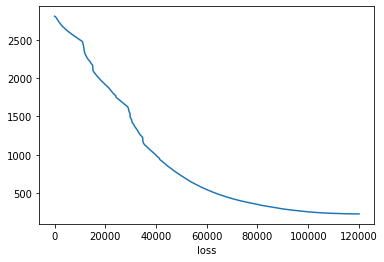

Mean squared error: 12005.5809
Mean absolute error: 72.5583
Median absolute error: 66.0503
Coefficient of determination (R2 score): -0.7513
Explained variance score: -0.6873
R2 score on individual targets [-0.49013894 -1.01251385]
[  673.73085639 23337.43088225]
[ 20.50520067 124.61136262]
[ 16.83393325 115.26662768]


In [237]:
#plotting the loss curve over training iteration 
plt.plot(mlp.loss_curve_)
plt.xlabel('iteration')
plt.xlabel('loss')
plt.show()

#computing a set of performance metrics

#mean squared error (lower the better)
print('Mean squared error: %.4f'% sklearn.metrics.mean_squared_error(tar_test, tar_pred))

#mean absolute error (lower the better)
print('Mean absolute error: %.4f'% sklearn.metrics.mean_absolute_error(tar_test, tar_pred))

#median absolute error (lower the better)
print('Median absolute error: %.4f'% sklearn.metrics.median_absolute_error(tar_test, tar_pred))

#coefficient of determination (r2 score): 1 is perfect prediction (it can get arbitrary negative)
print('Coefficient of determination (R2 score): %.4f'% sklearn.metrics.r2_score(tar_test, tar_pred))

#explained variance score: 1 is perfect prediction (it can get arbitrary worse)
print('Explained variance score: %.4f'% sklearn.metrics.explained_variance_score(tar_test, tar_pred))

#this is is a better represenation of the r2 score when working with multiple outputs
#as it provides a value for each target value
print('R2 score on individual targets',sklearn.metrics.r2_score(tar_test, tar_pred, multioutput='raw_values') )

print(sklearn.metrics.mean_squared_error(tar_test, tar_pred, multioutput='raw_values'))
print(sklearn.metrics.mean_absolute_error(tar_test, tar_pred, multioutput='raw_values'))
print(sklearn.metrics.median_absolute_error(tar_test, tar_pred, multioutput='raw_values'))


In [102]:
x = sklearn.metrics.mean_absolute_error(tar_test[:,1], tar_pred[:,1])
print(x) #14 #113

113.27486995141655


In [103]:
x = sklearn.metrics.mean_absolute_error(tar_test, tar_pred, multioutput='raw_values')
print(x) #14 #113

[ 14.20228625 113.27486995]


In [231]:
print(sklearn.metrics.mean_squared_error(tar_pred, tar_train[0:27,:], multioutput='raw_values'))
print(sklearn.metrics.r2_score(tar_pred, tar_train[0:27,:], multioutput='raw_values'))

[ 5586.40749345 97074.54575598]
[-0.17332786 -0.11998453]


In [230]:
print(tar_train[0:27,:].shape)
print(tar_pred.shape)

(27, 2)
(27, 2)
